<a href="https://colab.research.google.com/github/Rohanrathod7/my-ml-labs/blob/main/05_Linear_Classifiers_in_Python/03_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Logistic Regression

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime as dt
# Import confusion matrix and train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, LogisticRegression, LinearRegression
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt




url = "https://raw.githubusercontent.com/Rohanrathod7/my-ds-labs/main/34_Unsupervised_Learning_in_Python/dataset/Grains/seeds-width-vs-length.csv"
# Read the CSV file
# The original code tried to read a feather file as a CSV, and had a UnicodeDecodeError.
# The file extension is feather, so it should be read using pd.read_feather.
# Also, the variable name was confusing, it should be spotify_population.
grains = pd.read_csv(url, header=None)
display(grains.head())

,0,1
0,3.312,5.763
1,3.333,5.554
2,3.337,5.291
3,3.379,5.324
4,3.562,5.658


**Regularized logistic regression**   
In Chapter 1, you used logistic regression on the handwritten digits data set. Here, we'll explore the effect of L2 regularization.

The handwritten digits dataset is already loaded, split, and stored in the variables X_train, y_train, X_valid, and y_valid. The variables train_errs and valid_errs are already initialized as empty lists.

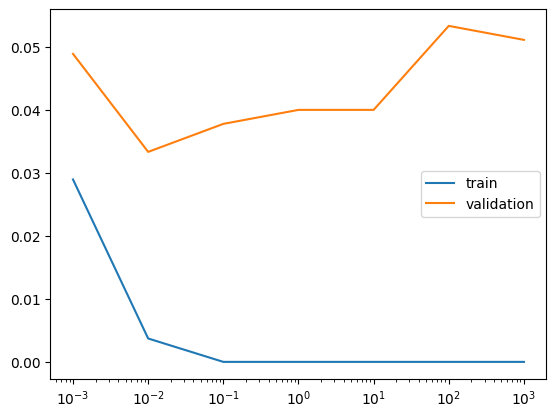

In [ ]:
from sklearn import datasets
digits = datasets.load_digits()
X, y =  digits.data, digits.target
X_train, X_valid, y_train, y_valid = train_test_split(digits.data, digits.target)


# Train and validaton errors initialized as empty list
train_errs = list()
valid_errs = list()

# Loop over values of C_value
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for C_value in C_values:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(C=C_value, max_iter=1000)
    lr.fit(X_train, y_train)

    # Evaluate error rates and append to lists
    train_errs.append( 1.0 - lr.score(X_train, y_train) )
    valid_errs.append( 1.0 - lr.score(X_valid, y_valid) )

# Plot results
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(("train", "validation"))
plt.show()

# As you can see, too much regularization (small C) doesn't work well - due to underfitting - and too little regularization (large C) doesn't work well either - due to overfitting.

**Logistic regression and feature selection**    
In this exercise we'll perform feature selection on the movie review sentiment data set using L1 regularization. The features and targets are already loaded for you in X_train and y_train.

We'll search for the best value of C using scikit-learn's GridSearchCV(), which was covered in the prerequisite course.

In [ ]:
# Specify L1 regularization
lr = LogisticRegression(solver='liblinear', penalty="l1")

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]})
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

# As you can see, a whole lot of features were discarded here.

Best CV params {'C': 0.1}
Total number of features: 640
Number of selected features: 255


**Identifying the most positive and negative words**  
In this exercise we'll try to interpret the coefficients of a logistic regression fit on the movie review sentiment dataset. The model object is already instantiated and fit for you in the variable lr.

In addition, the words corresponding to the different features are loaded into the variable vocab. For example, since vocab[100] is "think", that means feature 100 corresponds to the number of times the word "think" appeared in that movie review.

In [ ]:
# Get the indices of the sorted cofficients
vocab  = ['the', 'and', 'a', 'of', 'to', 'is', 'it', 'in', 'i', 'this', 'that', 'was', 'as', 'for', 'with', 'movie', 'but', 'film', 'on', 'not', 'you', 'he', 'are', 'his', 'have', 'be', 'one', '!', 'all', 'at', 'by', 'an', 'who', 'they', 'from', 'so', 'like', 'there', 'her', 'or', 'just', 'about', 'if', 'has', 'out', 'what', '?', 'some', 'good', 'more', 'when', 'she', 'very', 'even', 'my', 'no', 'up', 'time', 'would', 'which', 'only', 'story', 'really', 'their', 'see', 'had', 'can', 'were', 'me', 'we', 'than', 'well', 'much', 'been', 'get', 'people', 'will', 'bad', 'other', 'also', 'into', 'do', 'because', 'great', 'first', 'how', 'him', 'most', "don't", 'its', 'made', 'then', 'them', 'way', 'make', 'could', 'too', 'any', 'after', 'movies', 'think', 'characters', 'character', 'watch', 'films', 'two', 'many', 'seen', 'being', 'acting', 'never', 'plot', 'little', 'where', 'love', 'best', 'life', 'did', 'show', 'know', 'does', 'ever', 'here', 'better', 'man', 'your', 'still', 'end', 'over', 'off', 'these', 'say', 'scene', 'why', 'while', 'scenes', 'such', 'go', 'something', 'should', 'through', 'back', "i'm", 'those', 'watching', 'real', 'though', 'now', "doesn't", 'thing', 'years', 'actors', 'director', 'another', "didn't", 'before', 'nothing', 'new', 'funny', 'actually', 'work', 'makes', 'find', 'look', 'old', 'few', 'going', 'same', 'again', 'lot', 'part', 'every', 'cast', 'us', 'world', 'quite', 'want', 'things', 'pretty', 'young', 'seems', 'around', 'got', 'down', 'however', "can't", 'fact', 'horror', 'take', 'enough', 'both', 'may', 'give', 'original', 'between', 'big', 'own', "i've", 'thought', 'series', 'without', 'right', 'times', 'long', 'always', 'gets', 'action', 'comedy', "isn't", 'family', 'come', 'point', 'role', 'saw', 'interesting', 'almost', 'least', 'whole', 'must', 'bit', 'music', 'script', 'done', 'guy', 'anything', 'minutes', 'last', 'since', 'might', 'performance', 'far', 'feel', 'probably', 'am', 'woman', 'kind', 'girl', 'away', 'yet', 'rather', 'worst', 'sure', 'fun', 'anyone', 'making', 'each', 'played', 'tv', 'found', 'having', 'day', 'although', 'especially', 'our', 'course', 'believe', 'comes', 'trying', 'goes', 'hard', 'looks', 'different', 'place', 'book', 'actor', 'put', 'maybe', 'money', 'someone', 'ending', 'reason', 'let', 'everything', "wasn't", 'sense', 'once', 'shows', 'screen', 'dvd', 'true', 'set', 'worth', 'job', 'main', 'looking', 'watched', 'everyone', 'together', 'three', 'plays', 'john', 'later', 'said', 'play', 'instead', 'audience', 'seem', 'beautiful', 'takes', 'effects', 'himself', 'version', 'during', 'left', 'night', 'house', 'seeing', 'wife', 'special', 'excellent', 'father', 'american', 'idea', 'else', 'nice', 'shot', 'simply', 'year', 'read', "you're", 'black', 'high', 'less', 'war', 'star', 'completely', 'help', 'fan', 'poor', 'death', 'second', 'men', 'hollywood', 'either', 'mind', 'used', 'given', 'home', 'kids', 'try', 'performances', 'women', 'enjoy', 'classic', 'boring', 'short', 'wrong', 'need', 'rest', 'use', 'friends', 'until', 'along', 'dead', 'truly', 'half', 'production', 'line', 'tell', 'couple', 'remember', 'next', 'start', 'stupid', 'perhaps', 'came', 'recommend', 'moments', 'awful', 'wonderful', 'episode', 'mean', 'understand', 'terrible', 'full', 'camera', 'getting', 'stars', 'playing', 'video', 'keep', 'sex', 'doing', 'others', 'early', 'often', 'small', 'definitely', 'gives', 'person', 'school', 'face', 'perfect', 'name', 'itself', 'become', 'human', 'lines', 'yes', 'finally', 'dialogue', 'lost', 'felt', 'case', 'piece', 'top', 'liked', 'supposed', 'children', "couldn't", 'title', 'absolutely', 'head', 'budget', 'mother', 'live', 'written', 'boy', 'picture', 'against', 'cinema', 'went', 'worse', 'certainly', 'entire', 'sort', 'style', 'waste', 'problem', 'mr', 'hope', 'entertaining', 'overall', 'friend', 'killer', 'evil', 'several', 'loved', 'fans', 'oh', 'beginning', 'white', 'lives', 'care', 'becomes', 'direction', 'example', 'already', 'based', 'drama', 'despite', 'seemed', 'dark', 'throughout', 'unfortunately', 'wanted', "i'd", 'final', 'history', 'amazing', 'turn', 'fine', 'laugh', 'michael', 'son', 'humor', 'guess', 'totally', 'lead', 'sound', 'guys', 'writing', "you'll", 'wants', 'low', 'works', 'tries', 'called', 'under', 'past', 'viewer', 'quality', 'child', 'days', 'behind', 'game', 'turns', "they're", 'enjoyed', 'today', 'able', 'act', 'town', 'favorite', 'kill', 'flick', 'starts', 'gave', 'actress', 'sometimes', 'eyes', 'etc', 'side', 'horrible', 'girls', 'genre', 'soon', "won't", 'car', 'brilliant', 'parts', 'art', 'heart', 'themselves', 'expect', 'kid', 'stuff', 'stories', 'thinking', 'city', 'obviously', 'directed', 'late', 'myself', 'blood', 'decent', 'feeling', 'run', 's', 'highly', 'god', 'except', 'close', 'fight', 'hand', 'anyway', 'roles', 'daughter', 'killed', 'moment', 'says', 'heard', 'leave', 'matter', 'took', 'cannot', 'police', 'happens', 'brother', 'hour', 'violence', 'happened', 'strong', 'particularly', 'james', 'extremely', 'involved', 'chance', 'writer', 'obvious', 'experience', "wouldn't", 'lack', 'including', 'told', 'alone', 'attempt', 'murder', 'living', 'happen', 'please', 'age', 'wonder', 'complete', 'ago', 'voice', 'group', 'score', 'david', 'coming', 'interest', 'save', 'none', 'ok', 'crap', 'type', 'looked', 'simple', 'slow', 'possible', 'number', 'seriously', 'hell', 'gore', 'exactly', 'shown', 'king', 'hero', 'annoying', 'song', 'husband', 'sad', 'whose', 'career', 'yourself', 'cinematography', 'taken', 'musical', 'ends', 'usually', 'serious', "i'll", 'stop', 'hours', 'scary', 'released', 'across', 'hilarious', 'running', 'reality', 'relationship', 'usual', 'ridiculous', 'known', 'hit', 'opening', 'somewhat', 'started', 'opinion', 'jokes', 'novel', 'cool', 'change', 'robert', 'wish', 'ones', 'body', 'finds', 'order', 'saying', 'english', 'huge', 'cut', 'shots', 'episodes', 'mostly', 'taking', 'female', 'talking', 'strange', 'major', 'view', 'power', 'happy', 'documentary', 'apparently', 'rating', 'disappointed', 'level', 'talent', 'call', 'country', 'jack', 'due', 'events', 'room', 'important', 'songs', 'basically', 'clearly', 'knows', 'knew', 'supporting', 'attention', 'television', 'future', 'turned', 'paul', 'easily', 'problems', "aren't", 'silly', 'british', 'word', 'tells', 'earth', 'words', 'local', 'single', 'light', 'four', 'cheap', 'sequence', 'bring', 'entertainment', 'thriller', 'beyond', 'george', 'miss', 'modern', 'whether', 'b', 'predictable', 'falls', 'five', 'sets', 'similar', 'review', 'richard', 'needs', 'upon', 'lady', 'enjoyable', 'appears', 'romantic', 'comic', 'giving', 'mystery', 'talk', 'rock', 'message', 'animation', 'within', 'theater', 'sequel', 'bunch', 'mention', 'herself', 'feels', 'nearly', 'points', 'theme', 'lee', 'above', 'dull', 'add', 'york', 'ways', 'moving', 'storyline', 'ten', 'surprised', "haven't", 'lots', 'team', 'begins', 'middle', 'using', 'fantastic', 'actual', 'sister', 'effort', 'viewers', 'named', 'among', 'elements', 'easy', 'stay', 'tom', 'comments', 'avoid', 'showing', 'typical', 'release', 'clear', 'hate', 'tried', 'peter', 'sorry', 'french', 'dialog', 'editing', 'tale', 'certain', 'season', 'soundtrack', 'buy', 'fall', 'general', 'near', 'means', 'famous', 'check', 'parents', 'red', 'somehow', 'material', 'oscar', 'period', 'form', 'straight', 'weak', 'working', 'doubt', 'class', 'leads', 'filmed', 'gone', 'kept', 'greatest', 'figure', 'viewing', 'feature', 'disney', 'eye', 'realistic', 'brought', 'imagine', 'hear', 'atmosphere', 'fast', 'particular', 'suspense', 'lame', 'move', 'whatever', 'sequences', 'america', 'follow', 'indeed', 'die', 'crime', 'learn', 'eventually', 'reviews', 'wait', 'forget', 'deal', 'zombie', 'dance', 'space', 'okay', 'premise', 'surprise', 'believable', 'nature', 'possibly', "you've", 'third', 'decided', 'subject', 'expected', 'de', 'japanese', 'dr', 'became', 'truth', 'imdb', 'sexual', 'average', 'stand', 'difficult', 'screenplay', 'romance', 't', 'sit', 'poorly', 'rent', 'joe', 'nor', 'leaves', 'question', 'stage', 'note', 'begin', 'killing', 'needed', 'reading', 'unless', 'baby', 'superb', 'directors', 'society', 'otherwise', 'shame', 'meet', 'street', 'situation', 'meets', 'memorable', 'dog', 'credits', 'earlier', 'forced', 'weird', 'minute', 'older', 'laughs', 'realize', 'emotional', 'jane', 'beauty', 'writers', 'comment', 'footage', 'write', 'ask', 'badly', 'interested', 'dramatic', 'sounds', 'whom', 'hot', 'keeps', 'features', 'directing', 'mess', 'development', 'crazy', 'quickly', 'male', 'mark', 'towards', 'creepy', 'free', 'monster', 'perfectly', 'result', 'total', 'plus', 'previous', 'brings', 'unique', 'plenty', 'worked', 'cheesy', 'effect', 'personal', 'incredibly', 'hands', 'bill', 'fantasy', 'return', 'dream', 'apart', 'deep', 'setting', 'admit', 'open', 'appear', 'background', 'christmas', 'leading', 'doctor', 'casting', 'hardly', 'meant', 'ben', 'potential', 'boys', 'powerful', 'business', 'masterpiece', 'fails', 'battle', 'joke', 'create', 'various', 'forward', 'fire', 'inside', 'outside', 'portrayed', 'girlfriend', 'ideas', 'twist', 'william', 'missing', 'nudity', 'reasons', 'villain', 'dumb', 'political', 'deserves', 'match', 'secret', 'expecting', 'air', 'fairly', 'present', 'gay', 'fighting', 'unlike', 'married', 'manages', 'break', 'scott', 'success', 'attempts', 'western', 'spoilers', 'acted', 'remake', 'pay', 'box', 'recently', 'rich', 'front', 'cute', 'further', 'cop', 'sadly', 'era', 'copy', 'agree', 'talented', 'telling', 'sci-fi', 'filmmakers', 'following', 'public', 'crew', 'incredible', 'missed', 'wasted', 'pure', 'plain', 'brothers', 'odd', 'caught', 'flat', 'social', 'mentioned', 'pace', 'ended', 'decides', 'considering', 'waiting', 'members', 'mary', 'large', 'list', 'sweet', 'revenge', 'popular', 'uses', 'hold', 'slightly', 'office', 'compared', 'neither', 'wrote', 'escape', 'sees', 'suddenly', 'e', 'party', 'spirit', 'tension', 'convincing', 'created', 'fear', 'spent', 'rate', 'cause', 'entirely', 'island', 'cartoon', 'intelligent', 'credit', 'clever', "we're", 'choice', 'water', 'kills', 'bored', 'familiar', 'moves', 'tony', 'laughing', 'gun', 'visual', 'successful', 'ultimately', 'basic', 'band', 'trouble', 'la', 'cat', 'zombies', 'concept', 'value', 'biggest', 'positive', 'singing', 'consider', 'exciting', 'dancing', 'company', 'died', 'recent', 'state', 'language', 'effective', 'science', 'cover', 'spend', 'portrayal', 'violent', 'cold', 'appreciate', 'produced', 'speak', 'pointless', 'former', 'studio', 'amusing', 'adult', 'common', 'filled', 'planet', 'younger', 'books', 'store', 'walk', 'follows', 'focus', 'solid', 'bizarre', 'italian', 'impressive', 'animated', 'impossible', 'german', 'amount', 'tone', 'century', 'adventure', 'conclusion', 'producers', "weren't", 'showed', 'recommended', 'fit', 'van', 'depth', 'runs', 'situations', 'chemistry', 'prison', 'project', 'jim', 'respect', 'awesome', 'control', 'accent', 'hair', 'considered', 'win', 'won', 'smith', 'force', 'decide', 'college', 'trip', 'disturbing', 'somewhere', 'mad', 'failed', 'dad', 'changed', 'leaving', 'questions', 'longer', 'steve', 'audiences', 'barely', 'aside', 'honest', 'slasher', 'sick', 'ghost', 'shooting', 'trash', 'images', 'thanks', 'charming', 'starring', 'generally', 'pathetic', 'literally', 'west', 'values', 'culture', 'likes', 'fake', 'surprisingly', 'touch', 'magic', 'involving', 'yeah', 'alive', 'immediately', 'stewart', 'harry', 'south', 'frank', 'garbage', 'natural', 'utterly', 'camp', 'bought', 'honestly', 'adaptation', 'sam', 'london', 'aspect', 'pictures', 'ability', 'detective', 'nobody', 'glad', 'explain', 'fair', 'computer', 'appearance', 'genius', 'sitting', 'cult', 'attack', 'master', 'meaning', 'personally', 'stick', 'normal', 'u', 'army', 'appeal', 'knowing', 'tough', 'remains', 'humour', 'military', 'nowhere', 'journey', 'added', 'charlie', 'rare', 'thinks', 'thank', 'dreams', 'c', 'purpose', 'touching', 'unbelievable', 'comedies', 'week', 'catch', 'taste', 'terms', 'chase', 'beautifully', 'channel', 'walking', 'sexy', 'batman', 'terrific', 'twists', 'silent', 'fiction', 'kelly', 'wow', 'standard', 'equally', 'naked', 'mood', 'subtle', 'mistake', 'managed', 'complex', 'laughable', 'pick', 'themes', 'road', 'chris', 'lovely', 'narrative', 'wild', 'disappointing', 'likely', 'brain', 'costumes', 'thus', 'plan', 'issues', 'excuse', 'club', 'outstanding', 'soldiers', 'painful', 'producer', 'date', 'justice', 'surely', 'constantly', 'christopher', 'government', 'fully', 'self', 'edge', 'law', 'boss', 'presented', 'victim', 'cinematic', 'contains', 'door', 'places', 'central', 'details', 'innocent', 'presence', 'climax', 'everybody', 'slowly', 'marriage', 'besides', 'pass', 'ride', 'manner', 'charles', 'hoping', 'animals', 'historical', 'charm', 'stunning', 'finish', 'vampire', 'd', 'photography', 'impression', "you'd", 'henry', 'loves', 'gang', 'spoiler', 'thrown', 'mysterious', 'disappointment', 'expectations', 'bottom', 'hey', 'shoot', 'allen', 'exception', 'paris', 'woods', 'minor', 'makers', 'soul', 'festival', 'critics', 'aspects', 'stands', 'loud', 'indian', 'suppose', 'scenery', 'train', 'bother', 'cry', 'church', 'color', 'feelings', 'sent', 'heavy', 'support', 'emotion', 'bruce', 'opportunity', 'award', 'hotel', 'brief', 'element', 'filming', 'mainly', 'ahead', 'fascinating', 'forever', 'blue', 'rated', 'acts', 'pieces', 'emotions', 'available', 'intended', 'twice', 'dies', 'building', 'names', 'throw', 'track', 'compelling', 'serial', 'happening', 'changes', 'drawn', 'hurt', 'don', 'puts', 'green', 'falling', 'student', 'smart', 'jerry', 'likable', 'offer', 'speaking', 'tired', 'suggest', 'include', 'bed', 'pain', 'difference', 'victims', 'confused', 'adults', 'lover', 'followed', 'impact', 'f', 'billy', 'arthur', 'approach', 'giant', 'motion', "hasn't", 'appeared', 'boyfriend', 'page', 'developed', 'bar', 'image', 'park', 'jones', 'gorgeous', 'actresses', 'confusing', 'trailer', 'laughed', 'notice', 'system', 'summer', 'share', 'lacks', 'fresh', 'numbers', 'alien', 'fellow', 'event', 'grade', 'supposedly', 'flaws', 'martin', 'murders', 'moral', 'zero', 'content', 'noir', 'million', 'al', 'opera', 'mom', 'gem', 'ii', 'relationships', 'tragedy', 'answer', 'mediocre', 'helps', 'funniest', 'drive', 'merely', 'lighting', 'proves', 'wondering', 'agent', 'students', 'born', 'random', 'mix', 'ray', 'j', 'delivers', 'finding', 'hospital', 'creative', 'christian', 'putting', 'key', 'standards', 'race', 'damn', 'drug', 'holes', 'childhood', 'shock', 'imagination', 'impressed', 'absolute', 'lived', 'negative', 'attractive', 'land', 'davis', 'paid', 'alan', 'thoroughly', 'extreme', 'rape', 'flicks', 'provides', 'ms', 'becoming', 'latter', 'addition', 'seemingly', 'seconds', 'folks', 'reminded', 'flying', 'fell', 'brian', 'ugly', 'detail', 'offers', 'thats', 'porn', 'tragic', 'faces', 'collection', 'afraid', 'intense', 'lord', 'affair', 'six', 'spot', 'ship', 'williams', 'stuck', 'lose', 'seven', 'industry', 'forgotten', 'hidden', 'queen', 'soldier', 'count', 'nasty', 'beat', 'stone', 'apartment', 'cliché', 'adds', 'jackson', 'held', 'castle', 'rented', "shouldn't", 'fashion', 'design', 'angry', 'artistic', 'uncle', 'therefore', 'turning', 'americans', 'ground', 'filmmaker', 'area', 'pull', 'information', 'games', 'states', 'anymore', 'bond', 'location', 'super', 'listen', 'shocking', 'describe', 'personality', 'jason', 'lets', 'step', 'danny', 'favourite', 'scientist', 'deliver', 'asks', 'animal', 'ready', 'onto', 'fox', 'creature', 'picked', 'wooden', 'inspired', 'chinese', 'stephen', 'intelligence', 'clothes', 'news', 'grace', 'led', 'dirty', 'redeeming', 'compare', 'thin', 'allowed', 'criminal', 'member', 'carry', 'helped', 'artist', 'tears', 'wonderfully', 'drugs', 'struggle', 'moved', 'teenage', 'captain', 'necessary', 'desperate', 'includes', 'trust', 'deeply', 'whatsoever', 'wars', 'willing', 'treat', 'began', 'andy', 'martial', 'food', 'direct', 'g', 'ed', 'commentary', 'quick', 'nightmare', 'plane', 'theatre', 'heaven', 'disaster', 'station', 'wall', 'professional', 'humans', 'accident', 'douglas', 'sleep', 'phone', 'cgi', 'dying', 'worthy', 'sky', 'introduced', 'superior', 'energy', 'johnny', 'rarely', 'teacher', 'sight', 'warning', 'comedic', 'r', 'independent', 'anybody', 'double', 'eddie', 'actions', 'unusual', 'roll', 'realized', 'epic', 'remarkable', 'apparent', 'powers', 'mouth', 'allow', 'mental', 'wearing', 'returns', 'continue', 'unnecessary', 'tim', 'physical', 'witch', 'keaton', 'provide', 'technical', 'pleasure', 'arts', 'absurd', 'normally', 'suicide', 'desire', 'anywhere', 'england', 'engaging', 'superman', 'devil', 'ford', 'taylor', 'fred', 'limited', 'skip', 'surprising', 'bloody', 'jr', 'adam', 'scared', 'heroes', 'hitler', 'memory', 'process', 'wedding', 'brutal', 'watchable', 'suspect', 'accept', 'joan', 'ring', 'prince', 'media', 'machine', 'russian', 'intriguing', 'legend', 'jeff', 'somebody', 'search', 'suit', 'wanting', 'finished', 'reminds', 'holds', 'according', 'build', 'cops', 'torture', 'academy', 'vision', 'pacing', 'hated', 'nicely', 'passion', 'shakespeare', 'asked', 'religious', 'exist', 'cage', 'dick', 'extra', 'grand', 'joy', 'bits', 'pilot', 'faith', 'growing', 'clichés', 'nick', 'ladies', 'price', 'constant', 'tarzan', 'blame', 'smile', 'originally', 'explanation', 'lies', 'dangerous', 'kevin', 'instance', 'sat', 'community', 'jesus', 'japan', 'moon', 'freddy', 'deserve', 'river', 'heroine', 'met', 'toward', 'unknown', 'capture', 'gotten', 'higher', 'accurate', 'players', 'winning', 'dressed', 'quiet', 'whilst', 'explained', 'friendship', 'fail', 'teen', "hadn't", 'knowledge', 'drunk', 'player', 'heads', 'kate', 'lovers', 'field', 'starting', 'humanity', 'mike', 'guns', 'record', 'creating', 'sucks', 'officer', 'memories', 'vhs', 'judge', 'jump', 'villains', 'cars', 'pop', 'horse', 'finest', 'fights', 'issue', 'featuring', 'radio', 'responsible', 'lacking', 'morgan', 'floor', 'saved', 'deserved', 'jimmy', 'kinda', 'understanding', 'lynch', 'pulled', 'jean', 'keeping', 'delightful', 'european', 'rubbish', 'results', 'low-budget', 'treated', 'hopes', 'gene', 'monsters', 'manage', 'loving', 'washington', 'gary', 'terribly', 'months', 'bland', 'eat', 'santa', 'fate', 'simon', 'partner', 'included', 'mixed', 'screaming', 'broken', 'sign', 'mine', 'numerous', 'singer', 'hits', 'cable', 'witty', 'spanish', 'forces', 'whenever', 'empty', 'author', 'fat', 'p', 'conflict', 'youth', 'streets', 'ball', 'private', 'loose', 'loss', 'concerned', 'eric', 'reviewers', 'brown', 'vs', 'pretentious', 'skills', 'werewolf', 'wind', 'unfunny', 'ann', 'talents', 'naturally', 'ordinary', 'noticed', 'psychological', 'discover', 'opposite', 'bob', 'regular', 'realism', 'saving', 'perspective', 'albert', 'prove', 'finale', 'bigger', 'morning', 'dated', 'driving', 'sean', 'anthony', 'mission', 'gold', 'soap', 'cuts', 'portray', 'loses', 'blonde', 'locations', 'length', 'discovered', 'bright', "we've", 'grant', 'aware', 'film-making', 'continues', 'kong', 'humorous', 'below', 'wood', 'satire', 'survive', 'dealing', 'international', 'visit', 'magnificent', 'gags', 'dan', 'howard', 'calls', 'behavior', 'breaks', 'owner', 'candy', 'shallow', 'debut', 'nonsense', 'murdered', 'opens', 'curious', 'jennifer', 'visually', 'trek', 'golden', 'connection', 'context', 'captured', 'essentially', 'sing', 'shop', 'miles', 'deals', 'bank', 'advice', 'm', 'frankly', 'occasionally', 'cameo', 'revealed', 'corny', 'received', 'blind', 'harris', "they've", 'traditional', 'lesson', 'genuine', 'efforts', 'learned', 'segment', 'window', 'current', 'gangster', 'visuals', 'versions', 'scream', 'mrs', 'luke', 'develop', 'o', 'identity', 'rob', 'allows', 'existence', 'national', 'program', 'sucked', 'welles', 'genuinely', 'comparison', 'luck', 'decade', 'references', 'unexpected', 'stock', 'anna', 'president', 'formula', 'remembered', 'village', 'proved', 'meanwhile', 'favor', 'ages', 'lake', 'grew', 'study', 'brilliantly', 'sea', 'vampires', 'sheer', 'robin', 'unable', 'wise', 'ice', 'reach', 'sake', 'ultimate', 'drew', 'board', 'steal', 'sudden', 'awards', 'stereotypes', 'strength', 'logic', 'awkward', 'leader', 'boat', 'passed', 'desert', 'plots', 'bet', 'cross', 'spectacular', 'barbara', 'failure', 'sinatra', 'parker', 'h', 'halloween', 'buddy', 'types', 'killers', 'reaction', 'sheriff', 'evening', 'delivered', 'crappy', 'bear', 'gonna', 'steven', 'creates', 'technology', 'fault', 'utter', 'rose', 'edited', 'discovers', 'pair', 'thomas', 'laughter', 'lucky', 'dreadful', 'insane', 'reviewer', 'flashbacks', 'families', 'majority', 'relief', 'w', 'standing', 'graphic', 'emotionally', 'painfully', 'freedom', 'ran', 'woody', 'caused', 'parody', 'gratuitous', 'decision', 'site', 'entertained', 'religion', 'meeting', 'travel', 'anime', 'individual', 'protagonist', 'attitude', 'wayne', 'underrated', 'nevertheless', 'speed', 'victor', 'foreign', 'endless', 'seasons', 'relate', 'costs', 'foot', 'feet', 'practically', 'gordon', 'pleasant', 'daniel', 'test', 'hill', 'treatment', 'france', 'cinderella', 'vehicle', 'twenty', 'combination', 'marie', 'described', 'classics', 'v', 'alex', 'hunter', 'victoria', 'native', 'gory', 'jackie', 'ancient', 'joseph', 'irritating', 'levels', 'stopped', 'eating', 'l', 'overly', 'portrays', 'tape', 'assume', 'rules', 'commercial', 'hearing', 'executed', 'product', 'haunting', 'broadway', 'believes', 'excited', 'asking', 'range', 'model', 'theaters', 'proper', 'wide', 'portraying', 'roy', 'chosen', 'wit', 'chief', 'sell', 'uk', 'angel', 'rescue', 'moore', 'extras', 'ruined', 'contrived', 'generation', 'capable', 'recall', 'embarrassing', 'largely', 'matt', 'unrealistic', 'marry', 'clean', 'produce', 'round', 'depressing', 'fill', 'nancy', 'center', 'handsome', 'winner', 'choose', 'anne', 'germany', 'rise', 'cares', 'facts', 'exploitation', 'matters', 'suffering', 'theatrical', 'learns', 'ryan', 'priest', 'post', 'sequels', 'kick', 'involves', 'clue', 'patrick', 'contrast', 'sympathetic', 'grow', 'fame', 'appealing', 'research', 'strongly', 'louis', 'built', 'asian', 'excitement', 'cash', 'evidence', 'dry', 'anderson', 'disgusting', 'teenager', 'correct', 'lewis', 'appropriate', 'claim', 'chick', 'vote', 'pity', 'heck', 'talks', 'losing', 'destroy', 'oliver', 'walter', 'thoughts', 'canadian', 'lousy', 'circumstances', 'costume', 'promise', 'tedious', 'crowd', 'voices', 'safe', 'saturday', 'europe', 'substance', 'sports', 'training', 'bringing', 'frame', 'haunted', 'bomb', 'fool', 'fly', 'naive', 'captures', 'hanging', 'football', 'bodies', 'teenagers', 'till', 'amateurish', 'mask', 'max', 'tend', 'convinced', 'satisfying', 'obsessed', 'welcome', 'psycho', 'virtually', 'hopefully', 'horribly', 'asleep', 'walks', 'hunt', 'scare', 'spoil', 'cost', 'powell', 'danger', 'relatively', 'insult', 'grown', 'trilogy', 'steals', 'africa', 'murphy', 'fits', 'universal', 'creatures', 'reporter', 'unlikely', 'baseball', 'che', 'robot', 'tiny', 'dubbed', 'continuity', 'seat', 'influence', 'market', 'depicted', 'flesh', 'remain', 'hall', 'texas', 'united', 'kim', 'initial', 'fu', 'unfortunate', 'offensive', 'category', 'send', 'russell', 'fare', 'north', 'factor', 'cowboy', 'soft', 'believed', 'ass', 'lawyer', 'politics', 'lower', 'qualities', 'provided', 'target', 'drag', 'witness', 'contemporary', 'columbo', 'touches', 'presents', 'refreshing', 'hide', 'rental', 'holding', 'promising', 'professor', 'viewed', 'australian', 'display', 'source', 'amateur', 'nominated', 'structure', 'cartoons', 'shocked', 'hitchcock', 'makeup', 'forgettable', 'claims', 'movement', 'weekend', 'sisters', 'caine', 'plans', 'edward', 'deaths', 'surreal', 'closer', 'clark', 'handled', 'ruin', 'roger', 'accents', 'surprises', 'angles', 'repeated', 'serves', 'chose', 'adventures', 'eight', 'speaks', 'supernatural', 'brave', 'previously', 'peace', 'pacino', 'warm', 'hat', 'over-the-top', 'emma', 'deadly', 'granted', 'degree', 'latest', 'suffers', 'weeks', 'whoever', 'cant', 'rain', 'skin', 'accidentally', 'experiences', 'highlight', 'lesbian', 'covered', 'service', 'enemy', 'dollars', 'mistakes', 'pile', 'routine', 'paper', 'treasure', 'mgm', 'harsh', 'uninteresting', 'alice', 'realizes', 'colors', 'make-up', 'combined', 'sympathy', 'speech', 'twisted', 'aliens', 'friday', 'veteran', 'wilson', 'propaganda', 'universe', 'convince', 'atrocious', 'dogs', 'designed', 'struggling', 'ted', 'draw', 'path', 'frightening', "would've", 'mainstream', 'section', 'recognize', 'invisible', 'lugosi', 'nude', 'walked', 'enter', 'pitt', 'print', 'committed', 'x', 'aka', 'focused', 'guilty', 'blah', 'princess', 'false', 'terror', 'occasional', 'security', 'directly', 'narration', 'sarah', 'technically', 'com', 'offered', 'theory', 'breaking', 'magical', 'massive', 'suspenseful', 'kinds', 'variety', 'experienced', 'featured', 'driver', 'donald', 'prior', 'irish', 'core', 'subtitles', 'reputation', 'explains', 'fairy', 'birth', 'sorts', 'gritty']

# Get the indices of the sorted cofficients
inds_ascending = np.argsort(best_lr.coef_.flatten())
inds_descending = inds_ascending[::-1]

# Print the most positive words
print("Most positive words: ", end="")
for i in range(5):
    print(vocab[inds_descending[i]], end=", ")
print("\n")

# Print most negative words
print("Most negative words: ", end="")
for i in range(5):
    print(vocab[inds_ascending[i]], end=", ")
print("\n")

# print("Note: The code to print words is commented out because the 'vocab' variable is not defined.")

Most positive words: great, hero, style, both, first, 

Most negative words: violence, top, done, running, usually, 



**Getting class probabilities**  
Which of the following transformations would make sense for transforming the raw model output of a linear classifier into a class probability?

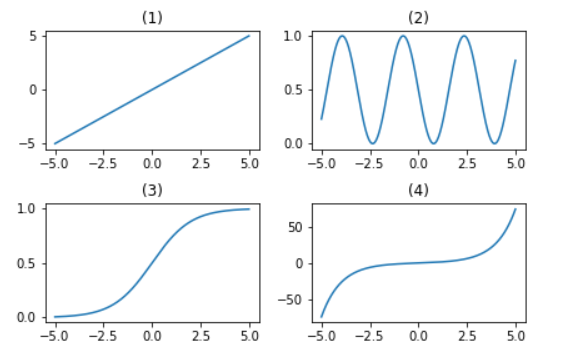

- 1 [no - Look at the y-axis labels. Remember that probabilities are between 0 and 1.]

- 2 [no - A sensible transform should increase steadily, rather than oscillating, so that a higher raw model output always means a higher probability.]

- 3 [yes - The function in the picture is fairly similar to the logistic function used by logistic regression.]

- 4 [no - Look at the y-axis labels. Remember that probabilities are between 0 and 1.]

**Regularization and probabilities**  
In this exercise, you will observe the effects of changing the regularization strength on the predicted probabilities.

A 2D binary classification dataset is already loaded into the environment as X and y.

In [ ]:
def plot_contours(ax, clf, xx, yy, proba=False, **params):
        """Plot the decision boundaries for a classifier.

        Parameters
        ----------
        ax: matplotlib axes object
        clf: a classifier
        xx: meshgrid ndarray
        yy: meshgrid ndarray
        params: dictionary of params to pass to contourf, optional
        """
        if proba:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
            Z = Z.reshape(xx.shape)
            out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), origin='lower', vmin=0, vmax=1, **params)
            ax.contour(xx, yy, Z, levels=[0.5])
        else:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            out = ax.contourf(xx, yy, Z, **params)
        return out


def make_meshgrid(x, y, h=.02, lims=None):
        """Create a mesh of points to plot in

        Parameters
        ----------
        x: data to base x-axis meshgrid on
        y: data to base y-axis meshgrid on
        h: stepsize for meshgrid, optional

        Returns
        -------
        xx, yy : ndarray
        """

        if lims is None:
            x_min, x_max = x.min() - 1, x.max() + 1
            y_min, y_max = y.min() - 1, y.max() + 1
        else:
            x_min, x_max, y_min, y_max = lims
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        return xx, yy

def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): # assumes classifier "clf" is already fit
        X0, X1 = X[:, 0], X[:, 1]
        xx, yy = make_meshgrid(X0, X1, lims=lims)

        if ax is None:
            plt.figure()
            ax = plt.gca()
            show = True
        else:
            show = False

        # can abstract some of this into a higher-level function for learners to call
        cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
        if proba:
            cbar = plt.colorbar(cs)
            cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
            cbar.ax.tick_params(labelsize=14)
        #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k', linewidth=1)
        labels = np.unique(y)
        if len(labels) == 2:
            ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, s=60, c='b', marker='o', edgecolors='k')
            ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, s=60, c='r', marker='^', edgecolors='k')
        else:
            ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
    #     ax.set_xlabel(data.feature_names[0])
    #     ax.set_ylabel(data.feature_names[1])
        if ticks:
            ax.set_xticks(())
            ax.set_yticks(())
    #     ax.set_title(title)
        if show:
            plt.show()
        else:
            return ax


def plot_4_classifiers(X, y, clfs):

        # Set-up 2x2 grid for plotting.
        fig, sub = plt.subplots(2, 2)
        plt.subplots_adjust(wspace=0.2, hspace=0.2)

        for clf, ax, title in zip(clfs, sub.flatten(), ("(1)", "(2)", "(3)", "(4)")):
            # clf.fit(X, y)
            plot_classifier(X, y, clf, ax, ticks=True)
            ax.set_title(title)
        plt.show()

/tmp/ipython-input-23-3495182117.py:67: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, s=60, c='b', marker='o', edgecolors='k')
/tmp/ipython-input-23-3495182117.py:68: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, s=60, c='r', marker='^', edgecolors='k')


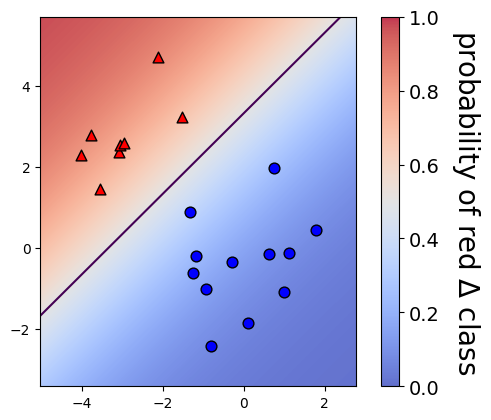

Maximum predicted probability 0.9351932155190785


In [ ]:
X = [[1.7886284734303186, 0.43650985051198943], [0.09649746807200862, -1.8634927033644908], [-0.27738820251439905, -0.35475897926898675], [-3.0827414814824596, 2.3729993231761526], [-3.0438181689759283, 2.5227819696404974], [-1.3138647533626822, 0.8846223804995846], [-2.1186819577924703, 4.7095730636529485], [-2.94996635782314, 2.595322585399109], [-3.5453599476195303, 1.4535226844170317], [0.9823674342581601, -1.1010676301114757], [-1.1850465270201729, -0.20564989942254108], [-1.5138516449254098, 3.2367162672269125], [-4.023785139926468, 2.2870067998879504], [0.6252449661628293, -0.1605133631869239], [-3.76883635031923, 2.769969277722061], [0.7450562664053708, 1.9761107831263025], [-1.244123328955937, -0.6264169111883692], [-0.8037660945765764, -2.4190831731786697], [-0.9237920216957886, -1.0238757608428377], [1.1239779589574683, -0.1319142328009009]]
y = [-1, -1, -1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, -1, -1, -1]

# Convert X and y to NumPy arrays
X = np.array(X)
y = np.array(y)

# Set the regularization strength
model = LogisticRegression(C=0.1)

# Fit and plot
model.fit(X,y)
plot_classifier(X,y,model,proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print("Maximum predicted probability", np.max(prob))

# As you probably noticed, smaller values of C lead to less confident predictions.
# That's because smaller C means more regularization, which in turn means smaller
# coefficients, which means raw model outputs closer to zero and, thus, probabilities
# closer to 0.5 after the raw model output is squashed through the sigmoid function.
# That's quite a chain of events!

**Visualizing easy and difficult examples**   
In this exercise, you'll visualize the examples that the logistic regression model is most and least confident about by looking at the largest and smallest predicted probabilities.

The handwritten digits dataset is already loaded into the variables X and y. The show_digit function takes in an integer index and plots the corresponding image, with some extra information displayed above the image.

In [ ]:
 X = [[0.0, 0.0, 5.0, 13.0, 9.0, 1.0, 0.0, 0.0, 0.0, 0.0, 13.0, 15.0, 10.0, 15.0, 5.0, 0.0, 0.0, 3.0, 15.0, 2.0, 0.0, 11.0, 8.0, 0.0, 0.0, 4.0, 12.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 5.0, 8.0, 0.0, 0.0, 9.0, 8.0, 0.0, 0.0, 4.0, 11.0, 0.0, 1.0, 12.0, 7.0, 0.0, 0.0, 2.0, 14.0, 5.0, 10.0, 12.0, 0.0, 0.0, 0.0, 0.0, 6.0, 13.0, 10.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 12.0, 13.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 16.0, 6.0, 0.0, 0.0, 0.0, 7.0, 15.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 10.0, 0.0, 0.0], [0.0, 0.0, 0.0, 4.0, 15.0, 12.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 15.0, 14.0, 0.0, 0.0, 0.0, 0.0, 8.0, 13.0, 8.0, 16.0, 0.0, 0.0, 0.0, 0.0, 1.0, 6.0, 15.0, 11.0, 0.0, 0.0, 0.0, 1.0, 8.0, 13.0, 15.0, 1.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 3.0, 13.0, 16.0, 16.0, 11.0, 5.0, 0.0, 0.0, 0.0, 0.0, 3.0, 11.0, 16.0, 9.0, 0.0], [0.0, 0.0, 7.0, 15.0, 13.0, 1.0, 0.0, 0.0, 0.0, 8.0, 13.0, 6.0, 15.0, 4.0, 0.0, 0.0, 0.0, 2.0, 1.0, 13.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 11.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 12.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 10.0, 8.0, 0.0, 0.0, 0.0, 8.0, 4.0, 5.0, 14.0, 9.0, 0.0, 0.0, 0.0, 7.0, 13.0, 13.0, 9.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 6.0, 2.0, 2.0, 0.0, 0.0, 0.0, 7.0, 15.0, 0.0, 9.0, 8.0, 0.0, 0.0, 5.0, 16.0, 10.0, 0.0, 16.0, 6.0, 0.0, 0.0, 4.0, 15.0, 16.0, 13.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 4.0, 0.0, 0.0], [0.0, 0.0, 12.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 15.0, 10.0, 1.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 7.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 9.0, 0.0, 0.0, 0.0, 5.0, 4.0, 12.0, 16.0, 4.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 10.0, 0.0, 0.0], [0.0, 0.0, 0.0, 12.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 12.0, 7.0, 2.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 13.0, 16.0, 3.0, 0.0, 0.0, 0.0, 7.0, 16.0, 11.0, 15.0, 8.0, 0.0, 0.0, 0.0, 1.0, 9.0, 15.0, 11.0, 3.0, 0.0], [0.0, 0.0, 7.0, 8.0, 13.0, 16.0, 15.0, 1.0, 0.0, 0.0, 7.0, 7.0, 4.0, 11.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 13.0, 1.0, 0.0, 0.0, 4.0, 8.0, 8.0, 15.0, 15.0, 6.0, 0.0, 0.0, 2.0, 11.0, 15.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 5.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 9.0, 14.0, 8.0, 1.0, 0.0, 0.0, 0.0, 0.0, 12.0, 14.0, 14.0, 12.0, 0.0, 0.0, 0.0, 0.0, 9.0, 10.0, 0.0, 15.0, 4.0, 0.0, 0.0, 0.0, 3.0, 16.0, 12.0, 14.0, 2.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 3.0, 16.0, 8.0, 10.0, 13.0, 2.0, 0.0, 0.0, 1.0, 15.0, 1.0, 3.0, 16.0, 8.0, 0.0, 0.0, 0.0, 11.0, 16.0, 15.0, 11.0, 1.0, 0.0], [0.0, 0.0, 11.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 16.0, 13.0, 0.0, 0.0, 0.0, 3.0, 16.0, 12.0, 10.0, 14.0, 0.0, 0.0, 0.0, 1.0, 16.0, 1.0, 12.0, 15.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 9.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 9.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 15.0, 4.0, 0.0, 0.0, 0.0, 9.0, 12.0, 13.0, 3.0, 0.0, 0.0], [0.0, 0.0, 1.0, 9.0, 15.0, 11.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 8.0, 14.0, 6.0, 0.0, 0.0, 2.0, 16.0, 10.0, 0.0, 9.0, 9.0, 0.0, 0.0, 1.0, 16.0, 4.0, 0.0, 8.0, 8.0, 0.0, 0.0, 4.0, 16.0, 4.0, 0.0, 8.0, 8.0, 0.0, 0.0, 1.0, 16.0, 5.0, 1.0, 11.0, 3.0, 0.0, 0.0, 0.0, 12.0, 12.0, 10.0, 10.0, 0.0, 0.0, 0.0, 0.0, 1.0, 10.0, 13.0, 3.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 14.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 12.0, 0.0, 0.0, 0.0, 1.0, 10.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 3.0, 12.0, 14.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 16.0, 1.0, 0.0], [0.0, 0.0, 5.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 1.0, 12.0, 0.0, 0.0, 0.0, 0.0, 2.0, 10.0, 0.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 15.0, 9.0, 8.0, 2.0, 0.0, 0.0, 3.0, 11.0, 8.0, 13.0, 12.0, 4.0], [0.0, 2.0, 9.0, 15.0, 14.0, 9.0, 3.0, 0.0, 0.0, 4.0, 13.0, 8.0, 9.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 6.0, 14.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 11.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 4.0, 0.0, 0.0, 1.0, 5.0, 6.0, 13.0, 16.0, 6.0, 0.0, 0.0, 2.0, 12.0, 12.0, 13.0, 11.0, 0.0, 0.0], [0.0, 0.0, 0.0, 8.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 13.0, 1.0, 1.0, 0.0, 0.0, 0.0, 10.0, 15.0, 3.0, 15.0, 11.0, 0.0, 0.0, 7.0, 16.0, 7.0, 1.0, 16.0, 8.0, 0.0, 0.0, 9.0, 16.0, 13.0, 14.0, 16.0, 5.0, 0.0, 0.0, 1.0, 10.0, 15.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 4.0, 0.0, 0.0], [0.0, 5.0, 12.0, 13.0, 16.0, 16.0, 2.0, 0.0, 0.0, 11.0, 16.0, 15.0, 8.0, 4.0, 0.0, 0.0, 0.0, 8.0, 14.0, 11.0, 1.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 1.0, 6.0, 6.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 3.0, 0.0, 0.0, 0.0, 1.0, 5.0, 15.0, 13.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 16.0, 2.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 8.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 13.0, 5.0, 0.0, 0.0, 0.0, 15.0, 16.0, 9.0, 9.0, 14.0, 0.0, 0.0, 0.0, 3.0, 14.0, 9.0, 2.0, 16.0, 2.0, 0.0, 0.0, 0.0, 7.0, 15.0, 16.0, 11.0, 0.0], [0.0, 0.0, 1.0, 8.0, 15.0, 10.0, 0.0, 0.0, 0.0, 3.0, 13.0, 15.0, 14.0, 14.0, 0.0, 0.0, 0.0, 5.0, 10.0, 0.0, 10.0, 12.0, 0.0, 0.0, 0.0, 0.0, 3.0, 5.0, 15.0, 10.0, 2.0, 0.0, 0.0, 0.0, 16.0, 16.0, 16.0, 16.0, 12.0, 0.0, 0.0, 1.0, 8.0, 12.0, 14.0, 8.0, 3.0, 0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 9.0, 0.0, 0.0, 0.0], [0.0, 0.0, 10.0, 7.0, 13.0, 9.0, 0.0, 0.0, 0.0, 0.0, 9.0, 10.0, 12.0, 15.0, 2.0, 0.0, 0.0, 0.0, 4.0, 11.0, 10.0, 11.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 10.0, 1.0, 0.0, 0.0, 0.0, 0.0, 12.0, 13.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 1.0, 12.0, 0.0, 0.0, 0.0, 0.0, 1.0, 10.0, 2.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 14.0, 5.0, 0.0, 0.0, 0.0], [0.0, 0.0, 6.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 14.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 12.0, 12.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 11.0, 0.0, 0.0, 0.0, 1.0, 4.0, 4.0, 7.0, 16.0, 2.0, 0.0, 0.0, 7.0, 16.0, 16.0, 13.0, 11.0, 1.0], [0.0, 0.0, 3.0, 13.0, 11.0, 7.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 16.0, 2.0, 0.0, 0.0, 4.0, 16.0, 9.0, 1.0, 14.0, 2.0, 0.0, 0.0, 4.0, 16.0, 0.0, 0.0, 16.0, 2.0, 0.0, 0.0, 0.0, 16.0, 1.0, 0.0, 12.0, 8.0, 0.0, 0.0, 0.0, 15.0, 9.0, 0.0, 13.0, 6.0, 0.0, 0.0, 0.0, 9.0, 14.0, 9.0, 14.0, 1.0, 0.0, 0.0, 0.0, 2.0, 12.0, 13.0, 4.0, 0.0, 0.0], [0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 2.0, 0.0, 0.0, 1.0, 4.0, 12.0, 16.0, 12.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 3.0, 10.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0, 12.0, 15.0, 4.0, 0.0], [0.0, 0.0, 8.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 11.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 0.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 3.0, 1.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 15.0, 8.0, 8.0, 3.0, 0.0, 0.0, 0.0, 7.0, 12.0, 12.0, 12.0, 13.0, 1.0], [0.0, 1.0, 8.0, 12.0, 15.0, 14.0, 4.0, 0.0, 0.0, 3.0, 11.0, 8.0, 8.0, 12.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 13.0, 7.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 13.0, 0.0, 0.0, 0.0, 0.0, 7.0, 8.0, 14.0, 15.0, 0.0, 0.0, 0.0, 0.0, 14.0, 15.0, 11.0, 2.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 12.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 7.0, 8.0, 0.0, 0.0, 0.0, 0.0, 13.0, 9.0, 0.0, 16.0, 6.0, 0.0, 0.0, 6.0, 16.0, 10.0, 11.0, 16.0, 0.0, 0.0, 0.0, 0.0, 5.0, 10.0, 13.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 8.0, 0.0, 0.0], [0.0, 0.0, 12.0, 8.0, 8.0, 7.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 11.0, 7.0, 0.0, 0.0, 0.0, 2.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 4.0, 8.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 11.0, 14.0, 9.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 13.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 13.0, 2.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 16.0, 16.0, 6.0, 0.0, 0.0, 1.0, 14.0, 16.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 3.0, 12.0, 15.0, 14.0, 7.0, 0.0], [0.0, 0.0, 0.0, 8.0, 14.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 6.0, 10.0, 15.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 10.0, 0.0, 0.0, 2.0, 8.0, 11.0, 12.0, 16.0, 8.0, 0.0, 0.0, 8.0, 16.0, 16.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 13.0, 1.0, 0.0, 0.0], [0.0, 0.0, 10.0, 11.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 13.0, 13.0, 1.0, 0.0, 0.0, 0.0, 8.0, 11.0, 0.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 13.0, 15.0, 13.0, 0.0, 0.0, 0.0, 1.0, 11.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 3.0, 9.0, 10.0, 0.0, 0.0, 0.0, 0.0, 14.0, 6.0, 15.0, 10.0, 0.0, 0.0, 0.0, 0.0, 8.0, 14.0, 7.0, 1.0, 0.0, 0.0], [0.0, 0.0, 9.0, 13.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 12.0, 13.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 10.0, 0.0, 0.0, 0.0, 3.0, 7.0, 12.0, 14.0, 16.0, 2.0, 0.0, 0.0, 7.0, 12.0, 12.0, 12.0, 11.0, 0.0], [0.0, 0.0, 10.0, 14.0, 11.0, 3.0, 0.0, 0.0, 0.0, 4.0, 16.0, 13.0, 6.0, 14.0, 1.0, 0.0, 0.0, 4.0, 16.0, 2.0, 0.0, 11.0, 7.0, 0.0, 0.0, 8.0, 16.0, 0.0, 0.0, 10.0, 5.0, 0.0, 0.0, 8.0, 16.0, 0.0, 0.0, 14.0, 4.0, 0.0, 0.0, 8.0, 16.0, 0.0, 1.0, 16.0, 1.0, 0.0, 0.0, 4.0, 16.0, 1.0, 11.0, 15.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 12.0, 3.0, 0.0, 0.0], [0.0, 0.0, 2.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 13.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 11.0, 0.0, 0.0, 0.0, 0.0, 3.0, 4.0, 4.0, 16.0, 2.0, 0.0, 0.0, 2.0, 15.0, 13.0, 14.0, 13.0, 2.0], [0.0, 2.0, 13.0, 16.0, 16.0, 16.0, 11.0, 0.0, 0.0, 5.0, 16.0, 10.0, 5.0, 4.0, 1.0, 0.0, 0.0, 6.0, 16.0, 7.0, 3.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 3.0, 8.0, 4.0, 11.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 12.0, 15.0, 0.0, 0.0, 0.0, 0.0, 4.0, 13.0, 16.0, 6.0, 0.0, 0.0, 0.0, 2.0, 16.0, 15.0, 8.0, 0.0, 0.0, 0.0], [0.0, 6.0, 13.0, 5.0, 8.0, 8.0, 1.0, 0.0, 0.0, 8.0, 16.0, 16.0, 16.0, 16.0, 6.0, 0.0, 0.0, 6.0, 16.0, 9.0, 6.0, 4.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 4.0, 5.0, 15.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 9.0, 0.0, 0.0, 0.0, 1.0, 8.0, 13.0, 15.0, 3.0, 0.0, 0.0, 0.0, 4.0, 16.0, 15.0, 3.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 5.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 16.0, 15.0, 11.0, 1.0, 0.0, 0.0, 2.0, 13.0, 14.0, 1.0, 12.0, 9.0, 0.0, 0.0, 0.0, 4.0, 16.0, 7.0, 13.0, 9.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 15.0, 3.0, 0.0], [0.0, 3.0, 15.0, 8.0, 8.0, 6.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 13.0, 2.0, 0.0, 0.0, 3.0, 16.0, 9.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 7.0, 6.0, 12.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 15.0, 2.0, 0.0, 0.0, 0.0, 1.0, 15.0, 14.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 6.0, 14.0, 10.0, 2.0, 0.0, 0.0, 0.0, 0.0, 15.0, 15.0, 13.0, 15.0, 3.0, 0.0, 0.0, 2.0, 16.0, 10.0, 0.0, 13.0, 9.0, 0.0, 0.0, 1.0, 16.0, 5.0, 0.0, 12.0, 5.0, 0.0, 0.0, 0.0, 16.0, 3.0, 0.0, 13.0, 6.0, 0.0, 0.0, 1.0, 15.0, 5.0, 6.0, 13.0, 1.0, 0.0, 0.0, 0.0, 16.0, 11.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 11.0, 1.0, 0.0, 0.0], [0.0, 0.0, 13.0, 10.0, 1.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 8.0, 14.0, 0.0, 0.0, 0.0, 0.0, 2.0, 14.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 1.0, 4.0, 9.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 6.0, 0.0, 0.0, 0.0, 5.0, 8.0, 5.0, 9.0, 14.0, 0.0, 0.0, 0.0, 13.0, 13.0, 15.0, 16.0, 13.0, 0.0], [0.0, 0.0, 7.0, 7.0, 13.0, 16.0, 4.0, 0.0, 0.0, 0.0, 13.0, 13.0, 6.0, 12.0, 7.0, 0.0, 0.0, 0.0, 10.0, 4.0, 10.0, 11.0, 1.0, 0.0, 0.0, 0.0, 8.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 3.0, 14.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 8.0, 11.0, 5.0, 0.0, 0.0, 0.0, 0.0, 4.0, 10.0, 9.0, 8.0, 0.0, 0.0, 0.0, 0.0, 1.0, 11.0, 16.0, 6.0, 0.0, 0.0, 0.0], [0.0, 1.0, 9.0, 16.0, 13.0, 7.0, 0.0, 0.0, 0.0, 7.0, 14.0, 4.0, 10.0, 12.0, 0.0, 0.0, 0.0, 6.0, 15.0, 9.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 9.0, 11.0, 7.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 6.0, 0.0, 0.0, 3.0, 13.0, 8.0, 5.0, 14.0, 5.0, 0.0, 0.0, 0.0, 9.0, 14.0, 13.0, 10.0, 1.0, 0.0], [0.0, 0.0, 11.0, 10.0, 12.0, 4.0, 0.0, 0.0, 0.0, 0.0, 12.0, 13.0, 9.0, 16.0, 1.0, 0.0, 0.0, 0.0, 7.0, 13.0, 11.0, 16.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 7.0, 12.0, 7.0, 0.0, 0.0, 0.0, 4.0, 14.0, 4.0, 12.0, 13.0, 0.0, 0.0, 0.0, 1.0, 11.0, 14.0, 12.0, 4.0, 0.0, 0.0], [0.0, 0.0, 0.0, 9.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 14.0, 2.0, 11.0, 3.0, 0.0, 0.0, 4.0, 16.0, 9.0, 4.0, 16.0, 10.0, 0.0, 0.0, 9.0, 16.0, 11.0, 13.0, 16.0, 2.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 2.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 12.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 1.0, 12.0, 16.0, 11.0, 0.0, 0.0, 0.0, 2.0, 12.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 6.0, 11.0, 5.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 8.0, 0.0, 0.0], [0.0, 0.0, 0.0, 9.0, 15.0, 12.0, 0.0, 0.0, 0.0, 0.0, 4.0, 7.0, 7.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 3.0, 0.0, 0.0, 4.0, 9.0, 8.0, 10.0, 13.0, 1.0, 0.0, 0.0, 4.0, 16.0, 15.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 7.0, 0.0, 0.0, 0.0], [0.0, 0.0, 9.0, 16.0, 16.0, 16.0, 5.0, 0.0, 0.0, 1.0, 14.0, 10.0, 8.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 3.0, 0.0, 0.0, 3.0, 8.0, 11.0, 15.0, 16.0, 11.0, 0.0, 0.0, 8.0, 16.0, 16.0, 15.0, 11.0, 3.0, 0.0, 0.0, 0.0, 2.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 10.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 9.0, 16.0, 13.0, 6.0, 0.0, 0.0, 0.0, 0.0, 6.0, 5.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 12.0, 0.0, 0.0, 0.0, 4.0, 8.0, 11.0, 15.0, 12.0, 0.0, 0.0, 0.0, 11.0, 14.0, 12.0, 8.0, 0.0, 0.0], [0.0, 1.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 16.0, 14.0, 2.0, 0.0, 0.0, 6.0, 16.0, 11.0, 8.0, 8.0, 3.0, 0.0, 0.0, 5.0, 16.0, 11.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 14.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 14.0, 14.0, 4.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 11.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 4.0, 14.0, 16.0, 9.0, 0.0, 0.0, 0.0, 10.0, 16.0, 11.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 14.0, 6.0, 0.0, 0.0], [0.0, 0.0, 2.0, 15.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 11.0, 15.0, 0.0, 0.0, 0.0, 3.0, 16.0, 6.0, 0.0, 10.0, 0.0, 0.0, 0.0, 4.0, 16.0, 8.0, 0.0, 3.0, 8.0, 0.0, 0.0, 8.0, 14.0, 3.0, 0.0, 4.0, 8.0, 0.0, 0.0, 3.0, 15.0, 1.0, 0.0, 3.0, 7.0, 0.0, 0.0, 0.0, 14.0, 11.0, 6.0, 14.0, 5.0, 0.0, 0.0, 0.0, 4.0, 12.0, 15.0, 6.0, 0.0, 0.0], [0.0, 0.0, 1.0, 15.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 14.0, 8.0, 0.0, 0.0, 0.0, 8.0, 12.0, 9.0, 2.0, 13.0, 2.0, 0.0, 0.0, 7.0, 9.0, 1.0, 0.0, 6.0, 6.0, 0.0, 0.0, 5.0, 9.0, 0.0, 0.0, 3.0, 9.0, 0.0, 0.0, 0.0, 15.0, 2.0, 0.0, 8.0, 12.0, 0.0, 0.0, 0.0, 9.0, 15.0, 13.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 13.0, 14.0, 8.0, 0.0, 0.0], [0.0, 0.0, 0.0, 5.0, 14.0, 12.0, 2.0, 0.0, 0.0, 0.0, 7.0, 15.0, 8.0, 14.0, 4.0, 0.0, 0.0, 0.0, 6.0, 2.0, 3.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 11.0, 9.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 16.0, 11.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 12.0, 13.0, 3.0, 0.0], [0.0, 0.0, 0.0, 3.0, 15.0, 10.0, 1.0, 0.0, 0.0, 0.0, 0.0, 11.0, 10.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 12.0, 1.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 3.0, 4.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 6.0, 0.0, 0.0, 0.0, 4.0, 15.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 15.0, 9.0, 3.0, 0.0, 0.0, 0.0, 0.0, 4.0, 9.0, 14.0, 7.0, 0.0], [0.0, 0.0, 3.0, 12.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 10.0, 11.0, 7.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 14.0, 10.0, 0.0, 0.0, 5.0, 11.0, 8.0, 9.0, 16.0, 3.0, 0.0, 0.0, 9.0, 16.0, 16.0, 16.0, 16.0, 9.0, 0.0, 0.0, 1.0, 4.0, 9.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 5.0, 0.0, 0.0, 0.0], [0.0, 0.0, 4.0, 8.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 8.0, 11.0, 0.0, 0.0, 0.0, 0.0, 5.0, 10.0, 0.0, 13.0, 2.0, 0.0, 0.0, 0.0, 0.0, 13.0, 4.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 16.0, 5.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 12.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 14.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 10.0, 11.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 7.0, 0.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 1.0, 0.0, 0.0, 4.0, 8.0, 12.0, 15.0, 4.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 12.0, 12.0, 4.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 16.0, 5.0, 0.0], [0.0, 0.0, 2.0, 14.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 15.0, 1.0, 0.0, 0.0, 3.0, 16.0, 10.0, 10.0, 16.0, 4.0, 0.0, 0.0, 5.0, 16.0, 0.0, 0.0, 14.0, 6.0, 0.0, 0.0, 5.0, 16.0, 6.0, 0.0, 12.0, 7.0, 0.0, 0.0, 1.0, 15.0, 13.0, 4.0, 13.0, 6.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 2.0, 11.0, 13.0, 4.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 12.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 15.0, 2.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 13.0, 0.0, 0.0, 0.0, 4.0, 7.0, 4.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 9.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 7.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 5.0, 12.0, 12.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 4.0, 9.0, 13.0, 16.0, 11.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 13.0, 3.0, 0.0], [0.0, 0.0, 0.0, 10.0, 13.0, 1.0, 0.0, 0.0, 0.0, 1.0, 11.0, 12.0, 7.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 15.0, 8.0, 4.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 13.0, 16.0, 6.0, 0.0, 0.0, 0.0, 7.0, 16.0, 7.0, 13.0, 14.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 15.0, 5.0, 0.0], [0.0, 1.0, 10.0, 15.0, 11.0, 1.0, 0.0, 0.0, 0.0, 3.0, 8.0, 8.0, 11.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 11.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 10.0, 0.0, 0.0, 0.0, 0.0, 3.0, 4.0, 10.0, 16.0, 1.0, 0.0, 0.0, 0.0, 13.0, 16.0, 15.0, 10.0, 0.0, 0.0], [0.0, 0.0, 10.0, 15.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 4.0, 6.0, 13.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 4.0, 0.0, 0.0, 1.0, 9.0, 5.0, 6.0, 16.0, 7.0, 0.0, 0.0, 0.0, 14.0, 12.0, 15.0, 11.0, 2.0, 0.0], [0.0, 0.0, 6.0, 13.0, 16.0, 6.0, 0.0, 0.0, 0.0, 3.0, 16.0, 14.0, 15.0, 16.0, 1.0, 0.0, 0.0, 0.0, 5.0, 0.0, 8.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 3.0, 0.0, 0.0, 3.0, 15.0, 16.0, 16.0, 16.0, 9.0, 0.0, 0.0, 5.0, 13.0, 14.0, 16.0, 11.0, 3.0, 0.0, 0.0, 0.0, 0.0, 12.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 7.0, 0.0, 0.0, 0.0], [0.0, 0.0, 14.0, 16.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 7.0, 10.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 7.0, 0.0, 0.0, 0.0, 5.0, 9.0, 14.0, 16.0, 7.0, 0.0, 0.0, 0.0, 13.0, 16.0, 16.0, 10.0, 1.0, 0.0], [0.0, 3.0, 16.0, 16.0, 14.0, 7.0, 1.0, 0.0, 0.0, 1.0, 9.0, 9.0, 15.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 15.0, 0.0, 0.0, 0.0, 1.0, 10.0, 10.0, 16.0, 16.0, 3.0, 0.0, 0.0, 2.0, 13.0, 16.0, 12.0, 5.0, 0.0, 0.0], [0.0, 0.0, 0.0, 6.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 15.0, 1.0, 0.0, 0.0, 0.0, 1.0, 11.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 10.0, 0.0, 10.0, 6.0, 0.0, 0.0, 12.0, 16.0, 8.0, 9.0, 16.0, 12.0, 0.0, 0.0, 2.0, 15.0, 16.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 3.0, 0.0, 0.0], [0.0, 0.0, 0.0, 9.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 15.0, 12.0, 7.0, 0.0, 0.0, 0.0, 2.0, 16.0, 12.0, 4.0, 11.0, 10.0, 0.0, 0.0, 0.0, 8.0, 14.0, 5.0, 9.0, 14.0, 0.0, 0.0, 0.0, 0.0, 6.0, 12.0, 14.0, 9.0, 0.0], [0.0, 0.0, 0.0, 10.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 12.0, 8.0, 2.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 16.0, 10.0, 1.0, 0.0, 0.0, 7.0, 16.0, 12.0, 12.0, 16.0, 4.0, 0.0, 0.0, 0.0, 9.0, 15.0, 12.0, 5.0, 0.0], [0.0, 0.0, 5.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 2.0, 7.0, 4.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 15.0, 15.0, 4.0, 10.0, 16.0, 0.0, 0.0, 0.0, 4.0, 14.0, 16.0, 12.0, 7.0, 0.0], [0.0, 0.0, 0.0, 9.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 3.0, 14.0, 10.0, 0.0, 2.0, 0.0, 0.0, 0.0, 10.0, 16.0, 5.0, 7.0, 15.0, 1.0, 0.0, 0.0, 2.0, 11.0, 15.0, 16.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 5.0, 0.0, 0.0], [0.0, 0.0, 6.0, 12.0, 13.0, 6.0, 0.0, 0.0, 0.0, 6.0, 16.0, 9.0, 12.0, 16.0, 2.0, 0.0, 0.0, 7.0, 16.0, 9.0, 15.0, 13.0, 0.0, 0.0, 0.0, 0.0, 11.0, 15.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 11.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 7.0, 16.0, 8.0, 16.0, 2.0, 0.0, 0.0, 0.0, 1.0, 5.0, 6.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 11.0, 0.0, 0.0], [0.0, 1.0, 13.0, 15.0, 12.0, 12.0, 5.0, 0.0, 0.0, 4.0, 16.0, 8.0, 8.0, 6.0, 0.0, 0.0, 0.0, 7.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 13.0, 15.0, 7.0, 0.0, 0.0, 0.0, 1.0, 6.0, 5.0, 8.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 11.0, 0.0, 0.0, 0.0, 0.0, 2.0, 13.0, 14.0, 1.0, 0.0, 0.0, 0.0, 3.0, 14.0, 10.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 13.0, 10.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 8.0, 16.0, 13.0, 10.0, 15.0, 0.0, 0.0, 0.0, 8.0, 16.0, 2.0, 2.0, 15.0, 3.0, 0.0, 0.0, 5.0, 15.0, 2.0, 0.0, 12.0, 7.0, 0.0, 0.0, 1.0, 15.0, 6.0, 2.0, 16.0, 3.0, 0.0, 0.0, 0.0, 11.0, 15.0, 13.0, 16.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 14.0, 8.0, 0.0, 0.0], [0.0, 1.0, 12.0, 13.0, 4.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 14.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 7.0, 0.0, 0.0, 1.0, 2.0, 3.0, 7.0, 14.0, 10.0, 0.0, 0.0, 2.0, 12.0, 16.0, 14.0, 12.0, 3.0, 0.0], [0.0, 0.0, 13.0, 13.0, 8.0, 2.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 1.0, 15.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 13.0, 7.0, 1.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 9.0, 16.0, 3.0, 0.0, 0.0, 0.0, 1.0, 5.0, 14.0, 15.0, 1.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 6.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 9.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 5.0, 9.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 7.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 14.0, 16.0, 7.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 15.0, 9.0, 0.0], [0.0, 3.0, 5.0, 14.0, 13.0, 6.0, 0.0, 0.0, 0.0, 9.0, 16.0, 12.0, 10.0, 12.0, 0.0, 0.0, 0.0, 6.0, 16.0, 3.0, 12.0, 11.0, 0.0, 0.0, 0.0, 1.0, 13.0, 10.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 12.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 16.0, 5.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 11.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 8.0, 14.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 5.0, 10.0, 16.0, 6.0, 0.0, 0.0, 1.0, 7.0, 11.0, 16.0, 13.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 14.0, 1.0, 0.0, 0.0, 0.0, 3.0, 8.0, 14.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 11.0, 16.0, 12.0, 0.0], [0.0, 0.0, 10.0, 12.0, 10.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 7.0, 15.0, 3.0, 8.0, 13.0, 0.0, 0.0, 0.0, 8.0, 12.0, 0.0, 0.0, 14.0, 1.0, 0.0, 0.0, 8.0, 12.0, 0.0, 0.0, 7.0, 8.0, 0.0, 0.0, 5.0, 13.0, 0.0, 0.0, 4.0, 8.0, 0.0, 0.0, 0.0, 14.0, 8.0, 0.0, 10.0, 8.0, 0.0, 0.0, 0.0, 7.0, 12.0, 13.0, 12.0, 4.0, 0.0], [0.0, 0.0, 4.0, 14.0, 11.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 15.0, 16.0, 9.0, 0.0, 0.0, 0.0, 8.0, 13.0, 0.0, 3.0, 15.0, 1.0, 0.0, 0.0, 8.0, 12.0, 0.0, 0.0, 8.0, 6.0, 0.0, 0.0, 8.0, 12.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 5.0, 13.0, 1.0, 0.0, 8.0, 8.0, 0.0, 0.0, 2.0, 15.0, 14.0, 12.0, 15.0, 6.0, 0.0, 0.0, 0.0, 5.0, 16.0, 15.0, 8.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 14.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 3.0, 0.0, 0.0, 5.0, 11.0, 15.0, 16.0, 16.0, 0.0, 0.0, 0.0, 4.0, 15.0, 16.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 13.0, 15.0, 2.0, 0.0], [0.0, 0.0, 3.0, 14.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 13.0, 13.0, 13.0, 16.0, 2.0, 0.0, 0.0, 0.0, 1.0, 0.0, 9.0, 15.0, 0.0, 0.0, 0.0, 0.0, 9.0, 12.0, 15.0, 16.0, 10.0, 0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 11.0, 3.0, 0.0, 0.0, 0.0, 4.0, 9.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 13.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 10.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 13.0, 8.0, 1.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 16.0, 15.0, 6.0, 0.0, 0.0, 0.0, 10.0, 16.0, 14.0, 16.0, 14.0, 2.0, 0.0, 0.0, 1.0, 9.0, 15.0, 16.0, 11.0, 0.0], [0.0, 2.0, 13.0, 15.0, 10.0, 4.0, 0.0, 0.0, 0.0, 0.0, 5.0, 4.0, 13.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 13.0, 0.0, 0.0, 0.0, 1.0, 6.0, 8.0, 14.0, 12.0, 0.0, 0.0, 0.0, 2.0, 12.0, 14.0, 11.0, 1.0, 0.0, 0.0], [0.0, 1.0, 13.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 9.0, 8.0, 10.0, 13.0, 0.0, 0.0, 0.0, 0.0, 5.0, 3.0, 12.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 15.0, 12.0, 12.0, 11.0, 0.0, 0.0, 1.0, 11.0, 13.0, 16.0, 16.0, 12.0, 0.0], [0.0, 0.0, 0.0, 1.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 11.0, 0.0, 0.0, 0.0, 7.0, 12.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 4.0, 8.0, 12.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 13.0, 5.0, 0.0, 0.0], [0.0, 0.0, 2.0, 7.0, 15.0, 13.0, 1.0, 0.0, 0.0, 0.0, 14.0, 12.0, 9.0, 14.0, 8.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 12.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 6.0, 0.0, 0.0, 5.0, 16.0, 16.0, 16.0, 16.0, 5.0, 0.0, 0.0, 2.0, 5.0, 7.0, 13.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 9.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 9.0, 16.0, 4.0, 0.0, 0.0, 0.0, 1.0, 9.0, 16.0, 13.0, 2.0, 0.0, 0.0, 0.0, 14.0, 16.0, 14.0, 8.0, 0.0, 0.0, 0.0, 1.0, 15.0, 15.0, 5.0, 16.0, 9.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 2.0, 13.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 13.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 10.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 12.0, 15.0, 6.0, 0.0, 0.0, 0.0, 7.0, 16.0, 10.0, 13.0, 14.0, 0.0, 0.0, 0.0, 0.0, 9.0, 13.0, 11.0, 6.0, 0.0], [0.0, 0.0, 13.0, 16.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 9.0, 8.0, 13.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 0.0, 0.0, 0.0, 0.0, 3.0, 6.0, 15.0, 16.0, 7.0, 0.0, 0.0, 0.0, 15.0, 16.0, 16.0, 11.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0, 12.0, 8.0, 1.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 1.0, 13.0, 16.0, 11.0, 0.0, 0.0, 0.0, 1.0, 11.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 2.0, 12.0, 8.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 13.0, 4.0, 0.0, 0.0], [0.0, 4.0, 14.0, 16.0, 16.0, 12.0, 1.0, 0.0, 0.0, 2.0, 12.0, 7.0, 14.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 11.0, 0.0, 0.0, 0.0, 1.0, 8.0, 10.0, 16.0, 10.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 15.0, 1.0, 0.0, 0.0], [0.0, 0.0, 9.0, 13.0, 14.0, 5.0, 0.0, 0.0, 0.0, 4.0, 16.0, 10.0, 13.0, 16.0, 0.0, 0.0, 0.0, 0.0, 13.0, 15.0, 14.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.0, 7.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 3.0, 0.0, 0.0, 1.0, 15.0, 5.0, 8.0, 16.0, 2.0, 0.0, 0.0, 0.0, 7.0, 15.0, 16.0, 9.0, 0.0, 0.0], [0.0, 0.0, 0.0, 11.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 5.0, 8.0, 14.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 8.0, 0.0, 0.0], [0.0, 0.0, 3.0, 12.0, 16.0, 10.0, 0.0, 0.0, 0.0, 2.0, 14.0, 12.0, 12.0, 12.0, 0.0, 0.0, 0.0, 5.0, 10.0, 0.0, 10.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 9.0, 2.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 6.0, 16.0, 13.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 13.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 11.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 1.0, 10.0, 16.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 15.0, 0.0, 0.0], [0.0, 1.0, 9.0, 16.0, 15.0, 10.0, 0.0, 0.0, 0.0, 6.0, 16.0, 8.0, 7.0, 16.0, 3.0, 0.0, 0.0, 0.0, 11.0, 14.0, 16.0, 11.0, 1.0, 0.0, 0.0, 1.0, 13.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 10.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 7.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 8.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 3.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 5.0, 3.0, 0.0, 0.0, 0.0, 3.0, 15.0, 11.0, 5.0, 16.0, 2.0, 0.0, 0.0, 5.0, 16.0, 11.0, 11.0, 16.0, 6.0, 0.0, 0.0, 0.0, 6.0, 12.0, 16.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 7.0, 0.0, 0.0], [0.0, 2.0, 15.0, 16.0, 16.0, 13.0, 2.0, 0.0, 0.0, 1.0, 10.0, 8.0, 14.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 1.0, 0.0, 0.0, 2.0, 14.0, 13.0, 16.0, 16.0, 3.0, 0.0, 0.0, 2.0, 15.0, 16.0, 14.0, 5.0, 0.0, 0.0], [0.0, 0.0, 1.0, 15.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 1.0, 11.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 16.0, 3.0, 0.0, 0.0], [0.0, 0.0, 0.0, 2.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 5.0, 2.0, 0.0, 0.0, 0.0, 0.0, 15.0, 12.0, 1.0, 16.0, 4.0, 0.0, 0.0, 4.0, 16.0, 2.0, 9.0, 16.0, 8.0, 0.0, 0.0, 0.0, 10.0, 14.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 6.0, 0.0, 0.0], [0.0, 0.0, 1.0, 12.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 14.0, 3.0, 0.0, 0.0, 0.0, 2.0, 16.0, 14.0, 11.0, 13.0, 0.0, 0.0, 0.0, 2.0, 16.0, 10.0, 0.0, 14.0, 4.0, 0.0, 0.0, 4.0, 16.0, 0.0, 0.0, 12.0, 4.0, 0.0, 0.0, 4.0, 16.0, 3.0, 0.0, 11.0, 10.0, 0.0, 0.0, 0.0, 13.0, 12.0, 8.0, 14.0, 6.0, 0.0, 0.0, 0.0, 3.0, 10.0, 16.0, 12.0, 1.0, 0.0], [0.0, 0.0, 12.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 3.0, 16.0, 13.0, 8.0, 5.0, 0.0, 0.0, 0.0, 2.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 13.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 10.0, 13.0, 0.0, 0.0, 0.0, 0.0, 2.0, 11.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 12.0, 0.0, 0.0, 0.0], [0.0, 4.0, 13.0, 16.0, 16.0, 12.0, 3.0, 0.0, 0.0, 3.0, 7.0, 4.0, 13.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 12.0, 0.0, 0.0, 0.0, 0.0, 1.0, 7.0, 12.0, 11.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 12.0, 2.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 8.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 12.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 12.0, 15.0, 11.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 8.0, 0.0, 0.0], [0.0, 0.0, 9.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 14.0, 13.0, 7.0, 0.0, 0.0, 0.0, 0.0, 6.0, 14.0, 10.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 9.0, 12.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 14.0, 0.0, 0.0, 0.0, 3.0, 8.0, 9.0, 15.0, 15.0, 0.0, 0.0, 0.0, 5.0, 12.0, 12.0, 9.0, 1.0, 0.0], [0.0, 0.0, 0.0, 5.0, 11.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 9.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 6.0, 14.0, 16.0, 8.0, 0.0], [0.0, 0.0, 0.0, 0.0, 6.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 15.0, 0.0, 0.0, 0.0, 3.0, 15.0, 7.0, 15.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 0.0, 0.0], [0.0, 0.0, 2.0, 11.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 12.0, 9.0, 11.0, 15.0, 1.0, 0.0, 0.0, 0.0, 2.0, 0.0, 4.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 8.0, 15.0, 1.0, 0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 15.0, 7.0, 0.0, 0.0, 3.0, 6.0, 4.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 7.0, 0.0, 0.0, 0.0], [0.0, 0.0, 15.0, 16.0, 16.0, 12.0, 2.0, 0.0, 0.0, 2.0, 16.0, 15.0, 12.0, 12.0, 3.0, 0.0, 0.0, 4.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 12.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 8.0, 0.0, 0.0, 0.0, 2.0, 6.0, 9.0, 16.0, 8.0, 0.0, 0.0, 0.0, 1.0, 15.0, 16.0, 15.0, 3.0, 0.0, 0.0], [0.0, 0.0, 0.0, 10.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 11.0, 1.0, 3.0, 8.0, 2.0, 0.0, 0.0, 4.0, 12.0, 15.0, 15.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 8.0, 2.0, 0.0, 0.0, 0.0, 0.0, 10.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 9.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 10.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 1.0, 4.0, 14.0, 4.0, 0.0, 0.0, 4.0, 16.0, 12.0, 14.0, 16.0, 5.0, 0.0, 0.0, 0.0, 1.0, 7.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 0.0, 0.0, 0.0], [0.0, 0.0, 3.0, 11.0, 16.0, 13.0, 0.0, 0.0, 0.0, 3.0, 15.0, 15.0, 13.0, 16.0, 0.0, 0.0, 0.0, 6.0, 8.0, 2.0, 9.0, 14.0, 0.0, 0.0, 0.0, 0.0, 4.0, 7.0, 15.0, 14.0, 5.0, 0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 14.0, 6.0, 0.0, 0.0, 1.0, 8.0, 13.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 2.0, 16.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 3.0, 6.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 13.0, 0.0, 0.0, 0.0, 0.0, 6.0, 14.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 13.0, 10.0, 3.0, 0.0, 0.0, 0.0, 4.0, 11.0, 15.0, 16.0, 10.0, 0.0], [0.0, 0.0, 4.0, 9.0, 13.0, 5.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 12.0, 11.0, 0.0, 0.0, 0.0, 0.0, 11.0, 8.0, 5.0, 16.0, 0.0, 0.0, 0.0, 0.0, 7.0, 10.0, 13.0, 10.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 15.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 9.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 8.0, 0.0, 0.0], [0.0, 0.0, 0.0, 8.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 12.0, 16.0, 4.0, 0.0, 0.0, 0.0, 2.0, 10.0, 1.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 15.0, 3.0, 0.0, 0.0, 0.0, 3.0, 16.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 14.0, 7.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 12.0, 14.0, 4.0, 0.0], [0.0, 0.0, 1.0, 10.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 11.0, 13.0, 10.0, 16.0, 0.0, 0.0, 0.0, 0.0, 12.0, 1.0, 4.0, 16.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 13.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 12.0, 0.0, 0.0, 0.0, 0.0, 2.0, 13.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 14.0, 7.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 11.0, 14.0, 15.0, 5.0, 0.0], [0.0, 2.0, 15.0, 16.0, 16.0, 14.0, 2.0, 0.0, 0.0, 3.0, 16.0, 14.0, 9.0, 10.0, 1.0, 0.0, 0.0, 7.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 14.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 13.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 9.0, 12.0, 15.0, 15.0, 2.0, 0.0, 0.0, 1.0, 15.0, 14.0, 11.0, 16.0, 7.0, 0.0, 0.0, 0.0, 2.0, 0.0, 2.0, 16.0, 4.0, 0.0, 0.0, 0.0, 2.0, 4.0, 10.0, 15.0, 2.0, 0.0, 0.0, 0.0, 13.0, 16.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 13.0, 16.0, 10.0, 1.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 9.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 12.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 10.0, 5.0, 0.0, 0.0, 0.0, 0.0, 8.0, 13.0, 5.0, 14.0, 0.0, 0.0, 0.0, 0.0, 2.0, 14.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 10.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 0.0, 0.0, 0.0, 2.0, 6.0, 4.0, 9.0, 16.0, 0.0, 0.0, 0.0, 1.0, 11.0, 16.0, 15.0, 7.0, 0.0], [0.0, 0.0, 6.0, 13.0, 2.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 12.0, 11.0, 1.0, 6.0, 1.0, 0.0, 0.0, 0.0, 12.0, 14.0, 10.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 8.0, 12.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 14.0, 0.0, 0.0, 0.0, 0.0, 4.0, 9.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 9.0, 14.0, 4.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 12.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 13.0, 11.0, 12.0, 2.0, 0.0, 0.0, 12.0, 16.0, 10.0, 15.0, 16.0, 9.0, 0.0, 0.0, 4.0, 14.0, 16.0, 16.0, 12.0, 4.0, 0.0, 0.0, 0.0, 0.0, 14.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 13.0, 0.0, 0.0, 0.0], [0.0, 0.0, 3.0, 6.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 15.0, 13.0, 0.0, 0.0, 0.0, 0.0, 3.0, 14.0, 13.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 9.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 4.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 14.0, 0.0, 0.0, 0.0], [0.0, 0.0, 5.0, 14.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 15.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 8.0, 15.0, 1.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 16.0, 2.0, 0.0], [0.0, 0.0, 0.0, 8.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 14.0, 1.0, 6.0, 0.0, 0.0, 0.0, 7.0, 16.0, 5.0, 3.0, 16.0, 8.0, 0.0, 0.0, 8.0, 16.0, 8.0, 14.0, 16.0, 2.0, 0.0, 0.0, 0.0, 6.0, 14.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 0.0, 0.0, 0.0], [0.0, 0.0, 12.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 5.0, 12.0, 3.0, 0.0, 0.0, 0.0, 0.0, 14.0, 6.0, 3.0, 16.0, 2.0, 0.0, 0.0, 0.0, 2.0, 14.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 8.0, 0.0, 0.0, 0.0, 0.0, 8.0, 2.0, 13.0, 7.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 3.0, 0.0, 0.0], [0.0, 0.0, 3.0, 12.0, 10.0, 1.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 5.0, 16.0, 13.0, 6.0, 16.0, 1.0, 0.0, 0.0, 5.0, 16.0, 7.0, 0.0, 13.0, 3.0, 0.0, 0.0, 5.0, 16.0, 4.0, 0.0, 13.0, 7.0, 0.0, 0.0, 1.0, 16.0, 8.0, 0.0, 14.0, 7.0, 0.0, 0.0, 0.0, 13.0, 14.0, 13.0, 16.0, 3.0, 0.0, 0.0, 0.0, 2.0, 13.0, 15.0, 6.0, 0.0, 0.0], [0.0, 0.0, 5.0, 4.0, 9.0, 10.0, 0.0, 0.0, 0.0, 0.0, 10.0, 8.0, 11.0, 16.0, 2.0, 0.0, 0.0, 0.0, 8.0, 12.0, 14.0, 14.0, 1.0, 0.0, 0.0, 0.0, 5.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 13.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 5.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 11.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 12.0, 14.0, 10.0, 16.0, 5.0, 0.0, 0.0, 0.0, 16.0, 7.0, 13.0, 16.0, 4.0, 0.0, 0.0, 0.0, 9.0, 15.0, 13.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 4.0, 0.0, 0.0, 8.0, 16.0, 14.0, 9.0, 16.0, 4.0, 0.0, 0.0, 0.0, 2.0, 10.0, 15.0, 15.0, 2.0, 0.0], [0.0, 0.0, 7.0, 13.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 13.0, 10.0, 0.0, 0.0, 0.0], [0.0, 0.0, 2.0, 12.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 15.0, 12.0, 5.0, 0.0, 0.0, 0.0, 0.0, 15.0, 5.0, 0.0, 14.0, 0.0, 0.0, 0.0, 2.0, 15.0, 1.0, 0.0, 9.0, 7.0, 0.0, 0.0, 4.0, 10.0, 0.0, 0.0, 7.0, 8.0, 0.0, 0.0, 0.0, 12.0, 0.0, 0.0, 8.0, 10.0, 0.0, 0.0, 2.0, 15.0, 5.0, 10.0, 16.0, 1.0, 0.0, 0.0, 0.0, 5.0, 14.0, 12.0, 4.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 16.0, 9.0, 0.0, 0.0, 0.0, 3.0, 15.0, 16.0, 16.0, 10.0, 0.0, 0.0, 7.0, 16.0, 10.0, 8.0, 16.0, 7.0, 0.0, 0.0, 0.0, 1.0, 0.0, 8.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 14.0, 0.0, 0.0], [0.0, 2.0, 15.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 15.0, 14.0, 0.0, 0.0, 0.0, 0.0, 5.0, 13.0, 10.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 10.0, 8.0, 6.0, 1.0, 0.0, 0.0, 2.0, 15.0, 16.0, 16.0, 16.0, 7.0, 0.0], [0.0, 3.0, 16.0, 16.0, 12.0, 12.0, 6.0, 0.0, 0.0, 0.0, 4.0, 4.0, 5.0, 14.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 14.0, 0.0, 0.0, 0.0, 0.0, 3.0, 7.0, 15.0, 4.0, 0.0, 0.0, 0.0, 3.0, 16.0, 14.0, 4.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 3.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 7.0, 16.0, 15.0, 16.0, 12.0, 11.0, 0.0, 0.0, 8.0, 16.0, 16.0, 16.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 7.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 14.0, 0.0, 0.0, 0.0], [0.0, 4.0, 16.0, 16.0, 16.0, 10.0, 3.0, 0.0, 0.0, 12.0, 16.0, 9.0, 8.0, 12.0, 3.0, 0.0, 0.0, 10.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 1.0, 0.0, 0.0, 0.0, 3.0, 10.0, 15.0, 15.0, 1.0, 0.0, 0.0, 0.0, 4.0, 16.0, 13.0, 3.0, 0.0, 0.0, 0.0], [0.0, 0.0, 2.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 15.0, 5.0, 0.0, 0.0, 0.0, 4.0, 16.0, 5.0, 3.0, 13.0, 7.0, 0.0, 0.0, 1.0, 14.0, 9.0, 0.0, 8.0, 13.0, 0.0, 0.0, 0.0, 2.0, 13.0, 16.0, 16.0, 8.0, 0.0], [0.0, 0.0, 2.0, 15.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 8.0, 14.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 14.0, 3.0, 0.0, 0.0, 0.0, 4.0, 12.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 11.0, 16.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 12.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 5.0, 12.0, 13.0, 2.0, 0.0, 0.0, 0.0, 3.0, 16.0, 14.0, 16.0, 13.0, 1.0, 0.0, 0.0, 4.0, 16.0, 9.0, 16.0, 12.0, 1.0, 0.0, 0.0, 1.0, 9.0, 16.0, 15.0, 1.0, 0.0, 0.0, 0.0, 1.0, 13.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 3.0, 16.0, 5.0, 12.0, 16.0, 0.0, 0.0, 0.0, 3.0, 15.0, 7.0, 14.0, 12.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 13.0, 3.0, 0.0, 0.0], [0.0, 0.0, 5.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 11.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 11.0, 9.0, 10.0, 16.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 8.0, 0.0, 0.0, 0.0, 6.0, 3.0, 0.0, 14.0, 6.0, 0.0, 0.0, 0.0, 2.0, 13.0, 16.0, 15.0, 3.0, 0.0], [0.0, 0.0, 12.0, 9.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 3.0, 16.0, 9.0, 3.0, 15.0, 2.0, 0.0, 0.0, 4.0, 16.0, 1.0, 0.0, 16.0, 5.0, 0.0, 0.0, 5.0, 12.0, 0.0, 0.0, 16.0, 5.0, 0.0, 0.0, 3.0, 14.0, 1.0, 4.0, 16.0, 4.0, 0.0, 0.0, 0.0, 15.0, 12.0, 14.0, 14.0, 0.0, 0.0, 0.0, 0.0, 7.0, 12.0, 12.0, 2.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 7.0, 13.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 8.0, 0.0, 0.0, 0.0, 1.0, 13.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 16.0, 0.0, 0.0, 0.0, 8.0, 16.0, 3.0, 16.0, 13.0, 0.0, 0.0, 0.0, 2.0, 3.0, 0.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 12.0, 0.0, 0.0], [0.0, 0.0, 13.0, 14.0, 8.0, 1.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 3.0, 5.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 11.0, 4.0, 4.0, 0.0, 0.0, 0.0, 1.0, 13.0, 14.0, 12.0, 12.0, 0.0, 0.0], [0.0, 6.0, 16.0, 16.0, 15.0, 7.0, 0.0, 0.0, 0.0, 2.0, 11.0, 12.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 9.0, 0.0, 0.0, 0.0, 3.0, 7.0, 12.0, 16.0, 7.0, 0.0, 0.0, 3.0, 16.0, 16.0, 15.0, 11.0, 1.0, 0.0], [0.0, 0.0, 0.0, 5.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 15.0, 13.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 16.0, 15.0, 9.0, 0.0, 0.0, 0.0, 4.0, 10.0, 14.0, 8.0, 5.0, 0.0, 0.0, 0.0, 0.0, 8.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 10.0, 0.0, 0.0, 0.0], [0.0, 4.0, 15.0, 16.0, 16.0, 16.0, 4.0, 0.0, 0.0, 4.0, 16.0, 15.0, 9.0, 7.0, 1.0, 0.0, 0.0, 0.0, 15.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 5.0, 0.0, 0.0, 0.0, 3.0, 10.0, 13.0, 16.0, 4.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 6.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 13.0, 8.0, 5.0, 0.0, 0.0, 0.0, 2.0, 16.0, 14.0, 12.0, 16.0, 3.0, 0.0, 0.0, 1.0, 16.0, 11.0, 0.0, 5.0, 12.0, 0.0, 0.0, 0.0, 11.0, 15.0, 5.0, 12.0, 12.0, 0.0, 0.0, 0.0, 0.0, 9.0, 15.0, 14.0, 6.0, 0.0], [0.0, 0.0, 3.0, 15.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 4.0, 4.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 10.0, 1.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 12.0, 15.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 12.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 3.0, 13.0, 13.0, 3.0, 0.0, 0.0, 0.0, 2.0, 14.0, 12.0, 12.0, 11.0, 0.0, 0.0, 0.0, 4.0, 16.0, 8.0, 5.0, 15.0, 3.0, 0.0, 0.0, 1.0, 13.0, 14.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 13.0, 1.0, 0.0, 0.0, 0.0, 1.0, 16.0, 12.0, 13.0, 14.0, 1.0, 0.0, 0.0, 0.0, 13.0, 13.0, 9.0, 16.0, 7.0, 0.0, 0.0, 0.0, 3.0, 13.0, 16.0, 10.0, 1.0, 0.0], [0.0, 0.0, 6.0, 13.0, 10.0, 4.0, 0.0, 0.0, 0.0, 4.0, 16.0, 15.0, 13.0, 13.0, 0.0, 0.0, 0.0, 4.0, 16.0, 14.0, 16.0, 16.0, 1.0, 0.0, 0.0, 2.0, 10.0, 16.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 2.0, 8.0, 16.0, 8.0, 0.0, 0.0, 0.0, 7.0, 16.0, 14.0, 9.0, 1.0, 0.0], [0.0, 0.0, 2.0, 12.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 12.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 7.0, 16.0, 6.0, 4.0, 13.0, 0.0, 0.0, 0.0, 8.0, 16.0, 6.0, 0.0, 13.0, 5.0, 0.0, 0.0, 1.0, 16.0, 5.0, 0.0, 7.0, 9.0, 0.0, 0.0, 0.0, 16.0, 8.0, 0.0, 8.0, 12.0, 0.0, 0.0, 0.0, 13.0, 14.0, 14.0, 16.0, 10.0, 0.0, 0.0, 0.0, 4.0, 14.0, 15.0, 7.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 5.0, 0.0, 0.0, 1.0, 13.0, 15.0, 12.0, 16.0, 1.0, 0.0, 0.0, 4.0, 12.0, 3.0, 10.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 13.0, 4.0, 0.0], [0.0, 0.0, 6.0, 13.0, 10.0, 3.0, 0.0, 0.0, 0.0, 5.0, 15.0, 11.0, 16.0, 11.0, 0.0, 0.0, 0.0, 2.0, 6.0, 0.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 8.0, 4.0, 0.0, 0.0, 0.0, 0.0, 8.0, 14.0, 13.0, 12.0, 4.0, 0.0], [0.0, 1.0, 11.0, 12.0, 14.0, 6.0, 0.0, 0.0, 0.0, 1.0, 6.0, 4.0, 8.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 2.0, 14.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 12.0, 14.0, 0.0, 0.0, 0.0, 5.0, 12.0, 15.0, 9.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 3.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 2.0, 14.0, 12.0, 16.0, 5.0, 0.0, 0.0, 0.0, 10.0, 16.0, 14.0, 16.0, 16.0, 11.0, 0.0, 0.0, 5.0, 12.0, 13.0, 16.0, 8.0, 3.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 12.0, 0.0, 0.0, 0.0], [0.0, 2.0, 14.0, 16.0, 16.0, 13.0, 5.0, 0.0, 0.0, 7.0, 16.0, 13.0, 8.0, 8.0, 1.0, 0.0, 0.0, 10.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 12.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 1.0, 8.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 15.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 13.0, 15.0, 8.0, 0.0, 0.0, 0.0, 12.0, 16.0, 7.0, 13.0, 15.0, 0.0, 0.0, 0.0, 1.0, 11.0, 16.0, 15.0, 9.0, 0.0], [0.0, 0.0, 10.0, 16.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 1.0, 5.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 2.0, 10.0, 16.0, 11.0, 6.0, 0.0, 0.0, 7.0, 16.0, 16.0, 15.0, 12.0, 7.0, 0.0, 0.0, 11.0, 10.0, 15.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 9.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 2.0, 13.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 10.0, 8.0, 4.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 10.0, 2.0, 0.0, 0.0, 2.0, 15.0, 13.0, 12.0, 0.0, 0.0, 0.0, 0.0, 5.0, 12.0, 3.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 14.0, 3.0, 13.0, 4.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 13.0, 1.0, 0.0, 0.0], [0.0, 0.0, 5.0, 13.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 14.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 12.0, 7.0, 8.0, 16.0, 1.0, 0.0, 0.0, 0.0, 4.0, 13.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 6.0, 0.0, 0.0, 0.0, 2.0, 7.0, 8.0, 16.0, 4.0, 0.0, 0.0, 0.0, 6.0, 12.0, 13.0, 10.0, 0.0, 0.0], [0.0, 0.0, 5.0, 14.0, 10.0, 7.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 16.0, 16.0, 3.0, 0.0, 0.0, 3.0, 16.0, 10.0, 2.0, 16.0, 7.0, 0.0, 0.0, 7.0, 16.0, 3.0, 0.0, 12.0, 8.0, 0.0, 0.0, 8.0, 16.0, 1.0, 0.0, 12.0, 8.0, 0.0, 0.0, 7.0, 16.0, 5.0, 2.0, 16.0, 4.0, 0.0, 0.0, 2.0, 16.0, 15.0, 14.0, 13.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 13.0, 2.0, 0.0, 0.0], [0.0, 0.0, 2.0, 13.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 12.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 5.0, 0.0, 0.0, 0.0, 4.0, 4.0, 6.0, 16.0, 3.0, 0.0, 0.0, 0.0, 2.0, 14.0, 16.0, 10.0, 0.0, 0.0], [0.0, 5.0, 16.0, 16.0, 16.0, 11.0, 1.0, 0.0, 0.0, 4.0, 16.0, 15.0, 10.0, 8.0, 1.0, 0.0, 0.0, 4.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 4.0, 13.0, 16.0, 2.0, 0.0, 0.0, 0.0, 2.0, 15.0, 16.0, 9.0, 0.0, 0.0, 0.0], [0.0, 6.0, 16.0, 16.0, 16.0, 15.0, 10.0, 0.0, 0.0, 9.0, 16.0, 13.0, 8.0, 6.0, 5.0, 0.0, 0.0, 12.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 1.0, 5.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 5.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 8.0, 15.0, 9.0, 1.0, 0.0, 0.0, 4.0, 16.0, 16.0, 12.0, 15.0, 11.0, 0.0, 0.0, 1.0, 15.0, 14.0, 4.0, 14.0, 11.0, 0.0, 0.0, 0.0, 5.0, 14.0, 14.0, 10.0, 1.0, 0.0], [0.0, 2.0, 15.0, 16.0, 16.0, 13.0, 2.0, 0.0, 0.0, 7.0, 16.0, 13.0, 8.0, 8.0, 3.0, 0.0, 0.0, 4.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 13.0, 11.0, 0.0, 0.0, 0.0, 0.0, 3.0, 8.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 15.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 5.0, 16.0, 15.0, 1.0, 0.0, 0.0, 0.0, 1.0, 15.0, 9.0, 10.0, 12.0, 0.0, 0.0, 0.0, 3.0, 16.0, 1.0, 0.0, 16.0, 4.0, 0.0, 0.0, 6.0, 16.0, 0.0, 0.0, 11.0, 6.0, 0.0, 0.0, 3.0, 16.0, 1.0, 0.0, 11.0, 8.0, 0.0, 0.0, 4.0, 16.0, 4.0, 3.0, 15.0, 4.0, 0.0, 0.0, 1.0, 13.0, 13.0, 13.0, 14.0, 1.0, 0.0, 0.0, 0.0, 4.0, 13.0, 14.0, 1.0, 0.0, 0.0], [0.0, 0.0, 2.0, 13.0, 8.0, 6.0, 0.0, 0.0, 0.0, 0.0, 7.0, 14.0, 14.0, 16.0, 0.0, 0.0, 0.0, 0.0, 7.0, 9.0, 3.0, 16.0, 4.0, 0.0, 0.0, 0.0, 5.0, 14.0, 15.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 3.0, 2.0, 13.0, 5.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 12.0, 6.0, 0.0, 0.0, 1.0, 12.0, 6.0, 0.0, 11.0, 7.0, 0.0, 0.0, 0.0, 3.0, 12.0, 16.0, 16.0, 1.0, 0.0], [0.0, 0.0, 6.0, 15.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 13.0, 14.0, 15.0, 12.0, 0.0, 0.0, 0.0, 0.0, 14.0, 11.0, 13.0, 15.0, 5.0, 0.0, 0.0, 0.0, 9.0, 16.0, 15.0, 8.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 8.0, 16.0, 2.0, 14.0, 10.0, 0.0, 0.0, 0.0, 5.0, 16.0, 9.0, 14.0, 11.0, 0.0, 0.0, 0.0, 0.0, 8.0, 14.0, 13.0, 2.0, 0.0, 0.0], [0.0, 0.0, 6.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 11.0, 13.0, 4.0, 0.0, 0.0, 0.0, 0.0, 11.0, 7.0, 7.0, 13.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 0.0, 0.0, 0.0, 2.0, 11.0, 0.0, 11.0, 12.0, 0.0, 0.0, 0.0, 5.0, 16.0, 14.0, 9.0, 4.0, 0.0], [0.0, 0.0, 2.0, 13.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 14.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 6.0, 14.0, 5.0, 2.0, 0.0, 0.0, 0.0, 2.0, 14.0, 12.0, 14.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 13.0, 2.0, 0.0, 0.0, 0.0, 0.0, 11.0, 13.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 13.0, 8.0, 10.0, 4.0, 0.0, 0.0, 0.0, 0.0, 2.0, 11.0, 16.0, 7.0, 0.0, 0.0], [0.0, 0.0, 0.0, 8.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 15.0, 16.0, 9.0, 2.0, 0.0, 0.0, 6.0, 15.0, 16.0, 16.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 14.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 1.0, 12.0, 16.0, 16.0, 8.0, 0.0, 0.0, 5.0, 14.0, 16.0, 16.0, 16.0, 5.0, 0.0, 0.0, 1.0, 4.0, 7.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 0.0, 0.0], [0.0, 0.0, 7.0, 16.0, 16.0, 16.0, 13.0, 0.0, 0.0, 0.0, 8.0, 9.0, 8.0, 15.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 7.0, 0.0, 0.0, 0.0, 4.0, 8.0, 12.0, 16.0, 5.0, 0.0, 0.0, 3.0, 16.0, 16.0, 16.0, 14.0, 7.0, 0.0, 0.0, 0.0, 3.0, 8.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 3.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 8.0, 10.0, 15.0, 11.0, 0.0, 0.0, 2.0, 14.0, 15.0, 13.0, 16.0, 7.0, 0.0, 0.0, 0.0, 6.0, 0.0, 6.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0, 11.0, 12.0, 2.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 15.0, 8.0, 0.0, 0.0, 0.0, 3.0, 13.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 5.0, 0.0, 0.0, 0.0], [0.0, 1.0, 10.0, 16.0, 16.0, 11.0, 0.0, 0.0, 0.0, 5.0, 10.0, 8.0, 12.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 10.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 12.0, 16.0, 4.0, 0.0, 0.0, 0.0, 2.0, 4.0, 9.0, 16.0, 4.0, 0.0, 0.0, 1.0, 15.0, 14.0, 11.0, 4.0, 0.0, 0.0], [0.0, 7.0, 16.0, 16.0, 16.0, 11.0, 2.0, 0.0, 0.0, 5.0, 16.0, 12.0, 8.0, 6.0, 1.0, 0.0, 0.0, 9.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 10.0, 0.0, 0.0, 0.0, 1.0, 7.0, 13.0, 16.0, 3.0, 0.0, 0.0, 0.0, 4.0, 15.0, 16.0, 6.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 12.0, 11.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 1.0, 14.0, 16.0, 16.0, 7.0, 0.0, 0.0, 1.0, 14.0, 16.0, 14.0, 16.0, 8.0, 0.0, 0.0, 5.0, 12.0, 3.0, 8.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 12.0, 0.0, 0.0], [0.0, 0.0, 6.0, 15.0, 15.0, 3.0, 0.0, 0.0, 0.0, 3.0, 16.0, 14.0, 14.0, 13.0, 0.0, 0.0, 0.0, 6.0, 15.0, 2.0, 1.0, 14.0, 5.0, 0.0, 0.0, 8.0, 14.0, 2.0, 0.0, 9.0, 8.0, 0.0, 0.0, 8.0, 16.0, 4.0, 0.0, 8.0, 8.0, 0.0, 0.0, 5.0, 16.0, 6.0, 0.0, 11.0, 9.0, 0.0, 0.0, 1.0, 16.0, 16.0, 14.0, 16.0, 9.0, 0.0, 0.0, 0.0, 5.0, 14.0, 15.0, 10.0, 1.0, 0.0], [0.0, 0.0, 0.0, 10.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 14.0, 6.0, 6.0, 15.0, 0.0, 0.0, 0.0, 4.0, 16.0, 4.0, 0.0, 15.0, 3.0, 0.0, 0.0, 5.0, 15.0, 5.0, 0.0, 11.0, 5.0, 0.0, 0.0, 0.0, 12.0, 11.0, 0.0, 13.0, 5.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 1.0, 8.0, 13.0, 8.0, 0.0, 0.0], [0.0, 0.0, 7.0, 15.0, 15.0, 4.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 8.0, 15.0, 8.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 8.0, 11.0, 9.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 12.0, 3.0, 0.0], [0.0, 1.0, 12.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 14.0, 8.0, 8.0, 3.0, 0.0, 0.0, 0.0, 10.0, 15.0, 13.0, 9.0, 4.0, 0.0], [0.0, 0.0, 5.0, 16.0, 12.0, 2.0, 0.0, 0.0, 0.0, 0.0, 4.0, 11.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 11.0, 0.0, 0.0, 0.0, 0.0, 2.0, 4.0, 14.0, 14.0, 2.0, 0.0, 0.0, 0.0, 13.0, 16.0, 16.0, 10.0, 4.0, 0.0, 0.0, 0.0, 3.0, 10.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 11.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 5.0, 15.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 12.0, 15.0, 12.0, 14.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 14.0, 14.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 9.0, 14.0, 15.0, 3.0, 0.0, 0.0, 0.0, 1.0, 15.0, 5.0, 8.0, 12.0, 1.0, 0.0, 0.0, 0.0, 16.0, 4.0, 4.0, 16.0, 4.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 12.0, 2.0, 0.0], [0.0, 0.0, 11.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 5.0, 13.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 15.0, 9.0, 7.0, 2.0, 0.0, 0.0, 0.0, 12.0, 14.0, 13.0, 12.0, 5.0, 0.0], [0.0, 0.0, 2.0, 15.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 5.0, 16.0, 9.0, 6.0, 16.0, 4.0, 0.0, 0.0, 5.0, 16.0, 3.0, 1.0, 14.0, 7.0, 0.0, 0.0, 6.0, 16.0, 4.0, 0.0, 16.0, 8.0, 0.0, 0.0, 3.0, 16.0, 12.0, 6.0, 16.0, 12.0, 0.0, 0.0, 0.0, 14.0, 16.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 2.0, 13.0, 15.0, 8.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 11.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 16.0, 1.0, 0.0, 0.0, 5.0, 16.0, 16.0, 16.0, 16.0, 0.0, 0.0, 0.0, 1.0, 5.0, 11.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 10.0, 0.0, 0.0], [0.0, 0.0, 9.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 14.0, 16.0, 2.0, 0.0, 0.0, 0.0, 3.0, 6.0, 12.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 6.0, 1.0, 3.0, 0.0, 0.0, 0.0, 9.0, 16.0, 13.0, 15.0, 8.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 8.0, 1.0, 0.0], [0.0, 0.0, 4.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 12.0, 8.0, 3.0, 0.0, 0.0, 0.0, 2.0, 16.0, 14.0, 8.0, 12.0, 9.0, 0.0, 0.0, 0.0, 16.0, 13.0, 4.0, 12.0, 12.0, 0.0, 0.0, 0.0, 6.0, 15.0, 16.0, 12.0, 1.0, 0.0], [0.0, 4.0, 12.0, 13.0, 13.0, 6.0, 0.0, 0.0, 0.0, 6.0, 14.0, 8.0, 13.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 9.0, 0.0, 0.0, 0.0, 1.0, 4.0, 12.0, 16.0, 8.0, 0.0, 0.0, 2.0, 13.0, 16.0, 12.0, 6.0, 0.0, 0.0], [0.0, 2.0, 15.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 5.0, 0.0, 0.0, 1.0, 4.0, 6.0, 13.0, 15.0, 1.0, 0.0, 0.0, 3.0, 15.0, 14.0, 11.0, 2.0, 0.0, 0.0], [0.0, 0.0, 15.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 12.0, 16.0, 13.0, 9.0, 0.0, 0.0, 7.0, 16.0, 16.0, 16.0, 10.0, 5.0, 0.0, 0.0, 1.0, 5.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 10.0, 15.0, 16.0, 13.0, 3.0, 0.0, 0.0, 5.0, 14.0, 5.0, 5.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 6.0, 0.0, 0.0, 0.0, 2.0, 3.0, 13.0, 12.0, 0.0, 0.0, 0.0, 0.0, 15.0, 13.0, 7.0, 0.0, 0.0, 0.0], [0.0, 2.0, 14.0, 16.0, 14.0, 4.0, 0.0, 0.0, 0.0, 4.0, 11.0, 5.0, 13.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 4.0, 0.0, 0.0, 0.0, 1.0, 3.0, 11.0, 15.0, 2.0, 0.0, 0.0, 1.0, 12.0, 16.0, 9.0, 2.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 11.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 12.0, 6.0, 16.0, 3.0, 0.0, 0.0, 0.0, 5.0, 15.0, 0.0, 15.0, 5.0, 3.0, 0.0, 0.0, 6.0, 16.0, 16.0, 16.0, 11.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 2.0, 0.0, 0.0], [0.0, 0.0, 0.0, 6.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 13.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 4.0, 16.0, 14.0, 8.0, 13.0, 7.0, 0.0, 0.0, 0.0, 12.0, 16.0, 5.0, 12.0, 10.0, 0.0, 0.0, 0.0, 0.0, 8.0, 14.0, 13.0, 5.0, 0.0], [0.0, 0.0, 1.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 10.0, 8.0, 3.0, 0.0, 0.0, 0.0, 0.0, 16.0, 13.0, 12.0, 14.0, 7.0, 0.0, 0.0, 0.0, 14.0, 9.0, 4.0, 11.0, 13.0, 0.0, 0.0, 0.0, 2.0, 12.0, 16.0, 12.0, 4.0, 0.0], [0.0, 0.0, 2.0, 14.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 12.0, 12.0, 11.0, 1.0, 0.0, 0.0, 4.0, 16.0, 14.0, 10.0, 14.0, 11.0, 0.0, 0.0, 2.0, 15.0, 10.0, 6.0, 16.0, 10.0, 0.0, 0.0, 0.0, 3.0, 15.0, 16.0, 10.0, 1.0, 0.0], [0.0, 0.0, 0.0, 2.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 15.0, 4.0, 2.0, 0.0, 0.0, 9.0, 16.0, 16.0, 16.0, 16.0, 11.0, 0.0, 0.0, 3.0, 8.0, 8.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 0.0, 0.0, 0.0], [0.0, 0.0, 6.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 15.0, 15.0, 3.0, 0.0, 0.0, 0.0, 2.0, 16.0, 6.0, 11.0, 14.0, 0.0, 0.0, 0.0, 0.0, 15.0, 14.0, 15.0, 16.0, 1.0, 0.0, 0.0, 0.0, 3.0, 8.0, 10.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 4.0, 10.0, 16.0, 8.0, 0.0, 0.0, 0.0, 7.0, 12.0, 13.0, 12.0, 1.0, 0.0], [0.0, 0.0, 0.0, 0.0, 11.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 4.0, 16.0, 12.0, 16.0, 12.0, 0.0, 0.0, 0.0, 3.0, 10.0, 3.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 11.0, 0.0, 0.0], [0.0, 2.0, 16.0, 16.0, 16.0, 14.0, 5.0, 0.0, 0.0, 9.0, 16.0, 11.0, 6.0, 8.0, 3.0, 0.0, 0.0, 9.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 11.0, 16.0, 6.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0], [0.0, 0.0, 4.0, 15.0, 11.0, 1.0, 0.0, 0.0, 0.0, 2.0, 14.0, 14.0, 16.0, 8.0, 0.0, 0.0, 0.0, 8.0, 15.0, 2.0, 3.0, 13.0, 0.0, 0.0, 0.0, 4.0, 16.0, 0.0, 0.0, 12.0, 7.0, 0.0, 0.0, 7.0, 16.0, 0.0, 0.0, 12.0, 8.0, 0.0, 0.0, 3.0, 16.0, 6.0, 1.0, 14.0, 9.0, 0.0, 0.0, 0.0, 15.0, 16.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 4.0, 13.0, 14.0, 6.0, 0.0, 0.0], [0.0, 0.0, 10.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 13.0, 11.0, 11.0, 0.0, 0.0, 0.0, 10.0, 16.0, 12.0, 15.0, 16.0, 4.0, 0.0, 0.0, 3.0, 12.0, 12.0, 14.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 4.0, 0.0, 0.0, 0.0, 4.0, 4.0, 15.0, 15.0, 0.0, 0.0, 0.0, 1.0, 12.0, 15.0, 12.0, 3.0, 0.0, 0.0], [0.0, 4.0, 16.0, 16.0, 16.0, 16.0, 5.0, 0.0, 0.0, 11.0, 16.0, 8.0, 5.0, 8.0, 3.0, 0.0, 0.0, 10.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 12.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 3.0, 13.0, 12.0, 2.0, 0.0, 0.0, 0.0, 0.0, 14.0, 13.0, 15.0, 11.0, 0.0, 0.0, 0.0, 0.0, 7.0, 0.0, 8.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 12.0, 8.0, 1.0, 0.0, 0.0, 0.0, 3.0, 16.0, 11.0, 8.0, 0.0, 0.0], [0.0, 0.0, 10.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 15.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 9.0, 16.0, 8.0, 2.0, 0.0, 0.0, 0.0, 5.0, 14.0, 16.0, 11.0, 1.0, 0.0, 0.0, 0.0, 3.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 11.0, 16.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 7.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 13.0, 1.0, 0.0, 0.0], [0.0, 0.0, 5.0, 14.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 8.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 12.0, 11.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 12.0, 7.0, 0.0, 0.0], [0.0, 0.0, 2.0, 12.0, 12.0, 2.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 8.0, 15.0, 3.0, 0.0, 0.0, 6.0, 16.0, 6.0, 0.0, 13.0, 8.0, 0.0, 0.0, 8.0, 16.0, 4.0, 0.0, 15.0, 8.0, 0.0, 0.0, 5.0, 16.0, 8.0, 12.0, 16.0, 6.0, 0.0, 0.0, 0.0, 15.0, 16.0, 16.0, 15.0, 2.0, 0.0, 0.0, 0.0, 3.0, 13.0, 12.0, 3.0, 0.0, 0.0], [0.0, 0.0, 0.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 1.0, 9.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 4.0, 16.0, 8.0, 11.0, 11.0, 0.0, 0.0, 0.0, 3.0, 16.0, 7.0, 4.0, 16.0, 4.0, 0.0, 0.0, 8.0, 16.0, 4.0, 0.0, 16.0, 8.0, 0.0, 0.0, 5.0, 16.0, 10.0, 0.0, 13.0, 11.0, 0.0, 0.0, 0.0, 13.0, 16.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 2.0, 10.0, 13.0, 6.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 7.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 6.0, 15.0, 16.0, 16.0, 6.0, 0.0, 0.0, 5.0, 16.0, 16.0, 16.0, 16.0, 2.0, 0.0, 0.0, 4.0, 8.0, 8.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 0.0, 0.0], [0.0, 0.0, 8.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 14.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 12.0, 16.0, 13.0, 12.0, 1.0, 0.0, 0.0, 11.0, 16.0, 16.0, 14.0, 9.0, 0.0, 0.0, 0.0, 10.0, 16.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 9.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 3.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 7.0, 4.0, 2.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 16.0, 7.0, 0.0, 0.0, 1.0, 14.0, 15.0, 4.0, 11.0, 15.0, 0.0, 0.0, 0.0, 5.0, 14.0, 16.0, 12.0, 6.0, 0.0], [0.0, 2.0, 14.0, 16.0, 12.0, 6.0, 0.0, 0.0, 0.0, 1.0, 10.0, 8.0, 14.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 2.0, 0.0, 0.0, 0.0, 7.0, 10.0, 15.0, 15.0, 2.0, 0.0, 0.0, 3.0, 13.0, 11.0, 7.0, 2.0, 0.0, 0.0], [0.0, 0.0, 10.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 2.0, 12.0, 9.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 8.0, 5.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 16.0, 2.0, 0.0], [0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 11.0, 0.0, 0.0, 0.0, 5.0, 16.0, 6.0, 15.0, 12.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 12.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 4.0, 0.0], [0.0, 0.0, 9.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 10.0, 1.0, 0.0, 0.0, 1.0, 12.0, 16.0, 16.0, 16.0, 9.0, 0.0, 0.0, 1.0, 11.0, 16.0, 11.0, 4.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 11.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 15.0, 16.0, 11.0, 3.0, 0.0, 0.0, 0.0, 0.0, 4.0, 10.0, 15.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 11.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 13.0, 16.0, 9.0, 0.0, 0.0, 0.0, 6.0, 15.0, 16.0, 12.0, 3.0, 0.0, 0.0, 0.0, 15.0, 14.0, 7.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 16.0, 4.0, 0.0, 0.0, 4.0, 16.0, 7.0, 8.0, 16.0, 4.0, 0.0, 0.0, 1.0, 4.0, 0.0, 10.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 1.0, 0.0], [0.0, 1.0, 12.0, 12.0, 13.0, 8.0, 1.0, 0.0, 0.0, 0.0, 8.0, 9.0, 15.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 7.0, 0.0, 0.0, 0.0, 3.0, 8.0, 15.0, 13.0, 2.0, 0.0, 0.0, 2.0, 14.0, 16.0, 10.0, 1.0, 0.0, 0.0], [0.0, 0.0, 11.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 11.0, 13.0, 9.0, 0.0, 0.0, 0.0, 7.0, 16.0, 0.0, 9.0, 16.0, 0.0, 0.0, 0.0, 2.0, 15.0, 12.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 5.0, 7.0, 7.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 5.0, 0.0, 0.0, 0.0, 3.0, 7.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 11.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 4.0, 14.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 5.0, 15.0, 16.0, 15.0, 3.0, 0.0, 0.0, 4.0, 15.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 4.0, 14.0, 15.0, 6.0, 0.0], [0.0, 0.0, 4.0, 15.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 6.0, 9.0, 11.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 3.0, 14.0, 16.0, 10.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 11.0, 3.0, 0.0, 0.0, 0.0, 8.0, 15.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 14.0, 2.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 8.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 14.0, 5.0, 0.0, 0.0, 0.0, 1.0, 12.0, 16.0, 6.0, 14.0, 9.0, 0.0, 0.0, 0.0, 2.0, 16.0, 6.0, 10.0, 15.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 11.0, 0.0], [0.0, 0.0, 0.0, 10.0, 12.0, 3.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 15.0, 14.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 10.0, 16.0, 1.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 10.0, 1.0, 0.0, 0.0, 1.0, 16.0, 12.0, 16.0, 8.0, 0.0, 0.0, 0.0, 1.0, 16.0, 3.0, 4.0, 16.0, 4.0, 0.0, 0.0, 0.0, 12.0, 11.0, 4.0, 16.0, 9.0, 0.0, 0.0, 0.0, 2.0, 10.0, 14.0, 13.0, 4.0, 0.0], [0.0, 0.0, 0.0, 7.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 16.0, 16.0, 8.0, 0.0, 0.0, 8.0, 15.0, 15.0, 14.0, 8.0, 5.0, 0.0, 0.0, 0.0, 0.0, 11.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 1.0, 0.0, 0.0], [0.0, 2.0, 11.0, 16.0, 16.0, 8.0, 1.0, 0.0, 0.0, 2.0, 12.0, 9.0, 9.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 3.0, 0.0, 0.0, 0.0, 4.0, 11.0, 16.0, 8.0, 0.0, 0.0, 0.0, 3.0, 15.0, 12.0, 4.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 16.0, 1.0, 0.0, 0.0, 6.0, 16.0, 14.0, 16.0, 15.0, 0.0, 0.0, 0.0, 1.0, 3.0, 5.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 12.0, 0.0, 0.0], [0.0, 0.0, 0.0, 2.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 16.0, 14.0, 6.0, 0.0, 0.0, 6.0, 12.0, 14.0, 16.0, 12.0, 5.0, 0.0, 0.0, 0.0, 0.0, 8.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 14.0, 1.0, 0.0, 0.0], [0.0, 0.0, 4.0, 12.0, 10.0, 1.0, 0.0, 0.0, 0.0, 3.0, 16.0, 13.0, 15.0, 10.0, 0.0, 0.0, 0.0, 5.0, 16.0, 2.0, 1.0, 14.0, 3.0, 0.0, 0.0, 8.0, 13.0, 0.0, 0.0, 10.0, 8.0, 0.0, 0.0, 8.0, 12.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 8.0, 14.0, 0.0, 0.0, 11.0, 8.0, 0.0, 0.0, 3.0, 16.0, 14.0, 13.0, 16.0, 2.0, 0.0, 0.0, 0.0, 8.0, 16.0, 13.0, 5.0, 0.0, 0.0], [0.0, 3.0, 15.0, 13.0, 12.0, 8.0, 1.0, 0.0, 0.0, 4.0, 16.0, 14.0, 12.0, 12.0, 2.0, 0.0, 0.0, 0.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 10.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 16.0, 2.0, 0.0, 0.0, 0.0], [0.0, 0.0, 5.0, 11.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 15.0, 14.0, 8.0, 12.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 14.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 9.0, 0.0, 0.0, 0.0, 0.0, 1.0, 4.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 11.0, 2.0, 0.0, 0.0], [0.0, 0.0, 0.0, 11.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 12.0, 8.0, 2.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 12.0, 14.0, 3.0, 0.0, 0.0, 4.0, 16.0, 8.0, 0.0, 10.0, 9.0, 0.0, 0.0, 1.0, 12.0, 15.0, 9.0, 14.0, 10.0, 0.0, 0.0, 0.0, 2.0, 10.0, 13.0, 11.0, 1.0, 0.0], [0.0, 0.0, 5.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 13.0, 14.0, 14.0, 15.0, 0.0, 0.0, 0.0, 0.0, 3.0, 11.0, 14.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 1.0, 11.0, 16.0, 6.0, 0.0, 0.0, 0.0, 4.0, 15.0, 16.0, 10.0, 0.0, 0.0], [0.0, 0.0, 3.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 7.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 1.0, 6.0, 1.0, 0.0, 0.0, 0.0, 3.0, 15.0, 8.0, 12.0, 13.0, 3.0, 0.0, 0.0, 2.0, 16.0, 2.0, 0.0, 7.0, 12.0, 0.0, 0.0, 0.0, 13.0, 9.0, 4.0, 9.0, 15.0, 0.0, 0.0, 0.0, 3.0, 13.0, 16.0, 15.0, 5.0, 0.0], [0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 7.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 11.0, 0.0, 0.0, 0.0, 4.0, 14.0, 16.0, 16.0, 7.0, 0.0, 0.0, 3.0, 14.0, 16.0, 16.0, 16.0, 4.0, 0.0, 0.0, 7.0, 16.0, 16.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 2.0, 13.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 13.0, 16.0, 1.0, 0.0], [0.0, 0.0, 9.0, 15.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 2.0, 7.0, 16.0, 13.0, 10.0, 0.0, 0.0, 2.0, 15.0, 16.0, 16.0, 12.0, 4.0, 0.0, 0.0, 3.0, 13.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 13.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 13.0, 16.0, 12.0, 7.0, 0.0, 0.0, 0.0, 4.0, 16.0, 15.0, 12.0, 12.0, 3.0, 0.0, 0.0, 4.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 1.0, 9.0, 14.0, 16.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 16.0, 10.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 3.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 2.0, 16.0, 14.0, 16.0, 5.0, 1.0, 0.0, 0.0, 11.0, 16.0, 16.0, 16.0, 16.0, 10.0, 0.0, 0.0, 5.0, 8.0, 11.0, 16.0, 4.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 2.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 1.0, 1.0, 0.0, 0.0, 6.0, 16.0, 16.0, 16.0, 15.0, 9.0, 0.0, 0.0, 7.0, 15.0, 16.0, 16.0, 10.0, 1.0, 0.0, 0.0, 0.0, 1.0, 7.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 5.0, 0.0, 0.0], [0.0, 0.0, 7.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 14.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 9.0, 2.0, 0.0, 0.0, 5.0, 14.0, 16.0, 15.0, 11.0, 4.0, 0.0, 0.0, 5.0, 7.0, 12.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 11.0, 0.0, 0.0, 0.0, 0.0], [0.0, 2.0, 15.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 5.0, 13.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 16.0, 14.0, 6.0, 0.0, 0.0, 1.0, 16.0, 16.0, 16.0, 12.0, 7.0, 0.0], [0.0, 0.0, 2.0, 12.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 15.0, 9.0, 1.0, 0.0, 0.0, 0.0, 6.0, 14.0, 13.0, 15.0, 3.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 9.0, 16.0, 5.0, 0.0, 0.0, 0.0, 2.0, 13.0, 13.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 1.0, 11.0, 12.0, 5.0, 0.0, 0.0], [0.0, 2.0, 15.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 9.0, 15.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 14.0, 14.0, 16.0, 5.0, 0.0, 0.0, 2.0, 14.0, 16.0, 13.0, 9.0, 1.0, 0.0], [0.0, 0.0, 4.0, 14.0, 16.0, 4.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 8.0, 16.0, 12.0, 16.0, 7.0, 0.0, 0.0, 0.0, 3.0, 5.0, 12.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 12.0, 5.0, 1.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 15.0, 4.0, 0.0], [0.0, 3.0, 11.0, 15.0, 12.0, 7.0, 1.0, 0.0, 0.0, 4.0, 16.0, 13.0, 11.0, 9.0, 6.0, 0.0, 0.0, 4.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 12.0, 0.0, 0.0, 0.0, 0.0, 1.0, 7.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 5.0, 13.0, 6.0, 0.0, 0.0, 0.0, 0.0], [0.0, 4.0, 13.0, 9.0, 8.0, 3.0, 0.0, 0.0, 0.0, 5.0, 16.0, 14.0, 12.0, 12.0, 6.0, 0.0, 0.0, 8.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 11.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 12.0, 14.0, 0.0, 0.0, 0.0, 0.0, 4.0, 14.0, 14.0, 3.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 13.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 16.0, 10.0, 1.0, 0.0, 0.0, 4.0, 16.0, 14.0, 16.0, 16.0, 11.0, 0.0, 0.0, 7.0, 16.0, 13.0, 15.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 11.0, 0.0, 0.0], [0.0, 0.0, 3.0, 14.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 11.0, 15.0, 1.0, 0.0, 0.0, 0.0, 2.0, 14.0, 16.0, 15.0, 2.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 15.0, 11.0, 10.0, 12.0, 0.0, 0.0, 0.0, 1.0, 16.0, 11.0, 11.0, 15.0, 0.0, 0.0, 0.0, 0.0, 5.0, 13.0, 15.0, 7.0, 0.0, 0.0], [0.0, 0.0, 2.0, 16.0, 10.0, 1.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 13.0, 8.0, 9.0, 13.0, 0.0, 0.0, 0.0, 0.0, 12.0, 10.0, 7.0, 16.0, 0.0, 0.0, 0.0, 0.0, 3.0, 13.0, 15.0, 10.0, 0.0, 0.0], [0.0, 0.0, 0.0, 5.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 15.0, 4.0, 2.0, 0.0, 0.0, 10.0, 16.0, 16.0, 16.0, 16.0, 12.0, 0.0, 0.0, 1.0, 7.0, 14.0, 13.0, 6.0, 5.0, 0.0, 0.0, 0.0, 0.0, 11.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 10.0, 0.0, 0.0, 0.0], [0.0, 0.0, 7.0, 16.0, 11.0, 1.0, 0.0, 0.0, 0.0, 1.0, 15.0, 12.0, 12.0, 12.0, 0.0, 0.0, 0.0, 2.0, 16.0, 2.0, 6.0, 16.0, 2.0, 0.0, 0.0, 1.0, 16.0, 6.0, 6.0, 16.0, 6.0, 0.0, 0.0, 0.0, 7.0, 16.0, 15.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 11.0, 0.0, 0.0, 0.0, 3.0, 3.0, 6.0, 16.0, 5.0, 0.0, 0.0, 0.0, 8.0, 16.0, 14.0, 6.0, 0.0, 0.0], [0.0, 0.0, 2.0, 14.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 15.0, 8.0, 0.0, 0.0, 0.0, 2.0, 16.0, 7.0, 4.0, 15.0, 0.0, 0.0, 0.0, 4.0, 16.0, 4.0, 0.0, 13.0, 7.0, 0.0, 0.0, 4.0, 16.0, 1.0, 0.0, 10.0, 8.0, 0.0, 0.0, 4.0, 16.0, 5.0, 1.0, 12.0, 11.0, 0.0, 0.0, 1.0, 15.0, 14.0, 13.0, 16.0, 3.0, 0.0, 0.0, 0.0, 3.0, 12.0, 13.0, 5.0, 0.0, 0.0], [0.0, 0.0, 0.0, 12.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 13.0, 15.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 14.0, 1.0, 0.0, 0.0, 0.0, 7.0, 16.0, 15.0, 10.0, 0.0, 0.0, 0.0, 1.0, 16.0, 8.0, 2.0, 14.0, 5.0, 0.0, 0.0, 0.0, 12.0, 10.0, 4.0, 12.0, 7.0, 0.0, 0.0, 0.0, 2.0, 11.0, 16.0, 13.0, 3.0, 0.0], [0.0, 0.0, 3.0, 12.0, 5.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 14.0, 16.0, 6.0, 0.0, 0.0, 0.0, 6.0, 16.0, 0.0, 6.0, 16.0, 6.0, 0.0, 0.0, 5.0, 16.0, 11.0, 14.0, 16.0, 4.0, 0.0, 0.0, 0.0, 8.0, 10.0, 12.0, 16.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 7.0, 15.0, 1.0, 0.0, 0.0, 0.0, 8.0, 10.0, 10.0, 16.0, 2.0, 0.0, 0.0, 0.0, 2.0, 13.0, 14.0, 7.0, 0.0, 0.0], [0.0, 0.0, 5.0, 14.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 13.0, 14.0, 9.0, 10.0, 0.0, 0.0, 0.0, 0.0, 15.0, 8.0, 2.0, 15.0, 3.0, 0.0, 0.0, 0.0, 11.0, 12.0, 9.0, 14.0, 2.0, 0.0, 0.0, 0.0, 7.0, 16.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 13.0, 14.0, 16.0, 4.0, 0.0, 0.0, 0.0, 3.0, 15.0, 8.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 8.0, 0.0, 0.0], [0.0, 0.0, 4.0, 11.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 11.0, 13.0, 7.0, 0.0, 0.0, 3.0, 16.0, 12.0, 0.0, 4.0, 8.0, 0.0, 0.0, 6.0, 16.0, 5.0, 0.0, 4.0, 8.0, 0.0, 0.0, 7.0, 9.0, 0.0, 0.0, 9.0, 7.0, 0.0, 0.0, 4.0, 10.0, 0.0, 2.0, 15.0, 2.0, 0.0, 0.0, 1.0, 16.0, 12.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 4.0, 14.0, 14.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 13.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 16.0, 4.0, 0.0, 0.0], [0.0, 0.0, 6.0, 14.0, 8.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 10.0, 14.0, 4.0, 0.0, 0.0, 0.0, 11.0, 5.0, 0.0, 11.0, 4.0, 0.0, 0.0, 0.0, 4.0, 6.0, 2.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 10.0, 8.0, 8.0, 4.0, 0.0, 0.0, 0.0, 7.0, 14.0, 14.0, 14.0, 13.0, 0.0], [0.0, 0.0, 10.0, 16.0, 10.0, 1.0, 0.0, 0.0, 0.0, 6.0, 14.0, 6.0, 16.0, 3.0, 0.0, 0.0, 0.0, 5.0, 4.0, 5.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 11.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 8.0, 0.0, 0.0, 0.0, 9.0, 8.0, 8.0, 15.0, 6.0, 0.0, 0.0, 0.0, 9.0, 15.0, 15.0, 9.0, 0.0, 0.0], [0.0, 0.0, 0.0, 12.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 5.0, 0.0, 4.0, 4.0, 0.0, 0.0, 4.0, 15.0, 2.0, 3.0, 15.0, 9.0, 0.0, 0.0, 2.0, 15.0, 16.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 2.0, 8.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 9.0, 0.0, 0.0, 0.0], [0.0, 0.0, 6.0, 8.0, 12.0, 14.0, 0.0, 0.0, 0.0, 5.0, 16.0, 15.0, 12.0, 7.0, 0.0, 0.0, 0.0, 8.0, 16.0, 13.0, 4.0, 0.0, 0.0, 0.0, 0.0, 2.0, 11.0, 8.0, 14.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 5.0, 0.0, 0.0, 1.0, 9.0, 8.0, 12.0, 14.0, 1.0, 0.0, 0.0, 0.0, 10.0, 15.0, 12.0, 3.0, 0.0, 0.0], [0.0, 0.0, 3.0, 13.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 14.0, 14.0, 16.0, 13.0, 2.0, 0.0, 0.0, 3.0, 16.0, 9.0, 1.0, 4.0, 12.0, 0.0, 0.0, 0.0, 14.0, 10.0, 5.0, 11.0, 11.0, 0.0, 0.0, 0.0, 3.0, 13.0, 15.0, 8.0, 0.0, 0.0], [0.0, 0.0, 6.0, 16.0, 16.0, 16.0, 16.0, 10.0, 0.0, 0.0, 6.0, 10.0, 8.0, 14.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 8.0, 0.0, 0.0, 0.0, 2.0, 10.0, 14.0, 15.0, 6.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 10.0, 13.0, 13.0, 1.0, 0.0, 0.0, 1.0, 13.0, 10.0, 4.0, 14.0, 4.0, 0.0, 0.0, 8.0, 13.0, 0.0, 7.0, 12.0, 0.0, 0.0, 0.0, 2.0, 12.0, 14.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 8.0, 7.0, 3.0, 13.0, 3.0, 0.0, 0.0, 0.0, 8.0, 8.0, 0.0, 13.0, 4.0, 0.0, 0.0, 0.0, 1.0, 11.0, 16.0, 16.0, 2.0, 0.0], [0.0, 0.0, 6.0, 12.0, 13.0, 5.0, 0.0, 0.0, 0.0, 2.0, 16.0, 9.0, 8.0, 15.0, 2.0, 0.0, 0.0, 8.0, 12.0, 0.0, 3.0, 15.0, 8.0, 0.0, 0.0, 4.0, 15.0, 12.0, 16.0, 13.0, 1.0, 0.0, 0.0, 0.0, 2.0, 2.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 14.0, 0.0, 0.0, 0.0], [0.0, 0.0, 4.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 15.0, 7.0, 0.0, 0.0, 0.0, 3.0, 16.0, 9.0, 6.0, 15.0, 6.0, 0.0, 0.0, 8.0, 14.0, 0.0, 0.0, 4.0, 8.0, 0.0, 0.0, 8.0, 12.0, 0.0, 0.0, 4.0, 8.0, 0.0, 0.0, 4.0, 12.0, 0.0, 0.0, 11.0, 6.0, 0.0, 0.0, 0.0, 14.0, 10.0, 12.0, 14.0, 1.0, 0.0, 0.0, 0.0, 7.0, 15.0, 11.0, 2.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 1.0, 13.0, 12.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 10.0, 0.0, 0.0], [0.0, 0.0, 10.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 10.0, 15.0, 2.0, 0.0, 0.0, 0.0, 11.0, 11.0, 2.0, 16.0, 5.0, 0.0, 0.0, 0.0, 7.0, 5.0, 6.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 14.0, 8.0, 10.0, 5.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 16.0, 15.0, 0.0], [0.0, 0.0, 6.0, 15.0, 16.0, 10.0, 0.0, 0.0, 0.0, 3.0, 16.0, 11.0, 15.0, 10.0, 0.0, 0.0, 0.0, 4.0, 10.0, 10.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 9.0, 16.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 6.0, 0.0, 0.0, 0.0, 3.0, 9.0, 12.0, 16.0, 5.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 8.0, 0.0, 0.0], [0.0, 0.0, 0.0, 13.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 15.0, 1.0, 1.0, 4.0, 0.0, 0.0, 6.0, 16.0, 10.0, 9.0, 15.0, 14.0, 0.0, 0.0, 9.0, 16.0, 16.0, 16.0, 16.0, 4.0, 0.0, 0.0, 2.0, 8.0, 12.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 15.0, 1.0, 0.0, 0.0], [0.0, 0.0, 15.0, 16.0, 16.0, 15.0, 9.0, 0.0, 0.0, 6.0, 16.0, 13.0, 12.0, 12.0, 11.0, 2.0, 0.0, 3.0, 15.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 8.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 3.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 13.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 3.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 16.0, 13.0, 16.0, 16.0, 6.0, 0.0, 0.0, 1.0, 16.0, 11.0, 4.0, 7.0, 12.0, 0.0, 0.0, 0.0, 11.0, 12.0, 5.0, 13.0, 9.0, 0.0, 0.0, 0.0, 1.0, 12.0, 15.0, 11.0, 2.0, 0.0], [0.0, 0.0, 4.0, 12.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 15.0, 12.0, 12.0, 11.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 9.0, 7.0, 0.0, 0.0, 0.0, 0.0, 4.0, 7.0, 15.0, 13.0, 7.0, 0.0, 0.0, 6.0, 16.0, 16.0, 15.0, 10.0, 3.0, 0.0, 0.0, 1.0, 4.0, 12.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 12.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 2.0, 12.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 12.0, 7.0, 1.0, 13.0, 4.0, 0.0, 0.0, 3.0, 16.0, 0.0, 8.0, 12.0, 0.0, 0.0, 0.0, 4.0, 16.0, 11.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 12.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 8.0, 7.0, 13.0, 4.0, 0.0, 0.0, 0.0, 0.0, 3.0, 13.0, 16.0, 3.0, 0.0, 0.0], [0.0, 0.0, 4.0, 14.0, 16.0, 15.0, 1.0, 0.0, 0.0, 5.0, 16.0, 8.0, 4.0, 16.0, 7.0, 0.0, 0.0, 8.0, 13.0, 0.0, 4.0, 16.0, 12.0, 0.0, 0.0, 7.0, 16.0, 15.0, 16.0, 13.0, 3.0, 0.0, 0.0, 0.0, 6.0, 12.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 2.0, 0.0, 0.0, 0.0], [0.0, 0.0, 5.0, 15.0, 12.0, 8.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 10.0, 13.0, 3.0, 0.0, 0.0, 5.0, 16.0, 9.0, 0.0, 8.0, 4.0, 0.0, 0.0, 4.0, 13.0, 1.0, 0.0, 4.0, 8.0, 0.0, 0.0, 4.0, 8.0, 0.0, 0.0, 8.0, 4.0, 0.0, 0.0, 1.0, 14.0, 0.0, 0.0, 11.0, 3.0, 0.0, 0.0, 0.0, 12.0, 9.0, 9.0, 15.0, 0.0, 0.0, 0.0, 0.0, 4.0, 14.0, 15.0, 4.0, 0.0, 0.0], [0.0, 0.0, 0.0, 4.0, 13.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 3.0, 14.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 3.0, 15.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 2.0, 8.0, 15.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 14.0, 12.0, 0.0, 0.0], [0.0, 1.0, 13.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 9.0, 15.0, 6.0, 13.0, 8.0, 0.0, 0.0, 0.0, 5.0, 10.0, 0.0, 12.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 13.0, 8.0, 8.0, 5.0, 0.0, 0.0, 1.0, 10.0, 14.0, 16.0, 16.0, 16.0, 0.0], [0.0, 0.0, 8.0, 14.0, 14.0, 4.0, 0.0, 0.0, 0.0, 5.0, 12.0, 4.0, 7.0, 12.0, 0.0, 0.0, 0.0, 4.0, 2.0, 3.0, 13.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 9.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 8.0, 0.0, 0.0, 0.0, 3.0, 4.0, 4.0, 13.0, 7.0, 0.0, 0.0, 0.0, 11.0, 16.0, 15.0, 5.0, 0.0, 0.0], [0.0, 0.0, 1.0, 11.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 5.0, 0.0, 1.0, 2.0, 0.0, 0.0, 6.0, 16.0, 2.0, 1.0, 13.0, 10.0, 0.0, 0.0, 7.0, 16.0, 9.0, 15.0, 13.0, 0.0, 0.0, 0.0, 2.0, 9.0, 12.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 7.0, 0.0, 0.0, 0.0], [0.0, 0.0, 11.0, 7.0, 12.0, 15.0, 1.0, 0.0, 0.0, 1.0, 16.0, 14.0, 9.0, 6.0, 0.0, 0.0, 0.0, 8.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 15.0, 15.0, 5.0, 0.0, 0.0, 0.0, 1.0, 6.0, 4.0, 10.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 11.0, 0.0, 0.0, 0.0, 0.0, 10.0, 4.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 10.0, 1.0, 0.0, 0.0], [0.0, 0.0, 4.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 12.0, 7.0, 12.0, 6.0, 2.0, 0.0, 0.0, 4.0, 15.0, 15.0, 12.0, 13.0, 11.0, 0.0, 0.0, 1.0, 13.0, 16.0, 5.0, 11.0, 12.0, 0.0, 0.0, 0.0, 5.0, 13.0, 16.0, 11.0, 1.0, 0.0], [0.0, 0.0, 4.0, 13.0, 16.0, 16.0, 16.0, 10.0, 0.0, 0.0, 11.0, 15.0, 12.0, 13.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 11.0, 0.0, 0.0, 0.0, 1.0, 0.0, 5.0, 15.0, 2.0, 0.0, 0.0, 0.0, 14.0, 13.0, 15.0, 15.0, 6.0, 0.0, 0.0, 0.0, 15.0, 16.0, 15.0, 9.0, 2.0, 0.0, 0.0, 0.0, 1.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 14.0, 2.0, 0.0, 0.0, 0.0], [0.0, 0.0, 2.0, 11.0, 16.0, 12.0, 2.0, 0.0, 0.0, 0.0, 11.0, 7.0, 4.0, 7.0, 8.0, 0.0, 0.0, 5.0, 14.0, 4.0, 0.0, 8.0, 4.0, 0.0, 0.0, 2.0, 15.0, 9.0, 6.0, 11.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 13.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 10.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 12.0, 16.0, 3.0, 0.0, 0.0], [0.0, 0.0, 9.0, 16.0, 12.0, 2.0, 0.0, 0.0, 0.0, 0.0, 16.0, 3.0, 5.0, 10.0, 0.0, 0.0, 0.0, 0.0, 13.0, 4.0, 14.0, 16.0, 4.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 3.0, 4.0, 10.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 6.0, 0.0, 0.0, 0.0, 12.0, 1.0, 1.0, 13.0, 3.0, 0.0, 0.0, 0.0, 8.0, 15.0, 16.0, 9.0, 0.0, 0.0], [0.0, 0.0, 2.0, 12.0, 15.0, 12.0, 1.0, 0.0, 0.0, 1.0, 14.0, 14.0, 14.0, 11.0, 8.0, 0.0, 0.0, 5.0, 16.0, 3.0, 0.0, 2.0, 8.0, 0.0, 0.0, 8.0, 14.0, 0.0, 0.0, 6.0, 8.0, 0.0, 0.0, 4.0, 12.0, 0.0, 0.0, 9.0, 4.0, 0.0, 0.0, 1.0, 16.0, 1.0, 1.0, 14.0, 1.0, 0.0, 0.0, 0.0, 11.0, 9.0, 11.0, 8.0, 0.0, 0.0, 0.0, 0.0, 2.0, 13.0, 14.0, 1.0, 0.0, 0.0], [0.0, 0.0, 3.0, 11.0, 13.0, 5.0, 0.0, 0.0, 0.0, 0.0, 10.0, 12.0, 5.0, 16.0, 0.0, 0.0, 0.0, 0.0, 7.0, 10.0, 6.0, 15.0, 4.0, 0.0, 0.0, 0.0, 2.0, 13.0, 16.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 11.0, 0.0, 0.0, 0.0, 9.0, 7.0, 0.0, 8.0, 11.0, 0.0, 0.0, 0.0, 3.0, 9.0, 16.0, 16.0, 6.0, 0.0], [0.0, 0.0, 6.0, 8.0, 8.0, 13.0, 3.0, 0.0, 0.0, 1.0, 14.0, 14.0, 12.0, 9.0, 3.0, 0.0, 0.0, 4.0, 16.0, 8.0, 2.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 13.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 0.0, 0.0, 0.0, 0.0, 6.0, 8.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 9.0, 15.0, 8.0, 0.0, 0.0, 0.0], [0.0, 0.0, 3.0, 8.0, 9.0, 9.0, 0.0, 0.0, 0.0, 6.0, 16.0, 12.0, 8.0, 5.0, 0.0, 0.0, 0.0, 11.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 10.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 8.0, 13.0, 10.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 7.0, 0.0, 0.0, 0.0, 5.0, 2.0, 4.0, 13.0, 8.0, 0.0, 0.0, 0.0, 7.0, 16.0, 14.0, 8.0, 0.0, 0.0], [0.0, 0.0, 0.0, 8.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 14.0, 15.0, 6.0, 8.0, 11.0, 0.0, 0.0, 3.0, 12.0, 14.0, 5.0, 10.0, 13.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 13.0, 5.0, 0.0], [0.0, 1.0, 5.0, 11.0, 15.0, 4.0, 0.0, 0.0, 0.0, 8.0, 16.0, 13.0, 6.0, 2.0, 0.0, 0.0, 0.0, 11.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 11.0, 2.0, 0.0, 0.0, 0.0, 0.0, 4.0, 4.0, 5.0, 12.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 11.0, 0.0, 0.0, 0.0, 1.0, 6.0, 0.0, 10.0, 11.0, 0.0, 0.0, 0.0, 2.0, 12.0, 16.0, 15.0, 2.0, 0.0], [0.0, 0.0, 9.0, 16.0, 15.0, 14.0, 1.0, 0.0, 0.0, 1.0, 15.0, 15.0, 5.0, 10.0, 7.0, 0.0, 0.0, 6.0, 16.0, 1.0, 0.0, 1.0, 8.0, 0.0, 0.0, 8.0, 13.0, 0.0, 0.0, 4.0, 8.0, 0.0, 0.0, 7.0, 6.0, 0.0, 0.0, 6.0, 6.0, 0.0, 0.0, 5.0, 9.0, 0.0, 0.0, 13.0, 1.0, 0.0, 0.0, 0.0, 16.0, 5.0, 12.0, 12.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 10.0, 1.0, 0.0, 0.0], [0.0, 0.0, 7.0, 13.0, 16.0, 7.0, 0.0, 0.0, 0.0, 2.0, 16.0, 6.0, 5.0, 12.0, 1.0, 0.0, 0.0, 4.0, 12.0, 0.0, 1.0, 16.0, 4.0, 0.0, 0.0, 1.0, 12.0, 12.0, 13.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 4.0, 8.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 13.0, 0.0, 0.0, 0.0, 0.0, 8.0, 3.0, 10.0, 10.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 15.0, 3.0, 0.0, 0.0], [0.0, 0.0, 4.0, 15.0, 14.0, 10.0, 1.0, 0.0, 0.0, 0.0, 7.0, 9.0, 0.0, 9.0, 8.0, 0.0, 0.0, 0.0, 11.0, 9.0, 2.0, 13.0, 7.0, 0.0, 0.0, 0.0, 4.0, 15.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 15.0, 1.0, 0.0, 0.0, 0.0, 4.0, 14.0, 1.0, 13.0, 7.0, 0.0, 0.0, 0.0, 7.0, 13.0, 1.0, 5.0, 13.0, 0.0, 0.0, 0.0, 0.0, 7.0, 14.0, 16.0, 16.0, 1.0, 0.0], [0.0, 0.0, 4.0, 12.0, 16.0, 12.0, 0.0, 0.0, 0.0, 5.0, 16.0, 8.0, 4.0, 12.0, 2.0, 0.0, 0.0, 12.0, 6.0, 0.0, 0.0, 13.0, 4.0, 0.0, 0.0, 6.0, 16.0, 13.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 3.0, 4.0, 1.0, 8.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 12.0, 0.0, 0.0, 0.0, 8.0, 9.0, 2.0, 9.0, 9.0, 0.0, 0.0, 0.0, 2.0, 13.0, 16.0, 15.0, 3.0, 0.0], [0.0, 0.0, 5.0, 12.0, 15.0, 10.0, 1.0, 0.0, 0.0, 2.0, 14.0, 7.0, 4.0, 9.0, 7.0, 0.0, 0.0, 7.0, 15.0, 7.0, 0.0, 9.0, 8.0, 0.0, 0.0, 1.0, 5.0, 15.0, 11.0, 13.0, 3.0, 0.0, 0.0, 0.0, 3.0, 15.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 15.0, 9.0, 12.0, 7.0, 0.0, 0.0, 0.0, 0.0, 15.0, 5.0, 8.0, 12.0, 0.0, 0.0, 0.0, 0.0, 4.0, 14.0, 16.0, 11.0, 0.0, 0.0], [0.0, 0.0, 0.0, 7.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 11.0, 0.0, 2.0, 2.0, 0.0, 0.0, 5.0, 14.0, 2.0, 1.0, 13.0, 7.0, 0.0, 0.0, 7.0, 15.0, 2.0, 8.0, 16.0, 3.0, 0.0, 0.0, 3.0, 14.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 2.0, 0.0, 0.0], [0.0, 0.0, 7.0, 12.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 4.0, 12.0, 12.0, 9.0, 0.0, 0.0], [0.0, 0.0, 6.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 14.0, 9.0, 12.0, 11.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 9.0, 6.0, 0.0, 0.0, 0.0, 0.0, 1.0, 6.0, 16.0, 10.0, 6.0, 0.0, 0.0, 0.0, 10.0, 16.0, 14.0, 11.0, 5.0, 0.0, 0.0, 0.0, 5.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 8.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 11.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 13.0, 14.0, 8.0, 12.0, 11.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 13.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 3.0, 13.0, 16.0, 8.0, 1.0, 0.0, 0.0, 0.0, 0.0, 7.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 3.0, 0.0, 0.0, 0.0], [0.0, 0.0, 7.0, 15.0, 16.0, 12.0, 0.0, 0.0, 0.0, 4.0, 16.0, 11.0, 12.0, 12.0, 0.0, 0.0, 0.0, 2.0, 7.0, 1.0, 13.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 15.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 8.0, 0.0, 0.0, 0.0, 5.0, 16.0, 12.0, 15.0, 8.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 13.0, 2.0, 0.0], [0.0, 0.0, 6.0, 14.0, 14.0, 13.0, 11.0, 0.0, 0.0, 0.0, 14.0, 12.0, 5.0, 4.0, 2.0, 0.0, 0.0, 3.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 2.0, 11.0, 11.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 11.0, 0.0, 0.0, 0.0, 0.0, 3.0, 7.0, 12.0, 8.0, 0.0, 0.0, 0.0, 0.0, 7.0, 14.0, 11.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 10.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 1.0, 5.0, 7.0, 15.0, 8.0, 0.0], [0.0, 0.0, 2.0, 13.0, 10.0, 3.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 12.0, 13.0, 1.0, 0.0, 0.0, 0.0, 16.0, 4.0, 0.0, 6.0, 4.0, 0.0, 0.0, 2.0, 16.0, 3.0, 0.0, 1.0, 7.0, 0.0, 0.0, 5.0, 13.0, 5.0, 0.0, 2.0, 8.0, 0.0, 0.0, 4.0, 12.0, 0.0, 0.0, 3.0, 8.0, 0.0, 0.0, 0.0, 13.0, 5.0, 6.0, 13.0, 5.0, 0.0, 0.0, 0.0, 5.0, 14.0, 13.0, 8.0, 1.0, 0.0], [0.0, 0.0, 5.0, 13.0, 13.0, 5.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 10.0, 15.0, 3.0, 0.0, 0.0, 5.0, 16.0, 2.0, 1.0, 8.0, 4.0, 0.0, 0.0, 4.0, 13.0, 0.0, 0.0, 4.0, 8.0, 0.0, 0.0, 8.0, 12.0, 0.0, 0.0, 6.0, 7.0, 0.0, 0.0, 5.0, 15.0, 0.0, 0.0, 7.0, 7.0, 0.0, 0.0, 0.0, 16.0, 8.0, 5.0, 15.0, 3.0, 0.0, 0.0, 0.0, 5.0, 14.0, 15.0, 9.0, 0.0, 0.0], [0.0, 2.0, 15.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 10.0, 16.0, 2.0, 0.0, 0.0, 0.0, 9.0, 11.0, 5.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 5.0, 5.0, 8.0, 3.0, 0.0, 0.0, 3.0, 15.0, 16.0, 16.0, 16.0, 10.0, 0.0], [0.0, 0.0, 5.0, 15.0, 15.0, 2.0, 0.0, 0.0, 0.0, 3.0, 16.0, 9.0, 16.0, 5.0, 0.0, 0.0, 0.0, 5.0, 9.0, 1.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 14.0, 7.0, 6.0, 2.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 15.0, 2.0, 0.0], [0.0, 0.0, 3.0, 11.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 9.0, 12.0, 12.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 9.0, 14.0, 16.0, 9.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 7.0, 0.0, 0.0, 0.0], [0.0, 0.0, 4.0, 13.0, 16.0, 14.0, 2.0, 0.0, 0.0, 2.0, 15.0, 5.0, 4.0, 14.0, 4.0, 0.0, 0.0, 8.0, 15.0, 6.0, 1.0, 15.0, 1.0, 0.0, 0.0, 4.0, 16.0, 16.0, 13.0, 10.0, 0.0, 0.0, 0.0, 0.0, 1.0, 9.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 4.0, 14.0, 3.0, 14.0, 6.0, 0.0, 0.0, 0.0, 9.0, 10.0, 3.0, 13.0, 8.0, 0.0, 0.0, 0.0, 3.0, 15.0, 16.0, 11.0, 1.0, 0.0], [0.0, 0.0, 7.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 7.0, 16.0, 9.0, 14.0, 7.0, 0.0, 0.0, 0.0, 10.0, 9.0, 0.0, 14.0, 5.0, 0.0, 0.0, 0.0, 3.0, 3.0, 4.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 15.0, 8.0, 8.0, 3.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 16.0, 9.0, 0.0], [0.0, 0.0, 4.0, 13.0, 11.0, 7.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 13.0, 16.0, 2.0, 0.0, 0.0, 5.0, 16.0, 4.0, 0.0, 5.0, 7.0, 0.0, 0.0, 8.0, 14.0, 0.0, 0.0, 4.0, 8.0, 0.0, 0.0, 6.0, 9.0, 0.0, 0.0, 4.0, 8.0, 0.0, 0.0, 2.0, 14.0, 1.0, 0.0, 8.0, 6.0, 0.0, 0.0, 0.0, 13.0, 12.0, 9.0, 15.0, 2.0, 0.0, 0.0, 0.0, 3.0, 16.0, 12.0, 5.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 11.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 15.0, 0.0, 0.0, 0.0, 1.0, 13.0, 16.0, 16.0, 13.0, 0.0, 0.0, 0.0, 6.0, 16.0, 9.0, 15.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 14.0, 1.0, 0.0], [0.0, 2.0, 11.0, 16.0, 12.0, 1.0, 0.0, 0.0, 0.0, 9.0, 16.0, 9.0, 16.0, 4.0, 0.0, 0.0, 0.0, 14.0, 7.0, 4.0, 16.0, 1.0, 0.0, 0.0, 0.0, 6.0, 5.0, 9.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 11.0, 8.0, 12.0, 9.0, 0.0, 0.0, 2.0, 15.0, 16.0, 16.0, 13.0, 16.0, 1.0], [0.0, 0.0, 3.0, 12.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 5.0, 3.0, 0.0, 0.0, 0.0, 4.0, 10.0, 16.0, 16.0, 16.0, 4.0, 0.0, 0.0, 6.0, 16.0, 4.0, 0.0, 8.0, 9.0, 0.0, 0.0, 0.0, 15.0, 12.0, 4.0, 9.0, 12.0, 0.0, 0.0, 0.0, 2.0, 13.0, 16.0, 14.0, 4.0, 0.0], [0.0, 2.0, 11.0, 16.0, 15.0, 2.0, 0.0, 0.0, 0.0, 12.0, 15.0, 12.0, 16.0, 4.0, 0.0, 0.0, 0.0, 3.0, 3.0, 6.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 6.0, 15.0, 10.0, 0.0, 0.0, 0.0, 6.0, 12.0, 8.0, 14.0, 11.0, 0.0, 0.0, 1.0, 16.0, 16.0, 16.0, 11.0, 3.0, 0.0], [0.0, 0.0, 7.0, 14.0, 16.0, 11.0, 0.0, 0.0, 0.0, 2.0, 16.0, 11.0, 11.0, 16.0, 2.0, 0.0, 0.0, 0.0, 3.0, 3.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 14.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 6.0, 0.0, 0.0, 0.0, 3.0, 12.0, 13.0, 15.0, 2.0, 0.0, 0.0, 0.0, 6.0, 16.0, 12.0, 5.0, 0.0, 0.0], [0.0, 0.0, 5.0, 16.0, 16.0, 16.0, 16.0, 11.0, 0.0, 0.0, 6.0, 9.0, 5.0, 5.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 11.0, 1.0, 0.0, 0.0, 0.0, 3.0, 6.0, 16.0, 3.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 4.0, 8.0, 16.0, 4.0, 1.0, 0.0, 0.0, 0.0, 1.0, 13.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 2.0, 0.0, 0.0, 0.0], [0.0, 2.0, 13.0, 16.0, 16.0, 11.0, 0.0, 0.0, 0.0, 10.0, 11.0, 4.0, 12.0, 12.0, 0.0, 0.0, 0.0, 1.0, 1.0, 4.0, 14.0, 8.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 9.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 12.0, 0.0, 0.0, 0.0, 5.0, 9.0, 10.0, 16.0, 9.0, 0.0, 0.0, 0.0, 15.0, 16.0, 13.0, 7.0, 0.0, 0.0], [0.0, 1.0, 10.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 7.0, 14.0, 9.0, 12.0, 12.0, 0.0, 0.0, 0.0, 1.0, 1.0, 5.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 11.0, 14.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 11.0, 0.0, 0.0, 0.0, 7.0, 8.0, 13.0, 16.0, 5.0, 0.0, 0.0, 0.0, 15.0, 16.0, 12.0, 5.0, 0.0, 0.0], [0.0, 0.0, 1.0, 14.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 9.0, 0.0, 1.0, 5.0, 0.0, 0.0, 8.0, 16.0, 5.0, 1.0, 12.0, 15.0, 0.0, 0.0, 10.0, 16.0, 12.0, 11.0, 16.0, 6.0, 0.0, 0.0, 3.0, 14.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 14.0, 0.0, 0.0, 0.0], [0.0, 0.0, 2.0, 12.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 13.0, 5.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 5.0, 10.0, 10.0, 4.0, 0.0, 0.0, 0.0, 16.0, 14.0, 8.0, 6.0, 13.0, 0.0, 0.0, 0.0, 13.0, 9.0, 2.0, 4.0, 14.0, 0.0, 0.0, 0.0, 3.0, 10.0, 16.0, 16.0, 7.0, 0.0], [0.0, 0.0, 2.0, 13.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 9.0, 13.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 10.0, 9.0, 9.0, 2.0, 0.0, 0.0, 0.0, 16.0, 11.0, 8.0, 11.0, 12.0, 0.0, 0.0, 1.0, 14.0, 11.0, 1.0, 4.0, 13.0, 0.0, 0.0, 0.0, 3.0, 11.0, 16.0, 15.0, 4.0, 0.0], [0.0, 0.0, 1.0, 13.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 12.0, 15.0, 15.0, 7.0, 0.0, 0.0, 0.0, 14.0, 14.0, 6.0, 4.0, 14.0, 1.0, 0.0, 0.0, 9.0, 14.0, 3.0, 4.0, 14.0, 2.0, 0.0, 0.0, 1.0, 7.0, 14.0, 16.0, 11.0, 0.0], [0.0, 0.0, 4.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 3.0, 0.0, 7.0, 4.0, 0.0, 0.0, 12.0, 16.0, 6.0, 11.0, 16.0, 7.0, 0.0, 0.0, 7.0, 16.0, 16.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 6.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 9.0, 15.0, 16.0, 9.0, 0.0, 0.0, 0.0, 10.0, 13.0, 4.0, 12.0, 7.0, 0.0, 0.0, 5.0, 14.0, 1.0, 2.0, 15.0, 3.0, 0.0, 0.0, 4.0, 14.0, 12.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 13.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 4.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 15.0, 11.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 16.0, 3.0, 0.0, 0.0], [0.0, 0.0, 2.0, 10.0, 16.0, 4.0, 0.0, 0.0, 1.0, 10.0, 16.0, 16.0, 15.0, 4.0, 0.0, 0.0, 0.0, 16.0, 16.0, 10.0, 1.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 5.0, 11.0, 5.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 9.0, 0.0, 0.0, 0.0, 0.0, 3.0, 10.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 15.0, 2.0, 0.0, 0.0], [0.0, 0.0, 5.0, 8.0, 11.0, 5.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 12.0, 12.0, 0.0, 0.0, 0.0, 1.0, 16.0, 9.0, 0.0, 9.0, 3.0, 0.0, 0.0, 3.0, 16.0, 6.0, 0.0, 6.0, 6.0, 0.0, 0.0, 3.0, 11.0, 1.0, 0.0, 5.0, 6.0, 0.0, 0.0, 0.0, 12.0, 0.0, 0.0, 11.0, 6.0, 0.0, 0.0, 0.0, 14.0, 5.0, 12.0, 15.0, 1.0, 0.0, 0.0, 0.0, 6.0, 16.0, 13.0, 2.0, 0.0, 0.0], [0.0, 0.0, 3.0, 14.0, 16.0, 8.0, 0.0, 0.0, 0.0, 3.0, 15.0, 8.0, 4.0, 15.0, 1.0, 0.0, 0.0, 8.0, 10.0, 0.0, 3.0, 16.0, 8.0, 0.0, 0.0, 3.0, 15.0, 13.0, 16.0, 14.0, 1.0, 0.0, 0.0, 0.0, 2.0, 5.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 13.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 5.0, 8.0, 12.0, 16.0, 4.0, 0.0, 0.0, 3.0, 16.0, 11.0, 7.0, 1.0, 0.0, 0.0, 0.0, 3.0, 14.0, 6.0, 4.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 12.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 4.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 10.0, 0.0, 0.0, 0.0, 0.0, 6.0, 8.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 7.0, 13.0, 7.0, 0.0, 0.0, 0.0], [0.0, 0.0, 11.0, 16.0, 15.0, 5.0, 0.0, 0.0, 0.0, 8.0, 16.0, 14.0, 16.0, 8.0, 0.0, 0.0, 0.0, 11.0, 10.0, 0.0, 16.0, 8.0, 0.0, 0.0, 0.0, 3.0, 1.0, 6.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 14.0, 12.0, 12.0, 8.0, 0.0, 0.0, 1.0, 15.0, 16.0, 16.0, 14.0, 8.0, 0.0], [0.0, 0.0, 4.0, 13.0, 15.0, 9.0, 0.0, 0.0, 0.0, 4.0, 14.0, 6.0, 5.0, 16.0, 0.0, 0.0, 0.0, 7.0, 12.0, 2.0, 2.0, 16.0, 0.0, 0.0, 0.0, 4.0, 16.0, 15.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 10.0, 6.0, 8.0, 15.0, 2.0, 0.0, 0.0, 0.0, 11.0, 9.0, 4.0, 13.0, 11.0, 0.0, 0.0, 0.0, 2.0, 14.0, 16.0, 15.0, 6.0, 0.0], [0.0, 2.0, 15.0, 16.0, 15.0, 2.0, 0.0, 0.0, 0.0, 8.0, 14.0, 8.0, 14.0, 8.0, 0.0, 0.0, 0.0, 7.0, 5.0, 2.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 9.0, 8.0, 8.0, 2.0, 0.0, 0.0, 2.0, 15.0, 16.0, 16.0, 16.0, 13.0, 0.0], [0.0, 0.0, 3.0, 11.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 10.0, 14.0, 6.0, 0.0, 0.0, 0.0, 15.0, 7.0, 0.0, 11.0, 8.0, 0.0, 0.0, 3.0, 16.0, 2.0, 0.0, 8.0, 8.0, 0.0, 0.0, 4.0, 12.0, 0.0, 0.0, 9.0, 8.0, 0.0, 0.0, 6.0, 15.0, 1.0, 0.0, 12.0, 8.0, 0.0, 0.0, 3.0, 15.0, 10.0, 8.0, 15.0, 4.0, 0.0, 0.0, 0.0, 5.0, 12.0, 14.0, 9.0, 0.0, 0.0], [0.0, 0.0, 7.0, 15.0, 9.0, 5.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 14.0, 15.0, 0.0, 0.0, 0.0, 1.0, 16.0, 8.0, 4.0, 6.0, 4.0, 0.0, 0.0, 4.0, 15.0, 1.0, 0.0, 6.0, 5.0, 0.0, 0.0, 3.0, 11.0, 0.0, 0.0, 7.0, 5.0, 0.0, 0.0, 3.0, 11.0, 0.0, 1.0, 13.0, 2.0, 0.0, 0.0, 1.0, 13.0, 8.0, 13.0, 13.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 11.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 2.0, 13.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 13.0, 8.0, 0.0, 0.0], [0.0, 0.0, 3.0, 11.0, 16.0, 15.0, 1.0, 0.0, 0.0, 1.0, 16.0, 14.0, 10.0, 16.0, 2.0, 0.0, 0.0, 5.0, 12.0, 0.0, 8.0, 12.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 13.0, 9.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 13.0, 2.0, 0.0, 0.0, 0.0, 11.0, 14.0, 15.0, 12.0, 5.0, 0.0, 0.0, 0.0, 0.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 5.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 4.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 8.0, 1.0, 0.0, 0.0, 0.0, 0.0, 6.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 12.0, 11.0, 10.0, 0.0, 0.0, 0.0, 4.0, 16.0, 15.0, 8.0, 11.0, 10.0, 0.0, 0.0, 1.0, 7.0, 15.0, 4.0, 3.0, 12.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 16.0, 8.0, 0.0], [0.0, 0.0, 8.0, 14.0, 15.0, 6.0, 0.0, 0.0, 0.0, 4.0, 16.0, 12.0, 14.0, 11.0, 0.0, 0.0, 0.0, 4.0, 8.0, 1.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 7.0, 0.0, 0.0, 0.0, 4.0, 11.0, 8.0, 14.0, 7.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 10.0, 0.0, 0.0], [0.0, 0.0, 10.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 6.0, 15.0, 9.0, 14.0, 12.0, 0.0, 0.0, 0.0, 3.0, 5.0, 0.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 13.0, 11.0, 8.0, 3.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 16.0, 5.0, 0.0], [0.0, 0.0, 0.0, 0.0, 10.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 3.0, 12.0, 6.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 7.0, 0.0], [0.0, 0.0, 3.0, 13.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 14.0, 12.0, 14.0, 16.0, 1.0, 0.0, 0.0, 0.0, 6.0, 0.0, 7.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 11.0, 0.0, 0.0, 0.0, 0.0, 8.0, 13.0, 16.0, 14.0, 4.0, 0.0, 0.0, 5.0, 16.0, 16.0, 14.0, 12.0, 4.0, 0.0, 0.0, 0.0, 3.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 13.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 2.0, 13.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 2.0, 0.0, 4.0, 0.0, 0.0, 5.0, 16.0, 10.0, 1.0, 13.0, 15.0, 0.0, 0.0, 7.0, 16.0, 16.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 8.0, 15.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 11.0, 0.0, 0.0, 0.0], [0.0, 0.0, 3.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 15.0, 16.0, 15.0, 2.0, 0.0, 0.0, 1.0, 16.0, 8.0, 4.0, 8.0, 11.0, 0.0, 0.0, 1.0, 16.0, 11.0, 7.0, 10.0, 12.0, 0.0, 0.0, 0.0, 5.0, 10.0, 12.0, 15.0, 7.0, 0.0], [0.0, 0.0, 12.0, 16.0, 16.0, 13.0, 1.0, 0.0, 0.0, 4.0, 15.0, 9.0, 12.0, 16.0, 2.0, 0.0, 0.0, 0.0, 2.0, 0.0, 11.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 6.0, 0.0, 0.0, 0.0, 4.0, 6.0, 6.0, 16.0, 6.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 9.0, 0.0, 0.0], [0.0, 0.0, 0.0, 12.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 7.0, 0.0, 0.0], [0.0, 2.0, 10.0, 14.0, 11.0, 1.0, 0.0, 0.0, 0.0, 7.0, 15.0, 8.0, 16.0, 4.0, 0.0, 0.0, 0.0, 1.0, 1.0, 6.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 15.0, 9.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 6.0, 15.0, 8.0, 0.0, 0.0, 2.0, 8.0, 4.0, 6.0, 15.0, 7.0, 0.0, 0.0, 2.0, 13.0, 16.0, 15.0, 9.0, 0.0, 0.0], [0.0, 0.0, 2.0, 10.0, 16.0, 13.0, 0.0, 0.0, 0.0, 3.0, 16.0, 8.0, 2.0, 16.0, 1.0, 0.0, 0.0, 8.0, 13.0, 0.0, 2.0, 16.0, 6.0, 0.0, 0.0, 6.0, 16.0, 12.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 2.0, 4.0, 8.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 3.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 16.0, 8.0, 0.0, 0.0], [0.0, 0.0, 6.0, 15.0, 16.0, 3.0, 0.0, 0.0, 0.0, 3.0, 16.0, 12.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 6.0, 2.0, 0.0, 0.0, 0.0, 4.0, 14.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 15.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 9.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 11.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 8.0, 2.0, 0.0, 0.0, 0.0, 0.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 4.0, 3.0, 1.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 14.0, 12.0, 4.0, 6.0, 12.0, 0.0, 0.0, 0.0, 10.0, 16.0, 5.0, 10.0, 15.0, 0.0, 0.0, 0.0, 2.0, 11.0, 16.0, 12.0, 8.0, 0.0], [0.0, 0.0, 3.0, 10.0, 12.0, 12.0, 2.0, 0.0, 0.0, 1.0, 13.0, 12.0, 6.0, 13.0, 8.0, 0.0, 0.0, 8.0, 16.0, 8.0, 8.0, 14.0, 1.0, 0.0, 0.0, 5.0, 14.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 15.0, 2.0, 0.0, 0.0, 0.0, 3.0, 16.0, 2.0, 15.0, 10.0, 0.0, 0.0, 0.0, 4.0, 16.0, 8.0, 12.0, 12.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 15.0, 3.0, 0.0, 0.0], [0.0, 0.0, 0.0, 9.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 15.0, 1.0, 3.0, 8.0, 0.0, 0.0, 6.0, 16.0, 4.0, 0.0, 14.0, 12.0, 0.0, 0.0, 12.0, 16.0, 4.0, 11.0, 16.0, 5.0, 0.0, 0.0, 9.0, 16.0, 16.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 6.0, 11.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 4.0, 0.0, 0.0], [0.0, 1.0, 12.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 7.0, 11.0, 7.0, 14.0, 1.0, 0.0, 0.0, 0.0, 2.0, 2.0, 3.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 5.0, 15.0, 6.0, 0.0, 0.0, 1.0, 11.0, 4.0, 4.0, 13.0, 8.0, 0.0, 0.0, 2.0, 14.0, 16.0, 16.0, 13.0, 1.0, 0.0], [0.0, 0.0, 3.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 13.0, 15.0, 0.0, 0.0, 0.0], [0.0, 0.0, 2.0, 15.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 5.0, 0.0, 2.0, 0.0, 0.0, 2.0, 15.0, 10.0, 0.0, 11.0, 16.0, 1.0, 0.0, 10.0, 16.0, 4.0, 6.0, 16.0, 10.0, 0.0, 0.0, 6.0, 16.0, 16.0, 16.0, 15.0, 1.0, 0.0, 0.0, 0.0, 6.0, 13.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 5.0, 0.0, 0.0, 0.0], [0.0, 0.0, 3.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 14.0, 9.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 11.0, 15.0, 3.0, 0.0, 0.0, 5.0, 15.0, 6.0, 0.0, 4.0, 8.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 4.0, 8.0, 0.0, 0.0, 5.0, 11.0, 0.0, 0.0, 6.0, 6.0, 0.0, 0.0, 0.0, 13.0, 10.0, 5.0, 15.0, 5.0, 0.0, 0.0, 0.0, 2.0, 12.0, 14.0, 8.0, 0.0, 0.0], [0.0, 0.0, 5.0, 11.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 16.0, 12.0, 4.0, 3.0, 0.0, 0.0, 0.0, 4.0, 16.0, 6.0, 3.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 6.0, 0.0, 0.0, 0.0, 0.0, 1.0, 8.0, 15.0, 1.0, 0.0, 0.0, 0.0, 6.0, 16.0, 13.0, 1.0, 0.0, 0.0], [0.0, 0.0, 6.0, 13.0, 16.0, 10.0, 0.0, 0.0, 0.0, 4.0, 13.0, 5.0, 4.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 10.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 7.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 8.0, 0.0, 0.0, 0.0, 8.0, 6.0, 3.0, 11.0, 7.0, 0.0, 0.0, 0.0, 4.0, 14.0, 16.0, 11.0, 1.0, 0.0], [0.0, 0.0, 1.0, 13.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 10.0, 12.0, 12.0, 3.0, 0.0, 0.0, 3.0, 16.0, 11.0, 5.0, 9.0, 12.0, 0.0, 0.0, 1.0, 13.0, 11.0, 4.0, 13.0, 11.0, 0.0, 0.0, 0.0, 1.0, 12.0, 16.0, 11.0, 2.0, 0.0], [0.0, 0.0, 3.0, 11.0, 15.0, 13.0, 2.0, 0.0, 0.0, 2.0, 15.0, 11.0, 8.0, 14.0, 7.0, 0.0, 0.0, 8.0, 14.0, 0.0, 2.0, 13.0, 2.0, 0.0, 0.0, 3.0, 13.0, 16.0, 16.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 10.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 14.0, 11.0, 3.0, 0.0, 0.0, 0.0, 0.0, 16.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 13.0, 0.0, 6.0, 10.0, 3.0, 0.0, 0.0, 3.0, 15.0, 13.0, 12.0, 10.0, 12.0, 0.0, 0.0, 0.0, 10.0, 16.0, 4.0, 5.0, 14.0, 0.0, 0.0, 0.0, 0.0, 9.0, 15.0, 14.0, 9.0, 0.0], [0.0, 0.0, 8.0, 16.0, 15.0, 8.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 15.0, 0.0, 0.0, 0.0], [0.0, 0.0, 8.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 1.0, 12.0, 10.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 2.0, 0.0, 0.0, 0.0, 4.0, 12.0, 14.0, 16.0, 12.0, 5.0, 0.0, 0.0, 12.0, 16.0, 16.0, 14.0, 12.0, 5.0, 0.0, 0.0, 0.0, 6.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 8.0, 0.0, 0.0, 0.0, 0.0], [0.0, 2.0, 12.0, 13.0, 16.0, 15.0, 1.0, 0.0, 0.0, 8.0, 16.0, 14.0, 11.0, 7.0, 0.0, 0.0, 0.0, 8.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 11.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 6.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 15.0, 0.0, 0.0, 0.0, 0.0, 1.0, 7.0, 16.0, 11.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 13.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 10.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 8.0, 0.0, 3.0, 5.0, 0.0, 0.0, 10.0, 15.0, 0.0, 2.0, 15.0, 10.0, 0.0, 0.0, 12.0, 16.0, 14.0, 16.0, 13.0, 1.0, 0.0, 0.0, 2.0, 11.0, 14.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 2.0, 0.0, 0.0], [0.0, 0.0, 0.0, 7.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 8.0, 0.0, 0.0, 1.0, 0.0, 0.0, 4.0, 16.0, 3.0, 1.0, 10.0, 10.0, 0.0, 0.0, 8.0, 16.0, 12.0, 14.0, 13.0, 3.0, 0.0, 0.0, 2.0, 12.0, 10.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 13.0, 0.0, 0.0, 0.0], [0.0, 0.0, 2.0, 13.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 14.0, 15.0, 14.0, 16.0, 0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 10.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 13.0, 0.0, 0.0, 0.0, 0.0, 7.0, 14.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 14.0, 16.0, 14.0, 10.0, 3.0, 0.0, 0.0, 0.0, 3.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 7.0, 12.0, 12.0, 2.0, 0.0, 0.0, 0.0, 5.0, 15.0, 6.0, 10.0, 9.0, 0.0, 0.0, 0.0, 11.0, 4.0, 0.0, 11.0, 6.0, 0.0, 0.0, 0.0, 3.0, 0.0, 2.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 11.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 7.0, 4.0, 4.0, 2.0, 0.0, 0.0, 0.0, 11.0, 12.0, 13.0, 14.0, 11.0, 0.0], [0.0, 0.0, 7.0, 13.0, 16.0, 11.0, 0.0, 0.0, 0.0, 3.0, 16.0, 5.0, 4.0, 14.0, 2.0, 0.0, 0.0, 8.0, 11.0, 1.0, 4.0, 15.0, 2.0, 0.0, 0.0, 3.0, 12.0, 14.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 15.0, 1.0, 0.0, 0.0, 0.0, 1.0, 15.0, 5.0, 11.0, 12.0, 0.0, 0.0, 0.0, 3.0, 16.0, 5.0, 7.0, 16.0, 1.0, 0.0, 0.0, 0.0, 5.0, 14.0, 16.0, 15.0, 2.0, 0.0], [0.0, 3.0, 15.0, 16.0, 13.0, 1.0, 0.0, 0.0, 0.0, 10.0, 13.0, 9.0, 16.0, 4.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 13.0, 12.0, 7.0, 2.0, 0.0, 0.0, 2.0, 13.0, 13.0, 13.0, 16.0, 15.0, 0.0], [0.0, 3.0, 13.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 13.0, 15.0, 2.0, 0.0, 0.0, 0.0, 15.0, 4.0, 4.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 13.0, 8.0, 10.0, 9.0, 1.0, 0.0, 2.0, 16.0, 16.0, 14.0, 12.0, 9.0, 1.0], [0.0, 0.0, 7.0, 11.0, 12.0, 14.0, 2.0, 0.0, 0.0, 8.0, 16.0, 9.0, 4.0, 3.0, 0.0, 0.0, 0.0, 10.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 12.0, 16.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 13.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 9.0, 0.0, 0.0, 0.0, 2.0, 4.0, 8.0, 15.0, 9.0, 0.0, 0.0, 0.0, 10.0, 16.0, 13.0, 8.0, 0.0, 0.0], [0.0, 0.0, 1.0, 9.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 14.0, 11.0, 8.0, 16.0, 8.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 3.0, 0.0, 0.0, 0.0, 6.0, 12.0, 16.0, 16.0, 9.0, 0.0, 0.0, 1.0, 16.0, 14.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 2.0, 8.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 7.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 5.0, 13.0, 16.0, 8.0, 0.0, 0.0, 0.0, 8.0, 15.0, 6.0, 7.0, 14.0, 0.0, 0.0, 2.0, 16.0, 1.0, 1.0, 11.0, 10.0, 0.0, 0.0, 4.0, 16.0, 15.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 4.0, 4.0, 5.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 10.0, 0.0, 0.0, 0.0], [0.0, 4.0, 10.0, 15.0, 16.0, 16.0, 14.0, 0.0, 0.0, 11.0, 16.0, 14.0, 8.0, 5.0, 2.0, 0.0, 0.0, 6.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 10.0, 0.0, 0.0, 0.0, 0.0, 5.0, 10.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 15.0, 3.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 10.0, 0.0, 1.0, 3.0, 0.0, 0.0, 5.0, 16.0, 3.0, 1.0, 12.0, 15.0, 0.0, 0.0, 11.0, 16.0, 8.0, 14.0, 15.0, 3.0, 0.0, 0.0, 6.0, 16.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 12.0, 0.0, 0.0, 0.0], [0.0, 0.0, 4.0, 11.0, 14.0, 4.0, 0.0, 0.0, 0.0, 5.0, 13.0, 4.0, 9.0, 7.0, 0.0, 0.0, 0.0, 7.0, 10.0, 10.0, 13.0, 2.0, 0.0, 0.0, 0.0, 1.0, 9.0, 16.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 8.0, 7.0, 9.0, 12.0, 0.0, 0.0, 0.0, 0.0, 12.0, 0.0, 1.0, 14.0, 5.0, 0.0, 0.0, 0.0, 11.0, 6.0, 0.0, 7.0, 8.0, 0.0, 0.0, 0.0, 2.0, 15.0, 16.0, 15.0, 4.0, 0.0], [0.0, 0.0, 3.0, 12.0, 15.0, 14.0, 3.0, 0.0, 0.0, 1.0, 16.0, 5.0, 0.0, 8.0, 12.0, 0.0, 0.0, 6.0, 16.0, 11.0, 2.0, 13.0, 7.0, 0.0, 0.0, 2.0, 9.0, 15.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 3.0, 14.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 9.0, 5.0, 6.0, 15.0, 0.0, 0.0, 0.0, 0.0, 11.0, 10.0, 7.0, 16.0, 2.0, 0.0, 0.0, 0.0, 3.0, 12.0, 16.0, 13.0, 0.0, 0.0], [0.0, 0.0, 0.0, 6.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 3.0, 2.0, 3.0, 0.0, 0.0, 7.0, 16.0, 7.0, 3.0, 15.0, 11.0, 0.0, 0.0, 7.0, 16.0, 14.0, 14.0, 16.0, 5.0, 0.0, 0.0, 1.0, 7.0, 12.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 2.0, 9.0, 16.0, 10.0, 0.0, 0.0, 0.0, 7.0, 15.0, 8.0, 7.0, 12.0, 0.0, 0.0, 1.0, 15.0, 3.0, 0.0, 11.0, 12.0, 0.0, 0.0, 8.0, 14.0, 9.0, 13.0, 16.0, 8.0, 0.0, 0.0, 1.0, 7.0, 7.0, 3.0, 13.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 4.0, 0.0, 0.0], [0.0, 0.0, 5.0, 11.0, 4.0, 1.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 16.0, 11.0, 0.0, 0.0, 0.0, 2.0, 16.0, 9.0, 2.0, 12.0, 4.0, 0.0, 0.0, 6.0, 13.0, 0.0, 0.0, 6.0, 6.0, 0.0, 0.0, 3.0, 13.0, 0.0, 0.0, 5.0, 9.0, 0.0, 0.0, 3.0, 16.0, 0.0, 0.0, 6.0, 8.0, 0.0, 0.0, 0.0, 13.0, 12.0, 8.0, 16.0, 7.0, 0.0, 0.0, 0.0, 4.0, 13.0, 12.0, 10.0, 0.0, 0.0], [0.0, 0.0, 1.0, 13.0, 16.0, 14.0, 4.0, 0.0, 0.0, 2.0, 11.0, 8.0, 4.0, 11.0, 7.0, 0.0, 0.0, 6.0, 16.0, 3.0, 3.0, 13.0, 2.0, 0.0, 0.0, 0.0, 9.0, 14.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 10.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 11.0, 10.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 15.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 9.0, 15.0, 12.0, 1.0, 0.0, 0.0, 1.0, 11.0, 12.0, 5.0, 15.0, 4.0, 0.0, 0.0, 6.0, 14.0, 0.0, 0.0, 13.0, 7.0, 0.0, 0.0, 5.0, 16.0, 12.0, 12.0, 16.0, 4.0, 0.0, 0.0, 0.0, 3.0, 8.0, 14.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 9.0, 0.0, 0.0, 0.0], [0.0, 1.0, 9.0, 15.0, 16.0, 9.0, 0.0, 0.0, 0.0, 6.0, 12.0, 1.0, 2.0, 16.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 8.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 13.0, 2.0, 0.0, 0.0, 2.0, 7.0, 4.0, 4.0, 14.0, 3.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 10.0, 0.0, 0.0], [0.0, 0.0, 9.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 15.0, 16.0, 4.0, 0.0, 0.0, 0.0, 10.0, 14.0, 0.0, 9.0, 14.0, 0.0, 0.0, 0.0, 8.0, 12.0, 0.0, 0.0, 12.0, 5.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 10.0, 8.0, 0.0, 0.0, 5.0, 14.0, 0.0, 0.0, 12.0, 8.0, 0.0, 0.0, 0.0, 16.0, 7.0, 12.0, 16.0, 4.0, 0.0, 0.0, 0.0, 9.0, 16.0, 15.0, 7.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 6.0, 0.0, 0.0, 0.0, 3.0, 11.0, 16.0, 16.0, 5.0, 0.0, 0.0, 5.0, 16.0, 16.0, 16.0, 16.0, 4.0, 0.0, 0.0, 4.0, 10.0, 9.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 1.0, 12.0, 14.0, 5.0, 0.0], [0.0, 0.0, 7.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 2.0, 14.0, 2.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 14.0, 8.0, 10.0, 0.0, 0.0, 0.0, 7.0, 12.0, 12.0, 12.0, 15.0, 2.0], [0.0, 0.0, 8.0, 12.0, 12.0, 14.0, 3.0, 0.0, 0.0, 0.0, 11.0, 11.0, 10.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 8.0, 16.0, 4.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 16.0, 4.0, 0.0, 0.0, 1.0, 16.0, 9.0, 9.0, 15.0, 2.0, 0.0, 0.0, 1.0, 11.0, 14.0, 15.0, 3.0, 0.0, 0.0], [0.0, 0.0, 0.0, 2.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 12.0, 9.0, 14.0, 6.0, 0.0, 0.0, 0.0, 5.0, 14.0, 0.0, 13.0, 7.0, 1.0, 0.0, 0.0, 9.0, 15.0, 12.0, 16.0, 16.0, 4.0, 0.0, 0.0, 2.0, 8.0, 9.0, 16.0, 10.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 2.0, 0.0, 0.0], [0.0, 0.0, 12.0, 13.0, 12.0, 12.0, 12.0, 0.0, 0.0, 0.0, 16.0, 13.0, 12.0, 11.0, 11.0, 0.0, 0.0, 0.0, 16.0, 13.0, 11.0, 2.0, 0.0, 0.0, 0.0, 3.0, 16.0, 14.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 11.0, 0.0, 0.0, 0.0, 1.0, 14.0, 11.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 10.0, 14.0, 12.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 11.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 5.0, 5.0, 4.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 16.0, 13.0, 4.0, 13.0, 7.0, 0.0, 0.0, 0.0, 9.0, 16.0, 14.0, 16.0, 4.0, 0.0, 0.0, 0.0, 1.0, 11.0, 14.0, 9.0, 0.0, 0.0], [0.0, 0.0, 2.0, 12.0, 8.0, 7.0, 6.0, 2.0, 0.0, 0.0, 9.0, 16.0, 15.0, 16.0, 16.0, 5.0, 0.0, 0.0, 13.0, 11.0, 0.0, 10.0, 14.0, 0.0, 0.0, 0.0, 11.0, 3.0, 2.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 2.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 6.0, 8.0, 9.0, 3.0, 0.0, 0.0, 0.0, 13.0, 15.0, 12.0, 11.0, 7.0, 0.0, 0.0, 0.0, 13.0, 11.0, 0.0, 9.0, 7.0, 0.0, 0.0, 0.0, 5.0, 15.0, 15.0, 15.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 11.0, 9.0, 0.0, 16.0, 1.0, 0.0, 0.0, 0.0, 9.0, 10.0, 10.0, 13.0, 0.0, 0.0, 0.0, 0.0, 3.0, 11.0, 9.0, 2.0, 0.0, 0.0], [0.0, 0.0, 7.0, 14.0, 13.0, 8.0, 0.0, 0.0, 0.0, 1.0, 15.0, 13.0, 14.0, 14.0, 0.0, 0.0, 0.0, 0.0, 13.0, 13.0, 13.0, 16.0, 3.0, 0.0, 0.0, 0.0, 4.0, 14.0, 13.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 4.0, 0.0, 0.0, 7.0, 16.0, 9.0, 10.0, 15.0, 2.0, 0.0, 0.0, 1.0, 8.0, 13.0, 15.0, 8.0, 0.0, 0.0], [0.0, 0.0, 4.0, 13.0, 12.0, 1.0, 0.0, 0.0, 0.0, 2.0, 15.0, 14.0, 16.0, 13.0, 0.0, 0.0, 0.0, 6.0, 16.0, 4.0, 6.0, 16.0, 5.0, 0.0, 0.0, 8.0, 15.0, 1.0, 0.0, 12.0, 8.0, 0.0, 0.0, 8.0, 12.0, 0.0, 0.0, 12.0, 8.0, 0.0, 0.0, 5.0, 13.0, 0.0, 1.0, 13.0, 8.0, 0.0, 0.0, 1.0, 15.0, 10.0, 12.0, 16.0, 3.0, 0.0, 0.0, 0.0, 6.0, 16.0, 13.0, 4.0, 0.0, 0.0], [0.0, 0.0, 1.0, 8.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 1.0, 15.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 3.0, 12.0, 15.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 5.0, 13.0, 7.0, 0.0, 0.0], [0.0, 0.0, 7.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 5.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 6.0, 2.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 4.0, 4.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 16.0, 16.0, 3.0, 0.0, 0.0, 6.0, 15.0, 6.0, 9.0, 9.0, 1.0], [0.0, 0.0, 10.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 14.0, 16.0, 2.0, 0.0, 0.0, 0.0, 3.0, 15.0, 8.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 10.0, 15.0, 2.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 14.0, 8.0, 0.0, 0.0, 1.0, 16.0, 6.0, 8.0, 13.0, 8.0, 0.0, 0.0, 1.0, 15.0, 16.0, 13.0, 10.0, 1.0, 0.0], [0.0, 0.0, 0.0, 11.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 4.0, 3.0, 0.0, 0.0, 0.0, 0.0, 10.0, 9.0, 16.0, 4.0, 0.0, 0.0, 0.0, 2.0, 14.0, 5.0, 16.0, 2.0, 0.0, 0.0, 0.0, 8.0, 13.0, 7.0, 16.0, 11.0, 2.0, 0.0, 0.0, 10.0, 16.0, 16.0, 16.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 11.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 7.0, 0.0, 0.0, 0.0], [0.0, 1.0, 8.0, 8.0, 9.0, 13.0, 8.0, 0.0, 0.0, 2.0, 16.0, 16.0, 16.0, 14.0, 9.0, 0.0, 0.0, 3.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 15.0, 1.0, 0.0, 0.0, 0.0, 5.0, 10.0, 8.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 7.0, 0.0, 0.0, 0.0, 0.0, 15.0, 12.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 9.0, 0.0, 0.0, 0.0], [0.0, 0.0, 2.0, 11.0, 13.0, 4.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 13.0, 15.0, 0.0, 0.0, 0.0, 0.0, 16.0, 9.0, 1.0, 3.0, 0.0, 0.0, 0.0, 4.0, 16.0, 6.0, 14.0, 9.0, 1.0, 0.0, 0.0, 7.0, 16.0, 16.0, 16.0, 16.0, 6.0, 0.0, 0.0, 1.0, 16.0, 14.0, 4.0, 16.0, 8.0, 0.0, 0.0, 0.0, 12.0, 16.0, 13.0, 16.0, 2.0, 0.0, 0.0, 0.0, 2.0, 10.0, 16.0, 7.0, 0.0, 0.0], [0.0, 0.0, 1.0, 8.0, 8.0, 9.0, 12.0, 7.0, 0.0, 0.0, 8.0, 16.0, 12.0, 13.0, 16.0, 5.0, 0.0, 0.0, 11.0, 6.0, 0.0, 8.0, 11.0, 0.0, 0.0, 0.0, 15.0, 3.0, 1.0, 15.0, 3.0, 0.0, 0.0, 0.0, 1.0, 0.0, 10.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 11.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 5.0, 11.0, 8.0, 7.0, 0.0, 0.0, 0.0, 3.0, 16.0, 11.0, 9.0, 16.0, 4.0, 0.0, 0.0, 0.0, 14.0, 3.0, 7.0, 15.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 14.0, 1.0, 0.0, 0.0, 0.0, 4.0, 13.0, 0.0, 9.0, 7.0, 0.0, 0.0, 0.0, 3.0, 11.0, 5.0, 13.0, 7.0, 0.0, 0.0, 0.0, 0.0, 6.0, 10.0, 6.0, 0.0, 0.0, 0.0], [0.0, 0.0, 5.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 13.0, 13.0, 11.0, 0.0, 0.0, 0.0, 0.0, 13.0, 8.0, 6.0, 16.0, 0.0, 0.0, 0.0, 0.0, 7.0, 14.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 7.0, 8.0, 14.0, 7.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 8.0, 12.0, 0.0, 0.0, 1.0, 15.0, 11.0, 8.0, 13.0, 11.0, 0.0, 0.0, 0.0, 5.0, 11.0, 12.0, 14.0, 3.0, 0.0], [0.0, 0.0, 3.0, 12.0, 11.0, 1.0, 0.0, 0.0, 0.0, 1.0, 14.0, 14.0, 15.0, 8.0, 0.0, 0.0, 0.0, 3.0, 16.0, 2.0, 5.0, 16.0, 1.0, 0.0, 0.0, 4.0, 16.0, 0.0, 0.0, 14.0, 6.0, 0.0, 0.0, 4.0, 16.0, 0.0, 0.0, 11.0, 8.0, 0.0, 0.0, 3.0, 16.0, 2.0, 0.0, 10.0, 8.0, 0.0, 0.0, 0.0, 10.0, 15.0, 13.0, 16.0, 3.0, 0.0, 0.0, 0.0, 1.0, 15.0, 14.0, 6.0, 0.0, 0.0], [0.0, 0.0, 0.0, 5.0, 15.0, 13.0, 1.0, 0.0, 0.0, 0.0, 2.0, 14.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 16.0, 4.0, 0.0, 0.0, 6.0, 15.0, 16.0, 16.0, 16.0, 1.0, 0.0, 0.0, 3.0, 7.0, 10.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 6.0, 14.0, 12.0, 1.0, 0.0], [0.0, 0.0, 9.0, 11.0, 2.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 14.0, 12.0, 0.0, 0.0, 0.0, 0.0, 9.0, 10.0, 5.0, 15.0, 0.0, 0.0, 0.0, 0.0, 5.0, 10.0, 4.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 13.0, 9.0, 2.0, 1.0, 0.0, 0.0, 0.0, 10.0, 16.0, 15.0, 14.0, 15.0, 0.0, 0.0, 0.0, 7.0, 9.0, 9.0, 12.0, 4.0, 0.0], [0.0, 0.0, 3.0, 13.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 5.0, 3.0, 15.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 15.0, 1.0, 0.0, 0.0, 2.0, 7.0, 0.0, 4.0, 16.0, 8.0, 0.0, 0.0, 5.0, 13.0, 0.0, 0.0, 14.0, 9.0, 0.0, 0.0, 0.0, 14.0, 11.0, 9.0, 16.0, 8.0, 0.0, 0.0, 0.0, 3.0, 12.0, 13.0, 8.0, 0.0, 0.0], [0.0, 0.0, 0.0, 4.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 15.0, 8.0, 0.0, 0.0, 0.0, 1.0, 15.0, 8.0, 14.0, 7.0, 0.0, 0.0, 0.0, 6.0, 16.0, 8.0, 14.0, 14.0, 4.0, 0.0, 0.0, 10.0, 16.0, 16.0, 16.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 13.0, 2.0, 0.0, 0.0], [0.0, 0.0, 6.0, 8.0, 11.0, 14.0, 14.0, 0.0, 0.0, 1.0, 16.0, 16.0, 13.0, 12.0, 7.0, 0.0, 0.0, 0.0, 16.0, 7.0, 1.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 15.0, 1.0, 0.0, 0.0, 0.0, 1.0, 5.0, 6.0, 13.0, 9.0, 0.0, 0.0, 0.0, 0.0, 6.0, 0.0, 12.0, 9.0, 0.0, 0.0, 0.0, 0.0, 12.0, 10.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 10.0, 14.0, 8.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 11.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 12.0, 5.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 16.0, 16.0, 3.0, 0.0, 0.0, 3.0, 15.0, 5.0, 0.0, 15.0, 13.0, 0.0, 0.0, 0.0, 11.0, 16.0, 14.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 12.0, 13.0, 9.0, 1.0, 0.0], [0.0, 0.0, 2.0, 10.0, 10.0, 12.0, 15.0, 10.0, 0.0, 0.0, 9.0, 16.0, 12.0, 8.0, 15.0, 6.0, 0.0, 0.0, 13.0, 9.0, 0.0, 4.0, 12.0, 1.0, 0.0, 1.0, 16.0, 3.0, 1.0, 13.0, 2.0, 0.0, 0.0, 0.0, 5.0, 0.0, 9.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 2.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 11.0, 14.0, 5.0, 0.0, 0.0, 0.0, 1.0, 16.0, 14.0, 6.0, 13.0, 1.0, 0.0, 0.0, 9.0, 14.0, 2.0, 0.0, 16.0, 4.0, 0.0, 0.0, 5.0, 13.0, 0.0, 6.0, 16.0, 1.0, 0.0, 0.0, 1.0, 15.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 3.0, 13.0, 4.0, 0.0, 0.0, 0.0, 3.0, 15.0, 7.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 8.0, 0.0, 0.0], [0.0, 0.0, 3.0, 14.0, 10.0, 3.0, 0.0, 0.0, 0.0, 0.0, 10.0, 14.0, 13.0, 15.0, 1.0, 0.0, 0.0, 0.0, 12.0, 4.0, 4.0, 16.0, 4.0, 0.0, 0.0, 0.0, 6.0, 15.0, 15.0, 16.0, 8.0, 0.0, 0.0, 0.0, 1.0, 8.0, 8.0, 14.0, 8.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 9.0, 11.0, 0.0, 0.0, 0.0, 16.0, 10.0, 8.0, 12.0, 12.0, 0.0, 0.0, 0.0, 7.0, 12.0, 14.0, 14.0, 6.0, 0.0], [0.0, 0.0, 4.0, 14.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 4.0, 16.0, 4.0, 5.0, 16.0, 6.0, 0.0, 0.0, 8.0, 14.0, 0.0, 1.0, 15.0, 5.0, 0.0, 0.0, 6.0, 16.0, 0.0, 0.0, 13.0, 4.0, 0.0, 0.0, 4.0, 15.0, 1.0, 7.0, 16.0, 1.0, 0.0, 0.0, 2.0, 15.0, 14.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 4.0, 13.0, 9.0, 0.0, 0.0, 0.0], [0.0, 0.0, 5.0, 14.0, 11.0, 1.0, 0.0, 0.0, 0.0, 0.0, 16.0, 10.0, 14.0, 13.0, 0.0, 0.0, 0.0, 0.0, 14.0, 2.0, 8.0, 16.0, 6.0, 0.0, 0.0, 0.0, 12.0, 7.0, 10.0, 16.0, 8.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 15.0, 8.0, 0.0, 0.0, 1.0, 3.0, 1.0, 2.0, 11.0, 9.0, 0.0, 0.0, 1.0, 15.0, 6.0, 4.0, 12.0, 11.0, 0.0, 0.0, 0.0, 6.0, 16.0, 14.0, 12.0, 3.0, 0.0], [0.0, 1.0, 14.0, 13.0, 12.0, 8.0, 5.0, 0.0, 0.0, 4.0, 16.0, 11.0, 12.0, 15.0, 7.0, 0.0, 0.0, 8.0, 16.0, 16.0, 13.0, 1.0, 0.0, 0.0, 0.0, 3.0, 9.0, 7.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 9.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 6.0, 12.0, 0.0, 0.0, 0.0, 0.0, 16.0, 8.0, 12.0, 11.0, 0.0, 0.0, 0.0, 0.0, 12.0, 14.0, 12.0, 4.0, 0.0, 0.0], [0.0, 1.0, 8.0, 12.0, 16.0, 16.0, 7.0, 0.0, 0.0, 7.0, 16.0, 12.0, 12.0, 12.0, 5.0, 0.0, 0.0, 4.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 2.0, 8.0, 6.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 7.0, 0.0, 9.0, 12.0, 0.0, 0.0, 0.0, 0.0, 16.0, 11.0, 13.0, 12.0, 0.0, 0.0, 0.0, 0.0, 5.0, 13.0, 12.0, 5.0, 0.0, 0.0], [0.0, 0.0, 1.0, 9.0, 14.0, 11.0, 1.0, 0.0, 0.0, 0.0, 10.0, 15.0, 9.0, 13.0, 5.0, 0.0, 0.0, 3.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 7.0, 16.0, 11.0, 10.0, 16.0, 5.0, 0.0, 0.0, 2.0, 16.0, 5.0, 0.0, 12.0, 8.0, 0.0, 0.0, 0.0, 10.0, 15.0, 13.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 9.0, 12.0, 7.0, 0.0, 0.0], [0.0, 0.0, 11.0, 10.0, 12.0, 14.0, 11.0, 0.0, 0.0, 0.0, 16.0, 16.0, 16.0, 16.0, 7.0, 0.0, 0.0, 1.0, 16.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 1.0, 5.0, 2.0, 11.0, 15.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 16.0, 0.0, 0.0, 0.0, 3.0, 12.0, 0.0, 3.0, 15.0, 0.0, 0.0, 0.0, 6.0, 15.0, 8.0, 13.0, 11.0, 0.0, 0.0, 0.0, 0.0, 9.0, 14.0, 9.0, 2.0, 0.0, 0.0], [0.0, 0.0, 10.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 14.0, 16.0, 7.0, 0.0, 0.0, 0.0, 4.0, 16.0, 8.0, 5.0, 16.0, 1.0, 0.0, 0.0, 5.0, 12.0, 0.0, 0.0, 12.0, 8.0, 0.0, 0.0, 8.0, 9.0, 0.0, 0.0, 12.0, 8.0, 0.0, 0.0, 5.0, 12.0, 0.0, 1.0, 15.0, 3.0, 0.0, 0.0, 4.0, 13.0, 4.0, 12.0, 13.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 13.0, 4.0, 0.0, 0.0], [0.0, 0.0, 9.0, 16.0, 11.0, 1.0, 0.0, 0.0, 0.0, 5.0, 16.0, 10.0, 16.0, 9.0, 0.0, 0.0, 0.0, 6.0, 14.0, 1.0, 9.0, 15.0, 0.0, 0.0, 0.0, 1.0, 15.0, 6.0, 11.0, 16.0, 2.0, 0.0, 0.0, 0.0, 7.0, 16.0, 15.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 3.0, 1.0, 11.0, 9.0, 0.0, 0.0, 3.0, 14.0, 9.0, 9.0, 14.0, 12.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 13.0, 3.0, 0.0], [0.0, 0.0, 4.0, 15.0, 13.0, 3.0, 0.0, 0.0, 0.0, 1.0, 16.0, 13.0, 16.0, 15.0, 1.0, 0.0, 0.0, 6.0, 15.0, 0.0, 4.0, 16.0, 4.0, 0.0, 0.0, 3.0, 15.0, 14.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 11.0, 12.0, 8.0, 16.0, 5.0, 0.0, 0.0, 0.0, 16.0, 10.0, 12.0, 16.0, 3.0, 0.0, 0.0, 0.0, 7.0, 16.0, 13.0, 7.0, 0.0, 0.0], [0.0, 1.0, 7.0, 12.0, 13.0, 3.0, 0.0, 0.0, 0.0, 7.0, 13.0, 6.0, 15.0, 14.0, 0.0, 0.0, 0.0, 6.0, 10.0, 0.0, 13.0, 16.0, 0.0, 0.0, 0.0, 1.0, 13.0, 13.0, 15.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 4.0, 1.0, 12.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 8.0, 0.0, 0.0, 0.0, 12.0, 13.0, 5.0, 14.0, 8.0, 0.0, 0.0, 0.0, 5.0, 12.0, 16.0, 11.0, 1.0, 0.0], [0.0, 0.0, 5.0, 12.0, 9.0, 1.0, 0.0, 0.0, 0.0, 0.0, 16.0, 9.0, 15.0, 9.0, 0.0, 0.0, 0.0, 2.0, 14.0, 1.0, 10.0, 12.0, 0.0, 0.0, 0.0, 0.0, 9.0, 14.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 12.0, 10.0, 3.0, 13.0, 1.0, 0.0, 0.0, 0.0, 11.0, 8.0, 5.0, 16.0, 3.0, 0.0, 0.0, 0.0, 4.0, 10.0, 8.0, 3.0, 0.0, 0.0], [0.0, 0.0, 0.0, 5.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 14.0, 12.0, 0.0, 0.0, 0.0, 0.0, 7.0, 13.0, 6.0, 13.0, 0.0, 0.0, 0.0, 2.0, 16.0, 3.0, 10.0, 11.0, 0.0, 0.0, 0.0, 6.0, 16.0, 13.0, 16.0, 16.0, 5.0, 0.0, 0.0, 2.0, 8.0, 9.0, 16.0, 11.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 12.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 12.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 1.0, 0.0, 0.0, 1.0, 7.0, 15.0, 16.0, 14.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 13.0, 0.0, 0.0], [0.0, 0.0, 1.0, 8.0, 11.0, 13.0, 15.0, 3.0, 0.0, 0.0, 7.0, 16.0, 10.0, 10.0, 16.0, 5.0, 0.0, 1.0, 13.0, 3.0, 0.0, 9.0, 14.0, 0.0, 0.0, 3.0, 15.0, 0.0, 2.0, 15.0, 4.0, 0.0, 0.0, 5.0, 8.0, 0.0, 10.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 7.0, 0.0, 0.0, 0.0], [0.0, 0.0, 6.0, 12.0, 12.0, 15.0, 16.0, 6.0, 0.0, 2.0, 15.0, 16.0, 14.0, 16.0, 15.0, 3.0, 0.0, 3.0, 16.0, 6.0, 6.0, 16.0, 6.0, 0.0, 0.0, 7.0, 15.0, 4.0, 14.0, 11.0, 0.0, 0.0, 0.0, 1.0, 2.0, 8.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 3.0, 0.0, 0.0, 0.0], [0.0, 0.0, 6.0, 15.0, 14.0, 2.0, 0.0, 0.0, 0.0, 5.0, 16.0, 11.0, 14.0, 12.0, 0.0, 0.0, 0.0, 5.0, 11.0, 3.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 10.0, 16.0, 3.0, 0.0, 0.0, 1.0, 4.0, 0.0, 0.0, 12.0, 7.0, 0.0, 0.0, 7.0, 16.0, 5.0, 6.0, 16.0, 5.0, 0.0, 0.0, 1.0, 8.0, 15.0, 16.0, 12.0, 1.0, 0.0], [0.0, 0.0, 3.0, 8.0, 9.0, 11.0, 14.0, 1.0, 0.0, 0.0, 9.0, 16.0, 16.0, 16.0, 13.0, 0.0, 0.0, 0.0, 16.0, 5.0, 8.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 2.0, 9.0, 2.0, 9.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 0.0, 0.0, 8.0, 12.0, 13.0, 5.0, 0.0, 0.0, 0.0, 0.0, 5.0, 13.0, 10.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 5.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 2.0, 15.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 4.0, 8.0, 12.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 11.0, 2.0, 0.0], [0.0, 0.0, 2.0, 15.0, 10.0, 1.0, 0.0, 0.0, 0.0, 2.0, 13.0, 12.0, 14.0, 9.0, 0.0, 0.0, 0.0, 6.0, 16.0, 1.0, 1.0, 14.0, 2.0, 0.0, 0.0, 8.0, 16.0, 0.0, 0.0, 10.0, 5.0, 0.0, 0.0, 8.0, 14.0, 2.0, 0.0, 8.0, 8.0, 0.0, 0.0, 6.0, 14.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 1.0, 14.0, 12.0, 8.0, 15.0, 6.0, 0.0, 0.0, 0.0, 3.0, 13.0, 16.0, 8.0, 1.0, 0.0], [0.0, 0.0, 2.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 14.0, 15.0, 8.0, 0.0, 0.0, 0.0, 7.0, 15.0, 3.0, 3.0, 15.0, 0.0, 0.0, 0.0, 6.0, 16.0, 1.0, 0.0, 9.0, 8.0, 0.0, 0.0, 4.0, 12.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 0.0, 12.0, 3.0, 0.0, 12.0, 7.0, 0.0, 0.0, 0.0, 9.0, 13.0, 13.0, 15.0, 1.0, 0.0, 0.0, 0.0, 1.0, 9.0, 12.0, 5.0, 0.0, 0.0], [0.0, 0.0, 11.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 15.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 11.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 10.0, 3.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 16.0, 16.0, 6.0, 0.0, 0.0, 11.0, 16.0, 10.0, 5.0, 13.0, 6.0], [0.0, 0.0, 12.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 12.0, 14.0, 0.0, 0.0, 0.0, 0.0, 7.0, 5.0, 1.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 12.0, 8.0, 5.0, 0.0, 0.0, 0.0, 9.0, 8.0, 13.0, 15.0, 7.0, 0.0], [0.0, 0.0, 2.0, 12.0, 12.0, 12.0, 9.0, 2.0, 0.0, 0.0, 9.0, 15.0, 12.0, 13.0, 16.0, 5.0, 0.0, 0.0, 12.0, 8.0, 0.0, 8.0, 10.0, 0.0, 0.0, 1.0, 16.0, 3.0, 3.0, 15.0, 2.0, 0.0, 0.0, 1.0, 3.0, 0.0, 12.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 3.0, 0.0, 0.0, 0.0], [0.0, 0.0, 3.0, 9.0, 14.0, 7.0, 0.0, 0.0, 0.0, 3.0, 15.0, 11.0, 8.0, 15.0, 2.0, 0.0, 0.0, 4.0, 16.0, 5.0, 2.0, 16.0, 7.0, 0.0, 0.0, 0.0, 4.0, 15.0, 13.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 2.0, 15.0, 8.0, 16.0, 7.0, 0.0, 0.0, 0.0, 4.0, 16.0, 4.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 10.0, 0.0, 0.0], [0.0, 0.0, 7.0, 13.0, 2.0, 0.0, 0.0, 0.0, 0.0, 11.0, 15.0, 12.0, 13.0, 0.0, 0.0, 0.0, 0.0, 12.0, 7.0, 0.0, 16.0, 4.0, 0.0, 0.0, 0.0, 4.0, 4.0, 0.0, 14.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 12.0, 9.0, 0.0, 0.0, 0.0, 9.0, 12.0, 8.0, 10.0, 14.0, 0.0], [0.0, 0.0, 4.0, 15.0, 12.0, 2.0, 0.0, 0.0, 0.0, 2.0, 15.0, 7.0, 11.0, 10.0, 0.0, 0.0, 0.0, 4.0, 16.0, 0.0, 0.0, 15.0, 1.0, 0.0, 0.0, 6.0, 10.0, 0.0, 0.0, 10.0, 8.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 6.0, 8.0, 0.0, 0.0, 5.0, 12.0, 0.0, 0.0, 11.0, 8.0, 0.0, 0.0, 2.0, 16.0, 7.0, 8.0, 16.0, 2.0, 0.0, 0.0, 0.0, 6.0, 15.0, 16.0, 8.0, 0.0, 0.0], [0.0, 0.0, 7.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 4.0, 14.0, 12.0, 4.0, 1.0, 0.0, 0.0, 7.0, 16.0, 16.0, 16.0, 16.0, 5.0], [0.0, 0.0, 7.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 9.0, 14.0, 3.0, 0.0, 0.0, 0.0, 2.0, 14.0, 0.0, 13.0, 6.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 11.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 16.0, 15.0, 0.0, 0.0, 0.0, 6.0, 15.0, 7.0, 4.0, 6.0, 1.0], [0.0, 0.0, 0.0, 11.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 9.0, 4.0, 0.0, 0.0, 0.0, 0.0, 3.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 8.0, 2.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 16.0, 14.0, 2.0, 0.0, 0.0, 2.0, 16.0, 9.0, 3.0, 13.0, 7.0, 0.0, 0.0, 0.0, 11.0, 14.0, 7.0, 16.0, 9.0, 0.0, 0.0, 0.0, 1.0, 10.0, 14.0, 10.0, 2.0, 0.0], [0.0, 0.0, 3.0, 10.0, 13.0, 7.0, 0.0, 0.0, 0.0, 1.0, 14.0, 13.0, 15.0, 14.0, 0.0, 0.0, 0.0, 0.0, 15.0, 5.0, 14.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 14.0, 16.0, 3.0, 0.0, 0.0, 4.0, 5.0, 0.0, 2.0, 16.0, 4.0, 0.0, 0.0, 10.0, 16.0, 10.0, 8.0, 16.0, 3.0, 0.0, 0.0, 0.0, 5.0, 12.0, 14.0, 8.0, 0.0, 0.0], [0.0, 0.0, 3.0, 14.0, 13.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 9.0, 16.0, 2.0, 0.0, 0.0, 0.0, 4.0, 12.0, 3.0, 16.0, 0.0, 0.0, 0.0, 0.0, 2.0, 9.0, 15.0, 16.0, 10.0, 1.0, 0.0, 0.0, 0.0, 0.0, 11.0, 8.0, 16.0, 6.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 12.0, 8.0, 0.0, 0.0, 0.0, 14.0, 10.0, 5.0, 16.0, 7.0, 0.0, 0.0, 0.0, 3.0, 13.0, 16.0, 11.0, 1.0, 0.0], [0.0, 0.0, 0.0, 10.0, 12.0, 15.0, 16.0, 13.0, 0.0, 0.0, 6.0, 15.0, 6.0, 4.0, 14.0, 9.0, 0.0, 0.0, 10.0, 6.0, 0.0, 3.0, 14.0, 2.0, 0.0, 1.0, 14.0, 1.0, 0.0, 12.0, 6.0, 0.0, 0.0, 0.0, 3.0, 0.0, 5.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 6.0, 0.0, 0.0, 0.0], [0.0, 0.0, 4.0, 13.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 15.0, 10.0, 11.0, 10.0, 0.0, 0.0, 0.0, 3.0, 15.0, 2.0, 12.0, 6.0, 0.0, 0.0, 0.0, 0.0, 3.0, 8.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 9.0, 16.0, 2.0, 0.0, 0.0, 0.0, 10.0, 3.0, 0.0, 13.0, 6.0, 0.0, 0.0, 0.0, 16.0, 5.0, 7.0, 16.0, 3.0, 0.0, 0.0, 0.0, 7.0, 13.0, 13.0, 8.0, 0.0, 0.0], [0.0, 0.0, 5.0, 14.0, 9.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 13.0, 16.0, 0.0, 0.0, 0.0, 0.0, 2.0, 13.0, 10.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 2.0, 4.0, 5.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 7.0, 0.0, 0.0, 0.0, 11.0, 8.0, 8.0, 16.0, 4.0, 0.0, 0.0, 0.0, 8.0, 13.0, 15.0, 10.0, 0.0, 0.0], [0.0, 0.0, 0.0, 5.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 10.0, 5.0, 0.0, 0.0, 0.0, 0.0, 9.0, 11.0, 10.0, 10.0, 0.0, 0.0, 0.0, 2.0, 15.0, 2.0, 14.0, 6.0, 0.0, 0.0, 0.0, 8.0, 13.0, 5.0, 14.0, 13.0, 4.0, 0.0, 0.0, 11.0, 16.0, 16.0, 16.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 10.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 12.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 13.0, 1.0, 0.0, 0.0, 0.0, 1.0, 14.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 15.0, 10.0, 7.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 12.0, 16.0, 6.0, 0.0, 0.0, 3.0, 16.0, 13.0, 0.0, 16.0, 12.0, 0.0, 0.0, 0.0, 11.0, 16.0, 13.0, 16.0, 12.0, 0.0, 0.0, 0.0, 1.0, 9.0, 13.0, 12.0, 4.0, 0.0], [0.0, 0.0, 2.0, 15.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 9.0, 4.0, 0.0, 0.0, 0.0, 3.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 14.0, 12.0, 5.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 16.0, 16.0, 0.0, 0.0, 0.0, 5.0, 16.0, 15.0, 6.0, 16.0, 9.0, 0.0, 0.0, 1.0, 13.0, 14.0, 13.0, 16.0, 3.0, 0.0, 0.0, 0.0, 3.0, 12.0, 14.0, 10.0, 0.0, 0.0], [0.0, 0.0, 2.0, 12.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 12.0, 4.0, 0.0, 0.0, 0.0, 0.0, 15.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 14.0, 8.0, 8.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 13.0, 15.0, 8.0, 0.0, 0.0, 4.0, 16.0, 11.0, 1.0, 12.0, 12.0, 0.0, 0.0, 0.0, 11.0, 16.0, 12.0, 14.0, 15.0, 0.0, 0.0, 0.0, 1.0, 8.0, 12.0, 12.0, 6.0, 0.0], [0.0, 0.0, 0.0, 4.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 13.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 12.0, 6.0, 14.0, 4.0, 0.0, 0.0, 0.0, 4.0, 16.0, 9.0, 15.0, 13.0, 3.0, 0.0, 0.0, 4.0, 12.0, 12.0, 16.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 3.0, 0.0, 0.0], [0.0, 0.0, 10.0, 16.0, 13.0, 5.0, 0.0, 0.0, 0.0, 7.0, 13.0, 5.0, 14.0, 12.0, 0.0, 0.0, 0.0, 9.0, 10.0, 0.0, 13.0, 14.0, 0.0, 0.0, 0.0, 4.0, 15.0, 13.0, 16.0, 15.0, 3.0, 0.0, 0.0, 0.0, 2.0, 6.0, 3.0, 12.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 8.0, 0.0, 0.0, 0.0, 12.0, 6.0, 5.0, 15.0, 4.0, 0.0, 0.0, 0.0, 9.0, 13.0, 16.0, 8.0, 0.0, 0.0], [0.0, 0.0, 0.0, 2.0, 16.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 14.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 7.0, 0.0], [0.0, 0.0, 4.0, 12.0, 16.0, 16.0, 11.0, 2.0, 0.0, 0.0, 15.0, 13.0, 8.0, 11.0, 8.0, 1.0, 0.0, 2.0, 15.0, 13.0, 16.0, 8.0, 0.0, 0.0, 0.0, 6.0, 16.0, 13.0, 13.0, 16.0, 2.0, 0.0, 0.0, 7.0, 11.0, 2.0, 2.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 2.0, 0.0, 0.0, 0.0, 9.0, 6.0, 13.0, 10.0, 0.0, 0.0, 0.0, 0.0, 7.0, 14.0, 13.0, 1.0, 0.0, 0.0], [0.0, 0.0, 3.0, 14.0, 10.0, 1.0, 0.0, 0.0, 0.0, 2.0, 14.0, 12.0, 15.0, 14.0, 1.0, 0.0, 0.0, 6.0, 13.0, 0.0, 3.0, 14.0, 8.0, 0.0, 0.0, 5.0, 12.0, 0.0, 0.0, 11.0, 8.0, 0.0, 0.0, 4.0, 14.0, 0.0, 0.0, 12.0, 7.0, 0.0, 0.0, 1.0, 14.0, 4.0, 3.0, 16.0, 3.0, 0.0, 0.0, 0.0, 8.0, 12.0, 12.0, 12.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 10.0, 3.0, 0.0, 0.0], [0.0, 0.0, 7.0, 14.0, 10.0, 7.0, 0.0, 0.0, 0.0, 5.0, 16.0, 14.0, 16.0, 14.0, 0.0, 0.0, 0.0, 7.0, 11.0, 0.0, 9.0, 14.0, 1.0, 0.0, 0.0, 4.0, 14.0, 7.0, 11.0, 16.0, 5.0, 0.0, 0.0, 0.0, 9.0, 15.0, 15.0, 12.0, 8.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 8.0, 9.0, 0.0, 0.0, 0.0, 14.0, 11.0, 10.0, 15.0, 9.0, 0.0, 0.0, 0.0, 9.0, 13.0, 13.0, 9.0, 0.0, 0.0], [0.0, 0.0, 9.0, 13.0, 14.0, 15.0, 13.0, 0.0, 0.0, 0.0, 16.0, 13.0, 12.0, 12.0, 5.0, 0.0, 0.0, 4.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 11.0, 1.0, 0.0, 0.0, 0.0, 1.0, 7.0, 8.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 13.0, 0.0, 0.0, 0.0, 0.0, 12.0, 8.0, 12.0, 10.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 13.0, 3.0, 0.0, 0.0], [0.0, 0.0, 10.0, 13.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 14.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 4.0, 8.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 16.0, 13.0, 11.0, 0.0, 0.0, 0.0, 8.0, 14.0, 8.0, 11.0, 14.0, 1.0], [0.0, 0.0, 1.0, 7.0, 6.0, 11.0, 1.0, 0.0, 0.0, 0.0, 13.0, 11.0, 15.0, 16.0, 7.0, 0.0, 0.0, 0.0, 13.0, 6.0, 11.0, 16.0, 4.0, 0.0, 0.0, 0.0, 3.0, 15.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 14.0, 7.0, 0.0, 0.0, 0.0, 1.0, 14.0, 3.0, 1.0, 13.0, 0.0, 0.0, 0.0, 2.0, 12.0, 2.0, 3.0, 12.0, 0.0, 0.0, 0.0, 0.0, 1.0, 10.0, 8.0, 1.0, 0.0, 0.0], [0.0, 0.0, 13.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 15.0, 11.0, 0.0, 0.0, 0.0, 0.0, 7.0, 12.0, 4.0, 16.0, 0.0, 0.0, 0.0, 0.0, 3.0, 6.0, 4.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 16.0, 10.0, 10.0, 2.0, 0.0, 0.0, 0.0, 11.0, 12.0, 14.0, 14.0, 6.0, 0.0], [0.0, 0.0, 4.0, 15.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 12.0, 11.0, 13.0, 13.0, 1.0, 0.0, 0.0, 3.0, 12.0, 0.0, 0.0, 14.0, 6.0, 0.0, 0.0, 8.0, 12.0, 0.0, 0.0, 11.0, 8.0, 0.0, 0.0, 8.0, 12.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 6.0, 13.0, 0.0, 0.0, 11.0, 7.0, 0.0, 0.0, 4.0, 16.0, 7.0, 10.0, 15.0, 2.0, 0.0, 0.0, 0.0, 7.0, 13.0, 12.0, 2.0, 0.0, 0.0], [0.0, 0.0, 3.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 15.0, 16.0, 7.0, 0.0, 0.0, 0.0, 8.0, 16.0, 3.0, 7.0, 12.0, 0.0, 0.0, 0.0, 6.0, 16.0, 3.0, 0.0, 13.0, 3.0, 0.0, 0.0, 8.0, 10.0, 0.0, 0.0, 12.0, 8.0, 0.0, 0.0, 1.0, 15.0, 2.0, 0.0, 9.0, 11.0, 0.0, 0.0, 0.0, 13.0, 14.0, 10.0, 15.0, 12.0, 0.0, 0.0, 0.0, 3.0, 10.0, 16.0, 14.0, 3.0, 0.0], [0.0, 0.0, 0.0, 5.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 5.0, 15.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 9.0, 0.0, 0.0], [0.0, 0.0, 1.0, 11.0, 12.0, 13.0, 14.0, 5.0, 0.0, 0.0, 7.0, 15.0, 11.0, 10.0, 16.0, 6.0, 0.0, 0.0, 10.0, 7.0, 0.0, 2.0, 16.0, 2.0, 0.0, 1.0, 16.0, 1.0, 0.0, 12.0, 8.0, 0.0, 0.0, 2.0, 11.0, 0.0, 4.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 7.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 9.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 12.0, 4.0, 0.0, 0.0, 0.0, 1.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 7.0, 3.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 14.0, 16.0, 10.0, 0.0, 0.0, 0.0, 3.0, 16.0, 15.0, 10.0, 16.0, 6.0, 0.0, 0.0, 0.0, 12.0, 16.0, 7.0, 13.0, 9.0, 0.0, 0.0, 0.0, 1.0, 11.0, 16.0, 16.0, 9.0, 0.0], [0.0, 0.0, 7.0, 13.0, 11.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 11.0, 16.0, 0.0, 0.0, 0.0, 0.0, 3.0, 8.0, 5.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 8.0, 16.0, 5.0, 0.0, 0.0, 6.0, 8.0, 0.0, 0.0, 11.0, 9.0, 0.0, 0.0, 0.0, 16.0, 6.0, 6.0, 14.0, 6.0, 0.0, 0.0, 0.0, 6.0, 15.0, 16.0, 10.0, 0.0, 0.0], [0.0, 0.0, 11.0, 11.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 6.0, 12.0, 8.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 6.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 6.0, 3.0, 5.0, 0.0, 0.0, 0.0, 13.0, 16.0, 13.0, 15.0, 9.0, 0.0, 0.0, 1.0, 12.0, 12.0, 12.0, 12.0, 1.0, 0.0], [0.0, 0.0, 0.0, 6.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 13.0, 11.0, 2.0, 0.0], [0.0, 0.0, 6.0, 15.0, 8.0, 10.0, 12.0, 2.0, 0.0, 0.0, 10.0, 14.0, 10.0, 12.0, 16.0, 1.0, 0.0, 0.0, 9.0, 10.0, 1.0, 13.0, 7.0, 0.0, 0.0, 0.0, 4.0, 4.0, 8.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 14.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 7.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 5.0, 14.0, 3.0, 0.0, 0.0, 0.0, 12.0, 8.0, 4.0, 16.0, 0.0, 0.0, 0.0, 5.0, 16.0, 9.0, 10.0, 16.0, 4.0, 0.0, 0.0, 1.0, 11.0, 12.0, 14.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 7.0, 0.0, 0.0], [0.0, 0.0, 0.0, 9.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 4.0, 16.0, 14.0, 8.0, 15.0, 3.0, 0.0, 0.0, 1.0, 15.0, 6.0, 0.0, 11.0, 11.0, 0.0, 0.0, 0.0, 10.0, 15.0, 7.0, 12.0, 16.0, 0.0, 0.0, 0.0, 1.0, 9.0, 15.0, 15.0, 10.0, 0.0], [0.0, 0.0, 6.0, 15.0, 11.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 13.0, 16.0, 0.0, 0.0, 0.0, 0.0, 2.0, 7.0, 13.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 11.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 7.0, 0.0, 0.0, 0.0, 16.0, 11.0, 10.0, 16.0, 7.0, 0.0, 0.0, 0.0, 5.0, 16.0, 15.0, 9.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 12.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 16.0, 11.0, 0.0, 0.0, 0.0, 3.0, 15.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 3.0, 7.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 15.0, 5.0, 0.0], [0.0, 0.0, 9.0, 10.0, 2.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 7.0, 7.0, 4.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 14.0, 7.0, 0.0, 0.0, 0.0, 11.0, 10.0, 4.0, 11.0, 12.0, 0.0, 0.0, 0.0, 8.0, 14.0, 16.0, 15.0, 6.0, 0.0], [0.0, 0.0, 4.0, 10.0, 13.0, 3.0, 0.0, 0.0, 0.0, 4.0, 16.0, 13.0, 16.0, 8.0, 0.0, 0.0, 0.0, 5.0, 15.0, 0.0, 14.0, 11.0, 0.0, 0.0, 0.0, 3.0, 15.0, 15.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 5.0, 9.0, 8.0, 14.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 8.0, 0.0, 0.0, 0.0, 9.0, 15.0, 10.0, 14.0, 7.0, 0.0, 0.0, 0.0, 4.0, 12.0, 14.0, 11.0, 2.0, 0.0], [0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 16.0, 4.0, 0.0, 0.0, 2.0, 13.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 12.0, 2.0, 0.0], [0.0, 0.0, 4.0, 6.0, 11.0, 14.0, 6.0, 0.0, 0.0, 4.0, 16.0, 16.0, 12.0, 16.0, 7.0, 0.0, 0.0, 6.0, 16.0, 2.0, 1.0, 16.0, 3.0, 0.0, 0.0, 5.0, 16.0, 0.0, 5.0, 14.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 11.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 12.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 6.0, 14.0, 8.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 12.0, 8.0, 0.0, 0.0, 0.0, 3.0, 16.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 16.0, 11.0, 1.0, 0.0, 0.0, 8.0, 16.0, 13.0, 4.0, 14.0, 5.0, 0.0, 0.0, 2.0, 16.0, 9.0, 0.0, 8.0, 12.0, 0.0, 0.0, 0.0, 10.0, 15.0, 6.0, 13.0, 9.0, 0.0, 0.0, 0.0, 0.0, 8.0, 14.0, 16.0, 9.0, 0.0], [0.0, 0.0, 4.0, 6.0, 11.0, 5.0, 0.0, 0.0, 0.0, 2.0, 14.0, 7.0, 2.0, 15.0, 0.0, 0.0, 0.0, 4.0, 8.0, 0.0, 0.0, 10.0, 2.0, 0.0, 0.0, 0.0, 14.0, 8.0, 8.0, 13.0, 1.0, 0.0, 0.0, 0.0, 15.0, 10.0, 16.0, 7.0, 0.0, 0.0, 0.0, 1.0, 10.0, 0.0, 1.0, 10.0, 4.0, 0.0, 0.0, 0.0, 12.0, 2.0, 0.0, 6.0, 8.0, 0.0, 0.0, 0.0, 6.0, 10.0, 11.0, 7.0, 1.0, 0.0], [0.0, 0.0, 0.0, 5.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 14.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 6.0, 14.0, 11.0, 12.0, 0.0, 0.0, 0.0, 3.0, 15.0, 3.0, 11.0, 10.0, 0.0, 0.0, 0.0, 8.0, 11.0, 0.0, 13.0, 10.0, 2.0, 0.0, 0.0, 10.0, 16.0, 16.0, 16.0, 15.0, 3.0, 0.0, 0.0, 0.0, 4.0, 10.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 9.0, 0.0, 0.0, 0.0], [0.0, 2.0, 13.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 12.0, 15.0, 0.0, 0.0, 0.0, 0.0, 5.0, 2.0, 7.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 4.0, 12.0, 12.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 7.0, 0.0, 0.0, 3.0, 16.0, 8.0, 9.0, 16.0, 6.0, 0.0, 0.0, 1.0, 11.0, 12.0, 14.0, 9.0, 0.0, 0.0], [0.0, 0.0, 0.0, 7.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 15.0, 2.0, 0.0], [0.0, 0.0, 0.0, 7.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 8.0, 13.0, 15.0, 6.0, 0.0, 0.0, 0.0, 3.0, 16.0, 3.0, 12.0, 7.0, 1.0, 0.0, 0.0, 4.0, 14.0, 9.0, 15.0, 16.0, 8.0, 0.0, 0.0, 4.0, 12.0, 12.0, 16.0, 10.0, 2.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 14.0, 0.0, 0.0, 0.0], [0.0, 0.0, 3.0, 11.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 14.0, 16.0, 2.0, 0.0, 0.0, 0.0, 3.0, 15.0, 1.0, 11.0, 11.0, 0.0, 0.0, 0.0, 4.0, 12.0, 0.0, 2.0, 16.0, 2.0, 0.0, 0.0, 7.0, 12.0, 0.0, 0.0, 12.0, 8.0, 0.0, 0.0, 4.0, 14.0, 0.0, 1.0, 15.0, 8.0, 0.0, 0.0, 2.0, 15.0, 14.0, 15.0, 15.0, 1.0, 0.0, 0.0, 0.0, 5.0, 13.0, 14.0, 5.0, 0.0, 0.0], [0.0, 2.0, 16.0, 12.0, 12.0, 14.0, 7.0, 0.0, 0.0, 3.0, 16.0, 9.0, 8.0, 8.0, 4.0, 0.0, 0.0, 2.0, 16.0, 10.0, 4.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 13.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 12.0, 10.0, 0.0, 0.0, 0.0, 6.0, 3.0, 0.0, 9.0, 11.0, 0.0, 0.0, 0.0, 11.0, 11.0, 9.0, 16.0, 3.0, 0.0, 0.0, 0.0, 3.0, 12.0, 15.0, 7.0, 0.0, 0.0, 0.0], [0.0, 0.0, 6.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 14.0, 16.0, 0.0, 0.0, 0.0, 0.0, 5.0, 10.0, 11.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 7.0, 0.0, 0.0, 4.0, 6.0, 0.0, 3.0, 16.0, 8.0, 0.0, 0.0, 5.0, 15.0, 9.0, 16.0, 13.0, 1.0, 0.0, 0.0, 0.0, 9.0, 15.0, 8.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 6.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 12.0, 10.0, 3.0, 0.0, 0.0, 0.0, 5.0, 16.0, 15.0, 14.0, 16.0, 1.0, 0.0, 0.0, 3.0, 16.0, 12.0, 0.0, 15.0, 8.0, 0.0, 0.0, 0.0, 11.0, 16.0, 9.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 11.0, 15.0, 11.0, 1.0, 0.0], [0.0, 0.0, 6.0, 12.0, 11.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 14.0, 14.0, 11.0, 0.0, 0.0, 0.0, 8.0, 15.0, 1.0, 8.0, 16.0, 0.0, 0.0, 0.0, 3.0, 15.0, 5.0, 11.0, 16.0, 5.0, 0.0, 0.0, 0.0, 11.0, 16.0, 15.0, 14.0, 8.0, 0.0, 0.0, 0.0, 4.0, 2.0, 3.0, 6.0, 12.0, 0.0, 0.0, 2.0, 16.0, 13.0, 10.0, 14.0, 12.0, 0.0, 0.0, 0.0, 8.0, 12.0, 13.0, 13.0, 5.0, 0.0], [0.0, 0.0, 0.0, 11.0, 16.0, 12.0, 1.0, 0.0, 0.0, 0.0, 5.0, 16.0, 10.0, 16.0, 4.0, 0.0, 0.0, 2.0, 15.0, 10.0, 0.0, 8.0, 1.0, 0.0, 0.0, 5.0, 16.0, 9.0, 1.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 10.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 1.0, 8.0, 13.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 4.0, 14.0, 14.0, 4.0, 0.0, 0.0, 0.0, 1.0, 15.0, 16.0, 16.0, 2.0, 0.0, 0.0, 2.0, 13.0, 16.0, 16.0, 16.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 16.0, 16.0, 0.0, 0.0, 0.0, 2.0, 7.0, 8.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 15.0, 4.0, 0.0], [0.0, 0.0, 2.0, 13.0, 16.0, 16.0, 16.0, 12.0, 0.0, 0.0, 9.0, 15.0, 8.0, 9.0, 16.0, 7.0, 0.0, 0.0, 10.0, 10.0, 0.0, 6.0, 14.0, 1.0, 0.0, 1.0, 16.0, 5.0, 1.0, 16.0, 4.0, 0.0, 0.0, 0.0, 4.0, 0.0, 9.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 4.0, 0.0, 0.0, 0.0], [0.0, 1.0, 8.0, 8.0, 11.0, 15.0, 10.0, 0.0, 0.0, 4.0, 16.0, 16.0, 11.0, 12.0, 6.0, 0.0, 0.0, 4.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 10.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 0.0, 0.0, 0.0, 6.0, 15.0, 9.0, 13.0, 10.0, 0.0, 0.0, 0.0, 1.0, 13.0, 16.0, 13.0, 4.0, 0.0, 0.0], [0.0, 0.0, 0.0, 2.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 12.0, 15.0, 0.0, 0.0, 0.0, 2.0, 13.0, 8.0, 9.0, 14.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 16.0, 16.0, 6.0, 0.0, 0.0, 2.0, 4.0, 5.0, 14.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 8.0, 0.0, 0.0], [0.0, 0.0, 0.0, 2.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 8.0, 11.0, 0.0, 0.0, 0.0, 0.0, 12.0, 7.0, 12.0, 8.0, 0.0, 0.0, 0.0, 5.0, 16.0, 12.0, 15.0, 14.0, 5.0, 0.0, 0.0, 8.0, 13.0, 9.0, 16.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 6.0, 0.0, 0.0], [0.0, 0.0, 2.0, 5.0, 5.0, 11.0, 15.0, 5.0, 0.0, 0.0, 12.0, 16.0, 14.0, 13.0, 16.0, 3.0, 0.0, 1.0, 14.0, 9.0, 0.0, 6.0, 11.0, 0.0, 0.0, 0.0, 16.0, 5.0, 1.0, 13.0, 4.0, 0.0, 0.0, 0.0, 1.0, 0.0, 7.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 12.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 5.0, 0.0, 0.0, 0.0], [0.0, 1.0, 11.0, 13.0, 2.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 10.0, 9.0, 6.0, 14.0, 0.0, 0.0, 0.0, 0.0, 3.0, 10.0, 4.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 2.0, 13.0, 16.0, 13.0, 11.0, 2.0, 0.0, 0.0, 1.0, 12.0, 12.0, 12.0, 15.0, 11.0, 0.0], [0.0, 0.0, 3.0, 10.0, 14.0, 3.0, 0.0, 0.0, 0.0, 8.0, 16.0, 11.0, 10.0, 13.0, 0.0, 0.0, 0.0, 7.0, 14.0, 0.0, 1.0, 15.0, 2.0, 0.0, 0.0, 2.0, 16.0, 9.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 12.0, 16.0, 15.0, 15.0, 2.0, 0.0, 0.0, 0.0, 12.0, 10.0, 0.0, 8.0, 8.0, 0.0, 0.0, 0.0, 9.0, 12.0, 4.0, 7.0, 12.0, 0.0, 0.0, 0.0, 2.0, 11.0, 16.0, 16.0, 9.0, 0.0], [0.0, 1.0, 11.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 12.0, 9.0, 0.0, 0.0, 0.0, 0.0, 7.0, 8.0, 7.0, 12.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 4.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 9.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 16.0, 16.0, 15.0, 10.0, 0.0, 0.0, 0.0, 13.0, 11.0, 8.0, 12.0, 8.0, 0.0], [0.0, 0.0, 0.0, 3.0, 15.0, 13.0, 1.0, 0.0, 0.0, 0.0, 2.0, 15.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 13.0, 10.0, 5.0, 15.0, 0.0, 0.0, 0.0, 0.0, 6.0, 2.0, 11.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 14.0, 2.0, 0.0, 0.0, 0.0, 3.0, 8.0, 16.0, 8.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 16.0, 16.0, 8.0, 0.0, 0.0, 1.0, 4.0, 4.0, 5.0, 13.0, 6.0, 0.0, 0.0], [0.0, 0.0, 11.0, 15.0, 15.0, 16.0, 9.0, 0.0, 0.0, 4.0, 16.0, 14.0, 8.0, 9.0, 3.0, 0.0, 0.0, 4.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 3.0, 11.0, 11.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 0.0, 0.0, 0.0, 0.0, 2.0, 12.0, 9.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 8.0, 0.0, 0.0, 0.0], [0.0, 0.0, 2.0, 8.0, 8.0, 8.0, 12.0, 2.0, 0.0, 0.0, 12.0, 16.0, 14.0, 14.0, 15.0, 1.0, 0.0, 0.0, 14.0, 9.0, 0.0, 12.0, 6.0, 0.0, 0.0, 0.0, 10.0, 2.0, 8.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 3.0, 10.0, 14.0, 3.0, 0.0, 0.0, 0.0, 4.0, 16.0, 13.0, 15.0, 11.0, 0.0, 0.0, 0.0, 8.0, 13.0, 1.0, 13.0, 16.0, 2.0, 0.0, 0.0, 6.0, 16.0, 14.0, 14.0, 14.0, 6.0, 0.0, 0.0, 0.0, 5.0, 7.0, 1.0, 11.0, 8.0, 0.0, 0.0, 1.0, 8.0, 1.0, 0.0, 8.0, 8.0, 0.0, 0.0, 2.0, 16.0, 11.0, 8.0, 14.0, 7.0, 0.0, 0.0, 0.0, 5.0, 12.0, 14.0, 9.0, 1.0, 0.0], [0.0, 0.0, 3.0, 8.0, 11.0, 13.0, 14.0, 0.0, 0.0, 2.0, 13.0, 16.0, 13.0, 13.0, 13.0, 0.0, 0.0, 1.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 11.0, 10.0, 1.0, 0.0, 0.0, 0.0, 3.0, 16.0, 14.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 8.0, 3.0, 9.0, 11.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 14.0, 11.0, 0.0, 0.0, 0.0, 0.0, 2.0, 12.0, 13.0, 2.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 13.0, 4.0, 0.0, 0.0, 0.0, 0.0, 6.0, 14.0, 4.0, 16.0, 1.0, 0.0, 0.0, 2.0, 14.0, 3.0, 6.0, 14.0, 0.0, 0.0, 0.0, 6.0, 16.0, 11.0, 12.0, 12.0, 0.0, 0.0, 0.0, 2.0, 7.0, 14.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 3.0, 0.0, 0.0], [0.0, 0.0, 6.0, 10.0, 9.0, 4.0, 0.0, 0.0, 0.0, 0.0, 14.0, 10.0, 16.0, 16.0, 1.0, 0.0, 0.0, 4.0, 15.0, 1.0, 9.0, 16.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 12.0, 14.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 12.0, 1.0, 9.0, 12.0, 0.0, 0.0, 0.0, 0.0, 16.0, 6.0, 14.0, 9.0, 0.0, 0.0, 0.0, 0.0, 8.0, 12.0, 6.0, 1.0, 0.0, 0.0], [0.0, 0.0, 5.0, 15.0, 15.0, 7.0, 0.0, 0.0, 0.0, 2.0, 16.0, 11.0, 16.0, 16.0, 8.0, 0.0, 0.0, 2.0, 16.0, 5.0, 4.0, 16.0, 8.0, 0.0, 0.0, 1.0, 12.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 15.0, 9.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 14.0, 12.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 12.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 5.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 9.0, 12.0, 16.0, 5.0, 0.0, 0.0, 0.0, 2.0, 16.0, 4.0, 16.0, 7.0, 0.0, 0.0, 0.0, 9.0, 16.0, 14.0, 16.0, 16.0, 3.0, 0.0, 0.0, 3.0, 8.0, 11.0, 16.0, 8.0, 1.0, 0.0, 0.0, 0.0, 0.0, 5.0, 13.0, 0.0, 0.0, 0.0], [0.0, 0.0, 2.0, 10.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 14.0, 9.0, 6.0, 16.0, 16.0, 0.0, 0.0, 0.0, 16.0, 6.0, 5.0, 14.0, 11.0, 0.0, 0.0, 0.0, 5.0, 14.0, 14.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 3.0, 0.0, 0.0, 0.0, 3.0, 1.0, 4.0, 16.0, 3.0, 0.0, 0.0, 2.0, 15.0, 13.0, 11.0, 13.0, 1.0, 0.0, 0.0, 0.0, 3.0, 12.0, 13.0, 4.0, 0.0, 0.0], [0.0, 0.0, 2.0, 12.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 15.0, 12.0, 11.0, 13.0, 0.0, 0.0, 0.0, 4.0, 16.0, 4.0, 1.0, 14.0, 6.0, 0.0, 0.0, 4.0, 12.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 6.0, 9.0, 0.0, 0.0, 5.0, 8.0, 0.0, 0.0, 3.0, 12.0, 1.0, 0.0, 12.0, 8.0, 0.0, 0.0, 0.0, 8.0, 12.0, 9.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 3.0, 0.0, 0.0], [0.0, 0.0, 5.0, 13.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 16.0, 11.0, 13.0, 16.0, 6.0, 0.0, 0.0, 1.0, 16.0, 5.0, 2.0, 14.0, 9.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 14.0, 14.0, 0.0, 0.0, 0.0, 5.0, 15.0, 4.0, 0.0, 16.0, 6.0, 0.0, 0.0, 6.0, 14.0, 7.0, 6.0, 16.0, 4.0, 0.0, 0.0, 0.0, 7.0, 15.0, 16.0, 10.0, 0.0, 0.0], [0.0, 0.0, 5.0, 13.0, 15.0, 6.0, 0.0, 0.0, 0.0, 2.0, 16.0, 9.0, 16.0, 13.0, 0.0, 0.0, 0.0, 4.0, 14.0, 0.0, 10.0, 16.0, 2.0, 0.0, 0.0, 4.0, 15.0, 11.0, 15.0, 16.0, 1.0, 0.0, 0.0, 0.0, 7.0, 10.0, 3.0, 13.0, 8.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 12.0, 5.0, 0.0, 0.0, 0.0, 13.0, 11.0, 4.0, 16.0, 4.0, 0.0, 0.0, 0.0, 7.0, 14.0, 16.0, 11.0, 1.0, 0.0], [0.0, 0.0, 8.0, 11.0, 8.0, 10.0, 0.0, 0.0, 0.0, 3.0, 15.0, 8.0, 12.0, 16.0, 4.0, 0.0, 0.0, 3.0, 12.0, 0.0, 3.0, 16.0, 2.0, 0.0, 0.0, 0.0, 11.0, 10.0, 15.0, 10.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 7.0, 9.0, 4.0, 16.0, 0.0, 0.0, 0.0, 0.0, 12.0, 11.0, 5.0, 16.0, 0.0, 0.0, 0.0, 0.0, 3.0, 10.0, 9.0, 3.0, 0.0, 0.0], [0.0, 0.0, 6.0, 15.0, 13.0, 2.0, 0.0, 0.0, 0.0, 1.0, 15.0, 10.0, 11.0, 14.0, 0.0, 0.0, 0.0, 2.0, 16.0, 3.0, 1.0, 16.0, 4.0, 0.0, 0.0, 4.0, 12.0, 0.0, 1.0, 14.0, 4.0, 0.0, 0.0, 4.0, 10.0, 0.0, 0.0, 15.0, 3.0, 0.0, 0.0, 4.0, 12.0, 0.0, 0.0, 15.0, 3.0, 0.0, 0.0, 1.0, 13.0, 9.0, 11.0, 16.0, 2.0, 0.0, 0.0, 0.0, 4.0, 12.0, 14.0, 5.0, 0.0, 0.0], [0.0, 0.0, 7.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 13.0, 13.0, 0.0, 0.0, 0.0, 0.0, 6.0, 12.0, 14.0, 16.0, 12.0, 5.0, 0.0, 0.0, 5.0, 16.0, 16.0, 16.0, 16.0, 15.0], [0.0, 0.0, 2.0, 13.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 14.0, 11.0, 9.0, 0.0, 0.0, 0.0, 0.0, 15.0, 7.0, 6.0, 12.0, 0.0, 0.0, 0.0, 0.0, 8.0, 5.0, 9.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 12.0, 12.0, 4.0, 4.0, 1.0, 0.0, 0.0, 1.0, 15.0, 16.0, 16.0, 16.0, 7.0], [0.0, 0.0, 1.0, 9.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 14.0, 11.0, 5.0, 11.0, 0.0, 0.0, 0.0, 4.0, 15.0, 1.0, 4.0, 14.0, 0.0, 0.0, 0.0, 0.0, 6.0, 1.0, 13.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 10.0, 0.0, 0.0, 0.0, 12.0, 9.0, 4.0, 4.0, 15.0, 0.0, 0.0, 0.0, 1.0, 10.0, 16.0, 15.0, 11.0, 1.0], [0.0, 0.0, 1.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 14.0, 0.0, 3.0, 0.0, 0.0, 0.0, 1.0, 16.0, 4.0, 10.0, 12.0, 0.0, 0.0, 0.0, 7.0, 14.0, 2.0, 15.0, 5.0, 0.0, 0.0, 0.0, 13.0, 14.0, 11.0, 16.0, 16.0, 9.0, 0.0, 0.0, 8.0, 16.0, 16.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 5.0, 0.0, 0.0, 0.0], [0.0, 0.0, 9.0, 14.0, 16.0, 13.0, 2.0, 0.0, 0.0, 0.0, 13.0, 8.0, 2.0, 6.0, 4.0, 0.0, 0.0, 0.0, 16.0, 2.0, 9.0, 8.0, 0.0, 0.0, 0.0, 3.0, 15.0, 15.0, 11.0, 14.0, 4.0, 0.0, 0.0, 5.0, 16.0, 6.0, 0.0, 12.0, 2.0, 0.0, 0.0, 5.0, 7.0, 0.0, 3.0, 13.0, 0.0, 0.0, 0.0, 0.0, 5.0, 7.0, 13.0, 6.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 9.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 14.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 10.0, 5.0, 0.0, 0.0, 0.0, 1.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 12.0, 5.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 1.0, 15.0, 7.0, 4.0, 16.0, 4.0, 0.0, 0.0, 0.0, 11.0, 13.0, 4.0, 16.0, 9.0, 0.0, 0.0, 0.0, 1.0, 12.0, 16.0, 16.0, 9.0, 0.0], [0.0, 0.0, 9.0, 15.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 13.0, 9.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 2.0, 6.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 14.0, 16.0, 14.0, 8.0, 7.0, 0.0, 0.0, 0.0, 3.0, 14.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 11.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 5.0, 15.0, 13.0, 2.0, 0.0, 0.0, 0.0, 0.0, 12.0, 7.0, 11.0, 6.0, 0.0, 0.0, 0.0, 0.0, 9.0, 12.0, 15.0, 1.0, 0.0, 0.0, 0.0, 1.0, 8.0, 16.0, 4.0, 0.0, 0.0, 0.0, 3.0, 15.0, 8.0, 13.0, 0.0, 0.0, 0.0, 0.0, 7.0, 12.0, 0.0, 10.0, 7.0, 0.0, 0.0, 0.0, 0.0, 12.0, 11.0, 10.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 13.0, 10.0, 0.0, 0.0], [0.0, 0.0, 3.0, 11.0, 15.0, 8.0, 0.0, 0.0, 0.0, 3.0, 14.0, 10.0, 5.0, 15.0, 2.0, 0.0, 0.0, 8.0, 10.0, 0.0, 3.0, 16.0, 4.0, 0.0, 0.0, 8.0, 9.0, 1.0, 10.0, 16.0, 7.0, 0.0, 0.0, 1.0, 15.0, 16.0, 9.0, 9.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 8.0, 0.0, 0.0, 0.0, 4.0, 6.0, 5.0, 13.0, 7.0, 0.0, 0.0, 0.0, 3.0, 16.0, 15.0, 8.0, 1.0, 0.0], [0.0, 0.0, 0.0, 9.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 4.0, 13.0, 2.0, 0.0, 0.0, 2.0, 14.0, 0.0, 0.0, 10.0, 6.0, 0.0, 0.0, 4.0, 9.0, 0.0, 0.0, 6.0, 8.0, 0.0, 0.0, 5.0, 8.0, 0.0, 0.0, 8.0, 7.0, 0.0, 0.0, 2.0, 11.0, 1.0, 0.0, 9.0, 5.0, 0.0, 0.0, 0.0, 6.0, 11.0, 4.0, 13.0, 3.0, 0.0, 0.0, 0.0, 1.0, 11.0, 16.0, 12.0, 0.0, 0.0], [0.0, 0.0, 6.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 10.0, 14.0, 12.0, 5.0, 1.0, 0.0, 0.0, 6.0, 16.0, 16.0, 16.0, 16.0, 12.0], [0.0, 0.0, 5.0, 16.0, 14.0, 2.0, 0.0, 0.0, 0.0, 1.0, 13.0, 14.0, 16.0, 8.0, 0.0, 0.0, 0.0, 9.0, 15.0, 3.0, 16.0, 5.0, 0.0, 0.0, 0.0, 10.0, 13.0, 3.0, 16.0, 3.0, 0.0, 0.0, 0.0, 3.0, 3.0, 11.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 6.0, 16.0, 14.0, 12.0, 9.0, 0.0], [0.0, 0.0, 3.0, 10.0, 15.0, 6.0, 0.0, 0.0, 0.0, 4.0, 16.0, 9.0, 4.0, 16.0, 2.0, 0.0, 0.0, 8.0, 14.0, 0.0, 9.0, 10.0, 0.0, 0.0, 0.0, 1.0, 4.0, 7.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 1.0, 0.0, 0.0, 0.0, 12.0, 8.0, 1.0, 11.0, 7.0, 0.0, 0.0, 0.0, 6.0, 8.0, 16.0, 15.0, 5.0, 0.0], [0.0, 0.0, 3.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 13.0, 2.0, 5.0, 0.0, 0.0, 0.0, 2.0, 16.0, 6.0, 10.0, 15.0, 1.0, 0.0, 0.0, 9.0, 15.0, 3.0, 16.0, 11.0, 7.0, 0.0, 0.0, 12.0, 16.0, 16.0, 15.0, 11.0, 5.0, 0.0, 0.0, 3.0, 9.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 14.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 13.0, 13.0, 13.0, 12.0, 4.0, 0.0, 0.0, 1.0, 16.0, 5.0, 5.0, 9.0, 4.0, 0.0, 0.0, 4.0, 13.0, 0.0, 2.0, 1.0, 0.0, 0.0, 0.0, 5.0, 14.0, 11.0, 16.0, 13.0, 2.0, 0.0, 0.0, 5.0, 15.0, 6.0, 0.0, 9.0, 8.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 10.0, 8.0, 0.0, 0.0, 3.0, 14.0, 5.0, 7.0, 15.0, 1.0, 0.0, 0.0, 1.0, 9.0, 14.0, 15.0, 4.0, 0.0, 0.0], [0.0, 0.0, 0.0, 11.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 13.0, 12.0, 1.0, 0.0, 0.0, 2.0, 15.0, 3.0, 0.0, 8.0, 7.0, 0.0, 0.0, 0.0, 8.0, 8.0, 0.0, 10.0, 7.0, 0.0, 0.0, 0.0, 1.0, 11.0, 12.0, 15.0, 4.0, 0.0], [0.0, 0.0, 5.0, 11.0, 16.0, 16.0, 5.0, 0.0, 0.0, 3.0, 15.0, 11.0, 10.0, 16.0, 4.0, 0.0, 0.0, 0.0, 4.0, 0.0, 10.0, 14.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 9.0, 16.0, 14.0, 4.0, 1.0, 0.0, 0.0, 0.0, 1.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 9.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 6.0, 15.0, 0.0, 0.0, 0.0, 0.0, 8.0, 11.0, 9.0, 11.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 6.0, 14.0, 2.0, 12.0, 9.0, 0.0, 0.0, 0.0, 5.0, 16.0, 11.0, 5.0, 13.0, 4.0, 0.0, 0.0, 0.0, 3.0, 8.0, 13.0, 16.0, 9.0, 0.0], [0.0, 0.0, 1.0, 12.0, 16.0, 14.0, 2.0, 0.0, 0.0, 0.0, 13.0, 11.0, 3.0, 16.0, 5.0, 0.0, 0.0, 4.0, 14.0, 0.0, 0.0, 15.0, 6.0, 0.0, 0.0, 6.0, 12.0, 8.0, 13.0, 16.0, 5.0, 0.0, 0.0, 0.0, 9.0, 12.0, 4.0, 10.0, 8.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 11.0, 5.0, 0.0, 0.0, 0.0, 16.0, 14.0, 5.0, 15.0, 4.0, 0.0, 0.0, 0.0, 3.0, 12.0, 16.0, 11.0, 1.0, 0.0], [0.0, 0.0, 5.0, 15.0, 12.0, 4.0, 0.0, 0.0, 0.0, 2.0, 15.0, 8.0, 11.0, 16.0, 4.0, 0.0, 0.0, 8.0, 9.0, 0.0, 6.0, 16.0, 4.0, 0.0, 0.0, 8.0, 8.0, 0.0, 2.0, 10.0, 8.0, 0.0, 0.0, 8.0, 7.0, 0.0, 0.0, 13.0, 5.0, 0.0, 0.0, 2.0, 14.0, 0.0, 0.0, 16.0, 2.0, 0.0, 0.0, 0.0, 14.0, 8.0, 11.0, 10.0, 0.0, 0.0, 0.0, 0.0, 4.0, 13.0, 14.0, 0.0, 0.0, 0.0], [0.0, 0.0, 8.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 16.0, 16.0, 12.0, 4.0, 0.0, 0.0, 7.0, 16.0, 16.0, 16.0, 12.0, 5.0], [0.0, 0.0, 3.0, 13.0, 15.0, 1.0, 0.0, 0.0, 0.0, 4.0, 15.0, 14.0, 15.0, 10.0, 0.0, 0.0, 0.0, 13.0, 13.0, 2.0, 13.0, 9.0, 0.0, 0.0, 0.0, 14.0, 10.0, 0.0, 15.0, 9.0, 0.0, 0.0, 0.0, 1.0, 1.0, 2.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 16.0, 16.0, 16.0, 6.0, 0.0, 0.0, 2.0, 15.0, 16.0, 10.0, 12.0, 4.0], [0.0, 0.0, 2.0, 11.0, 12.0, 1.0, 0.0, 0.0, 0.0, 2.0, 14.0, 9.0, 9.0, 8.0, 0.0, 0.0, 0.0, 10.0, 12.0, 0.0, 13.0, 6.0, 0.0, 0.0, 0.0, 6.0, 5.0, 2.0, 13.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 10.0, 9.0, 1.0, 0.0, 0.0, 0.0, 6.0, 7.0, 0.0, 12.0, 6.0, 0.0, 0.0, 0.0, 1.0, 12.0, 16.0, 16.0, 5.0, 0.0], [0.0, 0.0, 0.0, 11.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 10.0, 4.0, 10.0, 0.0, 0.0, 0.0, 6.0, 15.0, 2.0, 15.0, 8.0, 0.0, 0.0, 0.0, 10.0, 12.0, 4.0, 16.0, 7.0, 6.0, 0.0, 0.0, 10.0, 16.0, 15.0, 16.0, 14.0, 6.0, 0.0, 0.0, 3.0, 8.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 11.0, 0.0, 0.0, 0.0], [0.0, 1.0, 13.0, 14.0, 16.0, 15.0, 7.0, 0.0, 0.0, 4.0, 15.0, 3.0, 3.0, 4.0, 1.0, 0.0, 0.0, 4.0, 13.0, 5.0, 8.0, 5.0, 0.0, 0.0, 0.0, 6.0, 16.0, 12.0, 8.0, 14.0, 2.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 12.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 2.0, 0.0, 0.0, 2.0, 12.0, 3.0, 11.0, 9.0, 0.0, 0.0, 0.0, 1.0, 11.0, 16.0, 13.0, 1.0, 0.0, 0.0], [0.0, 0.0, 2.0, 15.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 13.0, 15.0, 8.0, 3.0, 0.0, 0.0, 0.0, 5.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 5.0, 4.0, 2.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 16.0, 14.0, 2.0, 0.0, 0.0, 4.0, 16.0, 7.0, 1.0, 13.0, 8.0, 0.0, 0.0, 0.0, 11.0, 12.0, 1.0, 11.0, 13.0, 0.0, 0.0, 0.0, 1.0, 12.0, 16.0, 16.0, 10.0, 0.0], [0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 4.0, 12.0, 11.0, 14.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 9.0, 0.0, 0.0, 0.0, 2.0, 8.0, 10.0, 16.0, 9.0, 0.0, 0.0, 0.0, 7.0, 13.0, 16.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 9.0, 0.0, 0.0, 0.0], [0.0, 0.0, 2.0, 13.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 5.0, 16.0, 0.0, 0.0, 0.0, 0.0, 9.0, 9.0, 4.0, 14.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 14.0, 6.0, 8.0, 9.0, 0.0, 0.0, 0.0, 0.0, 13.0, 7.0, 1.0, 11.0, 5.0, 0.0, 0.0, 0.0, 3.0, 11.0, 15.0, 16.0, 12.0, 0.0], [0.0, 0.0, 8.0, 12.0, 13.0, 1.0, 0.0, 0.0, 0.0, 5.0, 12.0, 2.0, 6.0, 13.0, 0.0, 0.0, 0.0, 11.0, 5.0, 0.0, 6.0, 12.0, 0.0, 0.0, 0.0, 7.0, 10.0, 4.0, 13.0, 15.0, 0.0, 0.0, 0.0, 1.0, 11.0, 12.0, 7.0, 12.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 9.0, 0.0, 0.0, 0.0, 10.0, 5.0, 0.0, 3.0, 13.0, 0.0, 0.0, 0.0, 6.0, 12.0, 16.0, 13.0, 10.0, 0.0], [0.0, 0.0, 4.0, 15.0, 14.0, 4.0, 0.0, 0.0, 0.0, 1.0, 14.0, 8.0, 10.0, 13.0, 1.0, 0.0, 0.0, 5.0, 13.0, 0.0, 0.0, 16.0, 3.0, 0.0, 0.0, 6.0, 12.0, 0.0, 0.0, 13.0, 3.0, 0.0, 0.0, 7.0, 12.0, 0.0, 0.0, 14.0, 3.0, 0.0, 0.0, 1.0, 16.0, 0.0, 0.0, 14.0, 3.0, 0.0, 0.0, 0.0, 10.0, 11.0, 12.0, 14.0, 0.0, 0.0, 0.0, 0.0, 1.0, 11.0, 12.0, 3.0, 0.0, 0.0], [0.0, 0.0, 2.0, 10.0, 16.0, 11.0, 1.0, 0.0, 0.0, 0.0, 13.0, 13.0, 10.0, 16.0, 8.0, 0.0, 0.0, 4.0, 14.0, 1.0, 8.0, 14.0, 1.0, 0.0, 0.0, 4.0, 15.0, 12.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 6.0, 7.0, 14.0, 5.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 12.0, 5.0, 0.0, 0.0, 0.0, 8.0, 15.0, 6.0, 13.0, 4.0, 0.0, 0.0, 0.0, 0.0, 5.0, 11.0, 16.0, 3.0, 0.0, 0.0], [0.0, 0.0, 13.0, 16.0, 16.0, 16.0, 13.0, 0.0, 0.0, 4.0, 16.0, 9.0, 8.0, 5.0, 4.0, 0.0, 0.0, 9.0, 15.0, 7.0, 8.0, 2.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 14.0, 15.0, 1.0, 0.0, 0.0, 1.0, 3.0, 0.0, 4.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 14.0, 0.0, 0.0, 0.0, 0.0, 11.0, 8.0, 16.0, 6.0, 0.0, 0.0, 0.0, 1.0, 15.0, 16.0, 10.0, 0.0, 0.0, 0.0], [0.0, 0.0, 9.0, 8.0, 12.0, 13.0, 1.0, 0.0, 0.0, 3.0, 15.0, 8.0, 5.0, 4.0, 0.0, 0.0, 0.0, 6.0, 9.0, 2.0, 6.0, 2.0, 0.0, 0.0, 0.0, 6.0, 16.0, 14.0, 9.0, 13.0, 4.0, 0.0, 0.0, 2.0, 7.0, 0.0, 0.0, 7.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 10.0, 0.0, 0.0, 0.0, 8.0, 5.0, 6.0, 14.0, 3.0, 0.0, 0.0, 0.0, 10.0, 14.0, 15.0, 5.0, 0.0, 0.0], [0.0, 0.0, 2.0, 13.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 6.0, 2.0, 0.0, 0.0, 0.0, 2.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 9.0, 1.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 13.0, 2.0, 0.0, 0.0, 0.0, 1.0, 16.0, 6.0, 8.0, 14.0, 0.0, 0.0, 0.0, 0.0, 11.0, 10.0, 1.0, 16.0, 5.0, 0.0, 0.0, 0.0, 3.0, 15.0, 16.0, 16.0, 3.0, 0.0], [0.0, 0.0, 8.0, 12.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 15.0, 6.0, 10.0, 5.0, 0.0, 0.0, 0.0, 4.0, 12.0, 2.0, 8.0, 6.0, 0.0, 0.0, 0.0, 8.0, 14.0, 14.0, 8.0, 13.0, 5.0, 0.0, 0.0, 3.0, 7.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 2.0, 0.0, 0.0, 0.0, 5.0, 2.0, 5.0, 12.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 15.0, 2.0, 0.0, 0.0], [0.0, 0.0, 2.0, 11.0, 13.0, 5.0, 0.0, 0.0, 0.0, 1.0, 14.0, 9.0, 8.0, 14.0, 0.0, 0.0, 0.0, 6.0, 13.0, 1.0, 2.0, 16.0, 2.0, 0.0, 0.0, 7.0, 7.0, 0.0, 0.0, 12.0, 5.0, 0.0, 0.0, 7.0, 9.0, 0.0, 0.0, 3.0, 9.0, 0.0, 0.0, 2.0, 12.0, 0.0, 0.0, 4.0, 11.0, 0.0, 0.0, 0.0, 12.0, 6.0, 4.0, 14.0, 7.0, 0.0, 0.0, 0.0, 3.0, 13.0, 16.0, 9.0, 0.0, 0.0], [0.0, 0.0, 3.0, 10.0, 15.0, 14.0, 4.0, 0.0, 0.0, 2.0, 14.0, 7.0, 9.0, 16.0, 8.0, 0.0, 0.0, 7.0, 12.0, 3.0, 14.0, 16.0, 0.0, 0.0, 0.0, 2.0, 14.0, 16.0, 13.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 0.0, 0.0, 0.0, 1.0, 3.0, 0.0, 0.0, 14.0, 0.0, 0.0, 0.0, 5.0, 15.0, 8.0, 2.0, 16.0, 0.0, 0.0, 0.0, 0.0, 4.0, 11.0, 16.0, 15.0, 0.0, 0.0], [0.0, 0.0, 0.0, 6.0, 15.0, 11.0, 2.0, 0.0, 0.0, 0.0, 6.0, 13.0, 4.0, 13.0, 5.0, 0.0, 0.0, 0.0, 7.0, 11.0, 0.0, 13.0, 3.0, 0.0, 0.0, 0.0, 2.0, 15.0, 13.0, 7.0, 0.0, 0.0, 0.0, 3.0, 13.0, 12.0, 16.0, 2.0, 0.0, 0.0, 0.0, 8.0, 15.0, 1.0, 9.0, 8.0, 0.0, 0.0, 0.0, 0.0, 7.0, 14.0, 8.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 5.0, 12.0, 16.0, 2.0, 0.0], [0.0, 0.0, 2.0, 10.0, 14.0, 10.0, 0.0, 0.0, 0.0, 1.0, 15.0, 9.0, 9.0, 16.0, 1.0, 0.0, 0.0, 7.0, 9.0, 0.0, 9.0, 12.0, 0.0, 0.0, 0.0, 7.0, 7.0, 3.0, 15.0, 15.0, 0.0, 0.0, 0.0, 2.0, 15.0, 15.0, 7.0, 16.0, 1.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 9.0, 4.0, 0.0, 0.0, 0.0, 5.0, 13.0, 4.0, 8.0, 9.0, 0.0, 0.0, 0.0, 1.0, 10.0, 15.0, 16.0, 6.0, 0.0], [0.0, 0.0, 0.0, 9.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 5.0, 16.0, 0.0, 0.0, 0.0, 0.0, 7.0, 12.0, 7.0, 12.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 14.0, 1.0, 0.0, 0.0, 0.0, 3.0, 16.0, 8.0, 9.0, 11.0, 0.0, 0.0, 0.0, 0.0, 12.0, 13.0, 4.0, 12.0, 8.0, 0.0, 0.0, 0.0, 0.0, 8.0, 14.0, 16.0, 14.0, 0.0], [0.0, 0.0, 0.0, 9.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 3.0, 2.0, 0.0, 0.0, 0.0, 0.0, 15.0, 2.0, 1.0, 14.0, 3.0, 0.0, 0.0, 5.0, 13.0, 0.0, 13.0, 8.0, 1.0, 0.0, 0.0, 8.0, 13.0, 3.0, 16.0, 14.0, 6.0, 0.0, 0.0, 6.0, 15.0, 16.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 7.0, 0.0, 0.0, 0.0], [0.0, 0.0, 5.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0, 8.0, 15.0, 13.0, 11.0, 8.0, 0.0, 0.0, 5.0, 16.0, 16.0, 16.0, 16.0, 10.0], [0.0, 0.0, 4.0, 10.0, 15.0, 16.0, 4.0, 0.0, 0.0, 0.0, 13.0, 14.0, 9.0, 16.0, 3.0, 0.0, 0.0, 0.0, 2.0, 1.0, 5.0, 15.0, 0.0, 0.0, 0.0, 0.0, 3.0, 4.0, 13.0, 14.0, 2.0, 0.0, 0.0, 5.0, 16.0, 16.0, 16.0, 16.0, 8.0, 0.0, 0.0, 4.0, 9.0, 12.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 4.0, 0.0, 0.0, 0.0], [0.0, 0.0, 3.0, 15.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 3.0, 14.0, 7.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 14.0, 0.0, 0.0, 0.0, 0.0, 2.0, 9.0, 15.0, 16.0, 14.0, 0.0, 0.0, 0.0, 7.0, 16.0, 14.0, 6.0, 2.0, 0.0, 0.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 12.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 10.0, 15.0, 10.0, 0.0, 0.0, 0.0, 1.0, 13.0, 11.0, 8.0, 12.0, 0.0, 0.0, 0.0, 2.0, 9.0, 0.0, 13.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 10.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 9.0, 10.0, 0.0, 0.0, 0.0, 13.0, 7.0, 0.0, 2.0, 16.0, 0.0, 0.0, 0.0, 2.0, 11.0, 15.0, 16.0, 12.0, 0.0], [0.0, 0.0, 11.0, 13.0, 12.0, 12.0, 3.0, 0.0, 0.0, 5.0, 14.0, 4.0, 4.0, 7.0, 2.0, 0.0, 0.0, 7.0, 10.0, 1.0, 4.0, 1.0, 0.0, 0.0, 0.0, 8.0, 15.0, 14.0, 12.0, 15.0, 2.0, 0.0, 0.0, 2.0, 7.0, 0.0, 0.0, 12.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 3.0, 0.0, 0.0, 1.0, 8.0, 3.0, 10.0, 12.0, 0.0, 0.0, 0.0, 1.0, 12.0, 16.0, 12.0, 2.0, 0.0, 0.0], [0.0, 0.0, 2.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 7.0, 8.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 12.0, 15.0, 14.0, 16.0, 14.0, 9.0, 0.0, 0.0, 2.0, 10.0, 13.0, 16.0, 10.0, 3.0], [0.0, 0.0, 1.0, 15.0, 11.0, 1.0, 0.0, 0.0, 0.0, 0.0, 9.0, 12.0, 8.0, 12.0, 0.0, 0.0, 0.0, 1.0, 15.0, 1.0, 6.0, 16.0, 2.0, 0.0, 0.0, 2.0, 12.0, 0.0, 1.0, 11.0, 6.0, 0.0, 0.0, 5.0, 10.0, 0.0, 0.0, 11.0, 4.0, 0.0, 0.0, 2.0, 13.0, 0.0, 0.0, 10.0, 3.0, 0.0, 0.0, 0.0, 13.0, 2.0, 3.0, 13.0, 3.0, 0.0, 0.0, 0.0, 1.0, 13.0, 16.0, 15.0, 1.0, 0.0], [0.0, 0.0, 5.0, 16.0, 15.0, 4.0, 0.0, 0.0, 0.0, 3.0, 15.0, 13.0, 13.0, 12.0, 0.0, 0.0, 0.0, 7.0, 14.0, 1.0, 0.0, 16.0, 5.0, 0.0, 0.0, 12.0, 9.0, 0.0, 1.0, 11.0, 10.0, 0.0, 0.0, 10.0, 10.0, 0.0, 0.0, 7.0, 13.0, 0.0, 0.0, 6.0, 15.0, 0.0, 0.0, 8.0, 12.0, 0.0, 0.0, 1.0, 14.0, 7.0, 6.0, 15.0, 11.0, 0.0, 0.0, 0.0, 5.0, 15.0, 16.0, 14.0, 3.0, 0.0], [0.0, 0.0, 3.0, 11.0, 13.0, 1.0, 0.0, 0.0, 0.0, 6.0, 16.0, 11.0, 13.0, 6.0, 0.0, 0.0, 1.0, 16.0, 8.0, 0.0, 11.0, 4.0, 0.0, 0.0, 0.0, 4.0, 4.0, 0.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 9.0, 4.0, 5.0, 0.0, 0.0, 0.0, 1.0, 14.0, 13.0, 12.0, 15.0, 5.0], [0.0, 0.0, 2.0, 14.0, 8.0, 0.0, 0.0, 0.0, 0.0, 3.0, 14.0, 10.0, 16.0, 1.0, 0.0, 0.0, 0.0, 11.0, 8.0, 2.0, 15.0, 0.0, 0.0, 0.0, 0.0, 9.0, 8.0, 1.0, 13.0, 0.0, 0.0, 0.0, 0.0, 1.0, 3.0, 6.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 9.0, 4.0, 7.0, 3.0, 0.0, 0.0, 1.0, 14.0, 16.0, 16.0, 13.0, 8.0], [0.0, 0.0, 9.0, 14.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 10.0, 6.0, 12.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 13.0, 5.0, 0.0, 0.0, 2.0, 12.0, 15.0, 16.0, 15.0, 14.0, 0.0, 0.0, 2.0, 12.0, 16.0, 7.0, 0.0, 1.0, 0.0, 0.0, 0.0, 3.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 11.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 6.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 4.0, 13.0, 2.0, 12.0, 0.0, 0.0, 0.0, 0.0, 8.0, 6.0, 0.0, 12.0, 0.0, 0.0, 0.0, 0.0, 2.0, 12.0, 6.0, 14.0, 0.0, 0.0, 0.0, 0.0, 1.0, 12.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 13.0, 11.0, 6.0, 11.0, 0.0, 0.0, 0.0, 0.0, 9.0, 11.0, 2.0, 7.0, 8.0, 0.0, 0.0, 0.0, 0.0, 5.0, 10.0, 15.0, 13.0, 0.0], [0.0, 0.0, 7.0, 13.0, 14.0, 1.0, 0.0, 0.0, 0.0, 7.0, 15.0, 9.0, 13.0, 7.0, 0.0, 0.0, 0.0, 5.0, 15.0, 3.0, 8.0, 8.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 12.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 5.0, 4.0, 4.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 13.0, 16.0, 6.0], [0.0, 0.0, 0.0, 7.0, 13.0, 9.0, 1.0, 0.0, 0.0, 0.0, 7.0, 15.0, 8.0, 15.0, 5.0, 0.0, 0.0, 1.0, 15.0, 2.0, 0.0, 10.0, 8.0, 0.0, 0.0, 4.0, 12.0, 0.0, 0.0, 12.0, 7.0, 0.0, 0.0, 5.0, 9.0, 0.0, 0.0, 14.0, 3.0, 0.0, 0.0, 4.0, 14.0, 0.0, 0.0, 11.0, 0.0, 0.0, 0.0, 1.0, 16.0, 8.0, 8.0, 11.0, 0.0, 0.0, 0.0, 0.0, 2.0, 11.0, 14.0, 5.0, 0.0, 0.0], [0.0, 0.0, 10.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 10.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 12.0, 16.0, 12.0, 12.0, 4.0, 0.0, 0.0, 7.0, 16.0, 16.0, 16.0, 16.0, 11.0], [0.0, 0.0, 3.0, 13.0, 7.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 8.0, 14.0, 0.0, 0.0, 0.0, 0.0, 10.0, 8.0, 1.0, 14.0, 0.0, 0.0, 0.0, 0.0, 8.0, 11.0, 5.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 12.0, 10.0, 7.0, 5.0, 2.0, 0.0, 0.0, 2.0, 14.0, 14.0, 12.0, 14.0, 7.0], [0.0, 0.0, 3.0, 12.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 12.0, 4.0, 0.0, 0.0, 0.0, 3.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 13.0, 5.0, 4.0, 0.0, 0.0, 0.0, 0.0, 8.0, 14.0, 3.0, 16.0, 2.0, 0.0, 0.0, 0.0, 4.0, 16.0, 4.0, 13.0, 7.0, 0.0, 0.0, 0.0, 0.0, 11.0, 11.0, 11.0, 14.0, 0.0, 0.0, 0.0, 0.0, 3.0, 12.0, 16.0, 15.0, 0.0, 0.0], [0.0, 0.0, 1.0, 9.0, 16.0, 6.0, 0.0, 0.0, 0.0, 4.0, 14.0, 10.0, 11.0, 10.0, 0.0, 0.0, 0.0, 12.0, 10.0, 0.0, 13.0, 6.0, 0.0, 0.0, 0.0, 6.0, 7.0, 4.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 10.0, 0.0, 0.0, 0.0, 8.0, 13.0, 3.0, 0.0, 14.0, 3.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 13.0, 3.0], [0.0, 0.0, 4.0, 12.0, 16.0, 14.0, 7.0, 0.0, 0.0, 2.0, 16.0, 6.0, 0.0, 7.0, 12.0, 0.0, 0.0, 0.0, 7.0, 0.0, 3.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 12.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 13.0, 5.0, 0.0, 0.0, 3.0, 16.0, 7.0, 1.0, 12.0, 4.0, 0.0, 0.0, 0.0, 3.0, 12.0, 16.0, 15.0, 2.0, 0.0], [0.0, 0.0, 3.0, 8.0, 12.0, 15.0, 16.0, 2.0, 0.0, 0.0, 12.0, 14.0, 10.0, 13.0, 15.0, 0.0, 0.0, 0.0, 1.0, 1.0, 2.0, 14.0, 6.0, 0.0, 0.0, 0.0, 2.0, 8.0, 13.0, 16.0, 8.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 10.0, 5.0, 0.0, 0.0, 0.0, 1.0, 8.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 5.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 6.0, 15.0, 12.0, 1.0, 0.0, 0.0, 4.0, 12.0, 16.0, 12.0, 16.0, 3.0, 0.0, 0.0, 15.0, 16.0, 6.0, 4.0, 16.0, 3.0, 0.0, 0.0, 4.0, 5.0, 1.0, 15.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 10.0, 1.0, 0.0, 0.0, 0.0, 3.0, 2.0, 4.0, 15.0, 7.0, 0.0, 0.0, 0.0, 12.0, 15.0, 8.0, 11.0, 14.0, 0.0, 0.0, 0.0, 1.0, 8.0, 15.0, 16.0, 11.0, 0.0], [0.0, 0.0, 0.0, 7.0, 13.0, 10.0, 0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 5.0, 13.0, 0.0, 0.0, 0.0, 7.0, 12.0, 0.0, 8.0, 8.0, 0.0, 0.0, 0.0, 6.0, 6.0, 3.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 13.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 7.0, 0.0, 0.0, 0.0, 5.0, 9.0, 1.0, 2.0, 12.0, 0.0, 0.0, 0.0, 0.0, 9.0, 15.0, 16.0, 9.0, 0.0], [0.0, 0.0, 0.0, 12.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 7.0, 2.0, 14.0, 1.0, 0.0, 0.0, 6.0, 16.0, 2.0, 9.0, 16.0, 11.0, 0.0, 0.0, 9.0, 14.0, 9.0, 16.0, 15.0, 6.0, 0.0, 0.0, 5.0, 16.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 11.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 13.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 10.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 11.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 14.0, 11.0, 3.0, 0.0, 0.0, 0.0, 2.0, 14.0, 0.0, 7.0, 13.0, 0.0, 0.0, 0.0, 0.0, 10.0, 9.0, 1.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 15.0, 1.0, 0.0], [0.0, 0.0, 0.0, 9.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 12.0, 5.0, 0.0, 0.0, 0.0, 2.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 6.0, 2.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 2.0, 16.0, 7.0, 7.0, 16.0, 4.0, 0.0, 0.0, 0.0, 9.0, 13.0, 3.0, 14.0, 9.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 7.0, 0.0], [0.0, 0.0, 0.0, 8.0, 15.0, 10.0, 0.0, 0.0, 0.0, 0.0, 8.0, 13.0, 6.0, 1.0, 0.0, 0.0, 0.0, 1.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 12.0, 12.0, 9.0, 2.0, 0.0, 0.0, 1.0, 15.0, 1.0, 0.0, 9.0, 10.0, 0.0, 0.0, 0.0, 10.0, 9.0, 4.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 11.0, 15.0, 5.0, 0.0, 0.0], [0.0, 0.0, 3.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 13.0, 4.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 5.0, 16.0, 7.0, 0.0, 0.0, 0.0, 8.0, 16.0, 8.0, 16.0, 9.0, 5.0, 0.0, 0.0, 10.0, 16.0, 14.0, 16.0, 16.0, 9.0, 0.0, 0.0, 3.0, 11.0, 16.0, 11.0, 2.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 4.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 8.0, 14.0, 15.0, 5.0, 0.0, 0.0, 1.0, 14.0, 8.0, 1.0, 14.0, 8.0, 0.0, 0.0, 7.0, 12.0, 0.0, 7.0, 16.0, 8.0, 0.0, 0.0, 4.0, 14.0, 12.0, 12.0, 9.0, 8.0, 0.0, 0.0, 0.0, 1.0, 3.0, 0.0, 9.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 6.0, 0.0, 0.0, 0.0, 12.0, 10.0, 4.0, 16.0, 0.0, 0.0, 0.0, 0.0, 2.0, 8.0, 16.0, 7.0, 0.0, 0.0], [0.0, 0.0, 3.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 2.0, 12.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 15.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 3.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 6.0, 8.0, 12.0, 15.0, 12.0, 10.0, 0.0, 0.0, 2.0, 13.0, 16.0, 16.0, 15.0, 11.0], [0.0, 1.0, 9.0, 12.0, 13.0, 11.0, 0.0, 0.0, 0.0, 3.0, 15.0, 4.0, 3.0, 3.0, 0.0, 0.0, 0.0, 5.0, 12.0, 7.0, 6.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 14.0, 13.0, 7.0, 0.0, 0.0, 0.0, 1.0, 8.0, 0.0, 2.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 14.0, 0.0, 0.0, 0.0, 0.0, 6.0, 2.0, 10.0, 6.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 13.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 11.0, 0.0, 0.0, 0.0, 4.0, 16.0, 11.0, 13.0, 14.0, 0.0, 0.0, 0.0, 7.0, 12.0, 1.0, 3.0, 13.0, 0.0, 0.0, 0.0, 4.0, 10.0, 0.0, 0.0, 16.0, 0.0, 0.0, 0.0, 2.0, 14.0, 0.0, 1.0, 16.0, 1.0, 0.0, 0.0, 0.0, 9.0, 7.0, 9.0, 14.0, 0.0, 0.0, 0.0, 0.0, 1.0, 11.0, 15.0, 3.0, 0.0, 0.0], [0.0, 0.0, 6.0, 11.0, 13.0, 6.0, 0.0, 0.0, 0.0, 7.0, 14.0, 6.0, 7.0, 13.0, 0.0, 0.0, 0.0, 10.0, 7.0, 0.0, 7.0, 10.0, 0.0, 0.0, 0.0, 4.0, 13.0, 12.0, 15.0, 10.0, 0.0, 0.0, 0.0, 0.0, 1.0, 4.0, 0.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 1.0, 0.0, 0.0, 0.0, 8.0, 2.0, 0.0, 12.0, 0.0, 0.0, 0.0, 0.0, 6.0, 14.0, 15.0, 12.0, 0.0, 0.0], [0.0, 0.0, 9.0, 16.0, 16.0, 13.0, 2.0, 0.0, 0.0, 2.0, 15.0, 2.0, 3.0, 3.0, 0.0, 0.0, 0.0, 7.0, 9.0, 0.0, 1.0, 4.0, 0.0, 0.0, 0.0, 8.0, 12.0, 7.0, 13.0, 14.0, 7.0, 0.0, 0.0, 6.0, 16.0, 8.0, 0.0, 5.0, 8.0, 0.0, 0.0, 1.0, 3.0, 0.0, 0.0, 9.0, 6.0, 0.0, 0.0, 0.0, 3.0, 4.0, 1.0, 15.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 12.0, 7.0, 0.0, 0.0], [0.0, 0.0, 7.0, 15.0, 13.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 15.0, 16.0, 5.0, 0.0, 0.0, 0.0, 12.0, 16.0, 5.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 7.0, 2.0, 13.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 16.0, 12.0, 15.0, 7.0, 0.0, 0.0, 5.0, 16.0, 14.0, 12.0, 12.0, 11.0], [0.0, 0.0, 0.0, 6.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 7.0, 13.0, 2.0, 0.0, 0.0, 0.0, 4.0, 16.0, 3.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 16.0, 6.0, 0.0, 0.0, 0.0, 3.0, 15.0, 4.0, 1.0, 13.0, 4.0, 0.0, 0.0, 2.0, 14.0, 11.0, 5.0, 5.0, 12.0, 0.0, 0.0, 0.0, 0.0, 6.0, 10.0, 15.0, 15.0, 0.0], [0.0, 0.0, 9.0, 15.0, 13.0, 0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 7.0, 13.0, 2.0, 0.0, 0.0, 0.0, 12.0, 10.0, 1.0, 13.0, 0.0, 0.0, 0.0, 0.0, 4.0, 7.0, 6.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 11.0, 0.0, 6.0, 5.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 16.0, 16.0, 3.0], [0.0, 0.0, 2.0, 11.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 12.0, 6.0, 11.0, 9.0, 0.0, 0.0, 0.0, 4.0, 11.0, 0.0, 7.0, 16.0, 0.0, 0.0, 0.0, 5.0, 6.0, 0.0, 1.0, 16.0, 6.0, 0.0, 0.0, 5.0, 4.0, 0.0, 0.0, 10.0, 7.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 10.0, 5.0, 0.0, 0.0, 0.0, 13.0, 2.0, 6.0, 12.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 12.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 12.0, 14.0, 3.0, 0.0, 0.0, 0.0, 1.0, 13.0, 11.0, 9.0, 13.0, 0.0, 0.0, 0.0, 7.0, 11.0, 0.0, 1.0, 16.0, 4.0, 0.0, 0.0, 8.0, 6.0, 0.0, 2.0, 15.0, 0.0, 0.0, 0.0, 4.0, 12.0, 0.0, 0.0, 15.0, 0.0, 0.0, 0.0, 0.0, 15.0, 1.0, 1.0, 15.0, 0.0, 0.0, 0.0, 0.0, 7.0, 10.0, 7.0, 13.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 16.0, 7.0, 0.0, 0.0], [0.0, 0.0, 5.0, 13.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 11.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 16.0, 15.0, 16.0, 9.0, 0.0, 0.0, 3.0, 12.0, 16.0, 16.0, 11.0, 2.0], [0.0, 0.0, 6.0, 14.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 9.0, 9.0, 9.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 9.0, 0.0, 0.0, 0.0, 0.0, 2.0, 10.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 13.0, 16.0, 12.0, 7.0, 3.0, 0.0, 0.0, 0.0, 3.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 6.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 8.0, 4.0, 0.0, 0.0, 0.0, 3.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 12.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 13.0, 13.0, 3.0, 0.0, 0.0, 0.0, 2.0, 15.0, 2.0, 5.0, 14.0, 0.0, 0.0, 0.0, 0.0, 9.0, 10.0, 2.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 12.0, 0.0, 0.0], [0.0, 0.0, 1.0, 7.0, 12.0, 3.0, 0.0, 0.0, 0.0, 4.0, 16.0, 12.0, 12.0, 10.0, 0.0, 0.0, 0.0, 14.0, 9.0, 0.0, 11.0, 8.0, 0.0, 0.0, 0.0, 7.0, 5.0, 0.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 13.0, 9.0, 0.0, 0.0, 0.0, 5.0, 10.0, 4.0, 0.0, 14.0, 5.0, 0.0, 0.0, 1.0, 9.0, 15.0, 16.0, 16.0, 8.0], [0.0, 0.0, 10.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 12.0, 13.0, 12.0, 9.0, 0.0, 0.0, 0.0, 0.0, 8.0, 9.0, 13.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 14.0, 4.0, 5.0, 8.0, 3.0, 0.0, 0.0, 8.0, 16.0, 16.0, 16.0, 16.0, 9.0], [0.0, 0.0, 6.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 15.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 6.0, 9.0, 14.0, 15.0, 13.0, 7.0, 0.0, 0.0, 5.0, 15.0, 16.0, 16.0, 15.0, 3.0], [0.0, 0.0, 4.0, 13.0, 14.0, 16.0, 3.0, 0.0, 0.0, 0.0, 6.0, 11.0, 10.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 14.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 15.0, 13.0, 16.0, 7.0, 2.0, 0.0, 0.0, 0.0, 0.0, 8.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 13.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 2.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 14.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 13.0, 9.0, 9.0, 16.0, 3.0, 0.0, 0.0, 6.0, 15.0, 6.0, 16.0, 3.0, 0.0, 0.0, 0.0, 9.0, 13.0, 12.0, 15.0, 12.0, 8.0, 0.0, 0.0, 9.0, 16.0, 16.0, 14.0, 7.0, 2.0, 0.0, 0.0, 1.0, 7.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 7.0, 0.0, 0.0, 0.0], [0.0, 0.0, 2.0, 13.0, 16.0, 8.0, 0.0, 0.0, 0.0, 1.0, 13.0, 16.0, 10.0, 7.0, 0.0, 0.0, 0.0, 5.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 13.0, 1.0, 0.0, 0.0, 0.0, 5.0, 16.0, 6.0, 14.0, 9.0, 0.0, 0.0, 0.0, 0.0, 13.0, 12.0, 14.0, 15.0, 0.0, 0.0, 0.0, 0.0, 3.0, 12.0, 16.0, 11.0, 0.0, 0.0], [0.0, 0.0, 0.0, 6.0, 13.0, 7.0, 0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 6.0, 15.0, 0.0, 0.0, 0.0, 0.0, 12.0, 8.0, 4.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 5.0, 15.0, 2.0, 0.0, 0.0, 0.0, 14.0, 10.0, 2.0, 5.0, 11.0, 0.0, 0.0, 0.0, 2.0, 7.0, 13.0, 15.0, 8.0, 0.0], [0.0, 0.0, 2.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 10.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 15.0, 9.0, 16.0, 5.0, 0.0, 0.0, 3.0, 15.0, 16.0, 15.0, 7.0, 1.0], [0.0, 0.0, 0.0, 6.0, 15.0, 6.0, 0.0, 0.0, 0.0, 1.0, 11.0, 13.0, 8.0, 11.0, 0.0, 0.0, 0.0, 9.0, 13.0, 0.0, 9.0, 10.0, 0.0, 0.0, 0.0, 8.0, 9.0, 3.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 5.0, 13.0, 2.0, 0.0, 0.0, 0.0, 9.0, 12.0, 5.0, 10.0, 7.0, 0.0, 0.0, 0.0, 0.0, 6.0, 12.0, 15.0, 5.0, 0.0], [0.0, 0.0, 5.0, 11.0, 13.0, 6.0, 0.0, 0.0, 0.0, 4.0, 15.0, 8.0, 7.0, 16.0, 3.0, 0.0, 0.0, 8.0, 7.0, 0.0, 4.0, 16.0, 1.0, 0.0, 0.0, 4.0, 11.0, 1.0, 10.0, 16.0, 4.0, 0.0, 0.0, 2.0, 15.0, 15.0, 8.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 6.0, 0.0, 0.0, 1.0, 16.0, 9.0, 0.0, 12.0, 5.0, 0.0, 0.0, 0.0, 4.0, 11.0, 16.0, 16.0, 2.0, 0.0], [0.0, 0.0, 4.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 10.0, 0.0, 0.0, 0.0, 0.0, 4.0, 12.0, 14.0, 16.0, 13.0, 13.0, 0.0, 0.0, 2.0, 13.0, 16.0, 16.0, 15.0, 8.0], [0.0, 0.0, 4.0, 15.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 6.0, 9.0, 12.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 9.0, 0.0, 0.0, 0.0, 0.0, 2.0, 4.0, 15.0, 10.0, 4.0, 0.0, 0.0, 2.0, 15.0, 16.0, 16.0, 15.0, 7.0, 0.0, 0.0, 0.0, 8.0, 13.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 13.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 11.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 11.0, 2.0, 0.0, 0.0, 0.0, 3.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 12.0, 4.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 13.0, 15.0, 11.0, 0.0, 0.0, 0.0, 1.0, 15.0, 8.0, 3.0, 16.0, 5.0, 0.0, 0.0, 0.0, 9.0, 14.0, 5.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 10.0, 0.0], [0.0, 0.0, 0.0, 7.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 8.0, 15.0, 0.0, 0.0, 0.0, 0.0, 4.0, 12.0, 8.0, 11.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 2.0, 16.0, 7.0, 9.0, 11.0, 0.0, 0.0, 0.0, 0.0, 9.0, 12.0, 1.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 15.0, 12.0, 0.0], [0.0, 0.0, 1.0, 14.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 13.0, 3.0, 7.0, 1.0, 0.0, 0.0, 1.0, 16.0, 6.0, 5.0, 16.0, 3.0, 0.0, 0.0, 7.0, 13.0, 0.0, 14.0, 11.0, 3.0, 0.0, 0.0, 12.0, 13.0, 5.0, 16.0, 16.0, 9.0, 0.0, 0.0, 13.0, 16.0, 16.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 3.0, 12.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 10.0, 0.0, 0.0, 0.0], [0.0, 0.0, 3.0, 11.0, 15.0, 8.0, 0.0, 0.0, 0.0, 4.0, 14.0, 8.0, 13.0, 14.0, 0.0, 0.0, 0.0, 8.0, 11.0, 3.0, 15.0, 6.0, 0.0, 0.0, 0.0, 1.0, 1.0, 9.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 7.0, 0.0, 0.0, 0.0, 9.0, 8.0, 2.0, 6.0, 11.0, 0.0, 0.0, 0.0, 4.0, 10.0, 14.0, 16.0, 10.0, 0.0], [0.0, 0.0, 5.0, 16.0, 14.0, 8.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 14.0, 3.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 16.0, 3.0, 0.0], [0.0, 0.0, 0.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 2.0, 13.0, 5.0, 0.0, 0.0, 0.0, 13.0, 9.0, 2.0, 15.0, 2.0, 0.0, 0.0, 4.0, 14.0, 1.0, 10.0, 12.0, 2.0, 0.0, 0.0, 10.0, 14.0, 8.0, 16.0, 16.0, 10.0, 0.0, 0.0, 10.0, 16.0, 16.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 2.0, 12.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 5.0, 0.0, 0.0, 0.0], [0.0, 0.0, 4.0, 13.0, 14.0, 8.0, 0.0, 0.0, 0.0, 3.0, 14.0, 3.0, 1.0, 16.0, 3.0, 0.0, 0.0, 7.0, 9.0, 0.0, 0.0, 14.0, 6.0, 0.0, 0.0, 8.0, 4.0, 0.0, 0.0, 16.0, 4.0, 0.0, 0.0, 8.0, 6.0, 0.0, 0.0, 16.0, 0.0, 0.0, 0.0, 3.0, 11.0, 0.0, 1.0, 14.0, 0.0, 0.0, 0.0, 0.0, 12.0, 4.0, 6.0, 11.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 14.0, 1.0, 0.0, 0.0], [0.0, 0.0, 8.0, 12.0, 14.0, 12.0, 3.0, 0.0, 0.0, 0.0, 12.0, 5.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 16.0, 2.0, 4.0, 1.0, 0.0, 0.0, 0.0, 4.0, 16.0, 14.0, 12.0, 15.0, 4.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 11.0, 5.0, 0.0, 0.0, 6.0, 14.0, 1.0, 2.0, 15.0, 1.0, 0.0, 0.0, 0.0, 8.0, 14.0, 16.0, 4.0, 0.0, 0.0], [0.0, 0.0, 2.0, 9.0, 13.0, 8.0, 0.0, 0.0, 0.0, 1.0, 14.0, 11.0, 8.0, 14.0, 0.0, 0.0, 0.0, 9.0, 14.0, 0.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 2.0, 4.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 12.0, 12.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 9.0, 0.0, 0.0, 0.0, 14.0, 13.0, 4.0, 10.0, 11.0, 0.0, 0.0, 0.0, 3.0, 10.0, 14.0, 15.0, 5.0, 0.0], [0.0, 0.0, 0.0, 13.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 9.0, 4.0, 0.0, 0.0, 0.0, 1.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 14.0, 4.0, 0.0, 0.0, 0.0, 2.0, 15.0, 9.0, 7.0, 15.0, 5.0, 0.0, 0.0, 0.0, 11.0, 13.0, 4.0, 12.0, 13.0, 0.0, 0.0, 0.0, 1.0, 13.0, 16.0, 16.0, 10.0, 0.0], [0.0, 0.0, 2.0, 11.0, 13.0, 4.0, 0.0, 0.0, 0.0, 1.0, 13.0, 7.0, 8.0, 15.0, 0.0, 0.0, 0.0, 6.0, 11.0, 0.0, 5.0, 13.0, 0.0, 0.0, 0.0, 9.0, 7.0, 2.0, 14.0, 14.0, 0.0, 0.0, 0.0, 3.0, 14.0, 15.0, 8.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 5.0, 0.0, 0.0, 0.0, 11.0, 7.0, 0.0, 10.0, 7.0, 0.0, 0.0, 0.0, 4.0, 10.0, 15.0, 15.0, 3.0, 0.0], [0.0, 0.0, 0.0, 11.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 10.0, 7.0, 0.0, 0.0, 0.0, 3.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 13.0, 4.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 8.0, 16.0, 7.0, 0.0, 0.0, 0.0, 4.0, 16.0, 3.0, 7.0, 16.0, 2.0, 0.0, 0.0, 0.0, 13.0, 13.0, 8.0, 16.0, 5.0, 0.0, 0.0, 0.0, 1.0, 11.0, 16.0, 16.0, 1.0, 0.0], [0.0, 0.0, 0.0, 13.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 15.0, 1.0, 0.0, 0.0, 0.0, 1.0, 11.0, 9.0, 16.0, 11.0, 2.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 16.0, 16.0], [0.0, 0.0, 4.0, 13.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 13.0, 10.0, 11.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 11.0, 0.0, 0.0, 0.0, 0.0, 1.0, 6.0, 14.0, 16.0, 8.0, 0.0, 0.0, 0.0, 11.0, 16.0, 15.0, 8.0, 5.0, 0.0, 0.0, 0.0, 2.0, 11.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 2.0, 0.0, 0.0, 0.0], [0.0, 0.0, 10.0, 12.0, 13.0, 16.0, 2.0, 0.0, 0.0, 4.0, 15.0, 6.0, 4.0, 4.0, 0.0, 0.0, 0.0, 5.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 2.0, 11.0, 3.0, 3.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 13.0, 0.0, 0.0, 0.0, 0.0, 4.0, 1.0, 9.0, 10.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 13.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 12.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 3.0, 9.0, 3.0, 0.0, 0.0, 0.0, 14.0, 7.0, 6.0, 16.0, 2.0, 0.0, 0.0, 3.0, 15.0, 2.0, 10.0, 10.0, 0.0, 0.0, 0.0, 10.0, 9.0, 1.0, 16.0, 12.0, 10.0, 0.0, 0.0, 14.0, 11.0, 14.0, 16.0, 11.0, 1.0, 0.0, 0.0, 9.0, 16.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 8.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 10.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 5.0, 3.0, 3.0, 0.0, 0.0, 0.0, 15.0, 7.0, 0.0, 13.0, 11.0, 0.0, 0.0, 7.0, 14.0, 1.0, 7.0, 16.0, 8.0, 0.0, 0.0, 9.0, 13.0, 5.0, 15.0, 13.0, 1.0, 0.0, 0.0, 11.0, 16.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 4.0, 9.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 15.0, 0.0, 0.0, 0.0], [0.0, 0.0, 10.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 4.0, 14.0, 8.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 4.0, 16.0, 0.0, 2.0, 0.0, 0.0, 0.0, 3.0, 11.0, 16.0, 16.0, 13.0, 0.0, 0.0, 0.0, 12.0, 16.0, 11.0, 7.0, 2.0, 0.0, 0.0, 0.0, 6.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 11.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 6.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 14.0, 16.0, 1.0, 0.0, 0.0, 0.0, 14.0, 12.0, 3.0, 16.0, 4.0, 0.0, 0.0, 0.0, 9.0, 11.0, 3.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 2.0, 9.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 12.0, 9.0, 10.0, 3.0, 0.0, 0.0, 8.0, 16.0, 16.0, 16.0, 16.0, 14.0], [0.0, 0.0, 0.0, 7.0, 12.0, 13.0, 1.0, 0.0, 0.0, 0.0, 8.0, 11.0, 1.0, 10.0, 8.0, 0.0, 0.0, 0.0, 12.0, 2.0, 1.0, 11.0, 7.0, 0.0, 0.0, 0.0, 10.0, 10.0, 14.0, 8.0, 0.0, 0.0, 0.0, 1.0, 7.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 7.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 7.0, 13.0, 5.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 14.0, 2.0, 0.0], [0.0, 0.0, 10.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 9.0, 16.0, 11.0, 14.0, 8.0, 0.0, 0.0, 0.0, 13.0, 8.0, 0.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 9.0, 12.0, 6.0, 0.0, 0.0, 1.0, 14.0, 16.0, 16.0, 16.0, 14.0, 0.0], [0.0, 0.0, 1.0, 13.0, 7.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 9.0, 15.0, 1.0, 0.0, 0.0, 0.0, 9.0, 11.0, 0.0, 16.0, 0.0, 0.0, 0.0, 0.0, 2.0, 10.0, 3.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 10.0, 4.0, 4.0, 2.0, 0.0, 0.0, 1.0, 15.0, 16.0, 15.0, 13.0, 15.0], [0.0, 0.0, 10.0, 10.0, 14.0, 16.0, 14.0, 0.0, 0.0, 0.0, 14.0, 8.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 0.0, 6.0, 11.0, 5.0, 0.0, 0.0, 3.0, 16.0, 14.0, 10.0, 10.0, 9.0, 0.0, 0.0, 3.0, 14.0, 5.0, 0.0, 9.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 13.0, 0.0, 0.0, 0.0, 0.0, 3.0, 9.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 8.0, 13.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 5.0, 9.0, 13.0, 16.0, 6.0, 0.0, 0.0, 0.0, 12.0, 12.0, 7.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 3.0, 0.0, 0.0, 0.0, 3.0, 12.0, 15.0, 16.0, 14.0, 0.0, 0.0, 0.0, 7.0, 16.0, 15.0, 5.0, 1.0, 0.0, 0.0, 0.0, 0.0, 10.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 14.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 4.0, 13.0, 12.0, 6.0, 0.0, 0.0, 0.0, 4.0, 15.0, 5.0, 10.0, 16.0, 0.0, 0.0, 0.0, 4.0, 16.0, 1.0, 11.0, 16.0, 0.0, 0.0, 0.0, 1.0, 10.0, 16.0, 13.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 4.0, 0.0, 0.0, 0.0, 6.0, 6.0, 0.0, 9.0, 8.0, 0.0, 0.0, 0.0, 5.0, 12.0, 15.0, 16.0, 7.0, 0.0], [0.0, 3.0, 12.0, 12.0, 14.0, 15.0, 3.0, 0.0, 0.0, 4.0, 15.0, 4.0, 4.0, 4.0, 0.0, 0.0, 0.0, 5.0, 12.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 5.0, 15.0, 12.0, 15.0, 15.0, 5.0, 0.0, 0.0, 5.0, 12.0, 6.0, 0.0, 8.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 7.0, 0.0, 0.0, 1.0, 9.0, 0.0, 7.0, 14.0, 1.0, 0.0, 0.0, 2.0, 15.0, 16.0, 14.0, 3.0, 0.0, 0.0], [0.0, 0.0, 3.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 1.0, 7.0, 0.0, 0.0, 0.0, 2.0, 16.0, 4.0, 9.0, 13.0, 0.0, 0.0, 0.0, 8.0, 11.0, 6.0, 16.0, 1.0, 2.0, 0.0, 0.0, 12.0, 10.0, 12.0, 14.0, 12.0, 11.0, 0.0, 0.0, 11.0, 16.0, 16.0, 14.0, 7.0, 1.0, 0.0, 0.0, 1.0, 7.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 3.0, 14.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 12.0, 9.0, 8.0, 8.0, 0.0, 0.0, 0.0, 0.0, 12.0, 8.0, 11.0, 6.0, 0.0, 0.0, 0.0, 0.0, 7.0, 14.0, 11.0, 1.0, 0.0, 0.0, 1.0, 8.0, 12.0, 15.0, 5.0, 0.0, 0.0, 0.0, 6.0, 14.0, 0.0, 4.0, 12.0, 0.0, 0.0, 0.0, 0.0, 7.0, 12.0, 1.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0, 13.0, 15.0, 2.0, 0.0], [0.0, 0.0, 0.0, 3.0, 12.0, 10.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 6.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 6.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0, 14.0, 15.0, 3.0, 0.0, 0.0, 0.0, 1.0, 16.0, 4.0, 9.0, 9.0, 0.0, 0.0, 0.0, 0.0, 4.0, 13.0, 4.0, 7.0, 8.0, 0.0, 0.0, 0.0, 0.0, 3.0, 10.0, 11.0, 15.0, 2.0], [0.0, 0.0, 3.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 13.0, 1.0, 6.0, 9.0, 0.0, 0.0, 3.0, 16.0, 3.0, 6.0, 15.0, 5.0, 0.0, 0.0, 7.0, 15.0, 1.0, 14.0, 9.0, 5.0, 0.0, 0.0, 10.0, 13.0, 9.0, 16.0, 15.0, 7.0, 0.0, 0.0, 7.0, 16.0, 16.0, 11.0, 4.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 3.0, 0.0, 0.0, 0.0], [0.0, 0.0, 5.0, 14.0, 14.0, 8.0, 2.0, 0.0, 0.0, 3.0, 15.0, 3.0, 0.0, 13.0, 8.0, 0.0, 0.0, 5.0, 12.0, 0.0, 2.0, 15.0, 8.0, 0.0, 0.0, 2.0, 15.0, 9.0, 14.0, 14.0, 8.0, 0.0, 0.0, 0.0, 1.0, 3.0, 0.0, 12.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 4.0, 0.0, 0.0, 6.0, 15.0, 2.0, 0.0, 14.0, 1.0, 0.0, 0.0, 1.0, 7.0, 14.0, 12.0, 9.0, 0.0, 0.0], [0.0, 0.0, 4.0, 14.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 15.0, 10.0, 10.0, 13.0, 0.0, 0.0, 0.0, 5.0, 15.0, 0.0, 2.0, 15.0, 6.0, 0.0, 0.0, 4.0, 13.0, 0.0, 0.0, 14.0, 8.0, 0.0, 0.0, 6.0, 9.0, 0.0, 0.0, 12.0, 7.0, 0.0, 0.0, 3.0, 14.0, 1.0, 0.0, 12.0, 5.0, 0.0, 0.0, 0.0, 12.0, 9.0, 6.0, 15.0, 2.0, 0.0, 0.0, 0.0, 3.0, 14.0, 14.0, 6.0, 0.0, 0.0], [0.0, 0.0, 0.0, 2.0, 13.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 10.0, 16.0, 0.0, 0.0, 0.0, 0.0, 7.0, 13.0, 8.0, 11.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 2.0, 14.0, 9.0, 7.0, 13.0, 1.0, 0.0, 0.0, 1.0, 11.0, 8.0, 3.0, 9.0, 8.0, 0.0, 0.0, 0.0, 0.0, 5.0, 10.0, 15.0, 16.0, 0.0], [0.0, 0.0, 3.0, 13.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 13.0, 12.0, 14.0, 16.0, 0.0, 0.0, 0.0, 1.0, 16.0, 3.0, 14.0, 16.0, 4.0, 0.0, 0.0, 1.0, 14.0, 9.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 2.0, 8.0, 4.0, 11.0, 9.0, 0.0, 0.0, 0.0, 2.0, 2.0, 0.0, 12.0, 10.0, 0.0, 0.0, 0.0, 14.0, 14.0, 4.0, 11.0, 9.0, 0.0, 0.0, 0.0, 4.0, 8.0, 11.0, 16.0, 9.0, 0.0], [0.0, 0.0, 0.0, 4.0, 12.0, 15.0, 4.0, 0.0, 0.0, 0.0, 3.0, 14.0, 4.0, 10.0, 8.0, 0.0, 0.0, 0.0, 4.0, 12.0, 5.0, 14.0, 2.0, 0.0, 0.0, 0.0, 4.0, 16.0, 14.0, 3.0, 0.0, 0.0, 0.0, 1.0, 12.0, 15.0, 13.0, 0.0, 0.0, 0.0, 0.0, 6.0, 13.0, 1.0, 12.0, 6.0, 0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 5.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 4.0, 10.0, 16.0, 8.0, 0.0], [0.0, 0.0, 7.0, 16.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 9.0, 15.0, 2.0, 0.0, 0.0, 1.0, 15.0, 12.0, 1.0, 9.0, 8.0, 0.0, 0.0, 4.0, 16.0, 0.0, 0.0, 7.0, 10.0, 0.0, 0.0, 7.0, 13.0, 0.0, 0.0, 10.0, 11.0, 0.0, 0.0, 7.0, 12.0, 0.0, 2.0, 15.0, 6.0, 0.0, 0.0, 3.0, 15.0, 12.0, 14.0, 14.0, 1.0, 0.0, 0.0, 0.0, 10.0, 16.0, 14.0, 4.0, 0.0, 0.0], [0.0, 0.0, 5.0, 10.0, 8.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 15.0, 2.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 11.0, 9.0, 0.0, 0.0, 0.0], [0.0, 2.0, 11.0, 16.0, 15.0, 2.0, 0.0, 0.0, 0.0, 12.0, 16.0, 15.0, 16.0, 4.0, 0.0, 0.0, 0.0, 2.0, 3.0, 2.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 3.0, 11.0, 9.0, 0.0, 0.0, 0.0, 16.0, 16.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 14.0, 15.0, 12.0, 5.0, 0.0, 0.0], [0.0, 0.0, 3.0, 12.0, 16.0, 14.0, 0.0, 0.0, 0.0, 3.0, 15.0, 16.0, 15.0, 14.0, 0.0, 0.0, 0.0, 3.0, 12.0, 1.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 2.0, 5.0, 13.0, 8.0, 0.0, 0.0, 0.0, 2.0, 11.0, 11.0, 15.0, 5.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 9.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 14.0, 4.0, 0.0, 0.0, 0.0, 6.0, 15.0, 2.0, 15.0, 2.0, 1.0, 0.0, 0.0, 9.0, 16.0, 16.0, 16.0, 16.0, 11.0, 0.0, 0.0, 5.0, 10.0, 12.0, 16.0, 8.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 0.0, 0.0, 0.0], [0.0, 0.0, 6.0, 13.0, 15.0, 16.0, 11.0, 0.0, 0.0, 0.0, 10.0, 11.0, 8.0, 8.0, 5.0, 0.0, 0.0, 2.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 11.0, 7.0, 8.0, 5.0, 0.0, 0.0, 0.0, 7.0, 16.0, 14.0, 10.0, 14.0, 2.0, 0.0, 0.0, 1.0, 7.0, 1.0, 2.0, 12.0, 3.0, 0.0, 0.0, 0.0, 5.0, 8.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 8.0, 12.0, 5.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 12.0, 6.0, 11.0, 9.0, 3.0, 0.0, 0.0, 1.0, 15.0, 16.0, 12.0, 8.0, 11.0, 0.0, 0.0, 0.0, 9.0, 13.0, 2.0, 6.0, 16.0, 2.0, 0.0, 0.0, 0.0, 11.0, 16.0, 14.0, 7.0, 0.0], [0.0, 0.0, 4.0, 10.0, 16.0, 16.0, 7.0, 0.0, 0.0, 3.0, 16.0, 13.0, 11.0, 16.0, 2.0, 0.0, 0.0, 1.0, 3.0, 0.0, 10.0, 9.0, 0.0, 0.0, 0.0, 0.0, 5.0, 8.0, 14.0, 15.0, 13.0, 0.0, 0.0, 0.0, 15.0, 16.0, 14.0, 12.0, 8.0, 0.0, 0.0, 0.0, 3.0, 12.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 14.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 4.0, 11.0, 15.0, 2.0, 0.0, 0.0, 0.0, 2.0, 16.0, 9.0, 8.0, 9.0, 0.0, 0.0, 0.0, 4.0, 15.0, 0.0, 5.0, 16.0, 3.0, 0.0, 0.0, 0.0, 11.0, 11.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 13.0, 9.0, 6.0, 12.0, 1.0, 0.0, 0.0, 0.0, 15.0, 3.0, 0.0, 9.0, 5.0, 0.0, 0.0, 0.0, 5.0, 13.0, 13.0, 12.0, 5.0, 0.0], [0.0, 0.0, 0.0, 3.0, 13.0, 16.0, 11.0, 0.0, 0.0, 0.0, 4.0, 15.0, 11.0, 8.0, 16.0, 3.0, 0.0, 2.0, 15.0, 9.0, 6.0, 13.0, 15.0, 3.0, 0.0, 4.0, 16.0, 16.0, 16.0, 16.0, 11.0, 0.0, 0.0, 0.0, 7.0, 8.0, 6.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 4.0, 0.0, 0.0], [0.0, 0.0, 7.0, 8.0, 12.0, 6.0, 0.0, 0.0, 0.0, 1.0, 14.0, 11.0, 12.0, 15.0, 0.0, 0.0, 0.0, 3.0, 15.0, 0.0, 0.0, 10.0, 5.0, 0.0, 0.0, 4.0, 9.0, 0.0, 0.0, 8.0, 4.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 13.0, 0.0, 0.0, 0.0, 7.0, 9.0, 0.0, 9.0, 11.0, 0.0, 0.0, 0.0, 2.0, 14.0, 10.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 9.0, 15.0, 6.0, 0.0, 0.0, 0.0], [0.0, 0.0, 7.0, 16.0, 13.0, 5.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 1.0, 14.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 4.0, 14.0, 13.0, 6.0, 0.0, 0.0], [0.0, 0.0, 6.0, 15.0, 15.0, 1.0, 0.0, 0.0, 0.0, 4.0, 16.0, 13.0, 16.0, 4.0, 0.0, 0.0, 0.0, 10.0, 11.0, 2.0, 16.0, 2.0, 0.0, 0.0, 0.0, 1.0, 1.0, 10.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 14.0, 1.0, 12.0, 9.0, 0.0, 0.0, 0.0, 11.0, 15.0, 14.0, 16.0, 9.0, 0.0, 0.0, 0.0, 8.0, 16.0, 12.0, 5.0, 0.0, 0.0], [0.0, 0.0, 4.0, 14.0, 16.0, 5.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 12.0, 12.0, 0.0, 15.0, 8.0, 0.0, 0.0, 0.0, 2.0, 1.0, 5.0, 16.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 11.0, 15.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 12.0, 0.0, 0.0, 0.0, 2.0, 13.0, 12.0, 16.0, 7.0, 0.0, 0.0, 0.0, 3.0, 16.0, 15.0, 8.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 5.0, 16.0, 8.0, 16.0, 8.0, 3.0, 0.0, 0.0, 11.0, 16.0, 12.0, 16.0, 16.0, 12.0, 0.0, 0.0, 11.0, 16.0, 15.0, 16.0, 7.0, 2.0, 0.0, 0.0, 1.0, 4.0, 2.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 14.0, 0.0, 0.0, 0.0], [0.0, 1.0, 10.0, 12.0, 15.0, 11.0, 0.0, 0.0, 0.0, 8.0, 16.0, 13.0, 9.0, 4.0, 0.0, 0.0, 0.0, 5.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 14.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 4.0, 13.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 11.0, 11.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 14.0, 2.0, 0.0, 0.0], [0.0, 0.0, 1.0, 12.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 2.0, 14.0, 13.0, 4.0, 0.0, 0.0, 2.0, 15.0, 16.0, 10.0, 5.0, 14.0, 0.0, 0.0, 0.0, 9.0, 13.0, 4.0, 9.0, 14.0, 0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 12.0, 3.0, 0.0], [0.0, 0.0, 2.0, 11.0, 16.0, 16.0, 16.0, 4.0, 0.0, 0.0, 5.0, 11.0, 8.0, 8.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 6.0, 0.0, 0.0, 0.0, 2.0, 10.0, 13.0, 16.0, 13.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 9.0, 2.0, 0.0, 0.0, 0.0, 2.0, 5.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 6.0, 0.0, 0.0, 0.0], [0.0, 0.0, 5.0, 12.0, 16.0, 7.0, 0.0, 0.0, 0.0, 5.0, 14.0, 4.0, 9.0, 15.0, 5.0, 0.0, 0.0, 4.0, 13.0, 6.0, 14.0, 6.0, 2.0, 0.0, 0.0, 1.0, 14.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 12.0, 9.0, 0.0, 0.0, 0.0, 0.0, 5.0, 12.0, 0.0, 10.0, 7.0, 0.0, 0.0, 0.0, 3.0, 15.0, 4.0, 2.0, 15.0, 0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 14.0, 7.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 7.0, 15.0, 11.0, 0.0, 0.0, 0.0, 0.0, 11.0, 8.0, 3.0, 13.0, 0.0, 0.0, 0.0, 10.0, 6.0, 2.0, 12.0, 11.0, 0.0, 0.0, 1.0, 16.0, 12.0, 16.0, 16.0, 7.0, 0.0, 0.0, 2.0, 16.0, 14.0, 7.0, 12.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 6.0, 0.0, 0.0], [0.0, 0.0, 5.0, 15.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 13.0, 15.0, 9.0, 15.0, 2.0, 0.0, 0.0, 4.0, 16.0, 12.0, 0.0, 10.0, 6.0, 0.0, 0.0, 8.0, 16.0, 9.0, 0.0, 8.0, 10.0, 0.0, 0.0, 7.0, 15.0, 5.0, 0.0, 12.0, 11.0, 0.0, 0.0, 7.0, 13.0, 0.0, 5.0, 16.0, 6.0, 0.0, 0.0, 0.0, 16.0, 12.0, 15.0, 13.0, 1.0, 0.0, 0.0, 0.0, 6.0, 16.0, 12.0, 2.0, 0.0, 0.0], [0.0, 0.0, 4.0, 16.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 3.0, 12.0, 14.0, 11.0, 0.0, 0.0], [0.0, 0.0, 8.0, 15.0, 12.0, 1.0, 0.0, 0.0, 0.0, 8.0, 13.0, 8.0, 12.0, 6.0, 0.0, 0.0, 0.0, 4.0, 2.0, 0.0, 8.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 13.0, 0.0, 4.0, 4.0, 0.0, 0.0, 0.0, 10.0, 12.0, 9.0, 15.0, 11.0, 0.0, 0.0, 0.0, 9.0, 16.0, 9.0, 7.0, 1.0, 0.0], [0.0, 0.0, 6.0, 13.0, 16.0, 8.0, 0.0, 0.0, 0.0, 5.0, 16.0, 15.0, 14.0, 12.0, 0.0, 0.0, 0.0, 9.0, 12.0, 2.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 3.0, 9.0, 15.0, 11.0, 0.0, 0.0, 0.0, 1.0, 8.0, 14.0, 16.0, 8.0, 0.0, 0.0, 0.0, 7.0, 16.0, 14.0, 6.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 4.0, 16.0, 12.0, 16.0, 0.0, 0.0, 0.0, 4.0, 15.0, 6.0, 7.0, 13.0, 0.0, 0.0, 0.0, 11.0, 15.0, 15.0, 16.0, 16.0, 9.0, 0.0, 0.0, 9.0, 13.0, 12.0, 13.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0], [0.0, 1.0, 13.0, 16.0, 16.0, 11.0, 1.0, 0.0, 0.0, 8.0, 16.0, 16.0, 13.0, 11.0, 1.0, 0.0, 0.0, 11.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 14.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 6.0, 9.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 15.0, 3.0, 0.0, 0.0], [0.0, 0.0, 1.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 9.0, 12.0, 10.0, 2.0, 0.0, 0.0, 0.0, 16.0, 13.0, 8.0, 8.0, 11.0, 0.0, 0.0, 0.0, 13.0, 10.0, 4.0, 9.0, 15.0, 0.0, 0.0, 0.0, 3.0, 10.0, 15.0, 9.0, 2.0, 0.0], [0.0, 0.0, 0.0, 4.0, 11.0, 15.0, 16.0, 12.0, 0.0, 0.0, 2.0, 16.0, 12.0, 9.0, 11.0, 12.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0, 14.0, 5.0, 0.0, 0.0, 0.0, 7.0, 12.0, 14.0, 15.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 11.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 10.0, 0.0, 0.0, 0.0], [0.0, 0.0, 3.0, 13.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 15.0, 8.0, 7.0, 11.0, 0.0, 0.0, 0.0, 0.0, 16.0, 0.0, 0.0, 11.0, 3.0, 0.0, 0.0, 0.0, 10.0, 6.0, 14.0, 14.0, 1.0, 0.0, 0.0, 0.0, 5.0, 16.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 12.0, 10.0, 8.0, 12.0, 0.0, 0.0, 0.0, 0.0, 14.0, 3.0, 0.0, 9.0, 8.0, 0.0, 0.0, 0.0, 4.0, 14.0, 15.0, 12.0, 4.0, 0.0], [0.0, 0.0, 0.0, 1.0, 7.0, 14.0, 14.0, 0.0, 0.0, 0.0, 3.0, 15.0, 7.0, 1.0, 14.0, 0.0, 0.0, 2.0, 16.0, 10.0, 5.0, 14.0, 8.0, 0.0, 0.0, 4.0, 15.0, 16.0, 12.0, 16.0, 5.0, 0.0, 0.0, 0.0, 5.0, 3.0, 1.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 12.0, 0.0, 0.0], [0.0, 0.0, 3.0, 12.0, 8.0, 3.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 13.0, 13.0, 1.0, 0.0, 0.0, 0.0, 13.0, 8.0, 0.0, 9.0, 4.0, 0.0, 0.0, 0.0, 16.0, 2.0, 0.0, 6.0, 6.0, 0.0, 0.0, 4.0, 12.0, 0.0, 0.0, 10.0, 3.0, 0.0, 0.0, 3.0, 12.0, 0.0, 0.0, 13.0, 2.0, 0.0, 0.0, 0.0, 12.0, 4.0, 12.0, 10.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 13.0, 2.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 8.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 9.0, 7.0, 9.0, 12.0, 0.0, 0.0, 0.0, 9.0, 8.0, 0.0, 12.0, 9.0, 0.0, 0.0, 4.0, 16.0, 8.0, 12.0, 16.0, 2.0, 0.0, 0.0, 5.0, 16.0, 16.0, 10.0, 15.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 5.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 10.0, 0.0, 0.0], [0.0, 0.0, 2.0, 15.0, 15.0, 16.0, 11.0, 0.0, 0.0, 0.0, 8.0, 16.0, 11.0, 3.0, 0.0, 0.0, 0.0, 0.0, 13.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 3.0, 9.0, 11.0, 3.0, 0.0, 0.0, 10.0, 15.0, 15.0, 16.0, 16.0, 11.0, 0.0, 0.0, 6.0, 16.0, 10.0, 7.0, 16.0, 5.0, 0.0, 0.0, 0.0, 3.0, 4.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 7.0, 0.0, 0.0, 0.0], [0.0, 0.0, 13.0, 16.0, 16.0, 16.0, 8.0, 0.0, 0.0, 2.0, 16.0, 13.0, 8.0, 4.0, 1.0, 0.0, 0.0, 7.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 15.0, 12.0, 5.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 14.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 4.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 11.0, 16.0, 13.0, 4.0, 0.0, 0.0, 7.0, 16.0, 16.0, 11.0, 14.0, 14.0, 0.0, 0.0, 2.0, 16.0, 11.0, 5.0, 15.0, 12.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 14.0, 3.0, 0.0], [0.0, 0.0, 15.0, 12.0, 11.0, 6.0, 2.0, 0.0, 0.0, 4.0, 16.0, 15.0, 12.0, 12.0, 10.0, 0.0, 0.0, 7.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 12.0, 3.0, 1.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 14.0, 2.0, 0.0, 0.0, 0.0, 1.0, 8.0, 8.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 1.0, 11.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 6.0, 0.0, 0.0, 0.0], [0.0, 0.0, 5.0, 16.0, 12.0, 2.0, 0.0, 0.0, 0.0, 0.0, 13.0, 14.0, 15.0, 11.0, 0.0, 0.0, 0.0, 6.0, 15.0, 1.0, 2.0, 16.0, 4.0, 0.0, 0.0, 6.0, 14.0, 0.0, 0.0, 9.0, 8.0, 0.0, 0.0, 8.0, 10.0, 0.0, 0.0, 13.0, 8.0, 0.0, 0.0, 4.0, 13.0, 0.0, 1.0, 14.0, 8.0, 0.0, 0.0, 0.0, 14.0, 14.0, 15.0, 15.0, 3.0, 0.0, 0.0, 0.0, 5.0, 12.0, 13.0, 8.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 12.0, 16.0, 14.0, 0.0, 0.0, 0.0, 3.0, 14.0, 13.0, 15.0, 13.0, 0.0, 0.0, 4.0, 16.0, 15.0, 13.0, 16.0, 4.0, 0.0, 0.0, 3.0, 16.0, 16.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 7.0, 7.0, 14.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 12.0, 0.0, 0.0], [0.0, 0.0, 6.0, 14.0, 13.0, 4.0, 0.0, 0.0, 0.0, 4.0, 16.0, 11.0, 10.0, 15.0, 0.0, 0.0, 0.0, 9.0, 11.0, 0.0, 12.0, 11.0, 0.0, 0.0, 0.0, 7.0, 11.0, 8.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 13.0, 12.0, 9.0, 0.0, 0.0, 0.0, 0.0, 12.0, 8.0, 0.0, 15.0, 1.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 11.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 9.0, 0.0, 0.0, 0.0, 1.0, 12.0, 8.0, 2.0, 11.0, 0.0, 0.0, 0.0, 10.0, 11.0, 0.0, 11.0, 8.0, 0.0, 0.0, 5.0, 16.0, 14.0, 15.0, 15.0, 3.0, 0.0, 0.0, 2.0, 12.0, 10.0, 4.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 6.0, 0.0, 0.0], [0.0, 0.0, 4.0, 12.0, 16.0, 6.0, 0.0, 0.0, 0.0, 4.0, 16.0, 10.0, 5.0, 16.0, 4.0, 0.0, 0.0, 8.0, 13.0, 0.0, 5.0, 15.0, 5.0, 0.0, 0.0, 6.0, 12.0, 7.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 11.0, 10.0, 9.0, 11.0, 0.0, 0.0, 0.0, 0.0, 12.0, 6.0, 0.0, 13.0, 3.0, 0.0, 0.0, 0.0, 6.0, 13.0, 13.0, 8.0, 0.0, 0.0], [0.0, 0.0, 0.0, 4.0, 15.0, 11.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 13.0, 13.0, 11.0, 10.0, 0.0, 0.0, 0.0, 7.0, 14.0, 3.0, 14.0, 12.0, 6.0, 0.0, 0.0, 8.0, 16.0, 16.0, 16.0, 15.0, 8.0, 0.0, 0.0, 1.0, 8.0, 9.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 14.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 14.0, 16.0, 15.0, 11.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 15.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 4.0, 13.0, 16.0, 15.0, 2.0, 0.0, 0.0, 2.0, 15.0, 13.0, 13.0, 16.0, 6.0, 0.0, 0.0, 7.0, 7.0, 0.0, 3.0, 16.0, 4.0, 0.0, 0.0, 0.0, 4.0, 4.0, 8.0, 14.0, 0.0, 0.0, 0.0, 14.0, 16.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 11.0, 9.0, 10.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 10.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 3.0, 9.0, 16.0, 16.0, 2.0, 0.0, 0.0, 4.0, 16.0, 13.0, 11.0, 16.0, 1.0, 0.0, 0.0, 3.0, 5.0, 0.0, 6.0, 13.0, 0.0, 0.0, 0.0, 0.0, 2.0, 7.0, 14.0, 9.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 15.0, 3.0, 0.0, 0.0, 0.0, 9.0, 8.0, 11.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 9.0, 15.0, 15.0, 1.0, 0.0, 0.0, 0.0, 13.0, 14.0, 8.0, 12.0, 4.0, 0.0, 0.0, 5.0, 11.0, 1.0, 2.0, 13.0, 1.0, 0.0, 0.0, 1.0, 4.0, 0.0, 11.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 13.0, 6.0, 0.0, 0.0, 0.0, 0.0, 4.0, 10.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 12.0, 13.0, 4.0, 0.0, 0.0], [0.0, 0.0, 8.0, 12.0, 16.0, 16.0, 9.0, 0.0, 0.0, 4.0, 16.0, 16.0, 13.0, 9.0, 2.0, 0.0, 0.0, 11.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 10.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 5.0, 10.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 10.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 10.0, 15.0, 11.0, 7.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 16.0, 11.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 2.0, 12.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 3.0, 12.0, 16.0, 2.0, 0.0, 0.0], [0.0, 0.0, 1.0, 13.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 14.0, 6.0, 0.0, 13.0, 3.0, 0.0, 0.0, 6.0, 10.0, 0.0, 0.0, 10.0, 6.0, 0.0, 0.0, 7.0, 13.0, 0.0, 0.0, 9.0, 8.0, 0.0, 0.0, 3.0, 16.0, 1.0, 3.0, 14.0, 7.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 6.0, 0.0, 0.0], [0.0, 0.0, 4.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 12.0, 14.0, 0.0, 0.0, 0.0, 2.0, 11.0, 0.0, 0.0, 9.0, 6.0, 0.0, 0.0, 5.0, 6.0, 0.0, 0.0, 4.0, 5.0, 0.0, 0.0, 4.0, 9.0, 0.0, 0.0, 7.0, 4.0, 0.0, 0.0, 4.0, 10.0, 0.0, 2.0, 14.0, 0.0, 0.0, 0.0, 0.0, 14.0, 15.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 4.0, 13.0, 10.0, 0.0, 0.0, 0.0], [0.0, 0.0, 6.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 8.0, 16.0, 13.0, 10.0, 16.0, 0.0, 0.0, 0.0, 6.0, 9.0, 0.0, 6.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 8.0, 3.0, 5.0, 0.0, 0.0, 0.0, 8.0, 16.0, 11.0, 16.0, 9.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 7.0, 0.0, 0.0], [0.0, 0.0, 6.0, 15.0, 15.0, 3.0, 0.0, 0.0, 0.0, 5.0, 16.0, 13.0, 15.0, 8.0, 0.0, 0.0, 0.0, 8.0, 13.0, 0.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 5.0, 9.0, 8.0, 0.0, 0.0, 0.0, 8.0, 15.0, 15.0, 15.0, 3.0, 0.0, 0.0, 0.0, 5.0, 16.0, 12.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 11.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 7.0, 13.0, 8.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 16.0, 4.0, 0.0, 0.0, 0.0, 2.0, 7.0, 13.0, 16.0, 15.0, 0.0, 0.0, 1.0, 15.0, 16.0, 16.0, 12.0, 3.0, 0.0, 0.0, 1.0, 8.0, 4.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 4.0, 0.0, 0.0, 0.0], [0.0, 0.0, 2.0, 12.0, 16.0, 10.0, 0.0, 0.0, 0.0, 3.0, 15.0, 10.0, 7.0, 16.0, 4.0, 0.0, 0.0, 9.0, 8.0, 0.0, 11.0, 10.0, 0.0, 0.0, 0.0, 3.0, 15.0, 11.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 7.0, 13.0, 4.0, 0.0, 0.0, 0.0, 0.0, 9.0, 7.0, 6.0, 10.0, 0.0, 0.0, 0.0, 0.0, 1.0, 12.0, 16.0, 5.0, 0.0, 0.0], [0.0, 0.0, 3.0, 12.0, 16.0, 16.0, 3.0, 0.0, 0.0, 2.0, 16.0, 16.0, 11.0, 16.0, 4.0, 0.0, 0.0, 8.0, 14.0, 2.0, 10.0, 16.0, 1.0, 0.0, 0.0, 5.0, 5.0, 3.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 5.0, 2.0, 3.0, 0.0, 0.0, 0.0, 3.0, 16.0, 12.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 8.0, 0.0, 0.0], [0.0, 0.0, 0.0, 9.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 15.0, 15.0, 4.0, 16.0, 3.0, 0.0, 0.0, 2.0, 14.0, 5.0, 0.0, 12.0, 8.0, 0.0, 0.0, 6.0, 13.0, 0.0, 1.0, 14.0, 6.0, 0.0, 0.0, 1.0, 10.0, 14.0, 15.0, 16.0, 3.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 9.0, 13.0, 5.0, 0.0, 0.0], [0.0, 0.0, 3.0, 8.0, 11.0, 11.0, 1.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 16.0, 6.0, 0.0, 0.0], [0.0, 0.0, 1.0, 13.0, 16.0, 10.0, 0.0, 0.0, 0.0, 1.0, 13.0, 15.0, 8.0, 16.0, 3.0, 0.0, 0.0, 8.0, 15.0, 3.0, 4.0, 15.0, 0.0, 0.0, 0.0, 1.0, 3.0, 0.0, 12.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 8.0, 0.0, 4.0, 0.0, 0.0, 0.0, 1.0, 16.0, 8.0, 13.0, 9.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 11.0, 0.0, 0.0], [0.0, 0.0, 2.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 0.0, 6.0, 7.0, 2.0, 0.0, 0.0, 4.0, 12.0, 13.0, 15.0, 14.0, 12.0, 0.0, 0.0, 0.0, 13.0, 12.0, 2.0, 11.0, 14.0, 0.0, 0.0, 0.0, 3.0, 13.0, 16.0, 13.0, 1.0, 0.0], [0.0, 0.0, 6.0, 14.0, 16.0, 16.0, 2.0, 0.0, 0.0, 5.0, 16.0, 13.0, 11.0, 16.0, 0.0, 0.0, 0.0, 0.0, 7.0, 2.0, 15.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 9.0, 0.0, 0.0, 0.0, 3.0, 11.0, 8.0, 16.0, 6.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 8.0, 0.0, 0.0], [0.0, 1.0, 7.0, 13.0, 16.0, 11.0, 0.0, 0.0, 0.0, 11.0, 16.0, 13.0, 15.0, 16.0, 0.0, 0.0, 0.0, 3.0, 8.0, 2.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 14.0, 11.0, 0.0, 0.0, 0.0, 3.0, 8.0, 14.0, 16.0, 8.0, 0.0, 0.0, 0.0, 7.0, 16.0, 12.0, 7.0, 0.0, 0.0], [0.0, 0.0, 1.0, 6.0, 12.0, 16.0, 9.0, 0.0, 0.0, 0.0, 10.0, 15.0, 10.0, 13.0, 9.0, 0.0, 0.0, 0.0, 2.0, 1.0, 0.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 6.0, 12.0, 16.0, 15.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 14.0, 7.0, 0.0, 0.0, 0.0, 3.0, 6.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 2.0, 0.0, 0.0, 0.0], [0.0, 0.0, 4.0, 13.0, 16.0, 11.0, 0.0, 0.0, 0.0, 9.0, 16.0, 9.0, 10.0, 15.0, 0.0, 0.0, 0.0, 5.0, 4.0, 0.0, 12.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 9.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 12.0, 0.0, 0.0, 0.0, 1.0, 6.0, 8.0, 16.0, 8.0, 0.0, 0.0, 0.0, 5.0, 16.0, 15.0, 9.0, 1.0, 0.0], [0.0, 1.0, 11.0, 15.0, 16.0, 9.0, 0.0, 0.0, 0.0, 3.0, 16.0, 10.0, 10.0, 16.0, 1.0, 0.0, 0.0, 0.0, 2.0, 1.0, 14.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 8.0, 0.0, 0.0, 0.0, 6.0, 8.0, 13.0, 15.0, 5.0, 0.0, 0.0, 0.0, 15.0, 16.0, 12.0, 5.0, 0.0, 0.0], [0.0, 0.0, 0.0, 6.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 9.0, 15.0, 3.0, 0.0, 0.0, 1.0, 15.0, 7.0, 5.0, 15.0, 0.0, 0.0, 0.0, 9.0, 16.0, 4.0, 11.0, 14.0, 10.0, 0.0, 0.0, 9.0, 16.0, 16.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 2.0, 4.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 10.0, 0.0, 0.0, 0.0], [0.0, 0.0, 2.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 12.0, 12.0, 16.0, 13.0, 2.0, 0.0, 0.0, 4.0, 16.0, 12.0, 6.0, 6.0, 11.0, 0.0, 0.0, 0.0, 14.0, 9.0, 0.0, 5.0, 13.0, 0.0, 0.0, 0.0, 3.0, 11.0, 15.0, 14.0, 1.0, 0.0], [0.0, 0.0, 1.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 9.0, 3.0, 2.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 16.0, 15.0, 4.0, 0.0, 0.0, 0.0, 13.0, 13.0, 6.0, 4.0, 12.0, 0.0, 0.0, 0.0, 9.0, 11.0, 5.0, 9.0, 15.0, 2.0, 0.0, 0.0, 2.0, 12.0, 16.0, 12.0, 6.0, 0.0], [0.0, 0.0, 9.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 8.0, 14.0, 9.0, 0.0, 0.0, 0.0, 5.0, 16.0, 15.0, 8.0, 9.0, 10.0, 0.0, 0.0, 3.0, 16.0, 2.0, 0.0, 7.0, 11.0, 0.0, 0.0, 0.0, 7.0, 14.0, 16.0, 12.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0, 11.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 9.0, 15.0, 15.0, 7.0, 0.0, 0.0, 0.0, 5.0, 16.0, 3.0, 16.0, 4.0, 0.0, 0.0, 0.0, 10.0, 13.0, 9.0, 16.0, 14.0, 8.0, 0.0, 0.0, 3.0, 15.0, 16.0, 16.0, 13.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 2.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 7.0, 12.0, 14.0, 1.0, 0.0, 0.0, 1.0, 13.0, 8.0, 4.0, 13.0, 0.0, 0.0, 0.0, 10.0, 16.0, 9.0, 15.0, 11.0, 0.0, 0.0, 1.0, 16.0, 15.0, 15.0, 16.0, 3.0, 0.0, 0.0, 0.0, 11.0, 9.0, 3.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 6.0, 0.0, 0.0], [0.0, 0.0, 0.0, 10.0, 12.0, 8.0, 1.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 2.0, 15.0, 16.0, 13.0, 2.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 11.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 12.0, 6.0, 0.0, 0.0], [0.0, 0.0, 6.0, 16.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 13.0, 15.0, 9.0, 6.0, 0.0, 0.0, 0.0, 6.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 15.0, 4.0, 2.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 16.0, 15.0, 1.0, 0.0, 0.0, 0.0, 6.0, 8.0, 9.0, 16.0, 4.0, 0.0, 0.0, 0.0, 1.0, 3.0, 13.0, 15.0, 1.0, 0.0, 0.0, 0.0, 7.0, 16.0, 15.0, 3.0, 0.0, 0.0], [0.0, 0.0, 0.0, 9.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 12.0, 15.0, 2.0, 0.0, 0.0, 0.0, 12.0, 8.0, 0.0, 15.0, 4.0, 0.0, 0.0, 3.0, 13.0, 0.0, 0.0, 10.0, 7.0, 0.0, 0.0, 8.0, 9.0, 0.0, 0.0, 13.0, 7.0, 0.0, 0.0, 2.0, 16.0, 4.0, 7.0, 16.0, 5.0, 0.0, 0.0, 0.0, 14.0, 14.0, 16.0, 15.0, 1.0, 0.0, 0.0, 0.0, 1.0, 12.0, 14.0, 4.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 8.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 12.0, 11.0, 11.0, 5.0, 0.0, 0.0, 0.0, 11.0, 8.0, 8.0, 16.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 16.0, 15.0, 0.0, 0.0, 0.0, 2.0, 16.0, 11.0, 7.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 7.0, 0.0, 0.0], [0.0, 0.0, 2.0, 16.0, 15.0, 15.0, 8.0, 0.0, 0.0, 0.0, 7.0, 16.0, 15.0, 12.0, 7.0, 0.0, 0.0, 3.0, 15.0, 8.0, 1.0, 0.0, 0.0, 0.0, 0.0, 9.0, 15.0, 4.0, 4.0, 2.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 16.0, 15.0, 2.0, 0.0, 0.0, 0.0, 5.0, 6.0, 8.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 13.0, 1.0, 0.0, 0.0], [0.0, 0.0, 9.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 5.0, 16.0, 14.0, 15.0, 16.0, 1.0, 0.0, 0.0, 2.0, 11.0, 1.0, 10.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 7.0, 8.0, 7.0, 0.0, 0.0, 0.0, 9.0, 16.0, 15.0, 14.0, 2.0, 0.0, 0.0, 0.0, 9.0, 16.0, 13.0, 1.0, 0.0, 0.0], [0.0, 0.0, 3.0, 12.0, 11.0, 4.0, 0.0, 0.0, 0.0, 4.0, 15.0, 13.0, 12.0, 16.0, 0.0, 0.0, 0.0, 9.0, 14.0, 0.0, 0.0, 12.0, 2.0, 0.0, 0.0, 0.0, 13.0, 11.0, 7.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 10.0, 14.0, 2.0, 0.0, 0.0, 0.0, 11.0, 13.0, 0.0, 8.0, 8.0, 0.0, 0.0, 0.0, 2.0, 12.0, 16.0, 16.0, 7.0, 0.0], [0.0, 0.0, 4.0, 14.0, 16.0, 5.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 10.0, 15.0, 9.0, 16.0, 4.0, 0.0, 0.0, 0.0, 1.0, 2.0, 13.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 0.0, 5.0, 7.0, 0.0, 0.0, 0.0, 8.0, 16.0, 13.0, 16.0, 6.0, 0.0, 0.0, 0.0, 2.0, 15.0, 16.0, 6.0, 0.0, 0.0], [0.0, 0.0, 4.0, 12.0, 13.0, 5.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 16.0, 16.0, 4.0, 0.0, 0.0, 6.0, 13.0, 2.0, 1.0, 11.0, 8.0, 0.0, 0.0, 6.0, 11.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 4.0, 16.0, 0.0, 0.0, 10.0, 8.0, 0.0, 0.0, 4.0, 16.0, 4.0, 8.0, 16.0, 3.0, 0.0, 0.0, 0.0, 16.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 14.0, 3.0, 0.0, 0.0], [0.0, 0.0, 3.0, 11.0, 7.0, 1.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 14.0, 14.0, 0.0, 0.0, 0.0, 2.0, 16.0, 10.0, 1.0, 12.0, 4.0, 0.0, 0.0, 2.0, 16.0, 3.0, 0.0, 4.0, 8.0, 0.0, 0.0, 5.0, 12.0, 0.0, 0.0, 6.0, 8.0, 0.0, 0.0, 1.0, 12.0, 0.0, 0.0, 11.0, 9.0, 0.0, 0.0, 0.0, 15.0, 9.0, 14.0, 15.0, 1.0, 0.0, 0.0, 0.0, 4.0, 15.0, 15.0, 4.0, 0.0, 0.0], [0.0, 0.0, 0.0, 10.0, 16.0, 11.0, 1.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 15.0, 2.0, 0.0, 0.0, 0.0, 1.0, 13.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 7.0, 14.0, 16.0, 5.0, 0.0, 0.0, 0.0, 7.0, 16.0, 12.0, 16.0, 8.0, 0.0, 0.0, 0.0, 4.0, 2.0, 1.0, 16.0, 4.0, 0.0, 0.0, 0.0, 3.0, 12.0, 12.0, 16.0, 8.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 15.0, 5.0, 0.0, 0.0, 0.0, 5.0, 5.0, 13.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 8.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 3.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 16.0, 6.0, 15.0, 15.0, 5.0, 0.0, 0.0, 1.0, 16.0, 14.0, 4.0, 3.0, 12.0, 0.0, 0.0, 0.0, 7.0, 7.0, 0.0, 9.0, 12.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 9.0, 2.0, 0.0], [0.0, 1.0, 5.0, 12.0, 16.0, 14.0, 2.0, 0.0, 0.0, 8.0, 16.0, 16.0, 16.0, 16.0, 3.0, 0.0, 0.0, 6.0, 9.0, 2.0, 12.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 10.0, 0.0, 0.0, 0.0, 1.0, 11.0, 15.0, 15.0, 5.0, 0.0, 0.0, 0.0, 6.0, 16.0, 12.0, 5.0, 0.0, 0.0], [0.0, 2.0, 12.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 13.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 3.0, 5.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 11.0, 8.0, 11.0, 5.0, 0.0, 0.0, 0.0, 15.0, 16.0, 16.0, 15.0, 3.0, 0.0], [0.0, 0.0, 5.0, 15.0, 13.0, 12.0, 4.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 15.0, 3.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 3.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 6.0, 13.0, 16.0, 16.0, 9.0, 0.0, 0.0, 6.0, 16.0, 14.0, 11.0, 16.0, 10.0, 0.0, 0.0, 2.0, 3.0, 0.0, 4.0, 15.0, 4.0, 0.0, 0.0, 2.0, 9.0, 12.0, 16.0, 13.0, 0.0, 0.0, 2.0, 15.0, 16.0, 16.0, 16.0, 3.0, 0.0, 0.0, 4.0, 9.0, 3.0, 10.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 9.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 2.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 12.0, 15.0, 12.0, 11.0, 0.0, 0.0, 0.0, 5.0, 16.0, 4.0, 15.0, 6.0, 0.0, 0.0, 0.0, 12.0, 15.0, 8.0, 16.0, 16.0, 11.0, 0.0, 0.0, 6.0, 16.0, 16.0, 16.0, 8.0, 2.0, 0.0, 0.0, 0.0, 2.0, 6.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 14.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 8.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 16.0, 16.0, 14.0, 1.0, 0.0, 0.0, 4.0, 16.0, 1.0, 4.0, 15.0, 6.0, 0.0, 0.0, 0.0, 5.0, 14.0, 15.0, 10.0, 0.0], [0.0, 0.0, 6.0, 9.0, 11.0, 9.0, 0.0, 0.0, 0.0, 13.0, 16.0, 15.0, 15.0, 15.0, 0.0, 0.0, 0.0, 4.0, 5.0, 2.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 12.0, 0.0, 0.0, 0.0, 0.0, 5.0, 13.0, 16.0, 9.0, 0.0, 0.0, 0.0, 3.0, 13.0, 12.0, 7.0, 1.0, 0.0], [0.0, 1.0, 11.0, 16.0, 15.0, 12.0, 3.0, 0.0, 0.0, 1.0, 13.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 16.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 12.0, 0.0, 0.0, 0.0], [0.0, 0.0, 7.0, 15.0, 12.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 8.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 5.0, 2.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 11.0, 8.0, 2.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 15.0, 4.0, 0.0, 0.0, 0.0, 1.0, 4.0, 2.0, 12.0, 6.0, 0.0, 0.0, 0.0, 2.0, 4.0, 13.0, 12.0, 0.0, 0.0, 0.0, 0.0, 5.0, 13.0, 9.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 10.0, 0.0, 0.0, 0.0, 0.0, 8.0, 11.0, 15.0, 7.0, 0.0, 0.0, 0.0, 6.0, 13.0, 10.0, 16.0, 7.0, 0.0, 0.0, 3.0, 16.0, 14.0, 12.0, 15.0, 4.0, 0.0, 0.0, 1.0, 11.0, 8.0, 1.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 4.0, 0.0, 0.0], [0.0, 0.0, 5.0, 12.0, 12.0, 8.0, 1.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 10.0, 12.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 7.0, 14.0, 16.0, 6.0, 0.0, 0.0, 0.0, 10.0, 16.0, 12.0, 15.0, 9.0, 0.0, 0.0, 0.0, 8.0, 3.0, 2.0, 16.0, 7.0, 0.0, 0.0, 0.0, 1.0, 8.0, 13.0, 16.0, 14.0, 0.0, 0.0, 2.0, 13.0, 16.0, 16.0, 12.0, 1.0, 0.0, 0.0, 6.0, 12.0, 6.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 6.0, 0.0, 0.0, 0.0], [0.0, 0.0, 3.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 14.0, 16.0, 13.0, 2.0, 0.0, 0.0, 3.0, 16.0, 11.0, 3.0, 7.0, 12.0, 0.0, 0.0, 0.0, 13.0, 6.0, 3.0, 8.0, 14.0, 0.0, 0.0, 0.0, 4.0, 14.0, 16.0, 14.0, 7.0, 0.0], [0.0, 0.0, 4.0, 14.0, 14.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 16.0, 5.0, 1.0, 0.0, 0.0, 9.0, 13.0, 0.0, 13.0, 16.0, 2.0, 0.0, 0.0, 3.0, 16.0, 13.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 10.0, 11.0, 10.0, 15.0, 0.0, 0.0, 0.0, 0.0, 4.0, 13.0, 11.0, 3.0, 0.0, 0.0], [0.0, 0.0, 0.0, 12.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 3.0, 12.0, 4.0, 0.0, 0.0, 1.0, 16.0, 5.0, 8.0, 14.0, 0.0, 0.0, 0.0, 9.0, 15.0, 0.0, 13.0, 10.0, 2.0, 0.0, 0.0, 10.0, 15.0, 12.0, 16.0, 16.0, 9.0, 0.0, 0.0, 6.0, 16.0, 16.0, 15.0, 9.0, 1.0, 0.0, 0.0, 0.0, 0.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 6.0, 14.0, 11.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 9.0, 16.0, 0.0, 0.0, 0.0, 0.0, 3.0, 7.0, 5.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 8.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 8.0, 0.0, 0.0, 0.0, 0.0, 4.0, 10.0, 15.0, 2.0, 0.0, 0.0, 0.0, 5.0, 16.0, 12.0, 4.0, 0.0, 0.0], [0.0, 0.0, 0.0, 4.0, 11.0, 9.0, 5.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 1.0, 14.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 5.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 14.0, 8.0, 8.0, 1.0, 0.0, 0.0, 0.0, 10.0, 13.0, 8.0, 16.0, 1.0, 0.0, 0.0, 2.0, 16.0, 4.0, 10.0, 11.0, 0.0, 0.0, 0.0, 7.0, 15.0, 6.0, 14.0, 16.0, 13.0, 0.0, 0.0, 3.0, 16.0, 16.0, 15.0, 9.0, 2.0, 0.0, 0.0, 0.0, 3.0, 11.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 2.0, 10.0, 15.0, 1.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 13.0, 13.0, 0.0, 0.0, 0.0, 5.0, 16.0, 12.0, 1.0, 12.0, 1.0, 0.0, 0.0, 7.0, 13.0, 5.0, 0.0, 7.0, 5.0, 0.0, 0.0, 2.0, 14.0, 0.0, 0.0, 7.0, 10.0, 0.0, 0.0, 0.0, 12.0, 2.0, 0.0, 12.0, 7.0, 0.0, 0.0, 0.0, 9.0, 12.0, 12.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 6.0, 0.0, 0.0], [0.0, 0.0, 10.0, 16.0, 16.0, 13.0, 0.0, 0.0, 0.0, 4.0, 16.0, 15.0, 12.0, 4.0, 0.0, 0.0, 0.0, 8.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 11.0, 6.0, 1.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 13.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 7.0, 14.0, 12.0, 0.0, 0.0, 0.0, 0.0, 6.0, 13.0, 16.0, 10.0, 0.0, 0.0, 0.0, 12.0, 16.0, 14.0, 6.0, 0.0, 0.0], [0.0, 1.0, 10.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 10.0, 16.0, 13.0, 16.0, 12.0, 0.0, 0.0, 0.0, 1.0, 3.0, 3.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 12.0, 3.0, 0.0, 0.0, 0.0, 0.0, 5.0, 11.0, 16.0, 11.0, 0.0, 0.0, 0.0, 2.0, 7.0, 14.0, 16.0, 6.0, 0.0, 0.0, 0.0, 11.0, 16.0, 13.0, 5.0, 0.0, 0.0], [0.0, 0.0, 0.0, 6.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 7.0, 5.0, 5.0, 0.0, 0.0, 0.0, 2.0, 16.0, 13.0, 9.0, 13.0, 11.0, 0.0, 0.0, 0.0, 8.0, 13.0, 7.0, 5.0, 15.0, 3.0, 0.0, 0.0, 0.0, 5.0, 11.0, 13.0, 12.0, 2.0], [0.0, 0.0, 0.0, 0.0, 5.0, 11.0, 14.0, 1.0, 0.0, 0.0, 0.0, 10.0, 13.0, 8.0, 15.0, 2.0, 0.0, 0.0, 11.0, 9.0, 4.0, 9.0, 12.0, 0.0, 0.0, 5.0, 16.0, 16.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 15.0, 16.0, 13.0, 16.0, 3.0, 0.0, 0.0, 0.0, 2.0, 3.0, 1.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 5.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 8.0, 4.0, 6.0, 2.0, 0.0, 0.0, 0.0, 11.0, 16.0, 13.0, 12.0, 13.0, 0.0, 0.0, 0.0, 12.0, 14.0, 4.0, 5.0, 16.0, 2.0, 0.0, 0.0, 1.0, 8.0, 16.0, 13.0, 9.0, 1.0], [0.0, 0.0, 2.0, 12.0, 12.0, 8.0, 1.0, 0.0, 0.0, 0.0, 2.0, 15.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 14.0, 3.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 3.0, 15.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 2.0, 14.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 9.0, 5.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 9.0, 15.0, 12.0, 5.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 16.0, 13.0, 0.0, 0.0, 0.0, 3.0, 1.0, 1.0, 14.0, 10.0, 0.0, 0.0, 0.0, 3.0, 10.0, 13.0, 16.0, 15.0, 0.0, 0.0, 2.0, 16.0, 16.0, 16.0, 15.0, 3.0, 0.0, 0.0, 3.0, 8.0, 2.0, 13.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 5.0, 0.0, 0.0, 0.0], [0.0, 0.0, 11.0, 16.0, 16.0, 16.0, 16.0, 2.0, 0.0, 5.0, 16.0, 16.0, 14.0, 10.0, 4.0, 0.0, 0.0, 5.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 13.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 9.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 6.0, 12.0, 0.0, 0.0, 0.0, 1.0, 12.0, 8.0, 5.0, 14.0, 0.0, 0.0, 0.0, 6.0, 14.0, 0.0, 12.0, 7.0, 0.0, 0.0, 0.0, 14.0, 6.0, 2.0, 16.0, 9.0, 5.0, 0.0, 0.0, 16.0, 13.0, 13.0, 16.0, 15.0, 4.0, 0.0, 1.0, 15.0, 16.0, 16.0, 12.0, 2.0, 0.0, 0.0, 0.0, 3.0, 3.0, 13.0, 4.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 10.0, 6.0, 0.0, 10.0, 14.0, 0.0, 0.0, 7.0, 15.0, 2.0, 7.0, 14.0, 1.0, 0.0, 0.0, 15.0, 9.0, 1.0, 15.0, 12.0, 2.0, 0.0, 4.0, 16.0, 10.0, 11.0, 16.0, 12.0, 1.0, 0.0, 2.0, 16.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 5.0, 12.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 3.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 8.0, 14.0, 15.0, 7.0, 0.0, 0.0, 0.0, 4.0, 16.0, 12.0, 15.0, 14.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 11.0, 12.0, 0.0, 0.0, 0.0, 2.0, 4.0, 6.0, 14.0, 15.0, 0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 16.0, 5.0, 0.0, 0.0, 8.0, 12.0, 7.0, 14.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 7.0, 0.0, 0.0, 0.0], [0.0, 0.0, 7.0, 15.0, 15.0, 5.0, 0.0, 0.0, 0.0, 6.0, 16.0, 12.0, 16.0, 12.0, 0.0, 0.0, 0.0, 1.0, 7.0, 0.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 1.0, 5.0, 1.0, 0.0, 0.0, 0.0, 12.0, 12.0, 13.0, 15.0, 3.0, 0.0, 0.0, 0.0, 10.0, 16.0, 13.0, 3.0, 0.0, 0.0], [0.0, 0.0, 0.0, 8.0, 15.0, 9.0, 1.0, 0.0, 0.0, 0.0, 11.0, 14.0, 12.0, 15.0, 8.0, 0.0, 0.0, 0.0, 15.0, 5.0, 6.0, 14.0, 2.0, 0.0, 0.0, 0.0, 14.0, 14.0, 15.0, 1.0, 0.0, 0.0, 0.0, 1.0, 13.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 9.0, 13.0, 0.0, 0.0, 0.0, 0.0, 2.0, 13.0, 15.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 9.0, 15.0, 2.0, 0.0, 0.0], [0.0, 0.0, 9.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 5.0, 16.0, 15.0, 14.0, 16.0, 0.0, 0.0, 0.0, 4.0, 9.0, 3.0, 13.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 14.0, 1.0, 4.0, 3.0, 0.0, 0.0, 0.0, 16.0, 14.0, 15.0, 16.0, 4.0, 0.0, 0.0, 0.0, 9.0, 16.0, 15.0, 5.0, 0.0, 0.0], [0.0, 1.0, 8.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 6.0, 16.0, 12.0, 16.0, 4.0, 0.0, 0.0, 0.0, 1.0, 7.0, 0.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 14.0, 1.0, 4.0, 5.0, 0.0, 0.0, 0.0, 13.0, 12.0, 11.0, 15.0, 3.0, 0.0, 0.0, 0.0, 12.0, 16.0, 12.0, 3.0, 0.0, 0.0], [0.0, 0.0, 8.0, 14.0, 16.0, 16.0, 1.0, 0.0, 0.0, 6.0, 16.0, 16.0, 8.0, 3.0, 0.0, 0.0, 0.0, 14.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 8.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0, 13.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 4.0, 0.0, 0.0, 0.0], [0.0, 0.0, 4.0, 15.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 7.0, 9.0, 9.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 13.0, 0.0, 0.0, 0.0, 0.0, 1.0, 9.0, 15.0, 16.0, 10.0, 0.0, 0.0, 0.0, 13.0, 15.0, 16.0, 8.0, 2.0, 0.0, 0.0, 0.0, 3.0, 7.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 11.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 8.0, 13.0, 14.0, 2.0, 0.0, 0.0, 2.0, 13.0, 9.0, 4.0, 14.0, 4.0, 0.0, 0.0, 13.0, 9.0, 0.0, 9.0, 14.0, 1.0, 0.0, 4.0, 16.0, 14.0, 14.0, 16.0, 6.0, 0.0, 0.0, 1.0, 11.0, 10.0, 7.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 3.0, 0.0, 0.0], [0.0, 3.0, 10.0, 16.0, 16.0, 16.0, 2.0, 0.0, 0.0, 14.0, 16.0, 14.0, 9.0, 3.0, 0.0, 0.0, 0.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 14.0, 13.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 16.0, 8.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 5.0, 11.0, 0.0, 6.0, 0.0, 0.0, 0.0, 3.0, 15.0, 7.0, 6.0, 16.0, 1.0, 0.0, 0.0, 13.0, 9.0, 1.0, 13.0, 7.0, 0.0, 0.0, 6.0, 15.0, 2.0, 6.0, 15.0, 0.0, 0.0, 0.0, 14.0, 10.0, 0.0, 14.0, 12.0, 3.0, 0.0, 0.0, 14.0, 16.0, 16.0, 16.0, 14.0, 3.0, 0.0, 0.0, 5.0, 11.0, 14.0, 13.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 9.0, 0.0, 0.0, 0.0], [0.0, 0.0, 4.0, 12.0, 16.0, 8.0, 0.0, 0.0, 0.0, 5.0, 16.0, 11.0, 10.0, 16.0, 4.0, 0.0, 0.0, 8.0, 13.0, 0.0, 1.0, 13.0, 4.0, 0.0, 0.0, 3.0, 16.0, 13.0, 15.0, 13.0, 3.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 14.0, 7.0, 5.0, 15.0, 6.0, 0.0, 0.0, 0.0, 10.0, 12.0, 7.0, 13.0, 10.0, 0.0, 0.0, 0.0, 3.0, 13.0, 13.0, 10.0, 1.0, 0.0], [0.0, 0.0, 4.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 12.0, 16.0, 2.0, 2.0, 0.0, 0.0, 7.0, 11.0, 0.0, 11.0, 12.0, 1.0, 0.0, 0.0, 4.0, 8.0, 6.0, 13.0, 3.0, 0.0, 0.0, 0.0, 3.0, 16.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 10.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 2.0, 9.0, 12.0, 3.0, 0.0, 0.0], [0.0, 0.0, 0.0, 11.0, 5.0, 3.0, 11.0, 0.0, 0.0, 0.0, 7.0, 14.0, 2.0, 12.0, 9.0, 0.0, 0.0, 2.0, 15.0, 6.0, 3.0, 16.0, 5.0, 0.0, 0.0, 7.0, 16.0, 8.0, 13.0, 16.0, 13.0, 0.0, 0.0, 7.0, 16.0, 16.0, 16.0, 7.0, 1.0, 0.0, 0.0, 0.0, 4.0, 10.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 9.0, 16.0, 9.0, 0.0, 0.0, 0.0, 1.0, 11.0, 13.0, 14.0, 12.0, 1.0, 0.0, 1.0, 15.0, 13.0, 4.0, 16.0, 16.0, 3.0, 0.0, 2.0, 16.0, 16.0, 16.0, 15.0, 12.0, 0.0, 0.0, 0.0, 7.0, 8.0, 4.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 6.0, 0.0, 0.0], [0.0, 0.0, 2.0, 12.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 15.0, 15.0, 13.0, 15.0, 0.0, 0.0, 0.0, 2.0, 14.0, 3.0, 1.0, 12.0, 3.0, 0.0, 0.0, 4.0, 8.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 7.0, 10.0, 0.0, 0.0, 9.0, 5.0, 0.0, 0.0, 1.0, 13.0, 5.0, 3.0, 15.0, 2.0, 0.0, 0.0, 0.0, 7.0, 16.0, 14.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 14.0, 4.0, 0.0, 0.0], [0.0, 0.0, 3.0, 13.0, 15.0, 5.0, 0.0, 0.0, 0.0, 1.0, 15.0, 13.0, 10.0, 15.0, 0.0, 0.0, 0.0, 2.0, 16.0, 3.0, 2.0, 9.0, 0.0, 0.0, 0.0, 0.0, 12.0, 13.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 4.0, 9.0, 11.0, 1.0, 0.0, 0.0, 0.0, 15.0, 3.0, 0.0, 8.0, 8.0, 0.0, 0.0, 0.0, 3.0, 12.0, 15.0, 12.0, 7.0, 0.0], [0.0, 0.0, 0.0, 3.0, 12.0, 16.0, 15.0, 1.0, 0.0, 0.0, 3.0, 16.0, 9.0, 10.0, 16.0, 0.0, 0.0, 0.0, 14.0, 13.0, 7.0, 15.0, 10.0, 0.0, 0.0, 2.0, 16.0, 16.0, 16.0, 16.0, 2.0, 0.0, 0.0, 2.0, 12.0, 9.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 14.0, 1.0, 0.0, 0.0], [0.0, 0.0, 4.0, 11.0, 15.0, 7.0, 0.0, 0.0, 0.0, 2.0, 15.0, 14.0, 9.0, 15.0, 1.0, 0.0, 0.0, 8.0, 15.0, 1.0, 6.0, 16.0, 5.0, 0.0, 0.0, 6.0, 14.0, 13.0, 15.0, 6.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 11.0, 15.0, 1.0, 0.0, 0.0, 0.0, 1.0, 12.0, 3.0, 7.0, 9.0, 0.0, 0.0, 0.0, 0.0, 4.0, 14.0, 16.0, 6.0, 0.0, 0.0], [0.0, 0.0, 7.0, 11.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 15.0, 15.0, 4.0, 11.0, 4.0, 0.0, 0.0, 3.0, 11.0, 5.0, 0.0, 2.0, 10.0, 0.0, 0.0, 7.0, 8.0, 0.0, 0.0, 3.0, 8.0, 0.0, 0.0, 6.0, 8.0, 0.0, 0.0, 4.0, 8.0, 0.0, 0.0, 5.0, 8.0, 0.0, 0.0, 8.0, 5.0, 0.0, 0.0, 1.0, 12.0, 2.0, 1.0, 13.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 14.0, 3.0, 0.0, 0.0], [0.0, 0.0, 4.0, 14.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 14.0, 1.0, 0.0, 0.0], [0.0, 2.0, 15.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 8.0, 11.0, 8.0, 16.0, 0.0, 0.0, 0.0, 0.0, 3.0, 1.0, 7.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 11.0, 6.0, 5.0, 2.0, 0.0, 0.0, 1.0, 16.0, 16.0, 16.0, 16.0, 9.0, 0.0], [0.0, 1.0, 13.0, 16.0, 12.0, 1.0, 0.0, 0.0, 0.0, 1.0, 9.0, 5.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 16.0, 11.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 12.0, 7.0, 0.0, 0.0, 0.0, 2.0, 4.0, 6.0, 15.0, 3.0, 0.0, 0.0, 0.0, 14.0, 16.0, 11.0, 5.0, 0.0, 0.0], [0.0, 0.0, 0.0, 12.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 3.0, 2.0, 0.0, 0.0, 0.0, 0.0, 13.0, 12.0, 8.0, 12.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 15.0, 16.0, 13.0, 4.0, 0.0, 0.0, 4.0, 9.0, 14.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 13.0, 0.0, 0.0, 0.0], [0.0, 2.0, 13.0, 16.0, 16.0, 16.0, 15.0, 2.0, 0.0, 8.0, 16.0, 12.0, 8.0, 4.0, 1.0, 0.0, 0.0, 5.0, 16.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 13.0, 12.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 14.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 13.0, 15.0, 10.0, 0.0, 0.0, 0.0, 8.0, 16.0, 2.0, 3.0, 14.0, 5.0, 0.0, 0.0, 5.0, 16.0, 4.0, 0.0, 12.0, 6.0, 0.0, 0.0, 0.0, 10.0, 13.0, 2.0, 14.0, 6.0, 0.0, 0.0, 0.0, 2.0, 12.0, 16.0, 11.0, 1.0, 0.0], [0.0, 0.0, 5.0, 15.0, 16.0, 14.0, 1.0, 0.0, 0.0, 0.0, 11.0, 13.0, 9.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 11.0, 0.0, 0.0, 0.0, 0.0, 7.0, 13.0, 15.0, 12.0, 1.0, 0.0, 0.0, 0.0, 7.0, 14.0, 14.0, 12.0, 4.0, 0.0, 0.0, 0.0, 0.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 10.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 3.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 11.0, 11.0, 9.0, 10.0, 0.0, 0.0, 0.0, 0.0, 8.0, 14.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 3.0, 13.0, 9.0, 0.0, 0.0, 0.0, 5.0, 15.0, 4.0, 13.0, 11.0, 0.0, 0.0, 0.0, 1.0, 15.0, 15.0, 8.0, 2.0, 0.0], [0.0, 0.0, 5.0, 11.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 16.0, 13.0, 15.0, 9.0, 0.0, 0.0, 0.0, 4.0, 16.0, 0.0, 13.0, 13.0, 0.0, 0.0, 0.0, 1.0, 11.0, 16.0, 15.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 12.0, 0.0, 0.0, 0.0, 6.0, 4.0, 2.0, 9.0, 11.0, 0.0, 0.0, 0.0, 6.0, 13.0, 16.0, 16.0, 6.0, 0.0], [0.0, 0.0, 6.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 2.0, 16.0, 8.0, 9.0, 16.0, 3.0, 0.0, 0.0, 8.0, 16.0, 1.0, 0.0, 9.0, 9.0, 0.0, 0.0, 9.0, 12.0, 0.0, 0.0, 8.0, 12.0, 0.0, 0.0, 10.0, 12.0, 0.0, 0.0, 8.0, 10.0, 0.0, 0.0, 8.0, 13.0, 0.0, 0.0, 9.0, 8.0, 0.0, 0.0, 2.0, 16.0, 8.0, 6.0, 15.0, 3.0, 0.0, 0.0, 0.0, 8.0, 16.0, 15.0, 8.0, 0.0, 0.0], [0.0, 0.0, 4.0, 12.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 7.0, 14.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 11.0, 0.0, 0.0], [0.0, 3.0, 15.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 14.0, 14.0, 14.0, 15.0, 0.0, 0.0, 0.0, 0.0, 8.0, 1.0, 6.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 2.0, 0.0, 1.0, 0.0, 0.0, 4.0, 16.0, 15.0, 8.0, 9.0, 15.0, 0.0, 0.0, 3.0, 16.0, 16.0, 16.0, 15.0, 5.0, 0.0], [0.0, 1.0, 12.0, 16.0, 13.0, 2.0, 0.0, 0.0, 0.0, 5.0, 14.0, 6.0, 13.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 12.0, 16.0, 11.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 7.0, 0.0, 0.0, 0.0, 6.0, 0.0, 4.0, 14.0, 7.0, 0.0, 0.0, 0.0, 16.0, 16.0, 15.0, 8.0, 1.0, 0.0], [0.0, 0.0, 0.0, 8.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 7.0, 9.0, 4.0, 0.0, 0.0, 0.0, 14.0, 16.0, 13.0, 16.0, 14.0, 3.0, 0.0, 0.0, 8.0, 14.0, 16.0, 16.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 14.0, 0.0, 0.0, 0.0], [0.0, 1.0, 8.0, 16.0, 16.0, 16.0, 10.0, 0.0, 0.0, 8.0, 16.0, 14.0, 8.0, 5.0, 1.0, 0.0, 0.0, 9.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 3.0, 12.0, 4.0, 0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 12.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 7.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 12.0, 4.0, 1.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 16.0, 16.0, 5.0, 0.0, 0.0, 8.0, 16.0, 7.0, 1.0, 15.0, 8.0, 0.0, 0.0, 7.0, 16.0, 0.0, 0.0, 16.0, 4.0, 0.0, 0.0, 2.0, 16.0, 7.0, 10.0, 12.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 13.0, 3.0, 0.0, 0.0], [0.0, 0.0, 7.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 1.0, 15.0, 11.0, 14.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 8.0, 0.0, 0.0, 0.0, 0.0, 3.0, 8.0, 14.0, 12.0, 5.0, 0.0, 0.0, 0.0, 14.0, 16.0, 16.0, 10.0, 5.0, 0.0, 0.0, 0.0, 2.0, 8.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 14.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 2.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 2.0, 4.0, 10.0, 12.0, 0.0, 0.0, 0.0, 3.0, 15.0, 14.0, 10.0, 8.0, 0.0, 0.0, 0.0, 8.0, 15.0, 1.0, 11.0, 4.0, 0.0, 0.0, 0.0, 1.0, 8.0, 15.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 4.0, 14.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 2.0, 14.0, 11.0, 0.0, 0.0], [0.0, 0.0, 1.0, 5.0, 12.0, 13.0, 0.0, 0.0, 0.0, 0.0, 11.0, 13.0, 15.0, 16.0, 1.0, 0.0, 0.0, 2.0, 14.0, 0.0, 10.0, 12.0, 4.0, 0.0, 0.0, 5.0, 13.0, 12.0, 3.0, 12.0, 0.0, 0.0, 0.0, 0.0, 5.0, 6.0, 0.0, 12.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 2.0, 0.0, 0.0, 0.0, 4.0, 5.0, 0.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 4.0, 14.0, 13.0, 0.0, 0.0], [0.0, 0.0, 2.0, 13.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 10.0, 14.0, 10.0, 11.0, 8.0, 0.0, 0.0, 0.0, 16.0, 1.0, 0.0, 0.0, 9.0, 0.0, 0.0, 3.0, 13.0, 0.0, 0.0, 0.0, 8.0, 0.0, 0.0, 4.0, 12.0, 0.0, 0.0, 1.0, 8.0, 0.0, 0.0, 5.0, 12.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 15.0, 8.0, 7.0, 10.0, 0.0, 0.0, 0.0, 0.0, 4.0, 14.0, 14.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 11.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 15.0, 3.0, 0.0, 0.0], [0.0, 3.0, 16.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 14.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 8.0, 8.0, 10.0, 5.0, 0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 14.0, 3.0, 0.0], [0.0, 2.0, 11.0, 14.0, 10.0, 1.0, 0.0, 0.0, 0.0, 6.0, 12.0, 8.0, 15.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 13.0, 8.0, 0.0, 0.0, 2.0, 5.0, 1.0, 2.0, 12.0, 7.0, 0.0, 0.0, 1.0, 12.0, 16.0, 16.0, 10.0, 0.0, 0.0], [0.0, 0.0, 0.0, 13.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 9.0, 0.0, 2.0, 0.0, 0.0, 0.0, 7.0, 15.0, 1.0, 5.0, 15.0, 1.0, 0.0, 0.0, 14.0, 10.0, 4.0, 11.0, 12.0, 3.0, 0.0, 2.0, 16.0, 16.0, 16.0, 16.0, 13.0, 2.0, 0.0, 0.0, 3.0, 4.0, 11.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 4.0, 0.0, 0.0, 0.0], [0.0, 2.0, 12.0, 13.0, 16.0, 16.0, 4.0, 0.0, 0.0, 11.0, 16.0, 13.0, 7.0, 4.0, 1.0, 0.0, 0.0, 13.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 7.0, 0.0, 0.0, 0.0, 0.0, 3.0, 5.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 3.0, 13.0, 15.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 11.0, 13.0, 5.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 13.0, 7.0, 0.0, 0.0, 0.0, 4.0, 16.0, 11.0, 8.0, 16.0, 2.0, 0.0, 0.0, 0.0, 15.0, 8.0, 0.0, 15.0, 6.0, 0.0, 0.0, 0.0, 9.0, 14.0, 4.0, 15.0, 4.0, 0.0, 0.0, 0.0, 1.0, 10.0, 16.0, 11.0, 1.0, 0.0], [0.0, 0.0, 8.0, 16.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 4.0, 8.0, 13.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 3.0, 12.0, 16.0, 8.0, 2.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 14.0, 8.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 12.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 8.0, 14.0, 9.0, 0.0, 0.0, 0.0, 0.0, 9.0, 15.0, 16.0, 15.0, 0.0, 0.0, 0.0, 4.0, 15.0, 5.0, 8.0, 14.0, 0.0, 0.0, 0.0, 8.0, 14.0, 1.0, 14.0, 7.0, 0.0, 0.0, 0.0, 1.0, 15.0, 13.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 10.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 2.0, 10.0, 16.0, 5.0, 0.0, 0.0], [0.0, 0.0, 2.0, 10.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 15.0, 10.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 12.0, 16.0, 12.0, 13.0, 8.0, 0.0, 0.0, 0.0, 1.0, 7.0, 1.0, 10.0, 11.0, 0.0, 0.0, 5.0, 5.0, 0.0, 0.0, 8.0, 12.0, 0.0, 0.0, 3.0, 15.0, 10.0, 2.0, 11.0, 12.0, 0.0, 0.0, 0.0, 3.0, 10.0, 16.0, 16.0, 10.0, 0.0], [0.0, 0.0, 1.0, 13.0, 12.0, 5.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 4.0, 13.0, 2.0, 0.0, 0.0, 2.0, 16.0, 4.0, 0.0, 8.0, 5.0, 0.0, 0.0, 7.0, 12.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 6.0, 12.0, 0.0, 0.0, 5.0, 8.0, 0.0, 0.0, 3.0, 16.0, 0.0, 0.0, 8.0, 7.0, 0.0, 0.0, 1.0, 15.0, 8.0, 6.0, 15.0, 3.0, 0.0, 0.0, 0.0, 2.0, 13.0, 15.0, 6.0, 0.0, 0.0], [0.0, 0.0, 2.0, 10.0, 10.0, 11.0, 0.0, 0.0, 0.0, 0.0, 10.0, 9.0, 9.0, 16.0, 0.0, 0.0, 0.0, 0.0, 14.0, 0.0, 6.0, 15.0, 0.0, 0.0, 0.0, 0.0, 11.0, 14.0, 9.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 3.0, 0.0, 0.0, 10.0, 9.0, 5.0, 0.0, 15.0, 1.0, 0.0, 0.0, 0.0, 2.0, 14.0, 16.0, 13.0, 0.0, 0.0], [0.0, 0.0, 13.0, 10.0, 8.0, 8.0, 7.0, 0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 16.0, 15.0, 2.0, 0.0, 0.0, 10.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 0.0, 0.0, 0.0, 0.0, 1.0, 6.0, 10.0, 12.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 16.0, 5.0, 0.0, 0.0, 0.0], [0.0, 0.0, 6.0, 15.0, 16.0, 15.0, 11.0, 0.0, 0.0, 1.0, 15.0, 14.0, 8.0, 8.0, 7.0, 0.0, 0.0, 4.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 11.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 5.0, 0.0, 0.0, 0.0], [0.0, 0.0, 6.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 14.0, 11.0, 5.0, 0.0, 0.0, 0.0, 5.0, 16.0, 12.0, 11.0, 16.0, 6.0, 0.0, 0.0, 6.0, 16.0, 9.0, 2.0, 16.0, 9.0, 0.0, 0.0, 0.0, 13.0, 14.0, 8.0, 16.0, 8.0, 0.0, 0.0, 0.0, 4.0, 15.0, 16.0, 13.0, 2.0, 0.0], [0.0, 1.0, 12.0, 16.0, 16.0, 16.0, 12.0, 0.0, 0.0, 9.0, 16.0, 13.0, 6.0, 8.0, 5.0, 0.0, 0.0, 8.0, 16.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 14.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 13.0, 2.0, 0.0, 0.0, 0.0], [0.0, 0.0, 2.0, 10.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 14.0, 15.0, 7.0, 15.0, 2.0, 0.0, 0.0, 4.0, 16.0, 3.0, 0.0, 11.0, 4.0, 0.0, 0.0, 4.0, 14.0, 0.0, 0.0, 7.0, 8.0, 0.0, 0.0, 7.0, 12.0, 0.0, 0.0, 6.0, 7.0, 0.0, 0.0, 4.0, 16.0, 1.0, 0.0, 12.0, 4.0, 0.0, 0.0, 1.0, 14.0, 12.0, 10.0, 16.0, 1.0, 0.0, 0.0, 0.0, 1.0, 14.0, 13.0, 5.0, 0.0, 0.0], [0.0, 0.0, 3.0, 4.0, 10.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 8.0, 14.0, 3.0, 0.0, 0.0, 0.0, 8.0, 7.0, 0.0, 10.0, 6.0, 0.0, 0.0, 0.0, 3.0, 11.0, 8.0, 15.0, 11.0, 0.0, 0.0, 0.0, 0.0, 1.0, 7.0, 3.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 9.0, 0.0, 0.0, 0.0, 9.0, 6.0, 1.0, 0.0, 16.0, 0.0, 0.0, 0.0, 0.0, 3.0, 11.0, 16.0, 16.0, 3.0], [0.0, 0.0, 2.0, 12.0, 14.0, 8.0, 0.0, 0.0, 0.0, 0.0, 13.0, 13.0, 15.0, 12.0, 0.0, 0.0, 0.0, 5.0, 15.0, 2.0, 10.0, 6.0, 0.0, 0.0, 0.0, 2.0, 14.0, 13.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 15.0, 13.0, 1.0, 0.0, 0.0, 0.0, 1.0, 15.0, 3.0, 14.0, 7.0, 0.0, 0.0, 0.0, 6.0, 13.0, 1.0, 16.0, 4.0, 0.0, 0.0, 0.0, 1.0, 12.0, 16.0, 11.0, 0.0, 0.0], [0.0, 0.0, 3.0, 14.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 13.0, 10.0, 6.0, 16.0, 7.0, 0.0, 0.0, 5.0, 16.0, 3.0, 2.0, 14.0, 6.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 4.0, 0.0, 0.0, 3.0, 11.0, 2.0, 5.0, 15.0, 0.0, 0.0, 0.0, 0.0, 4.0, 12.0, 16.0, 10.0, 0.0, 0.0], [0.0, 0.0, 2.0, 10.0, 14.0, 9.0, 0.0, 0.0, 0.0, 2.0, 14.0, 11.0, 12.0, 16.0, 0.0, 0.0, 0.0, 4.0, 16.0, 1.0, 0.0, 15.0, 0.0, 0.0, 0.0, 2.0, 13.0, 12.0, 7.0, 13.0, 0.0, 0.0, 0.0, 0.0, 1.0, 8.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 14.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 13.0, 7.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 14.0, 15.0, 10.0, 0.0, 0.0], [0.0, 0.0, 0.0, 3.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 2.0, 3.0, 0.0, 0.0, 0.0, 5.0, 16.0, 4.0, 6.0, 16.0, 1.0, 0.0, 0.0, 10.0, 15.0, 4.0, 9.0, 16.0, 2.0, 0.0, 0.0, 12.0, 16.0, 16.0, 16.0, 13.0, 2.0, 0.0, 0.0, 1.0, 4.0, 7.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 0.0, 0.0, 0.0], [0.0, 0.0, 4.0, 10.0, 11.0, 4.0, 0.0, 0.0, 0.0, 1.0, 11.0, 16.0, 16.0, 14.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 3.0, 15.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 5.0, 12.0, 12.0, 12.0, 1.0, 0.0], [0.0, 0.0, 13.0, 16.0, 15.0, 2.0, 0.0, 0.0, 0.0, 5.0, 14.0, 5.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 12.0, 7.0, 0.0, 0.0, 0.0, 0.0, 5.0, 9.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 2.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 3.0, 15.0, 16.0, 15.0, 1.0, 0.0, 0.0, 0.0, 9.0, 11.0, 9.0, 16.0, 3.0, 0.0, 0.0, 0.0, 1.0, 0.0, 3.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 14.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 15.0, 16.0, 6.0, 0.0, 0.0, 0.0, 2.0, 12.0, 15.0, 7.0, 1.0, 0.0, 0.0, 0.0, 0.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 14.0, 1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 11.0, 16.0, 13.0, 4.0, 0.0, 0.0, 0.0, 1.0, 15.0, 7.0, 14.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 1.0, 0.0, 0.0, 0.0, 1.0, 10.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 5.0, 16.0, 3.0, 0.0, 0.0, 5.0, 11.0, 1.0, 1.0, 16.0, 4.0, 0.0, 0.0, 0.0, 10.0, 15.0, 16.0, 10.0, 1.0, 0.0], [0.0, 0.0, 9.0, 16.0, 16.0, 16.0, 10.0, 0.0, 0.0, 4.0, 16.0, 14.0, 8.0, 11.0, 11.0, 0.0, 0.0, 11.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 13.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 7.0, 0.0, 0.0, 0.0], [0.0, 0.0, 5.0, 14.0, 12.0, 5.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 13.0, 16.0, 8.0, 0.0, 0.0], [0.0, 0.0, 6.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 16.0, 7.0, 0.0, 0.0, 1.0, 16.0, 8.0, 0.0, 11.0, 8.0, 0.0, 0.0, 7.0, 14.0, 1.0, 0.0, 10.0, 8.0, 0.0, 0.0, 8.0, 12.0, 0.0, 0.0, 13.0, 4.0, 0.0, 0.0, 5.0, 16.0, 8.0, 9.0, 13.0, 0.0, 0.0, 0.0, 0.0, 6.0, 12.0, 13.0, 5.0, 0.0, 0.0], [0.0, 0.0, 2.0, 13.0, 15.0, 7.0, 1.0, 0.0, 0.0, 0.0, 7.0, 16.0, 15.0, 16.0, 10.0, 0.0, 0.0, 0.0, 14.0, 16.0, 10.0, 10.0, 10.0, 0.0, 0.0, 2.0, 16.0, 3.0, 0.0, 8.0, 8.0, 0.0, 0.0, 5.0, 13.0, 0.0, 0.0, 9.0, 8.0, 0.0, 0.0, 6.0, 13.0, 0.0, 0.0, 12.0, 3.0, 0.0, 0.0, 2.0, 16.0, 6.0, 9.0, 10.0, 0.0, 0.0, 0.0, 0.0, 3.0, 14.0, 14.0, 1.0, 0.0, 0.0], [0.0, 0.0, 12.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 12.0, 16.0, 3.0, 0.0, 0.0, 0.0, 1.0, 8.0, 4.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 15.0, 8.0, 8.0, 2.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 12.0, 1.0, 0.0], [0.0, 3.0, 15.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 1.0, 9.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 13.0, 15.0, 15.0, 5.0, 0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 13.0, 3.0, 0.0], [0.0, 0.0, 10.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 1.0, 10.0, 14.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 11.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 3.0, 16.0, 4.0, 5.0, 1.0, 0.0, 0.0, 0.0, 7.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 6.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 9.0, 13.0, 10.0, 1.0, 0.0, 0.0, 0.0, 9.0, 12.0, 4.0, 15.0, 5.0, 0.0, 0.0, 0.0, 16.0, 4.0, 0.0, 12.0, 4.0, 0.0, 0.0, 3.0, 15.0, 9.0, 3.0, 14.0, 1.0, 0.0, 0.0, 0.0, 2.0, 9.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 14.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 10.0, 8.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 12.0, 0.0, 0.0], [0.0, 3.0, 15.0, 16.0, 14.0, 1.0, 0.0, 0.0, 0.0, 2.0, 12.0, 13.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 11.0, 8.0, 11.0, 3.0, 0.0, 0.0, 3.0, 16.0, 16.0, 16.0, 12.0, 3.0, 0.0], [0.0, 0.0, 7.0, 15.0, 14.0, 8.0, 0.0, 0.0, 0.0, 1.0, 15.0, 7.0, 5.0, 14.0, 5.0, 0.0, 0.0, 0.0, 15.0, 8.0, 0.0, 10.0, 7.0, 0.0, 0.0, 3.0, 16.0, 6.0, 0.0, 12.0, 8.0, 0.0, 0.0, 5.0, 16.0, 2.0, 0.0, 12.0, 8.0, 0.0, 0.0, 4.0, 16.0, 3.0, 1.0, 16.0, 4.0, 0.0, 0.0, 5.0, 16.0, 10.0, 14.0, 12.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 15.0, 2.0, 0.0, 0.0], [0.0, 0.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0, 10.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 14.0, 16.0, 11.0, 6.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 16.0, 16.0, 9.0], [0.0, 1.0, 12.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 14.0, 11.0, 0.0, 0.0, 0.0, 0.0, 8.0, 13.0, 10.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 12.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 8.0, 4.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 16.0, 16.0, 9.0, 0.0, 0.0, 2.0, 16.0, 13.0, 11.0, 9.0, 3.0, 0.0], [0.0, 0.0, 0.0, 13.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 14.0, 8.0, 1.0, 0.0, 0.0, 4.0, 16.0, 16.0, 6.0, 16.0, 9.0, 0.0, 0.0, 0.0, 8.0, 16.0, 11.0, 16.0, 10.0, 0.0, 0.0, 0.0, 1.0, 14.0, 16.0, 13.0, 1.0, 0.0], [0.0, 1.0, 8.0, 14.0, 15.0, 2.0, 0.0, 0.0, 0.0, 2.0, 13.0, 9.0, 14.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 9.0, 0.0, 0.0, 0.0, 0.0, 2.0, 13.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 16.0, 6.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 12.0, 14.0, 0.0, 0.0, 0.0, 5.0, 13.0, 5.0, 6.0, 16.0, 1.0, 0.0, 0.0, 1.0, 9.0, 12.0, 13.0, 9.0, 0.0, 0.0], [0.0, 0.0, 15.0, 16.0, 13.0, 6.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 14.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 9.0, 0.0, 0.0, 0.0, 0.0, 1.0, 11.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 12.0, 1.0, 0.0, 0.0, 1.0, 8.0, 4.0, 9.0, 16.0, 3.0, 0.0, 0.0, 5.0, 14.0, 7.0, 10.0, 15.0, 1.0, 0.0, 0.0, 2.0, 12.0, 16.0, 14.0, 6.0, 0.0, 0.0], [0.0, 0.0, 10.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 5.0, 8.0, 13.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 13.0, 12.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 13.0, 13.0, 5.0, 1.0, 0.0, 0.0, 0.0, 1.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 13.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 7.0, 16.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 10.0, 10.0, 5.0, 12.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 6.0, 0.0, 0.0, 0.0, 1.0, 13.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 12.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 6.0, 0.0, 0.0, 0.0, 2.0, 9.0, 11.0, 14.0, 1.0, 0.0, 0.0, 0.0, 5.0, 16.0, 15.0, 5.0, 0.0, 0.0], [0.0, 0.0, 8.0, 16.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 6.0, 8.0, 8.0, 15.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 5.0, 0.0, 0.0, 0.0, 1.0, 10.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 16.0, 5.0, 0.0, 0.0, 0.0, 7.0, 8.0, 11.0, 16.0, 2.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 11.0, 0.0, 0.0], [0.0, 0.0, 0.0, 8.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 13.0, 6.0, 11.0, 0.0, 0.0, 0.0, 6.0, 16.0, 3.0, 13.0, 13.0, 2.0, 0.0, 0.0, 14.0, 16.0, 8.0, 15.0, 16.0, 10.0, 0.0, 0.0, 12.0, 16.0, 16.0, 16.0, 11.0, 1.0, 0.0, 0.0, 0.0, 1.0, 6.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 14.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 8.0, 13.0, 2.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 13.0, 3.0, 0.0, 0.0, 0.0, 1.0, 15.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 11.0, 4.0, 1.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 14.0, 15.0, 2.0, 0.0, 0.0, 2.0, 16.0, 13.0, 1.0, 16.0, 9.0, 0.0, 0.0, 0.0, 9.0, 15.0, 9.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 13.0, 2.0, 0.0], [0.0, 0.0, 8.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 9.0, 4.0, 0.0, 0.0, 0.0, 5.0, 16.0, 14.0, 11.0, 16.0, 5.0, 0.0, 0.0, 2.0, 16.0, 16.0, 0.0, 12.0, 8.0, 0.0, 0.0, 0.0, 15.0, 15.0, 1.0, 15.0, 6.0, 0.0, 0.0, 0.0, 7.0, 14.0, 16.0, 13.0, 1.0, 0.0], [0.0, 0.0, 1.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 13.0, 8.0, 5.0, 0.0, 0.0, 0.0, 2.0, 15.0, 15.0, 12.0, 15.0, 5.0, 0.0, 0.0, 7.0, 16.0, 4.0, 0.0, 12.0, 8.0, 0.0, 0.0, 2.0, 15.0, 7.0, 0.0, 12.0, 6.0, 0.0, 0.0, 0.0, 5.0, 15.0, 5.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 9.0, 0.0, 0.0], [0.0, 0.0, 0.0, 10.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 3.0, 11.0, 7.0, 0.0, 0.0, 0.0, 12.0, 16.0, 8.0, 16.0, 9.0, 1.0, 0.0, 0.0, 10.0, 16.0, 16.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 11.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 7.0, 13.0, 10.0, 0.0, 0.0, 0.0, 2.0, 13.0, 14.0, 14.0, 16.0, 4.0, 0.0, 0.0, 4.0, 16.0, 5.0, 12.0, 16.0, 2.0, 0.0, 0.0, 0.0, 6.0, 11.0, 12.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 8.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 13.0, 11.0, 0.0, 0.0, 0.0, 12.0, 8.0, 4.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 16.0, 10.0, 0.0], [0.0, 0.0, 5.0, 12.0, 10.0, 4.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 8.0, 12.0, 12.0, 4.0, 0.0, 0.0], [0.0, 0.0, 7.0, 13.0, 8.0, 6.0, 0.0, 0.0, 0.0, 0.0, 16.0, 15.0, 16.0, 14.0, 10.0, 0.0, 0.0, 4.0, 16.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 10.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 11.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 3.0, 0.0, 0.0, 0.0], [0.0, 0.0, 2.0, 16.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 14.0, 15.0, 0.0, 0.0, 0.0, 0.0, 15.0, 10.0, 0.0, 16.0, 7.0, 0.0, 0.0, 4.0, 16.0, 1.0, 0.0, 12.0, 5.0, 0.0, 0.0, 4.0, 15.0, 0.0, 0.0, 12.0, 5.0, 0.0, 0.0, 5.0, 16.0, 6.0, 0.0, 16.0, 0.0, 0.0, 0.0, 0.0, 14.0, 13.0, 8.0, 15.0, 0.0, 0.0, 0.0, 0.0, 3.0, 14.0, 16.0, 6.0, 0.0, 0.0], [0.0, 0.0, 7.0, 13.0, 4.0, 1.0, 0.0, 0.0, 0.0, 1.0, 15.0, 13.0, 15.0, 11.0, 0.0, 0.0, 0.0, 7.0, 16.0, 1.0, 13.0, 16.0, 4.0, 0.0, 0.0, 3.0, 16.0, 12.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 4.0, 11.0, 5.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 5.0, 0.0, 0.0, 0.0, 12.0, 6.0, 9.0, 14.0, 1.0, 0.0, 0.0, 0.0, 6.0, 13.0, 16.0, 5.0, 0.0, 0.0], [0.0, 2.0, 13.0, 13.0, 11.0, 9.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 16.0, 15.0, 10.0, 0.0, 0.0, 11.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 11.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 11.0, 11.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 15.0, 4.0, 0.0, 0.0, 0.0], [0.0, 5.0, 16.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 2.0, 12.0, 15.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 11.0, 8.0, 8.0, 3.0, 0.0, 0.0, 6.0, 16.0, 16.0, 16.0, 16.0, 7.0, 0.0], [0.0, 0.0, 11.0, 14.0, 10.0, 1.0, 0.0, 0.0, 0.0, 0.0, 16.0, 15.0, 14.0, 13.0, 0.0, 0.0, 0.0, 1.0, 14.0, 8.0, 3.0, 16.0, 2.0, 0.0, 0.0, 0.0, 7.0, 16.0, 13.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 15.0, 16.0, 0.0, 0.0, 0.0, 0.0, 7.0, 14.0, 15.0, 11.0, 0.0, 0.0], [0.0, 4.0, 16.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 6.0, 14.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 12.0, 10.0, 5.0, 0.0, 0.0, 3.0, 16.0, 16.0, 16.0, 16.0, 8.0, 0.0], [0.0, 0.0, 4.0, 12.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 16.0, 3.0, 0.0, 0.0, 3.0, 16.0, 14.0, 2.0, 16.0, 7.0, 0.0, 0.0, 8.0, 16.0, 7.0, 0.0, 16.0, 6.0, 0.0, 0.0, 4.0, 16.0, 4.0, 3.0, 16.0, 4.0, 0.0, 0.0, 4.0, 16.0, 5.0, 10.0, 14.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 4.0, 14.0, 14.0, 2.0, 0.0, 0.0], [0.0, 0.0, 9.0, 9.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 15.0, 14.0, 12.0, 0.0, 0.0, 0.0, 3.0, 10.0, 1.0, 0.0, 12.0, 5.0, 0.0, 0.0, 5.0, 8.0, 0.0, 0.0, 8.0, 6.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 5.0, 8.0, 0.0, 0.0, 10.0, 6.0, 0.0, 0.0, 4.0, 13.0, 4.0, 6.0, 13.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 14.0, 3.0, 0.0, 0.0], [0.0, 1.0, 13.0, 13.0, 10.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 15.0, 8.0, 1.0, 0.0], [0.0, 0.0, 2.0, 15.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 11.0, 10.0, 14.0, 9.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 11.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 8.0, 13.0, 6.0, 1.0, 0.0, 0.0, 0.0, 0.0, 9.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 2.0, 0.0, 0.0, 0.0], [0.0, 0.0, 2.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 16.0, 14.0, 2.0, 0.0, 0.0, 8.0, 16.0, 7.0, 4.0, 16.0, 8.0, 0.0, 0.0, 1.0, 16.0, 9.0, 6.0, 16.0, 4.0, 0.0, 0.0, 0.0, 3.0, 12.0, 16.0, 12.0, 0.0, 0.0], [0.0, 0.0, 6.0, 12.0, 16.0, 10.0, 0.0, 0.0, 0.0, 4.0, 15.0, 8.0, 12.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 5.0, 0.0, 0.0, 0.0, 1.0, 4.0, 5.0, 15.0, 8.0, 0.0, 0.0, 0.0, 5.0, 16.0, 14.0, 9.0, 1.0, 0.0], [0.0, 0.0, 9.0, 16.0, 16.0, 13.0, 1.0, 0.0, 0.0, 0.0, 12.0, 13.0, 14.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 14.0, 1.0, 0.0, 0.0, 0.0, 1.0, 10.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 16.0, 12.0, 7.0, 0.0, 0.0, 0.0, 0.0, 9.0, 14.0, 16.0, 16.0, 2.0, 0.0], [0.0, 0.0, 2.0, 14.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 14.0, 2.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 13.0, 2.0, 0.0, 0.0], [0.0, 0.0, 5.0, 16.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 1.0, 6.0, 4.0, 12.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 9.0, 0.0, 0.0, 0.0, 4.0, 6.0, 11.0, 16.0, 1.0, 0.0, 0.0, 0.0, 15.0, 16.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 2.0, 10.0, 11.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 10.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 9.0, 15.0, 5.0, 7.0, 7.0, 0.0, 0.0, 4.0, 16.0, 6.0, 1.0, 16.0, 8.0, 0.0, 0.0, 14.0, 15.0, 0.0, 6.0, 16.0, 2.0, 0.0, 0.0, 11.0, 16.0, 13.0, 14.0, 16.0, 4.0, 0.0, 0.0, 0.0, 5.0, 8.0, 15.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 12.0, 0.0, 0.0], [0.0, 0.0, 2.0, 13.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 11.0, 0.0, 0.0, 0.0, 3.0, 16.0, 10.0, 3.0, 15.0, 8.0, 0.0, 0.0, 0.0, 16.0, 8.0, 0.0, 13.0, 10.0, 0.0, 0.0, 0.0, 12.0, 15.0, 1.0, 15.0, 9.0, 0.0, 0.0, 0.0, 2.0, 11.0, 16.0, 16.0, 2.0, 0.0], [0.0, 1.0, 11.0, 14.0, 9.0, 1.0, 0.0, 0.0, 0.0, 3.0, 16.0, 8.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 4.0, 0.0, 0.0, 1.0, 3.0, 1.0, 8.0, 16.0, 4.0, 0.0, 0.0, 3.0, 10.0, 16.0, 16.0, 8.0, 0.0, 0.0], [0.0, 0.0, 0.0, 12.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 10.0, 0.0, 0.0, 0.0], [0.0, 0.0, 10.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 9.0, 8.0, 13.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 13.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 4.0, 0.0, 0.0, 0.0, 7.0, 3.0, 5.0, 16.0, 2.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 10.0, 0.0, 0.0], [0.0, 0.0, 1.0, 9.0, 13.0, 11.0, 0.0, 0.0, 0.0, 0.0, 10.0, 11.0, 12.0, 16.0, 1.0, 0.0, 0.0, 0.0, 15.0, 4.0, 12.0, 16.0, 1.0, 0.0, 0.0, 0.0, 12.0, 16.0, 11.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 14.0, 0.0, 0.0, 0.0, 4.0, 12.0, 8.0, 10.0, 11.0, 0.0, 0.0, 0.0, 0.0, 2.0, 9.0, 16.0, 6.0, 0.0, 0.0], [0.0, 0.0, 4.0, 16.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 2.0, 12.0, 16.0, 3.0, 0.0, 0.0], [0.0, 0.0, 6.0, 16.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 7.0, 13.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 10.0, 16.0, 6.0, 1.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 1.0, 16.0, 8.0, 4.0, 0.0, 0.0, 0.0, 0.0, 5.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 7.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 11.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 14.0, 8.0, 1.0, 0.0, 0.0, 0.0, 5.0, 16.0, 10.0, 10.0, 14.0, 1.0, 0.0, 0.0, 2.0, 15.0, 3.0, 0.0, 12.0, 7.0, 0.0, 0.0, 0.0, 10.0, 13.0, 1.0, 10.0, 11.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 15.0, 5.0, 0.0], [0.0, 0.0, 2.0, 13.0, 15.0, 1.0, 0.0, 0.0, 0.0, 1.0, 14.0, 13.0, 15.0, 4.0, 0.0, 0.0, 0.0, 5.0, 14.0, 2.0, 15.0, 0.0, 0.0, 0.0, 0.0, 6.0, 14.0, 8.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 10.0, 13.0, 1.0, 0.0, 0.0, 0.0, 4.0, 13.0, 4.0, 13.0, 6.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 14.0, 1.0, 0.0], [0.0, 0.0, 0.0, 6.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 10.0, 1.0, 2.0, 0.0, 0.0, 0.0, 6.0, 16.0, 4.0, 12.0, 10.0, 0.0, 0.0, 0.0, 14.0, 11.0, 0.0, 16.0, 8.0, 0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 16.0, 10.0, 0.0, 0.0, 1.0, 11.0, 12.0, 12.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 4.0, 0.0, 0.0], [0.0, 0.0, 7.0, 15.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 13.0, 6.0, 12.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 12.0, 0.0, 0.0, 0.0, 3.0, 7.0, 0.0, 2.0, 15.0, 1.0, 0.0, 0.0, 2.0, 15.0, 6.0, 6.0, 16.0, 1.0, 0.0, 0.0, 0.0, 4.0, 15.0, 16.0, 7.0, 0.0, 0.0], [0.0, 0.0, 4.0, 14.0, 11.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 14.0, 4.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 13.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 12.0, 0.0, 12.0, 7.0, 0.0, 0.0, 0.0, 12.0, 14.0, 6.0, 16.0, 14.0, 1.0, 0.0, 0.0, 6.0, 16.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 14.0, 0.0, 0.0, 0.0], [0.0, 0.0, 7.0, 13.0, 8.0, 4.0, 0.0, 0.0, 0.0, 1.0, 15.0, 11.0, 9.0, 15.0, 2.0, 0.0, 0.0, 4.0, 16.0, 6.0, 0.0, 8.0, 7.0, 0.0, 0.0, 4.0, 10.0, 0.0, 0.0, 7.0, 8.0, 0.0, 0.0, 4.0, 10.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 5.0, 12.0, 0.0, 0.0, 12.0, 5.0, 0.0, 0.0, 3.0, 15.0, 5.0, 9.0, 14.0, 2.0, 0.0, 0.0, 0.0, 8.0, 14.0, 12.0, 3.0, 0.0, 0.0], [0.0, 0.0, 13.0, 15.0, 11.0, 12.0, 11.0, 0.0, 0.0, 4.0, 16.0, 15.0, 16.0, 13.0, 9.0, 1.0, 0.0, 3.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 14.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 7.0, 16.0, 2.0, 0.0, 0.0, 0.0, 8.0, 12.0, 11.0, 16.0, 3.0, 0.0, 0.0, 0.0, 1.0, 13.0, 16.0, 12.0, 0.0, 0.0, 0.0], [0.0, 0.0, 6.0, 12.0, 13.0, 12.0, 0.0, 0.0, 0.0, 0.0, 14.0, 12.0, 7.0, 16.0, 1.0, 0.0, 0.0, 0.0, 6.0, 6.0, 14.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 11.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 14.0, 1.0, 0.0, 0.0, 0.0, 10.0, 8.0, 3.0, 16.0, 1.0, 0.0, 0.0, 0.0, 4.0, 14.0, 16.0, 12.0, 0.0, 0.0], [0.0, 0.0, 0.0, 7.0, 13.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 11.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 15.0, 12.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 1.0, 13.0, 7.0, 0.0, 0.0, 0.0, 4.0, 16.0, 6.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 6.0, 14.0, 14.0, 1.0, 0.0], [0.0, 0.0, 2.0, 14.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 12.0, 13.0, 12.0, 13.0, 0.0, 0.0, 0.0, 0.0, 11.0, 6.0, 6.0, 16.0, 4.0, 0.0, 0.0, 0.0, 5.0, 16.0, 15.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 2.0, 4.0, 11.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 9.0, 0.0, 0.0, 2.0, 13.0, 7.0, 1.0, 11.0, 10.0, 0.0, 0.0, 0.0, 2.0, 10.0, 15.0, 16.0, 2.0, 0.0], [0.0, 0.0, 1.0, 12.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 12.0, 8.0, 14.0, 14.0, 3.0, 0.0, 0.0, 4.0, 16.0, 16.0, 9.0, 12.0, 8.0, 0.0, 0.0, 0.0, 13.0, 8.0, 0.0, 11.0, 8.0, 0.0, 0.0, 0.0, 1.0, 14.0, 16.0, 11.0, 1.0, 0.0], [0.0, 0.0, 1.0, 8.0, 10.0, 8.0, 3.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 8.0, 8.0, 1.0, 0.0, 0.0], [0.0, 0.0, 12.0, 16.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 8.0, 14.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 10.0, 0.0, 0.0, 0.0, 2.0, 15.0, 16.0, 16.0, 13.0, 3.0, 0.0, 0.0, 1.0, 8.0, 12.0, 15.0, 12.0, 4.0, 0.0, 0.0, 0.0, 2.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 13.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 15.0, 16.0, 16.0, 16.0, 5.0, 0.0, 0.0, 7.0, 16.0, 16.0, 12.0, 9.0, 1.0, 0.0, 0.0, 13.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 11.0, 0.0, 0.0, 0.0, 0.0, 1.0, 4.0, 14.0, 12.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 16.0, 6.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 8.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 10.0, 0.0, 1.0, 0.0, 0.0, 0.0, 4.0, 16.0, 4.0, 11.0, 11.0, 0.0, 0.0, 0.0, 11.0, 15.0, 2.0, 14.0, 10.0, 1.0, 0.0, 0.0, 13.0, 16.0, 16.0, 16.0, 13.0, 1.0, 0.0, 0.0, 0.0, 4.0, 12.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 9.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 5.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 7.0, 7.0, 10.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 11.0, 12.0, 14.0, 16.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 6.0, 0.0, 0.0], [0.0, 0.0, 5.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 6.0, 9.0, 13.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 12.0, 0.0, 0.0, 0.0, 0.0, 1.0, 6.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 15.0, 6.0, 0.0, 0.0, 0.0, 1.0, 11.0, 14.0, 8.0, 2.0, 0.0, 0.0, 0.0, 0.0, 13.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 2.0, 0.0, 0.0, 0.0], [0.0, 5.0, 16.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 2.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 9.0, 8.0, 8.0, 3.0, 0.0, 0.0, 8.0, 16.0, 16.0, 16.0, 16.0, 4.0, 0.0], [0.0, 0.0, 1.0, 8.0, 14.0, 14.0, 2.0, 0.0, 0.0, 1.0, 13.0, 16.0, 16.0, 16.0, 5.0, 0.0, 0.0, 7.0, 16.0, 10.0, 10.0, 16.0, 4.0, 0.0, 0.0, 3.0, 16.0, 14.0, 15.0, 12.0, 0.0, 0.0, 0.0, 0.0, 3.0, 12.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 12.0, 2.0, 0.0], [0.0, 0.0, 4.0, 12.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 9.0, 7.0, 4.0, 14.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 6.0, 0.0, 0.0, 0.0, 0.0, 1.0, 12.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 9.0, 5.0, 0.0, 0.0, 0.0, 0.0, 3.0, 12.0, 13.0, 9.0, 0.0, 0.0], [0.0, 0.0, 10.0, 15.0, 13.0, 1.0, 0.0, 0.0, 0.0, 4.0, 16.0, 7.0, 13.0, 7.0, 0.0, 0.0, 0.0, 2.0, 11.0, 0.0, 12.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 7.0, 7.0, 13.0, 3.0, 0.0, 0.0, 0.0, 10.0, 16.0, 12.0, 3.0, 0.0, 0.0], [0.0, 1.0, 13.0, 16.0, 16.0, 16.0, 12.0, 1.0, 0.0, 6.0, 16.0, 14.0, 12.0, 11.0, 5.0, 0.0, 0.0, 2.0, 15.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 14.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 7.0, 10.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 10.0, 0.0, 0.0, 0.0], [0.0, 0.0, 6.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 13.0, 12.0, 15.0, 10.0, 0.0, 0.0, 0.0, 0.0, 3.0, 6.0, 13.0, 9.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 15.0, 6.0, 0.0, 0.0, 0.0, 1.0, 9.0, 14.0, 8.0, 5.0, 0.0, 0.0, 0.0, 0.0, 11.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 10.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 2.0, 10.0, 13.0, 12.0, 3.0, 0.0, 0.0, 0.0, 11.0, 13.0, 8.0, 16.0, 7.0, 0.0, 0.0, 0.0, 12.0, 9.0, 9.0, 16.0, 8.0, 0.0, 0.0, 0.0, 6.0, 10.0, 13.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 8.0, 0.0, 0.0, 8.0, 1.0, 0.0, 0.0, 15.0, 2.0, 0.0, 0.0, 4.0, 14.0, 9.0, 4.0, 16.0, 0.0, 0.0, 0.0, 0.0, 2.0, 12.0, 16.0, 14.0, 0.0, 0.0], [0.0, 1.0, 12.0, 12.0, 15.0, 16.0, 7.0, 0.0, 0.0, 7.0, 16.0, 16.0, 13.0, 6.0, 1.0, 0.0, 0.0, 12.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 14.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 5.0, 7.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 16.0, 5.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 9.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 4.0, 2.0, 1.0, 0.0, 0.0, 0.0, 12.0, 13.0, 1.0, 14.0, 8.0, 1.0, 0.0, 1.0, 16.0, 16.0, 16.0, 16.0, 15.0, 3.0, 0.0, 0.0, 5.0, 8.0, 11.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 3.0, 0.0, 0.0], [0.0, 0.0, 1.0, 11.0, 14.0, 15.0, 3.0, 0.0, 0.0, 1.0, 13.0, 16.0, 12.0, 16.0, 8.0, 0.0, 0.0, 8.0, 16.0, 4.0, 6.0, 16.0, 5.0, 0.0, 0.0, 5.0, 15.0, 11.0, 13.0, 14.0, 0.0, 0.0, 0.0, 0.0, 2.0, 12.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 11.0, 13.0, 12.0, 1.0, 0.0], [0.0, 0.0, 6.0, 14.0, 16.0, 5.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 2.0, 15.0, 16.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 14.0, 10.0, 6.0, 16.0, 3.0, 0.0, 0.0, 1.0, 16.0, 3.0, 0.0, 16.0, 7.0, 0.0, 0.0, 0.0, 10.0, 11.0, 11.0, 15.0, 3.0, 0.0, 0.0, 0.0, 3.0, 14.0, 16.0, 6.0, 0.0, 0.0], [0.0, 0.0, 0.0, 4.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 8.0, 0.0, 5.0, 0.0, 0.0, 0.0, 11.0, 14.0, 1.0, 6.0, 16.0, 5.0, 0.0, 1.0, 16.0, 14.0, 12.0, 16.0, 16.0, 3.0, 0.0, 0.0, 10.0, 12.0, 10.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 2.0, 0.0, 0.0], [0.0, 0.0, 1.0, 9.0, 15.0, 11.0, 3.0, 0.0, 0.0, 0.0, 12.0, 9.0, 1.0, 11.0, 6.0, 0.0, 0.0, 0.0, 13.0, 7.0, 6.0, 16.0, 8.0, 0.0, 0.0, 0.0, 4.0, 10.0, 12.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 6.0, 0.0, 0.0, 8.0, 7.0, 0.0, 0.0, 15.0, 5.0, 0.0, 0.0, 1.0, 12.0, 10.0, 4.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 8.0, 0.0, 0.0], [0.0, 0.0, 0.0, 14.0, 12.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 8.0, 14.0, 1.0, 0.0, 0.0, 0.0, 9.0, 11.0, 0.0, 13.0, 5.0, 0.0, 0.0, 2.0, 16.0, 8.0, 0.0, 8.0, 8.0, 0.0, 0.0, 5.0, 13.0, 0.0, 0.0, 8.0, 7.0, 0.0, 0.0, 6.0, 13.0, 0.0, 0.0, 11.0, 4.0, 0.0, 0.0, 0.0, 12.0, 10.0, 6.0, 14.0, 0.0, 0.0, 0.0, 0.0, 1.0, 11.0, 14.0, 7.0, 0.0, 0.0], [0.0, 0.0, 0.0, 10.0, 13.0, 5.0, 0.0, 0.0, 0.0, 3.0, 14.0, 16.0, 12.0, 15.0, 0.0, 0.0, 0.0, 10.0, 16.0, 8.0, 11.0, 16.0, 0.0, 0.0, 0.0, 8.0, 14.0, 5.0, 14.0, 9.0, 0.0, 0.0, 0.0, 0.0, 7.0, 14.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 11.0, 0.0, 0.0], [0.0, 0.0, 4.0, 11.0, 12.0, 14.0, 0.0, 0.0, 0.0, 0.0, 15.0, 12.0, 14.0, 16.0, 4.0, 0.0, 0.0, 0.0, 16.0, 9.0, 16.0, 13.0, 3.0, 0.0, 0.0, 0.0, 5.0, 12.0, 11.0, 12.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 7.0, 0.0, 0.0, 6.0, 13.0, 4.0, 0.0, 14.0, 4.0, 0.0, 0.0, 0.0, 7.0, 13.0, 16.0, 14.0, 1.0, 0.0], [0.0, 0.0, 2.0, 8.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 16.0, 2.0, 0.0, 0.0, 0.0, 6.0, 15.0, 11.0, 16.0, 4.0, 0.0, 0.0, 0.0, 5.0, 16.0, 10.0, 16.0, 1.0, 0.0, 0.0, 0.0, 2.0, 15.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 12.0, 9.0, 3.0, 0.0, 0.0, 0.0, 4.0, 14.0, 0.0, 12.0, 14.0, 1.0, 0.0, 0.0, 1.0, 12.0, 10.0, 7.0, 0.0, 0.0], [0.0, 0.0, 10.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 11.0, 15.0, 6.0, 4.0, 1.0, 0.0, 0.0, 10.0, 16.0, 16.0, 16.0, 16.0, 10.0], [0.0, 1.0, 15.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 9.0, 16.0, 4.0, 0.0, 0.0, 0.0, 2.0, 12.0, 5.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 13.0, 4.0, 4.0, 3.0, 0.0, 0.0, 2.0, 13.0, 16.0, 16.0, 16.0, 16.0, 2.0], [0.0, 0.0, 6.0, 13.0, 12.0, 2.0, 0.0, 0.0, 0.0, 0.0, 7.0, 7.0, 10.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 12.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 1.0, 0.0, 0.0, 1.0, 7.0, 0.0, 0.0, 7.0, 11.0, 0.0, 0.0, 1.0, 16.0, 4.0, 0.0, 9.0, 11.0, 0.0, 0.0, 0.0, 5.0, 13.0, 12.0, 16.0, 3.0, 0.0], [0.0, 0.0, 0.0, 4.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 15.0, 1.0, 11.0, 9.0, 0.0, 0.0, 3.0, 14.0, 8.0, 0.0, 14.0, 10.0, 0.0, 0.0, 10.0, 16.0, 12.0, 12.0, 16.0, 8.0, 0.0, 0.0, 13.0, 16.0, 14.0, 15.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 9.0, 0.0, 0.0], [0.0, 0.0, 14.0, 12.0, 12.0, 13.0, 3.0, 0.0, 0.0, 0.0, 16.0, 8.0, 8.0, 6.0, 1.0, 0.0, 0.0, 0.0, 14.0, 7.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 15.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 13.0, 3.0, 6.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 13.0, 0.0, 0.0, 0.0, 0.0, 5.0, 4.0, 8.0, 12.0, 1.0, 0.0, 0.0, 1.0, 15.0, 15.0, 11.0, 3.0, 0.0, 0.0], [0.0, 0.0, 1.0, 10.0, 10.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 10.0, 1.0, 0.0, 0.0, 0.0, 0.0, 4.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 11.0, 5.0, 10.0, 11.0, 1.0, 0.0, 0.0, 5.0, 16.0, 13.0, 6.0, 10.0, 8.0, 0.0, 0.0, 0.0, 10.0, 9.0, 0.0, 7.0, 11.0, 0.0, 0.0, 0.0, 1.0, 12.0, 16.0, 14.0, 2.0, 0.0], [0.0, 0.0, 3.0, 14.0, 8.0, 6.0, 4.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 16.0, 15.0, 1.0, 0.0, 3.0, 16.0, 3.0, 2.0, 15.0, 6.0, 0.0, 0.0, 5.0, 8.0, 0.0, 9.0, 14.0, 0.0, 0.0, 0.0, 0.0, 7.0, 9.0, 15.0, 13.0, 4.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 13.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 2.0, 0.0, 0.0, 0.0], [0.0, 0.0, 7.0, 15.0, 14.0, 6.0, 0.0, 0.0, 0.0, 5.0, 16.0, 5.0, 10.0, 16.0, 4.0, 0.0, 0.0, 6.0, 15.0, 2.0, 10.0, 14.0, 1.0, 0.0, 0.0, 1.0, 13.0, 16.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 15.0, 2.0, 3.0, 15.0, 6.0, 0.0, 0.0, 0.0, 15.0, 3.0, 8.0, 15.0, 6.0, 0.0, 0.0, 0.0, 6.0, 16.0, 11.0, 4.0, 0.0, 0.0], [0.0, 0.0, 7.0, 14.0, 9.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 5.0, 10.0, 7.0, 0.0, 0.0, 0.0, 0.0, 13.0, 2.0, 3.0, 13.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 10.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 14.0, 0.0, 0.0, 0.0, 4.0, 2.0, 0.0, 0.0, 14.0, 3.0, 0.0, 0.0, 5.0, 15.0, 16.0, 16.0, 12.0, 1.0], [0.0, 0.0, 3.0, 13.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 14.0, 8.0, 7.0, 15.0, 1.0, 0.0, 0.0, 3.0, 16.0, 0.0, 0.0, 9.0, 6.0, 0.0, 0.0, 6.0, 13.0, 0.0, 0.0, 4.0, 8.0, 0.0, 0.0, 4.0, 9.0, 0.0, 0.0, 4.0, 8.0, 0.0, 0.0, 1.0, 13.0, 0.0, 0.0, 5.0, 8.0, 0.0, 0.0, 0.0, 14.0, 7.0, 0.0, 11.0, 4.0, 0.0, 0.0, 0.0, 3.0, 15.0, 16.0, 14.0, 0.0, 0.0], [0.0, 0.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 5.0, 12.0, 16.0, 11.0, 8.0, 3.0, 0.0, 0.0, 12.0, 16.0, 16.0, 16.0, 16.0, 9.0], [0.0, 4.0, 16.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 8.0, 14.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 5.0, 8.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 3.0, 6.0, 9.0, 0.0, 0.0, 3.0, 15.0, 15.0, 8.0, 13.0, 15.0, 0.0, 0.0, 4.0, 15.0, 16.0, 16.0, 16.0, 7.0, 0.0], [0.0, 0.0, 9.0, 16.0, 10.0, 1.0, 0.0, 0.0, 0.0, 0.0, 8.0, 3.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 2.0, 0.0, 0.0, 4.0, 6.0, 0.0, 0.0, 13.0, 7.0, 0.0, 0.0, 6.0, 13.0, 1.0, 5.0, 16.0, 3.0, 0.0, 0.0, 0.0, 10.0, 16.0, 15.0, 5.0, 0.0, 0.0], [0.0, 0.0, 0.0, 2.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 3.0, 9.0, 12.0, 0.0, 0.0, 1.0, 14.0, 8.0, 0.0, 15.0, 13.0, 0.0, 0.0, 11.0, 16.0, 10.0, 8.0, 16.0, 10.0, 0.0, 3.0, 16.0, 16.0, 16.0, 16.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 7.0, 0.0, 0.0], [0.0, 1.0, 12.0, 13.0, 13.0, 0.0, 0.0, 0.0, 0.0, 4.0, 11.0, 6.0, 3.0, 0.0, 0.0, 0.0, 0.0, 7.0, 11.0, 8.0, 6.0, 1.0, 0.0, 0.0, 0.0, 5.0, 15.0, 12.0, 13.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 2.0, 10.0, 8.0, 7.0, 15.0, 3.0, 0.0, 0.0, 1.0, 13.0, 16.0, 12.0, 5.0, 0.0, 0.0], [0.0, 0.0, 1.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 12.0, 4.0, 11.0, 9.0, 1.0, 0.0, 0.0, 4.0, 16.0, 15.0, 8.0, 12.0, 7.0, 0.0, 0.0, 2.0, 14.0, 10.0, 3.0, 13.0, 7.0, 0.0, 0.0, 0.0, 2.0, 13.0, 16.0, 8.0, 1.0, 0.0], [0.0, 0.0, 6.0, 16.0, 16.0, 12.0, 3.0, 0.0, 0.0, 0.0, 13.0, 12.0, 10.0, 16.0, 2.0, 0.0, 0.0, 1.0, 16.0, 3.0, 10.0, 11.0, 0.0, 0.0, 0.0, 1.0, 7.0, 1.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 4.0, 1.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 2.0, 16.0, 8.0, 3.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 3.0, 0.0, 0.0, 0.0], [0.0, 0.0, 7.0, 13.0, 11.0, 1.0, 0.0, 0.0, 0.0, 6.0, 14.0, 12.0, 14.0, 9.0, 0.0, 0.0, 0.0, 5.0, 14.0, 3.0, 10.0, 9.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 9.0, 9.0, 3.0, 15.0, 4.0, 0.0, 0.0, 0.0, 12.0, 5.0, 1.0, 11.0, 8.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 9.0, 1.0, 0.0], [0.0, 0.0, 7.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 4.0, 9.0, 11.0, 0.0, 0.0, 0.0, 9.0, 13.0, 0.0, 7.0, 16.0, 0.0, 0.0, 0.0, 3.0, 15.0, 16.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 4.0, 4.0, 12.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 12.0, 0.0, 0.0, 0.0, 11.0, 5.0, 0.0, 7.0, 13.0, 0.0, 0.0, 0.0, 5.0, 13.0, 16.0, 14.0, 6.0, 0.0], [0.0, 0.0, 6.0, 14.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 14.0, 10.0, 7.0, 13.0, 0.0, 0.0, 0.0, 4.0, 13.0, 0.0, 0.0, 12.0, 3.0, 0.0, 0.0, 5.0, 11.0, 0.0, 0.0, 7.0, 6.0, 0.0, 0.0, 4.0, 11.0, 0.0, 0.0, 4.0, 8.0, 0.0, 0.0, 2.0, 12.0, 0.0, 0.0, 6.0, 6.0, 0.0, 0.0, 0.0, 12.0, 8.0, 2.0, 14.0, 2.0, 0.0, 0.0, 0.0, 4.0, 15.0, 16.0, 9.0, 0.0, 0.0], [0.0, 0.0, 11.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 13.0, 15.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 3.0, 3.0, 15.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 10.0, 16.0, 6.0, 3.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 16.0, 16.0, 5.0], [0.0, 2.0, 13.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 12.0, 15.0, 9.0, 16.0, 2.0, 0.0, 0.0, 0.0, 10.0, 8.0, 1.0, 16.0, 6.0, 0.0, 0.0, 0.0, 1.0, 1.0, 2.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 16.0, 9.0, 8.0, 6.0, 0.0, 0.0, 1.0, 13.0, 16.0, 16.0, 16.0, 16.0, 3.0], [0.0, 2.0, 13.0, 16.0, 15.0, 1.0, 0.0, 0.0, 0.0, 7.0, 13.0, 10.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 1.0, 4.0, 10.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 9.0, 0.0, 0.0, 2.0, 12.0, 6.0, 6.0, 16.0, 6.0, 0.0, 0.0, 1.0, 15.0, 16.0, 16.0, 9.0, 1.0, 0.0], [0.0, 0.0, 0.0, 2.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 15.0, 2.0, 5.0, 0.0, 0.0, 0.0, 5.0, 16.0, 6.0, 6.0, 16.0, 0.0, 0.0, 2.0, 16.0, 10.0, 4.0, 13.0, 13.0, 0.0, 0.0, 13.0, 16.0, 16.0, 16.0, 16.0, 10.0, 0.0, 0.0, 6.0, 4.0, 4.0, 11.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 7.0, 0.0, 0.0], [0.0, 0.0, 9.0, 12.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 12.0, 6.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 1.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 4.0, 4.0, 0.0, 12.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 12.0, 0.0, 0.0, 0.0, 9.0, 7.0, 4.0, 10.0, 11.0, 0.0, 0.0, 0.0, 9.0, 14.0, 16.0, 14.0, 5.0, 0.0], [0.0, 0.0, 3.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 10.0, 11.0, 16.0, 14.0, 1.0, 0.0, 0.0, 2.0, 16.0, 10.0, 4.0, 7.0, 10.0, 0.0, 0.0, 0.0, 15.0, 8.0, 2.0, 12.0, 8.0, 0.0, 0.0, 0.0, 3.0, 12.0, 16.0, 8.0, 0.0, 0.0], [0.0, 0.0, 3.0, 14.0, 13.0, 12.0, 14.0, 0.0, 0.0, 0.0, 11.0, 14.0, 12.0, 15.0, 9.0, 0.0, 0.0, 0.0, 16.0, 5.0, 3.0, 16.0, 2.0, 0.0, 0.0, 1.0, 9.0, 1.0, 10.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 14.0, 6.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 11.0, 1.0, 0.0, 0.0, 0.0, 0.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 13.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 10.0, 14.0, 10.0, 1.0, 0.0, 0.0, 0.0, 4.0, 14.0, 6.0, 13.0, 7.0, 0.0, 0.0, 0.0, 6.0, 12.0, 0.0, 7.0, 7.0, 0.0, 0.0, 0.0, 1.0, 16.0, 10.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 13.0, 6.0, 6.0, 15.0, 5.0, 0.0, 0.0, 3.0, 15.0, 0.0, 4.0, 12.0, 7.0, 0.0, 0.0, 0.0, 12.0, 16.0, 15.0, 8.0, 0.0, 0.0], [0.0, 1.0, 10.0, 15.0, 15.0, 3.0, 0.0, 0.0, 0.0, 6.0, 13.0, 4.0, 10.0, 12.0, 0.0, 0.0, 0.0, 4.0, 11.0, 0.0, 7.0, 15.0, 0.0, 0.0, 0.0, 2.0, 14.0, 16.0, 16.0, 14.0, 2.0, 0.0, 0.0, 0.0, 1.0, 4.0, 3.0, 10.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 12.0, 0.0, 0.0, 0.0, 3.0, 3.0, 0.0, 2.0, 13.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 16.0, 11.0, 0.0], [0.0, 0.0, 3.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 8.0, 11.0, 5.0, 0.0, 0.0, 0.0, 3.0, 16.0, 3.0, 1.0, 14.0, 2.0, 0.0, 0.0, 5.0, 12.0, 0.0, 0.0, 12.0, 4.0, 0.0, 0.0, 2.0, 12.0, 0.0, 0.0, 6.0, 8.0, 0.0, 0.0, 2.0, 14.0, 0.0, 0.0, 12.0, 5.0, 0.0, 0.0, 0.0, 12.0, 8.0, 5.0, 15.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 14.0, 5.0, 0.0, 0.0], [0.0, 0.0, 9.0, 15.0, 14.0, 8.0, 0.0, 0.0, 0.0, 6.0, 16.0, 4.0, 2.0, 16.0, 3.0, 0.0, 0.0, 5.0, 16.0, 5.0, 5.0, 16.0, 4.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 2.0, 10.0, 2.0, 1.0, 12.0, 6.0, 0.0, 0.0, 1.0, 13.0, 14.0, 14.0, 11.0, 1.0, 0.0], [0.0, 1.0, 10.0, 12.0, 12.0, 11.0, 0.0, 0.0, 0.0, 7.0, 14.0, 8.0, 8.0, 6.0, 0.0, 0.0, 0.0, 7.0, 11.0, 7.0, 3.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 13.0, 13.0, 8.0, 0.0, 0.0, 0.0, 1.0, 3.0, 0.0, 1.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 12.0, 0.0, 0.0, 0.0, 11.0, 3.0, 0.0, 10.0, 12.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 14.0, 4.0, 0.0], [0.0, 0.0, 10.0, 12.0, 12.0, 15.0, 4.0, 0.0, 0.0, 0.0, 16.0, 8.0, 8.0, 5.0, 3.0, 0.0, 0.0, 4.0, 15.0, 8.0, 6.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 12.0, 14.0, 8.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 3.0, 0.0, 0.0, 0.0, 11.0, 4.0, 8.0, 15.0, 3.0, 0.0, 0.0, 0.0, 10.0, 16.0, 15.0, 5.0, 0.0, 0.0], [0.0, 0.0, 1.0, 11.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 15.0, 16.0, 14.0, 3.0, 0.0, 0.0, 2.0, 16.0, 11.0, 2.0, 7.0, 12.0, 0.0, 0.0, 0.0, 14.0, 11.0, 4.0, 9.0, 13.0, 0.0, 0.0, 0.0, 2.0, 11.0, 16.0, 15.0, 6.0, 0.0], [0.0, 3.0, 12.0, 12.0, 14.0, 4.0, 0.0, 0.0, 0.0, 1.0, 13.0, 4.0, 4.0, 0.0, 0.0, 0.0, 0.0, 4.0, 14.0, 4.0, 3.0, 0.0, 0.0, 0.0, 0.0, 5.0, 13.0, 12.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 8.0, 0.0, 0.0, 0.0, 6.0, 2.0, 0.0, 8.0, 8.0, 0.0, 0.0, 2.0, 13.0, 16.0, 16.0, 16.0, 2.0, 0.0], [0.0, 0.0, 6.0, 14.0, 11.0, 1.0, 0.0, 0.0, 0.0, 0.0, 15.0, 5.0, 6.0, 15.0, 0.0, 0.0, 0.0, 4.0, 16.0, 0.0, 0.0, 9.0, 3.0, 0.0, 0.0, 8.0, 9.0, 0.0, 0.0, 4.0, 8.0, 0.0, 0.0, 7.0, 8.0, 0.0, 0.0, 4.0, 8.0, 0.0, 0.0, 4.0, 8.0, 0.0, 0.0, 9.0, 4.0, 0.0, 0.0, 1.0, 13.0, 2.0, 3.0, 14.0, 0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 15.0, 4.0, 0.0, 0.0], [0.0, 0.0, 6.0, 14.0, 15.0, 7.0, 0.0, 0.0, 0.0, 3.0, 15.0, 6.0, 2.0, 14.0, 3.0, 0.0, 0.0, 4.0, 13.0, 0.0, 1.0, 16.0, 4.0, 0.0, 0.0, 0.0, 10.0, 11.0, 9.0, 16.0, 6.0, 0.0, 0.0, 0.0, 1.0, 8.0, 10.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 11.0, 0.0, 0.0, 1.0, 12.0, 5.0, 0.0, 10.0, 11.0, 0.0, 0.0, 0.0, 7.0, 13.0, 16.0, 16.0, 4.0, 0.0], [0.0, 0.0, 7.0, 14.0, 15.0, 4.0, 0.0, 0.0, 0.0, 7.0, 15.0, 4.0, 9.0, 12.0, 0.0, 0.0, 0.0, 6.0, 15.0, 1.0, 4.0, 14.0, 0.0, 0.0, 0.0, 0.0, 9.0, 13.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 14.0, 7.0, 3.0, 15.0, 4.0, 0.0, 0.0, 0.0, 16.0, 3.0, 0.0, 13.0, 8.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 10.0, 1.0, 0.0], [0.0, 0.0, 7.0, 13.0, 10.0, 1.0, 0.0, 0.0, 0.0, 1.0, 15.0, 3.0, 9.0, 10.0, 0.0, 0.0, 0.0, 3.0, 16.0, 4.0, 13.0, 11.0, 0.0, 0.0, 0.0, 0.0, 6.0, 12.0, 12.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 11.0, 0.0, 0.0, 1.0, 11.0, 2.0, 0.0, 7.0, 11.0, 0.0, 0.0, 0.0, 7.0, 13.0, 16.0, 15.0, 4.0, 0.0], [0.0, 0.0, 1.0, 11.0, 15.0, 6.0, 0.0, 0.0, 0.0, 2.0, 15.0, 10.0, 16.0, 15.0, 0.0, 0.0, 0.0, 1.0, 14.0, 5.0, 6.0, 11.0, 0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 10.0, 8.0, 6.0, 15.0, 1.0, 0.0, 0.0, 0.0, 9.0, 9.0, 4.0, 16.0, 3.0, 0.0, 0.0, 0.0, 1.0, 15.0, 15.0, 6.0, 0.0, 0.0], [0.0, 0.0, 0.0, 7.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 2.0, 0.0, 3.0, 1.0, 0.0, 0.0, 8.0, 10.0, 0.0, 2.0, 16.0, 2.0, 0.0, 1.0, 15.0, 4.0, 3.0, 9.0, 12.0, 0.0, 0.0, 8.0, 16.0, 16.0, 16.0, 16.0, 6.0, 0.0, 0.0, 1.0, 4.0, 3.0, 9.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 10.0, 0.0, 0.0, 0.0], [0.0, 0.0, 3.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 13.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 4.0, 0.0, 0.0, 0.0, 3.0, 9.0, 13.0, 16.0, 12.0, 5.0, 0.0, 0.0, 3.0, 15.0, 16.0, 16.0, 16.0, 16.0], [0.0, 0.0, 7.0, 16.0, 14.0, 13.0, 10.0, 0.0, 0.0, 0.0, 10.0, 12.0, 10.0, 16.0, 4.0, 0.0, 0.0, 0.0, 15.0, 5.0, 8.0, 13.0, 0.0, 0.0, 0.0, 1.0, 7.0, 1.0, 16.0, 3.0, 0.0, 0.0, 0.0, 2.0, 11.0, 13.0, 16.0, 12.0, 6.0, 0.0, 0.0, 4.0, 12.0, 15.0, 14.0, 11.0, 2.0, 0.0, 0.0, 0.0, 3.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 13.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 15.0, 16.0, 16.0, 12.0, 4.0, 0.0, 0.0, 4.0, 14.0, 0.0, 10.0, 12.0, 0.0, 0.0, 0.0, 8.0, 7.0, 1.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 12.0, 0.0, 0.0, 0.0, 0.0, 1.0, 8.0, 14.0, 12.0, 3.0, 0.0, 0.0, 0.0, 6.0, 13.0, 16.0, 13.0, 2.0, 0.0, 0.0, 0.0, 0.0, 10.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 2.0, 0.0, 0.0, 0.0], [0.0, 1.0, 10.0, 16.0, 15.0, 1.0, 0.0, 0.0, 0.0, 3.0, 15.0, 10.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 11.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 11.0, 15.0, 1.0, 0.0, 0.0, 8.0, 3.0, 0.0, 3.0, 16.0, 7.0, 0.0, 0.0, 13.0, 15.0, 6.0, 8.0, 16.0, 6.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 7.0, 0.0, 0.0], [0.0, 3.0, 16.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 4.0, 14.0, 10.0, 5.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 10.0, 3.0, 0.0, 0.0, 0.0, 4.0, 15.0, 12.0, 14.0, 13.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 1.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 13.0, 0.0, 0.0, 3.0, 16.0, 10.0, 7.0, 9.0, 16.0, 0.0, 0.0, 3.0, 13.0, 15.0, 16.0, 16.0, 8.0, 0.0], [0.0, 0.0, 10.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 5.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 11.0, 0.0, 0.0, 0.0, 0.0, 8.0, 12.0, 9.0, 16.0, 6.0, 4.0, 0.0, 0.0, 7.0, 16.0, 16.0, 16.0, 16.0, 14.0], [0.0, 3.0, 15.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 12.0, 13.0, 11.0, 16.0, 0.0, 0.0, 0.0, 0.0, 12.0, 5.0, 4.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 0.0, 0.0, 0.0, 0.0, 1.0, 12.0, 16.0, 14.0, 8.0, 5.0, 0.0, 0.0, 2.0, 13.0, 16.0, 16.0, 16.0, 16.0, 2.0], [0.0, 0.0, 7.0, 16.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 10.0, 12.0, 10.0, 16.0, 2.0, 0.0, 0.0, 0.0, 13.0, 6.0, 7.0, 13.0, 0.0, 0.0, 0.0, 0.0, 10.0, 1.0, 13.0, 5.0, 0.0, 0.0, 0.0, 0.0, 9.0, 10.0, 16.0, 8.0, 3.0, 0.0, 0.0, 1.0, 12.0, 15.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 1.0, 16.0, 2.0, 3.0, 0.0, 0.0, 0.0, 0.0, 9.0, 14.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 7.0, 14.0, 12.0, 1.0, 0.0, 0.0, 0.0, 7.0, 14.0, 5.0, 8.0, 10.0, 0.0, 0.0, 0.0, 8.0, 11.0, 1.0, 7.0, 10.0, 0.0, 0.0, 0.0, 1.0, 9.0, 16.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 14.0, 12.0, 0.0, 0.0, 0.0, 0.0, 7.0, 11.0, 0.0, 12.0, 7.0, 0.0, 0.0, 0.0, 11.0, 5.0, 0.0, 11.0, 8.0, 0.0, 0.0, 0.0, 4.0, 14.0, 16.0, 12.0, 1.0, 0.0], [0.0, 1.0, 13.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 12.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 9.0, 6.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 4.0, 1.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 6.0, 16.0, 5.0, 0.0, 0.0, 8.0, 12.0, 13.0, 16.0, 16.0, 11.0], [0.0, 0.0, 3.0, 12.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 11.0, 13.0, 0.0, 0.0, 0.0, 2.0, 15.0, 2.0, 0.0, 12.0, 5.0, 0.0, 0.0, 4.0, 8.0, 0.0, 0.0, 6.0, 8.0, 0.0, 0.0, 8.0, 7.0, 0.0, 0.0, 4.0, 8.0, 0.0, 0.0, 7.0, 7.0, 0.0, 0.0, 9.0, 7.0, 0.0, 0.0, 3.0, 13.0, 4.0, 7.0, 16.0, 2.0, 0.0, 0.0, 0.0, 6.0, 16.0, 15.0, 5.0, 0.0, 0.0], [0.0, 0.0, 8.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 6.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 7.0, 0.0, 0.0, 0.0, 0.0, 4.0, 8.0, 14.0, 14.0, 8.0, 4.0, 0.0, 0.0, 9.0, 16.0, 16.0, 16.0, 16.0, 13.0], [0.0, 0.0, 11.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 11.0, 15.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 5.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 14.0, 7.0, 6.0, 0.0, 0.0, 0.0, 13.0, 14.0, 14.0, 16.0, 16.0, 6.0], [0.0, 0.0, 2.0, 12.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 10.0, 1.0, 0.0, 0.0, 0.0, 0.0, 4.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 9.0, 5.0, 11.0, 8.0, 0.0, 0.0, 0.0, 4.0, 16.0, 14.0, 6.0, 12.0, 5.0, 0.0, 0.0, 0.0, 13.0, 7.0, 0.0, 10.0, 8.0, 0.0, 0.0, 0.0, 3.0, 14.0, 16.0, 16.0, 5.0, 0.0], [0.0, 0.0, 8.0, 15.0, 11.0, 1.0, 0.0, 0.0, 0.0, 0.0, 10.0, 4.0, 10.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 8.0, 15.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 9.0, 7.0, 0.0, 0.0, 4.0, 13.0, 5.0, 3.0, 10.0, 8.0, 0.0, 0.0, 0.0, 7.0, 14.0, 16.0, 15.0, 2.0, 0.0], [0.0, 0.0, 8.0, 12.0, 13.0, 5.0, 0.0, 0.0, 0.0, 4.0, 13.0, 4.0, 9.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 13.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 2.0, 0.0, 0.0, 7.0, 8.0, 0.0, 0.0, 12.0, 7.0, 0.0, 0.0, 8.0, 9.0, 1.0, 3.0, 16.0, 3.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 6.0, 0.0, 0.0], [0.0, 0.0, 4.0, 15.0, 16.0, 16.0, 16.0, 1.0, 0.0, 0.0, 10.0, 13.0, 8.0, 15.0, 8.0, 0.0, 0.0, 0.0, 14.0, 5.0, 3.0, 16.0, 2.0, 0.0, 0.0, 0.0, 1.0, 0.0, 12.0, 11.0, 0.0, 0.0, 0.0, 0.0, 2.0, 5.0, 16.0, 9.0, 1.0, 0.0, 0.0, 0.0, 15.0, 16.0, 16.0, 14.0, 3.0, 0.0, 0.0, 0.0, 1.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 14.0, 2.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 14.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 2.0, 10.0, 5.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 7.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 14.0, 4.0, 0.0, 0.0, 0.0, 13.0, 0.0, 0.0, 4.0, 12.0, 0.0, 0.0, 0.0, 13.0, 6.0, 4.0, 8.0, 13.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 15.0, 6.0, 0.0], [0.0, 0.0, 7.0, 16.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 16.0, 11.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 3.0, 9.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 15.0, 1.0, 0.0, 0.0, 0.0, 1.0, 2.0, 5.0, 14.0, 8.0, 0.0, 0.0, 5.0, 14.0, 0.0, 0.0, 9.0, 15.0, 0.0, 0.0, 4.0, 16.0, 7.0, 6.0, 13.0, 14.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 16.0, 4.0, 0.0], [0.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 8.0, 0.0, 8.0, 0.0, 0.0, 0.0, 4.0, 13.0, 2.0, 2.0, 14.0, 0.0, 0.0, 2.0, 14.0, 12.0, 7.0, 8.0, 10.0, 0.0, 0.0, 9.0, 16.0, 16.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 8.0, 0.0, 0.0], [0.0, 0.0, 1.0, 9.0, 13.0, 1.0, 0.0, 0.0, 0.0, 1.0, 12.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 16.0, 15.0, 3.0, 0.0, 0.0, 2.0, 16.0, 11.0, 1.0, 9.0, 11.0, 0.0, 0.0, 0.0, 11.0, 13.0, 6.0, 12.0, 11.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 15.0, 2.0, 0.0], [0.0, 0.0, 2.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 12.0, 1.0, 4.0, 6.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 15.0, 15.0, 8.0, 0.0, 0.0, 0.0, 16.0, 13.0, 0.0, 4.0, 12.0, 0.0, 0.0, 0.0, 10.0, 12.0, 4.0, 8.0, 15.0, 0.0, 0.0, 0.0, 2.0, 11.0, 16.0, 15.0, 5.0, 0.0], [0.0, 0.0, 1.0, 11.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 12.0, 12.0, 7.0, 0.0, 0.0, 0.0, 0.0, 16.0, 12.0, 5.0, 11.0, 10.0, 0.0, 0.0, 0.0, 10.0, 11.0, 4.0, 10.0, 12.0, 0.0, 0.0, 0.0, 1.0, 12.0, 16.0, 12.0, 3.0, 0.0], [0.0, 0.0, 0.0, 3.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 3.0, 8.0, 0.0, 0.0, 0.0, 1.0, 16.0, 5.0, 9.0, 16.0, 0.0, 0.0, 2.0, 12.0, 14.0, 5.0, 15.0, 9.0, 0.0, 0.0, 12.0, 16.0, 16.0, 16.0, 16.0, 7.0, 0.0, 0.0, 5.0, 5.0, 6.0, 14.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 4.0, 0.0, 0.0], [0.0, 0.0, 5.0, 15.0, 14.0, 3.0, 0.0, 0.0, 0.0, 2.0, 14.0, 7.0, 4.0, 13.0, 0.0, 0.0, 0.0, 2.0, 15.0, 5.0, 5.0, 16.0, 1.0, 0.0, 0.0, 0.0, 7.0, 15.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 3.0, 7.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 14.0, 0.0, 0.0, 0.0, 8.0, 9.0, 4.0, 2.0, 16.0, 1.0, 0.0, 0.0, 4.0, 11.0, 13.0, 16.0, 11.0, 0.0], [0.0, 0.0, 5.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 2.0, 9.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 13.0, 0.0, 0.0, 0.0, 0.0, 2.0, 10.0, 12.0, 16.0, 4.0, 4.0, 0.0, 0.0, 4.0, 15.0, 16.0, 16.0, 16.0, 16.0], [0.0, 0.0, 12.0, 12.0, 14.0, 15.0, 1.0, 0.0, 0.0, 1.0, 15.0, 11.0, 6.0, 5.0, 0.0, 0.0, 0.0, 6.0, 15.0, 12.0, 4.0, 0.0, 0.0, 0.0, 0.0, 6.0, 11.0, 8.0, 13.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 3.0, 0.0, 0.0, 2.0, 6.0, 1.0, 6.0, 14.0, 3.0, 0.0, 0.0, 1.0, 11.0, 16.0, 13.0, 8.0, 0.0, 0.0], [0.0, 0.0, 8.0, 14.0, 11.0, 2.0, 0.0, 0.0, 0.0, 6.0, 16.0, 7.0, 6.0, 13.0, 1.0, 0.0, 0.0, 8.0, 11.0, 0.0, 0.0, 10.0, 4.0, 0.0, 0.0, 7.0, 8.0, 0.0, 0.0, 5.0, 7.0, 0.0, 0.0, 8.0, 4.0, 0.0, 0.0, 7.0, 8.0, 0.0, 0.0, 2.0, 10.0, 0.0, 0.0, 7.0, 10.0, 0.0, 0.0, 0.0, 14.0, 3.0, 4.0, 15.0, 3.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 7.0, 0.0, 0.0], [0.0, 0.0, 8.0, 16.0, 11.0, 1.0, 0.0, 0.0, 0.0, 0.0, 14.0, 2.0, 5.0, 9.0, 0.0, 0.0, 0.0, 0.0, 14.0, 1.0, 5.0, 12.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.0, 7.0, 10.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 12.0, 0.0, 0.0, 0.0, 6.0, 1.0, 0.0, 2.0, 14.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 16.0, 12.0, 0.0], [0.0, 0.0, 12.0, 9.0, 9.0, 8.0, 1.0, 0.0, 0.0, 2.0, 15.0, 8.0, 8.0, 8.0, 2.0, 0.0, 0.0, 8.0, 12.0, 8.0, 5.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 9.0, 14.0, 9.0, 0.0, 0.0, 0.0, 2.0, 1.0, 0.0, 1.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 11.0, 0.0, 0.0, 1.0, 8.0, 4.0, 5.0, 14.0, 9.0, 0.0, 0.0, 1.0, 11.0, 16.0, 12.0, 7.0, 0.0, 0.0], [0.0, 1.0, 14.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 9.0, 16.0, 6.0, 0.0, 0.0, 0.0, 3.0, 11.0, 0.0, 14.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 5.0, 0.0, 0.0, 0.0, 2.0, 15.0, 16.0, 14.0, 8.0, 12.0, 2.0, 0.0, 0.0, 11.0, 16.0, 16.0, 16.0, 15.0, 5.0], [0.0, 0.0, 5.0, 12.0, 16.0, 15.0, 2.0, 0.0, 0.0, 6.0, 15.0, 9.0, 10.0, 15.0, 4.0, 0.0, 0.0, 3.0, 14.0, 3.0, 1.0, 14.0, 4.0, 0.0, 0.0, 0.0, 10.0, 16.0, 15.0, 13.0, 1.0, 0.0, 0.0, 0.0, 6.0, 15.0, 15.0, 10.0, 0.0, 0.0, 0.0, 0.0, 15.0, 3.0, 2.0, 15.0, 3.0, 0.0, 0.0, 0.0, 16.0, 8.0, 1.0, 14.0, 4.0, 0.0, 0.0, 0.0, 4.0, 15.0, 16.0, 11.0, 2.0, 0.0], [0.0, 0.0, 13.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 11.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 14.0, 9.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 15.0, 8.0, 11.0, 5.0, 0.0, 0.0, 9.0, 12.0, 13.0, 16.0, 16.0, 11.0], [0.0, 0.0, 10.0, 10.0, 12.0, 7.0, 0.0, 0.0, 0.0, 0.0, 15.0, 13.0, 5.0, 12.0, 5.0, 0.0, 0.0, 4.0, 13.0, 4.0, 0.0, 2.0, 8.0, 0.0, 0.0, 8.0, 4.0, 0.0, 0.0, 3.0, 8.0, 0.0, 0.0, 8.0, 4.0, 0.0, 0.0, 7.0, 5.0, 0.0, 0.0, 6.0, 6.0, 0.0, 0.0, 11.0, 2.0, 0.0, 0.0, 1.0, 13.0, 3.0, 3.0, 12.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 16.0, 7.0, 0.0, 0.0], [0.0, 0.0, 10.0, 7.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 12.0, 14.0, 6.0, 0.0, 0.0, 0.0, 5.0, 12.0, 0.0, 2.0, 13.0, 0.0, 0.0, 0.0, 4.0, 12.0, 0.0, 0.0, 4.0, 7.0, 0.0, 0.0, 8.0, 5.0, 0.0, 0.0, 4.0, 8.0, 0.0, 0.0, 5.0, 8.0, 0.0, 0.0, 5.0, 10.0, 0.0, 0.0, 0.0, 14.0, 3.0, 4.0, 14.0, 6.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 10.0, 0.0, 0.0], [0.0, 0.0, 8.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 6.0, 12.0, 16.0, 15.0, 8.0, 5.0, 0.0, 0.0, 4.0, 15.0, 16.0, 16.0, 16.0, 16.0], [0.0, 0.0, 3.0, 16.0, 12.0, 12.0, 7.0, 0.0, 0.0, 0.0, 12.0, 13.0, 13.0, 16.0, 6.0, 0.0, 0.0, 0.0, 2.0, 0.0, 6.0, 14.0, 0.0, 0.0, 0.0, 0.0, 1.0, 4.0, 13.0, 10.0, 1.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 4.0, 12.0, 12.0, 7.0, 1.0, 0.0, 0.0, 0.0, 0.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 2.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 12.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 10.0, 2.0, 0.0, 0.0, 0.0, 0.0, 4.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 10.0, 11.0, 16.0, 14.0, 1.0, 0.0, 0.0, 2.0, 16.0, 10.0, 3.0, 7.0, 11.0, 0.0, 0.0, 0.0, 13.0, 8.0, 1.0, 8.0, 12.0, 0.0, 0.0, 0.0, 2.0, 12.0, 16.0, 15.0, 5.0, 0.0], [0.0, 0.0, 3.0, 15.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 6.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 3.0, 1.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 16.0, 3.0, 0.0, 0.0, 5.0, 8.0, 2.0, 13.0, 16.0, 3.0, 0.0, 0.0, 5.0, 16.0, 0.0, 0.0, 9.0, 13.0, 0.0, 0.0, 1.0, 15.0, 11.0, 8.0, 12.0, 16.0, 1.0, 0.0, 0.0, 3.0, 14.0, 16.0, 16.0, 9.0, 0.0], [0.0, 3.0, 15.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 8.0, 14.0, 12.0, 10.0, 0.0, 0.0, 0.0, 0.0, 5.0, 11.0, 6.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 1.0, 11.0, 16.0, 12.0, 8.0, 5.0, 0.0, 0.0, 5.0, 16.0, 16.0, 16.0, 16.0, 16.0, 0.0], [0.0, 0.0, 11.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 13.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 11.0, 16.0, 9.0, 5.0, 1.0, 0.0, 0.0, 12.0, 16.0, 16.0, 16.0, 16.0, 12.0], [0.0, 0.0, 0.0, 4.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 6.0, 0.0, 10.0, 1.0, 0.0, 0.0, 12.0, 12.0, 1.0, 7.0, 15.0, 1.0, 0.0, 5.0, 16.0, 3.0, 0.0, 14.0, 10.0, 0.0, 2.0, 16.0, 13.0, 8.0, 8.0, 16.0, 3.0, 0.0, 8.0, 16.0, 16.0, 16.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 6.0, 0.0, 0.0], [0.0, 0.0, 0.0, 6.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 7.0, 1.0, 0.0, 0.0, 0.0, 0.0, 10.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 16.0, 11.0, 2.0, 0.0, 0.0, 2.0, 16.0, 13.0, 3.0, 8.0, 12.0, 0.0, 0.0, 0.0, 8.0, 15.0, 5.0, 4.0, 16.0, 2.0, 0.0, 0.0, 0.0, 4.0, 14.0, 16.0, 13.0, 0.0], [0.0, 0.0, 6.0, 14.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 12.0, 2.0, 3.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 13.0, 1.0, 0.0, 0.0, 1.0, 7.0, 0.0, 0.0, 7.0, 11.0, 0.0, 0.0, 3.0, 13.0, 2.0, 0.0, 7.0, 13.0, 0.0, 0.0, 0.0, 5.0, 14.0, 14.0, 15.0, 6.0, 0.0], [0.0, 0.0, 10.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 7.0, 11.0, 16.0, 14.0, 9.0, 4.0, 0.0, 0.0, 6.0, 15.0, 13.0, 14.0, 16.0, 15.0], [0.0, 0.0, 2.0, 15.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 3.0, 13.0, 11.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 13.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 11.0, 0.0, 0.0, 0.0, 3.0, 3.0, 1.0, 6.0, 15.0, 8.0, 0.0, 0.0, 11.0, 13.0, 0.0, 0.0, 10.0, 12.0, 0.0, 0.0, 3.0, 16.0, 12.0, 7.0, 16.0, 8.0, 0.0, 0.0, 0.0, 3.0, 15.0, 16.0, 10.0, 0.0, 0.0], [0.0, 0.0, 3.0, 13.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 12.0, 7.0, 3.0, 13.0, 0.0, 0.0, 0.0, 0.0, 16.0, 0.0, 5.0, 12.0, 0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 14.0, 16.0, 2.0, 0.0, 0.0, 0.0, 1.0, 7.0, 6.0, 13.0, 4.0, 0.0, 0.0, 1.0, 4.0, 0.0, 0.0, 5.0, 11.0, 0.0, 0.0, 2.0, 14.0, 6.0, 2.0, 9.0, 11.0, 0.0, 0.0, 0.0, 4.0, 10.0, 16.0, 16.0, 4.0, 0.0], [0.0, 0.0, 2.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 9.0, 0.0, 0.0, 0.0, 0.0, 5.0, 12.0, 14.0, 16.0, 9.0, 2.0, 0.0, 0.0, 2.0, 12.0, 12.0, 12.0, 13.0, 8.0], [0.0, 0.0, 4.0, 15.0, 14.0, 12.0, 11.0, 0.0, 0.0, 0.0, 7.0, 15.0, 13.0, 16.0, 10.0, 0.0, 0.0, 0.0, 10.0, 7.0, 6.0, 16.0, 2.0, 0.0, 0.0, 0.0, 7.0, 1.0, 12.0, 12.0, 0.0, 0.0, 0.0, 0.0, 5.0, 8.0, 16.0, 12.0, 1.0, 0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 15.0, 9.0, 1.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 2.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 5.0, 12.0, 12.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 6.0, 1.0, 0.0, 0.0, 0.0, 0.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 13.0, 2.0, 7.0, 4.0, 0.0, 0.0, 0.0, 7.0, 15.0, 16.0, 13.0, 15.0, 3.0, 0.0, 0.0, 3.0, 16.0, 9.0, 0.0, 1.0, 12.0, 0.0, 0.0, 0.0, 10.0, 12.0, 2.0, 6.0, 13.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 16.0, 5.0, 0.0], [0.0, 0.0, 3.0, 11.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 5.0, 13.0, 0.0, 0.0, 0.0, 2.0, 16.0, 9.0, 0.0, 12.0, 0.0, 0.0, 0.0, 1.0, 9.0, 15.0, 10.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 12.0, 1.0, 0.0, 0.0, 0.0, 2.0, 14.0, 2.0, 16.0, 5.0, 0.0, 0.0, 0.0, 8.0, 10.0, 1.0, 14.0, 4.0, 0.0, 0.0, 0.0, 3.0, 15.0, 16.0, 9.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 13.0, 0.0, 9.0, 7.0, 0.0, 0.0, 2.0, 15.0, 4.0, 0.0, 15.0, 5.0, 0.0, 2.0, 13.0, 14.0, 11.0, 10.0, 15.0, 0.0, 0.0, 11.0, 15.0, 13.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 6.0, 0.0, 0.0], [0.0, 0.0, 9.0, 15.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 9.0, 3.0, 9.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0, 10.0, 11.0, 15.0, 2.0, 0.0, 0.0, 3.0, 1.0, 0.0, 0.0, 14.0, 4.0, 0.0, 0.0, 10.0, 13.0, 7.0, 2.0, 12.0, 4.0, 0.0, 0.0, 0.0, 7.0, 14.0, 16.0, 10.0, 0.0, 0.0], [0.0, 0.0, 1.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 12.0, 0.0, 0.0, 0.0, 0.0, 10.0, 14.0, 13.0, 16.0, 8.0, 3.0, 0.0, 0.0, 2.0, 11.0, 12.0, 15.0, 16.0, 15.0], [0.0, 0.0, 0.0, 1.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 13.0, 8.0, 1.0, 16.0, 3.0, 0.0, 0.0, 5.0, 15.0, 2.0, 5.0, 15.0, 0.0, 0.0, 5.0, 15.0, 16.0, 16.0, 16.0, 8.0, 0.0, 0.0, 14.0, 12.0, 12.0, 14.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 5.0, 0.0, 0.0], [0.0, 0.0, 6.0, 16.0, 12.0, 1.0, 0.0, 0.0, 0.0, 3.0, 16.0, 5.0, 9.0, 13.0, 0.0, 0.0, 0.0, 5.0, 12.0, 0.0, 0.0, 12.0, 6.0, 0.0, 0.0, 8.0, 14.0, 2.0, 0.0, 7.0, 8.0, 0.0, 0.0, 7.0, 12.0, 2.0, 0.0, 4.0, 8.0, 0.0, 0.0, 4.0, 12.0, 0.0, 0.0, 9.0, 7.0, 0.0, 0.0, 3.0, 16.0, 5.0, 7.0, 14.0, 2.0, 0.0, 0.0, 0.0, 7.0, 16.0, 13.0, 3.0, 0.0, 0.0], [0.0, 3.0, 10.0, 11.0, 12.0, 12.0, 6.0, 0.0, 0.0, 8.0, 14.0, 11.0, 8.0, 8.0, 4.0, 0.0, 0.0, 8.0, 10.0, 7.0, 3.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 14.0, 15.0, 4.0, 0.0, 0.0, 0.0, 2.0, 2.0, 0.0, 6.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 12.0, 0.0, 0.0, 0.0, 1.0, 8.0, 4.0, 10.0, 10.0, 0.0, 0.0, 0.0, 2.0, 15.0, 16.0, 13.0, 2.0, 0.0, 0.0], [0.0, 0.0, 14.0, 16.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 6.0, 5.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 10.0, 0.0, 0.0, 0.0, 1.0, 3.0, 0.0, 4.0, 15.0, 8.0, 0.0, 0.0, 6.0, 15.0, 0.0, 0.0, 9.0, 15.0, 0.0, 0.0, 5.0, 16.0, 5.0, 6.0, 14.0, 14.0, 0.0, 0.0, 1.0, 11.0, 16.0, 16.0, 14.0, 2.0, 0.0], [0.0, 0.0, 2.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 16.0, 13.0, 1.0, 0.0, 0.0, 2.0, 16.0, 8.0, 4.0, 7.0, 11.0, 0.0, 0.0, 0.0, 12.0, 11.0, 1.0, 8.0, 11.0, 0.0, 0.0, 0.0, 3.0, 12.0, 16.0, 15.0, 4.0, 0.0], [0.0, 1.0, 12.0, 16.0, 10.0, 1.0, 0.0, 0.0, 0.0, 8.0, 12.0, 3.0, 11.0, 8.0, 0.0, 0.0, 0.0, 12.0, 13.0, 6.0, 12.0, 8.0, 0.0, 0.0, 0.0, 3.0, 15.0, 16.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 11.0, 0.0, 0.0, 0.0, 13.0, 0.0, 0.0, 5.0, 12.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 16.0, 8.0, 0.0], [0.0, 0.0, 0.0, 12.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 14.0, 1.0, 4.0, 2.0, 0.0, 0.0, 0.0, 4.0, 16.0, 15.0, 12.0, 15.0, 5.0, 0.0, 0.0, 3.0, 16.0, 6.0, 0.0, 5.0, 11.0, 0.0, 0.0, 0.0, 9.0, 11.0, 4.0, 13.0, 5.0, 0.0, 0.0, 0.0, 1.0, 11.0, 16.0, 9.0, 0.0, 0.0], [0.0, 0.0, 11.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 7.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 6.0, 10.0, 15.0, 13.0, 8.0, 3.0, 0.0, 0.0, 8.0, 16.0, 16.0, 16.0, 16.0, 12.0], [0.0, 0.0, 4.0, 15.0, 16.0, 13.0, 13.0, 10.0, 0.0, 0.0, 12.0, 13.0, 10.0, 15.0, 14.0, 2.0, 0.0, 2.0, 16.0, 6.0, 2.0, 14.0, 6.0, 0.0, 0.0, 1.0, 5.0, 0.0, 9.0, 11.0, 0.0, 0.0, 0.0, 0.0, 7.0, 12.0, 16.0, 14.0, 6.0, 0.0, 0.0, 0.0, 8.0, 15.0, 15.0, 11.0, 2.0, 0.0, 0.0, 0.0, 2.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 4.0, 0.0, 0.0, 0.0], [0.0, 0.0, 9.0, 12.0, 12.0, 12.0, 6.0, 0.0, 0.0, 1.0, 14.0, 6.0, 4.0, 4.0, 2.0, 0.0, 0.0, 4.0, 15.0, 12.0, 9.0, 1.0, 0.0, 0.0, 0.0, 4.0, 15.0, 8.0, 11.0, 11.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 8.0, 0.0, 0.0, 0.0, 10.0, 1.0, 0.0, 8.0, 8.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 15.0, 4.0, 0.0], [0.0, 0.0, 0.0, 6.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 3.0, 6.0, 15.0, 0.0, 0.0, 1.0, 14.0, 11.0, 0.0, 13.0, 13.0, 0.0, 0.0, 10.0, 16.0, 13.0, 12.0, 16.0, 5.0, 0.0, 0.0, 11.0, 12.0, 12.0, 16.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 3.0, 0.0, 0.0], [0.0, 0.0, 0.0, 9.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 8.0, 0.0, 7.0, 1.0, 0.0, 0.0, 10.0, 13.0, 1.0, 6.0, 16.0, 5.0, 0.0, 6.0, 16.0, 11.0, 8.0, 14.0, 15.0, 0.0, 0.0, 13.0, 16.0, 16.0, 16.0, 16.0, 9.0, 0.0, 0.0, 2.0, 2.0, 0.0, 11.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 15.0, 2.0, 0.0, 0.0], [0.0, 0.0, 6.0, 16.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 13.0, 10.0, 8.0, 16.0, 5.0, 0.0, 0.0, 1.0, 15.0, 1.0, 9.0, 12.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 13.0, 7.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 7.0, 14.0, 12.0, 8.0, 3.0, 0.0, 0.0, 0.0, 3.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 8.0, 12.0, 5.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 8.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 14.0, 0.0, 12.0, 3.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 12.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 6.0, 4.0, 4.0, 0.0, 0.0, 0.0, 14.0, 16.0, 16.0, 16.0, 14.0, 0.0], [0.0, 0.0, 10.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 7.0, 13.0, 4.0, 14.0, 7.0, 0.0, 0.0, 0.0, 7.0, 13.0, 2.0, 7.0, 8.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 1.0, 12.0, 13.0, 15.0, 6.0, 0.0, 0.0, 0.0, 3.0, 16.0, 2.0, 4.0, 13.0, 6.0, 0.0, 0.0, 4.0, 16.0, 4.0, 1.0, 11.0, 12.0, 0.0, 0.0, 0.0, 7.0, 15.0, 16.0, 14.0, 2.0, 0.0], [0.0, 0.0, 9.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 13.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 7.0, 9.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 8.0, 6.0, 0.0, 0.0, 0.0, 9.0, 15.0, 12.0, 16.0, 16.0, 9.0], [0.0, 3.0, 15.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 11.0, 15.0, 2.0, 0.0, 0.0, 0.0, 11.0, 10.0, 4.0, 16.0, 2.0, 0.0, 0.0, 0.0, 2.0, 4.0, 6.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 14.0, 13.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 16.0, 16.0, 13.0, 1.0, 0.0, 3.0, 16.0, 12.0, 8.0, 12.0, 11.0, 1.0], [0.0, 0.0, 7.0, 12.0, 13.0, 4.0, 0.0, 0.0, 0.0, 0.0, 16.0, 6.0, 6.0, 2.0, 0.0, 0.0, 0.0, 4.0, 13.0, 7.0, 8.0, 2.0, 0.0, 0.0, 0.0, 7.0, 16.0, 10.0, 10.0, 14.0, 1.0, 0.0, 0.0, 2.0, 2.0, 0.0, 0.0, 10.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 0.0, 11.0, 1.0, 0.0, 10.0, 8.0, 0.0, 0.0, 0.0, 8.0, 15.0, 15.0, 15.0, 2.0, 0.0], [0.0, 0.0, 4.0, 16.0, 8.0, 11.0, 7.0, 0.0, 0.0, 0.0, 10.0, 16.0, 15.0, 16.0, 6.0, 0.0, 0.0, 3.0, 16.0, 4.0, 6.0, 15.0, 0.0, 0.0, 0.0, 3.0, 8.0, 0.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 13.0, 6.0, 0.0, 0.0, 0.0, 3.0, 14.0, 13.0, 9.0, 3.0, 0.0, 0.0, 0.0, 0.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 2.0, 0.0, 0.0, 0.0], [0.0, 0.0, 6.0, 12.0, 13.0, 2.0, 0.0, 0.0, 0.0, 3.0, 16.0, 6.0, 1.0, 15.0, 0.0, 0.0, 0.0, 5.0, 16.0, 13.0, 12.0, 16.0, 2.0, 0.0, 0.0, 2.0, 13.0, 16.0, 12.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 3.0, 16.0, 2.0, 0.0, 10.0, 7.0, 0.0, 0.0, 0.0, 5.0, 11.0, 16.0, 13.0, 1.0, 0.0], [0.0, 2.0, 16.0, 16.0, 16.0, 16.0, 4.0, 0.0, 0.0, 4.0, 16.0, 6.0, 8.0, 7.0, 1.0, 0.0, 0.0, 4.0, 16.0, 7.0, 2.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 5.0, 4.0, 10.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 6.0, 0.0, 0.0, 2.0, 14.0, 4.0, 4.0, 16.0, 8.0, 0.0, 0.0, 3.0, 13.0, 16.0, 16.0, 15.0, 1.0, 0.0], [0.0, 0.0, 0.0, 9.0, 13.0, 0.0, 6.0, 8.0, 0.0, 0.0, 3.0, 15.0, 3.0, 0.0, 15.0, 9.0, 0.0, 1.0, 13.0, 12.0, 4.0, 7.0, 15.0, 3.0, 0.0, 7.0, 16.0, 16.0, 16.0, 16.0, 10.0, 0.0, 0.0, 6.0, 12.0, 10.0, 14.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 11.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 10.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 0.0, 0.0, 9.0, 5.0, 0.0, 0.0, 14.0, 10.0, 0.0, 7.0, 16.0, 4.0, 0.0, 5.0, 16.0, 7.0, 5.0, 16.0, 6.0, 0.0, 0.0, 11.0, 16.0, 16.0, 16.0, 14.0, 0.0, 0.0, 0.0, 3.0, 4.0, 11.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 0.0, 0.0, 0.0], [0.0, 0.0, 11.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 6.0, 12.0, 4.0, 13.0, 4.0, 0.0, 0.0, 0.0, 10.0, 10.0, 0.0, 4.0, 14.0, 0.0, 0.0, 0.0, 7.0, 13.0, 5.0, 13.0, 16.0, 2.0, 0.0, 0.0, 1.0, 10.0, 12.0, 12.0, 14.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 12.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 15.0, 0.0, 0.0, 0.0, 11.0, 8.0, 4.0, 5.0, 16.0, 1.0], [0.0, 0.0, 9.0, 13.0, 16.0, 5.0, 0.0, 0.0, 0.0, 3.0, 16.0, 8.0, 4.0, 13.0, 0.0, 0.0, 0.0, 6.0, 10.0, 1.0, 0.0, 9.0, 2.0, 0.0, 0.0, 5.0, 4.0, 0.0, 0.0, 4.0, 8.0, 0.0, 0.0, 8.0, 4.0, 0.0, 0.0, 4.0, 8.0, 0.0, 0.0, 6.0, 6.0, 0.0, 0.0, 4.0, 9.0, 0.0, 0.0, 0.0, 13.0, 2.0, 0.0, 7.0, 8.0, 0.0, 0.0, 0.0, 8.0, 12.0, 13.0, 15.0, 2.0, 0.0], [0.0, 0.0, 2.0, 11.0, 14.0, 8.0, 1.0, 0.0, 0.0, 3.0, 14.0, 9.0, 8.0, 13.0, 4.0, 0.0, 0.0, 6.0, 11.0, 1.0, 4.0, 14.0, 1.0, 0.0, 0.0, 0.0, 9.0, 14.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 4.0, 12.0, 2.0, 13.0, 5.0, 0.0, 0.0, 0.0, 4.0, 11.0, 1.0, 11.0, 8.0, 0.0, 0.0, 0.0, 1.0, 9.0, 16.0, 14.0, 2.0, 0.0], [0.0, 1.0, 11.0, 13.0, 10.0, 1.0, 0.0, 0.0, 0.0, 8.0, 12.0, 3.0, 13.0, 10.0, 0.0, 0.0, 0.0, 8.0, 11.0, 2.0, 11.0, 16.0, 1.0, 0.0, 0.0, 1.0, 15.0, 16.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 2.0, 8.0, 3.0, 9.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 9.0, 0.0, 0.0, 2.0, 12.0, 3.0, 0.0, 9.0, 12.0, 0.0, 0.0, 1.0, 9.0, 15.0, 16.0, 13.0, 3.0, 0.0], [0.0, 0.0, 8.0, 16.0, 15.0, 6.0, 0.0, 0.0, 0.0, 5.0, 14.0, 4.0, 4.0, 15.0, 0.0, 0.0, 0.0, 6.0, 13.0, 0.0, 1.0, 15.0, 2.0, 0.0, 0.0, 1.0, 11.0, 11.0, 13.0, 10.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 12.0, 9.0, 5.0, 13.0, 2.0, 0.0, 0.0, 0.0, 16.0, 2.0, 1.0, 13.0, 8.0, 0.0, 0.0, 0.0, 8.0, 15.0, 16.0, 14.0, 1.0, 0.0], [0.0, 0.0, 3.0, 12.0, 12.0, 2.0, 0.0, 0.0, 0.0, 0.0, 11.0, 10.0, 7.0, 14.0, 2.0, 0.0, 0.0, 0.0, 11.0, 1.0, 0.0, 8.0, 4.0, 0.0, 0.0, 2.0, 14.0, 2.0, 0.0, 5.0, 7.0, 0.0, 0.0, 8.0, 9.0, 0.0, 0.0, 6.0, 8.0, 0.0, 0.0, 3.0, 13.0, 0.0, 0.0, 12.0, 7.0, 0.0, 0.0, 0.0, 15.0, 6.0, 11.0, 12.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 11.0, 1.0, 0.0, 0.0], [0.0, 0.0, 5.0, 12.0, 12.0, 9.0, 3.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 14.0, 1.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 6.0, 12.0, 12.0, 6.0, 0.0, 0.0], [0.0, 1.0, 15.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 11.0, 14.0, 0.0, 0.0, 0.0, 0.0, 12.0, 10.0, 5.0, 16.0, 0.0, 0.0, 0.0, 0.0, 4.0, 7.0, 8.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 14.0, 10.0, 11.0, 12.0, 1.0, 0.0, 0.0, 13.0, 16.0, 16.0, 15.0, 11.0, 1.0], [0.0, 0.0, 6.0, 12.0, 13.0, 9.0, 0.0, 0.0, 0.0, 7.0, 14.0, 6.0, 7.0, 16.0, 3.0, 0.0, 0.0, 4.0, 6.0, 5.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 7.0, 0.0, 0.0, 0.0, 3.0, 1.0, 0.0, 9.0, 8.0, 0.0, 0.0, 0.0, 5.0, 14.0, 12.0, 13.0, 2.0, 0.0], [0.0, 0.0, 0.0, 8.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 7.0, 1.0, 9.0, 3.0, 0.0, 2.0, 15.0, 12.0, 0.0, 13.0, 16.0, 4.0, 0.0, 9.0, 16.0, 10.0, 10.0, 16.0, 11.0, 0.0, 0.0, 4.0, 15.0, 16.0, 16.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 14.0, 0.0, 0.0, 0.0], [0.0, 1.0, 8.0, 15.0, 16.0, 16.0, 9.0, 0.0, 0.0, 8.0, 16.0, 12.0, 8.0, 8.0, 5.0, 0.0, 0.0, 8.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 8.0, 13.0, 8.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 12.0, 15.0, 5.0, 0.0, 0.0, 0.0], [0.0, 0.0, 5.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 14.0, 9.0, 0.0, 0.0, 0.0, 2.0, 16.0, 8.0, 3.0, 8.0, 9.0, 0.0, 0.0, 0.0, 14.0, 2.0, 0.0, 3.0, 16.0, 1.0, 0.0, 0.0, 6.0, 15.0, 16.0, 14.0, 5.0, 0.0], [0.0, 0.0, 6.0, 12.0, 10.0, 14.0, 8.0, 0.0, 0.0, 0.0, 15.0, 14.0, 13.0, 16.0, 3.0, 0.0, 0.0, 1.0, 12.0, 0.0, 9.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 8.0, 2.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 2.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 11.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 7.0, 15.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 16.0, 7.0, 6.0, 15.0, 3.0, 0.0, 0.0, 4.0, 16.0, 0.0, 7.0, 13.0, 4.0, 0.0, 0.0, 0.0, 16.0, 2.0, 8.0, 14.0, 8.0, 0.0, 0.0, 0.0, 12.0, 14.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 3.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 5.0, 11.0, 10.0, 10.0, 0.0, 0.0], [0.0, 1.0, 11.0, 16.0, 11.0, 1.0, 0.0, 0.0, 0.0, 6.0, 11.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 1.0, 2.0, 9.0, 16.0, 11.0, 0.0, 0.0, 0.0, 2.0, 14.0, 12.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 3.0, 8.0, 4.0, 13.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 8.0, 0.0, 0.0, 0.0, 4.0, 12.0, 16.0, 14.0, 6.0, 0.0, 0.0, 0.0, 14.0, 8.0, 4.0, 0.0, 0.0, 0.0], [0.0, 0.0, 2.0, 14.0, 9.0, 1.0, 0.0, 0.0, 0.0, 1.0, 12.0, 12.0, 11.0, 8.0, 0.0, 0.0, 0.0, 4.0, 14.0, 1.0, 0.0, 13.0, 3.0, 0.0, 0.0, 8.0, 13.0, 0.0, 0.0, 10.0, 6.0, 0.0, 0.0, 5.0, 16.0, 1.0, 0.0, 8.0, 9.0, 0.0, 0.0, 0.0, 16.0, 0.0, 0.0, 11.0, 9.0, 0.0, 0.0, 0.0, 13.0, 11.0, 10.0, 15.0, 4.0, 0.0, 0.0, 0.0, 3.0, 15.0, 16.0, 5.0, 0.0, 0.0], [0.0, 0.0, 6.0, 10.0, 8.0, 3.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 4.0, 9.0, 12.0, 11.0, 2.0, 0.0], [0.0, 0.0, 8.0, 15.0, 15.0, 2.0, 0.0, 0.0, 0.0, 2.0, 16.0, 13.0, 12.0, 10.0, 0.0, 0.0, 0.0, 3.0, 15.0, 1.0, 9.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 13.0, 7.0, 6.0, 1.0, 0.0, 0.0, 7.0, 5.0, 12.0, 16.0, 15.0, 2.0], [0.0, 0.0, 7.0, 13.0, 16.0, 5.0, 0.0, 0.0, 0.0, 6.0, 15.0, 7.0, 6.0, 14.0, 0.0, 0.0, 0.0, 9.0, 5.0, 1.0, 10.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 6.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 12.0, 0.0, 0.0, 0.0, 4.0, 5.0, 2.0, 5.0, 13.0, 0.0, 0.0, 0.0, 6.0, 12.0, 16.0, 14.0, 5.0, 0.0], [0.0, 0.0, 0.0, 6.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 10.0, 0.0, 8.0, 6.0, 0.0, 2.0, 16.0, 11.0, 0.0, 9.0, 16.0, 6.0, 0.0, 8.0, 16.0, 14.0, 14.0, 16.0, 13.0, 1.0, 0.0, 6.0, 12.0, 12.0, 12.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 14.0, 0.0, 0.0, 0.0], [0.0, 1.0, 7.0, 15.0, 16.0, 16.0, 14.0, 0.0, 0.0, 10.0, 16.0, 11.0, 6.0, 3.0, 1.0, 0.0, 0.0, 7.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 12.0, 16.0, 4.0, 0.0, 0.0, 0.0, 1.0, 4.0, 0.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 13.0, 15.0, 5.0, 0.0, 0.0, 0.0], [0.0, 0.0, 2.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 10.0, 10.0, 5.0, 0.0, 0.0, 0.0, 5.0, 16.0, 15.0, 12.0, 14.0, 6.0, 0.0, 0.0, 4.0, 16.0, 3.0, 0.0, 8.0, 12.0, 0.0, 0.0, 0.0, 14.0, 9.0, 4.0, 11.0, 13.0, 0.0, 0.0, 0.0, 3.0, 14.0, 16.0, 12.0, 3.0, 0.0], [0.0, 0.0, 3.0, 15.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 12.0, 12.0, 7.0, 16.0, 6.0, 0.0, 0.0, 4.0, 12.0, 0.0, 9.0, 13.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 13.0, 7.0, 0.0, 0.0, 0.0, 0.0, 8.0, 13.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 12.0, 15.0, 12.0, 6.0, 1.0, 0.0, 0.0, 0.0, 0.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 2.0, 0.0, 0.0, 0.0], [0.0, 0.0, 14.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 4.0, 13.0, 8.0, 8.0, 0.0, 0.0, 0.0, 12.0, 7.0, 12.0, 14.0, 5.0, 0.0, 0.0, 0.0, 4.0, 15.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 10.0, 11.0, 2.0, 0.0, 0.0, 0.0, 0.0, 13.0, 0.0, 12.0, 3.0, 0.0, 0.0, 0.0, 0.0, 14.0, 15.0, 12.0, 1.0, 0.0, 0.0], [0.0, 0.0, 12.0, 15.0, 13.0, 2.0, 0.0, 0.0, 0.0, 1.0, 16.0, 5.0, 5.0, 13.0, 0.0, 0.0, 0.0, 1.0, 7.0, 13.0, 0.0, 8.0, 4.0, 0.0, 0.0, 6.0, 11.0, 13.0, 13.0, 15.0, 4.0, 0.0, 0.0, 1.0, 9.0, 12.0, 12.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 0.0, 0.0, 0.0, 10.0, 13.0, 12.0, 15.0, 6.0, 0.0], [0.0, 0.0, 3.0, 12.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 12.0, 12.0, 4.0, 0.0, 0.0, 0.0, 2.0, 14.0, 0.0, 1.0, 13.0, 0.0, 0.0, 0.0, 1.0, 12.0, 0.0, 0.0, 7.0, 5.0, 0.0, 0.0, 2.0, 13.0, 0.0, 0.0, 2.0, 10.0, 0.0, 0.0, 0.0, 15.0, 3.0, 0.0, 3.0, 14.0, 0.0, 0.0, 0.0, 7.0, 12.0, 8.0, 11.0, 12.0, 0.0, 0.0, 0.0, 2.0, 11.0, 16.0, 11.0, 2.0, 0.0], [0.0, 0.0, 3.0, 13.0, 10.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 14.0, 16.0, 5.0, 0.0, 0.0], [0.0, 0.0, 13.0, 16.0, 13.0, 1.0, 0.0, 0.0, 0.0, 6.0, 16.0, 10.0, 15.0, 5.0, 0.0, 0.0, 0.0, 3.0, 15.0, 0.0, 11.0, 9.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 12.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 13.0, 10.0, 1.0, 0.0, 0.0, 13.0, 16.0, 16.0, 16.0, 16.0, 9.0], [0.0, 0.0, 6.0, 14.0, 16.0, 11.0, 0.0, 0.0, 0.0, 6.0, 14.0, 7.0, 4.0, 16.0, 4.0, 0.0, 0.0, 7.0, 7.0, 0.0, 5.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 13.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 8.0, 0.0, 0.0, 0.0, 0.0, 2.0, 4.0, 10.0, 12.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 11.0, 3.0, 0.0], [0.0, 0.0, 0.0, 8.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 12.0, 0.0, 4.0, 13.0, 1.0, 0.0, 6.0, 16.0, 9.0, 7.0, 15.0, 10.0, 0.0, 0.0, 9.0, 16.0, 16.0, 16.0, 15.0, 2.0, 0.0, 0.0, 0.0, 4.0, 1.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 13.0, 0.0, 0.0, 0.0], [0.0, 0.0, 5.0, 10.0, 14.0, 16.0, 11.0, 0.0, 0.0, 2.0, 15.0, 15.0, 5.0, 4.0, 1.0, 0.0, 0.0, 2.0, 16.0, 9.0, 4.0, 1.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 16.0, 11.0, 0.0, 0.0, 0.0, 2.0, 9.0, 1.0, 0.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 2.0, 13.0, 7.0, 0.0, 0.0, 0.0, 0.0, 7.0, 14.0, 7.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 9.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 9.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 14.0, 12.0, 16.0, 13.0, 3.0, 0.0, 0.0, 2.0, 15.0, 13.0, 4.0, 3.0, 13.0, 0.0, 0.0, 0.0, 9.0, 8.0, 2.0, 4.0, 16.0, 1.0, 0.0, 0.0, 0.0, 9.0, 12.0, 12.0, 8.0, 0.0], [0.0, 0.0, 5.0, 12.0, 16.0, 12.0, 4.0, 0.0, 0.0, 1.0, 12.0, 7.0, 5.0, 16.0, 5.0, 0.0, 0.0, 2.0, 9.0, 0.0, 8.0, 9.0, 0.0, 0.0, 0.0, 0.0, 2.0, 3.0, 12.0, 1.0, 0.0, 0.0, 0.0, 4.0, 12.0, 14.0, 15.0, 12.0, 4.0, 0.0, 0.0, 5.0, 4.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 12.0, 0.0, 0.0, 0.0, 0.0], [0.0, 2.0, 15.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 13.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 3.0, 15.0, 12.0, 5.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 11.0, 0.0, 0.0, 0.0, 2.0, 13.0, 13.0, 14.0, 2.0, 0.0, 0.0, 0.0, 5.0, 13.0, 0.0, 6.0, 8.0, 0.0, 0.0, 0.0, 4.0, 11.0, 0.0, 1.0, 15.0, 0.0, 0.0, 0.0, 2.0, 12.0, 16.0, 16.0, 7.0, 0.0, 0.0], [0.0, 0.0, 9.0, 13.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 7.0, 11.0, 3.0, 0.0, 0.0, 0.0, 4.0, 7.0, 8.0, 5.0, 8.0, 0.0, 0.0, 0.0, 8.0, 10.0, 15.0, 14.0, 9.0, 0.0, 0.0, 0.0, 0.0, 4.0, 7.0, 9.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 11.0, 0.0, 0.0, 0.0, 2.0, 0.0, 2.0, 12.0, 6.0, 0.0, 0.0, 0.0, 10.0, 14.0, 14.0, 7.0, 0.0, 0.0], [0.0, 0.0, 5.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 6.0, 11.0, 6.0, 0.0, 0.0, 0.0, 7.0, 9.0, 0.0, 0.0, 14.0, 0.0, 0.0, 0.0, 5.0, 9.0, 0.0, 0.0, 8.0, 6.0, 0.0, 0.0, 4.0, 13.0, 0.0, 0.0, 4.0, 8.0, 0.0, 0.0, 1.0, 16.0, 0.0, 0.0, 4.0, 11.0, 0.0, 0.0, 0.0, 15.0, 7.0, 5.0, 16.0, 4.0, 0.0, 0.0, 0.0, 2.0, 15.0, 15.0, 5.0, 0.0, 0.0], [0.0, 0.0, 12.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 7.0, 13.0, 10.0, 0.0, 0.0, 0.0, 0.0, 16.0, 2.0, 1.0, 13.0, 4.0, 0.0, 0.0, 0.0, 9.0, 13.0, 8.0, 16.0, 2.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 3.0, 16.0, 0.0, 0.0, 0.0, 0.0, 1.0, 6.0, 13.0, 10.0, 0.0, 0.0, 0.0, 0.0, 13.0, 9.0, 8.0, 2.0, 0.0, 0.0], [0.0, 0.0, 8.0, 15.0, 16.0, 16.0, 6.0, 0.0, 0.0, 2.0, 16.0, 11.0, 5.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 6.0, 15.0, 5.0, 0.0, 0.0, 0.0, 3.0, 1.0, 0.0, 11.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 8.0, 0.0, 0.0, 0.0], [0.0, 0.0, 6.0, 11.0, 16.0, 16.0, 3.0, 0.0, 0.0, 5.0, 16.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 12.0, 15.0, 12.0, 12.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 4.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 13.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 6.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 15.0, 16.0, 13.0, 5.0, 0.0, 0.0, 0.0, 10.0, 16.0, 5.0, 11.0, 14.0, 0.0, 0.0, 0.0, 7.0, 15.0, 5.0, 10.0, 14.0, 0.0, 0.0, 0.0, 0.0, 3.0, 14.0, 16.0, 9.0, 0.0], [0.0, 0.0, 7.0, 16.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 12.0, 13.0, 5.0, 1.0, 0.0, 0.0, 0.0, 0.0, 15.0, 7.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 11.0, 15.0, 5.0, 16.0, 4.0, 0.0, 0.0, 0.0, 5.0, 3.0, 1.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 12.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 13.0, 4.0, 0.0, 0.0, 0.0, 5.0, 16.0, 6.0, 3.0, 12.0, 0.0, 0.0, 0.0, 7.0, 14.0, 1.0, 0.0, 11.0, 5.0, 0.0, 0.0, 3.0, 14.0, 0.0, 0.0, 7.0, 10.0, 0.0, 0.0, 1.0, 14.0, 2.0, 0.0, 9.0, 9.0, 0.0, 0.0, 0.0, 9.0, 11.0, 6.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 11.0, 0.0, 0.0], [0.0, 0.0, 10.0, 13.0, 9.0, 1.0, 0.0, 0.0, 0.0, 2.0, 16.0, 7.0, 10.0, 8.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 7.0, 11.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 5.0, 8.0, 12.0, 10.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 16.0, 8.0, 0.0], [0.0, 1.0, 13.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 7.0, 14.0, 9.0, 5.0, 0.0, 0.0, 0.0, 0.0, 6.0, 13.0, 3.0, 12.0, 6.0, 4.0, 0.0, 0.0, 1.0, 14.0, 12.0, 14.0, 16.0, 4.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 11.0, 14.0, 8.0, 13.0, 0.0, 0.0, 0.0, 4.0, 16.0, 4.0, 2.0, 14.0, 2.0, 0.0, 0.0, 1.0, 12.0, 14.0, 13.0, 6.0, 0.0, 0.0], [0.0, 0.0, 5.0, 15.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 12.0, 7.0, 2.0, 12.0, 0.0, 0.0, 0.0, 0.0, 16.0, 3.0, 0.0, 12.0, 1.0, 0.0, 0.0, 0.0, 12.0, 11.0, 10.0, 15.0, 0.0, 0.0, 0.0, 0.0, 2.0, 10.0, 15.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 6.0, 12.0, 15.0, 2.0, 0.0, 0.0, 0.0, 7.0, 13.0, 4.0, 0.0, 0.0, 0.0], [0.0, 0.0, 4.0, 15.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 13.0, 11.0, 11.0, 15.0, 0.0, 0.0, 0.0, 0.0, 15.0, 13.0, 15.0, 16.0, 7.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 11.0, 2.0, 0.0, 0.0, 0.0, 5.0, 15.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 16.0, 9.0, 12.0, 11.0, 0.0, 0.0, 0.0, 2.0, 16.0, 6.0, 8.0, 16.0, 0.0, 0.0, 0.0, 0.0, 7.0, 14.0, 13.0, 8.0, 0.0, 0.0], [0.0, 0.0, 0.0, 3.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 3.0, 14.0, 10.0, 0.0, 9.0, 11.0, 0.0, 1.0, 13.0, 11.0, 0.0, 2.0, 15.0, 8.0, 0.0, 7.0, 16.0, 9.0, 11.0, 16.0, 15.0, 1.0, 0.0, 6.0, 15.0, 13.0, 12.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 2.0, 0.0, 0.0], [0.0, 0.0, 6.0, 15.0, 12.0, 5.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 13.0, 1.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 3.0, 15.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 15.0, 3.0, 0.0, 0.0], [0.0, 0.0, 5.0, 10.0, 11.0, 13.0, 12.0, 0.0, 0.0, 2.0, 14.0, 8.0, 8.0, 13.0, 10.0, 0.0, 0.0, 1.0, 6.0, 0.0, 4.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 15.0, 8.0, 1.0, 0.0, 0.0, 2.0, 15.0, 15.0, 8.0, 7.0, 0.0, 0.0, 0.0, 1.0, 9.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 11.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 2.0, 15.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 12.0, 9.0, 11.0, 12.0, 0.0, 0.0, 0.0, 5.0, 15.0, 0.0, 13.0, 7.0, 0.0, 0.0, 0.0, 5.0, 6.0, 3.0, 14.0, 5.0, 2.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 7.0, 16.0, 9.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 7.0, 14.0, 15.0, 7.0, 0.0, 0.0, 0.0, 6.0, 16.0, 8.0, 7.0, 16.0, 4.0, 0.0, 0.0, 11.0, 6.0, 1.0, 10.0, 14.0, 1.0, 0.0, 0.0, 1.0, 0.0, 4.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 11.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 7.0, 0.0, 0.0, 0.0, 3.0, 4.0, 8.0, 14.0, 3.0, 0.0, 0.0, 0.0, 10.0, 13.0, 12.0, 4.0, 0.0, 0.0], [0.0, 1.0, 9.0, 16.0, 16.0, 15.0, 3.0, 0.0, 0.0, 8.0, 16.0, 12.0, 8.0, 8.0, 3.0, 0.0, 0.0, 6.0, 16.0, 9.0, 3.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 3.0, 6.0, 4.0, 13.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 13.0, 0.0, 0.0, 0.0, 0.0, 5.0, 8.0, 15.0, 10.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 11.0, 1.0, 0.0, 0.0], [0.0, 0.0, 2.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 12.0, 16.0, 3.0, 0.0, 0.0], [0.0, 0.0, 0.0, 10.0, 11.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 8.0, 8.0, 0.0, 0.0, 0.0, 5.0, 4.0, 10.0, 0.0, 12.0, 0.0, 0.0, 0.0, 7.0, 8.0, 10.0, 0.0, 7.0, 5.0, 0.0, 0.0, 6.0, 10.0, 0.0, 0.0, 2.0, 9.0, 0.0, 0.0, 1.0, 13.0, 0.0, 0.0, 2.0, 11.0, 0.0, 0.0, 0.0, 6.0, 11.0, 4.0, 10.0, 11.0, 0.0, 0.0, 0.0, 0.0, 9.0, 15.0, 14.0, 5.0, 0.0], [0.0, 2.0, 0.0, 8.0, 9.0, 0.0, 0.0, 0.0, 0.0, 13.0, 5.0, 14.0, 8.0, 7.0, 0.0, 0.0, 0.0, 12.0, 5.0, 2.0, 0.0, 9.0, 0.0, 0.0, 0.0, 7.0, 5.0, 0.0, 0.0, 3.0, 5.0, 0.0, 0.0, 3.0, 10.0, 0.0, 0.0, 2.0, 10.0, 0.0, 0.0, 1.0, 13.0, 0.0, 0.0, 1.0, 12.0, 0.0, 0.0, 0.0, 5.0, 13.0, 5.0, 9.0, 13.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 7.0, 0.0], [0.0, 0.0, 6.0, 16.0, 13.0, 12.0, 14.0, 1.0, 0.0, 0.0, 14.0, 4.0, 4.0, 15.0, 4.0, 0.0, 0.0, 1.0, 7.0, 0.0, 10.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 13.0, 1.0, 0.0, 0.0, 0.0, 2.0, 9.0, 14.0, 16.0, 12.0, 0.0, 0.0, 0.0, 4.0, 6.0, 15.0, 2.0, 4.0, 1.0, 0.0, 0.0, 0.0, 6.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 4.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 9.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 1.0, 16.0, 10.0, 8.0, 0.0, 0.0, 0.0, 15.0, 6.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 9.0, 11.0, 2.0, 0.0, 0.0, 0.0, 0.0, 12.0, 1.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 14.0, 3.0, 0.0, 0.0, 0.0], [0.0, 0.0, 11.0, 16.0, 15.0, 3.0, 0.0, 0.0, 0.0, 5.0, 16.0, 12.0, 11.0, 13.0, 0.0, 0.0, 0.0, 3.0, 13.0, 1.0, 5.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 11.0, 1.0, 0.0, 0.0, 0.0, 13.0, 13.0, 8.0, 13.0, 16.0, 8.0], [0.0, 0.0, 6.0, 16.0, 15.0, 5.0, 0.0, 0.0, 0.0, 1.0, 16.0, 14.0, 8.0, 15.0, 1.0, 0.0, 0.0, 9.0, 13.0, 1.0, 0.0, 12.0, 6.0, 0.0, 0.0, 5.0, 9.0, 0.0, 0.0, 9.0, 10.0, 0.0, 0.0, 6.0, 9.0, 0.0, 0.0, 9.0, 11.0, 0.0, 0.0, 7.0, 16.0, 1.0, 0.0, 11.0, 11.0, 0.0, 0.0, 3.0, 16.0, 11.0, 13.0, 16.0, 8.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 12.0, 1.0, 0.0], [0.0, 0.0, 0.0, 14.0, 14.0, 9.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 15.0, 2.0, 0.0, 0.0, 0.0, 1.0, 15.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 12.0, 12.0, 0.0, 0.0, 0.0], [0.0, 0.0, 9.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 8.0, 13.0, 7.0, 0.0, 0.0, 0.0, 0.0, 12.0, 0.0, 8.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 15.0, 10.0, 9.0, 1.0, 0.0, 0.0, 12.0, 14.0, 13.0, 16.0, 16.0, 5.0], [0.0, 0.0, 1.0, 14.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 11.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 11.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 12.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 14.0, 13.0, 8.0, 1.0, 0.0, 0.0, 3.0, 16.0, 16.0, 13.0, 16.0, 8.0, 0.0, 0.0, 0.0, 12.0, 16.0, 7.0, 15.0, 12.0, 0.0, 0.0, 0.0, 1.0, 13.0, 16.0, 16.0, 8.0, 0.0], [0.0, 0.0, 11.0, 16.0, 16.0, 10.0, 0.0, 0.0, 1.0, 14.0, 16.0, 9.0, 11.0, 16.0, 1.0, 0.0, 1.0, 14.0, 3.0, 0.0, 12.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 10.0, 0.0, 0.0, 0.0, 2.0, 4.0, 5.0, 14.0, 13.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 16.0, 4.0, 0.0], [0.0, 0.0, 9.0, 16.0, 16.0, 15.0, 4.0, 0.0, 0.0, 8.0, 16.0, 9.0, 7.0, 14.0, 11.0, 0.0, 0.0, 5.0, 5.0, 1.0, 13.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 11.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 8.0, 0.0, 0.0, 0.0, 3.0, 4.0, 6.0, 16.0, 4.0, 0.0, 0.0, 0.0, 14.0, 16.0, 16.0, 8.0, 0.0, 0.0], [0.0, 0.0, 10.0, 16.0, 13.0, 12.0, 15.0, 5.0, 0.0, 4.0, 16.0, 8.0, 12.0, 16.0, 6.0, 0.0, 0.0, 6.0, 12.0, 2.0, 16.0, 7.0, 0.0, 0.0, 0.0, 1.0, 5.0, 9.0, 14.0, 1.0, 0.0, 0.0, 0.0, 1.0, 7.0, 16.0, 12.0, 2.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 12.0, 5.0, 0.0, 0.0, 0.0, 1.0, 11.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 13.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 8.0, 15.0, 8.0, 15.0, 15.0, 0.0, 0.0, 0.0, 3.0, 8.0, 5.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 0.0, 0.0, 0.0, 8.0, 6.0, 6.0, 13.0, 12.0, 0.0, 0.0, 1.0, 15.0, 16.0, 16.0, 14.0, 3.0, 0.0], [0.0, 1.0, 12.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 11.0, 15.0, 9.0, 7.0, 16.0, 3.0, 0.0, 0.0, 13.0, 3.0, 1.0, 10.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 0.0, 0.0, 0.0, 7.0, 4.0, 8.0, 15.0, 9.0, 0.0, 0.0, 0.0, 13.0, 16.0, 16.0, 12.0, 1.0, 0.0], [0.0, 0.0, 1.0, 14.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 15.0, 2.0, 0.0, 4.0, 0.0, 0.0, 2.0, 16.0, 6.0, 0.0, 7.0, 16.0, 2.0, 0.0, 8.0, 16.0, 6.0, 6.0, 16.0, 12.0, 0.0, 0.0, 5.0, 16.0, 16.0, 16.0, 15.0, 3.0, 0.0, 0.0, 0.0, 1.0, 4.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 7.0, 5.0, 4.0, 1.0, 0.0, 0.0, 0.0, 10.0, 16.0, 13.0, 14.0, 14.0, 0.0, 0.0, 0.0, 9.0, 14.0, 1.0, 4.0, 16.0, 3.0, 0.0, 0.0, 1.0, 12.0, 13.0, 16.0, 9.0, 1.0], [0.0, 0.0, 0.0, 7.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 8.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 15.0, 5.0, 0.0, 0.0, 0.0, 14.0, 11.0, 0.0, 1.0, 15.0, 0.0, 0.0, 0.0, 6.0, 11.0, 1.0, 3.0, 14.0, 2.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 7.0, 0.0], [0.0, 0.0, 0.0, 13.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 12.0, 16.0, 11.0, 3.0, 0.0, 0.0, 2.0, 16.0, 15.0, 9.0, 9.0, 15.0, 2.0, 0.0, 0.0, 11.0, 12.0, 1.0, 3.0, 16.0, 6.0, 0.0, 0.0, 1.0, 13.0, 16.0, 16.0, 15.0, 1.0], [0.0, 0.0, 3.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 11.0, 1.0, 1.0, 7.0, 0.0, 0.0, 8.0, 16.0, 2.0, 0.0, 13.0, 15.0, 0.0, 0.0, 8.0, 16.0, 13.0, 14.0, 16.0, 5.0, 0.0, 0.0, 0.0, 8.0, 9.0, 15.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 4.0, 0.0, 0.0, 0.0], [0.0, 0.0, 7.0, 12.0, 11.0, 1.0, 0.0, 0.0, 0.0, 0.0, 12.0, 10.0, 5.0, 14.0, 0.0, 0.0, 0.0, 6.0, 13.0, 13.0, 3.0, 15.0, 0.0, 0.0, 0.0, 8.0, 9.0, 11.0, 16.0, 8.0, 0.0, 0.0, 0.0, 1.0, 11.0, 10.0, 9.0, 11.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 12.0, 0.0, 0.0, 0.0, 8.0, 12.0, 16.0, 13.0, 2.0, 0.0], [0.0, 0.0, 0.0, 15.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 15.0, 16.0, 10.0, 8.0, 1.0, 0.0, 0.0, 3.0, 16.0, 12.0, 5.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 8.0, 11.0, 2.0, 13.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 14.0, 2.0, 0.0, 0.0], [0.0, 0.0, 5.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 5.0, 12.0, 6.0, 0.0, 0.0, 0.0, 4.0, 14.0, 0.0, 2.0, 13.0, 0.0, 0.0, 0.0, 4.0, 10.0, 0.0, 0.0, 9.0, 8.0, 0.0, 0.0, 5.0, 8.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 2.0, 11.0, 0.0, 0.0, 9.0, 6.0, 0.0, 0.0, 0.0, 15.0, 6.0, 8.0, 15.0, 1.0, 0.0, 0.0, 0.0, 4.0, 13.0, 12.0, 3.0, 0.0, 0.0], [0.0, 1.0, 12.0, 15.0, 10.0, 2.0, 0.0, 0.0, 0.0, 4.0, 14.0, 1.0, 6.0, 12.0, 2.0, 0.0, 0.0, 7.0, 15.0, 0.0, 1.0, 14.0, 4.0, 0.0, 0.0, 3.0, 15.0, 12.0, 15.0, 10.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 6.0, 0.0, 0.0, 0.0, 0.0, 11.0, 12.0, 13.0, 4.0, 0.0, 0.0], [0.0, 1.0, 12.0, 16.0, 16.0, 16.0, 4.0, 0.0, 0.0, 4.0, 16.0, 10.0, 4.0, 1.0, 1.0, 0.0, 0.0, 6.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 12.0, 5.0, 0.0, 0.0, 0.0, 0.0, 7.0, 11.0, 11.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0, 13.0, 10.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 10.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 13.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 12.0, 1.0, 11.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 6.0, 4.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 16.0, 16.0, 4.0, 0.0, 0.0, 11.0, 15.0, 9.0, 8.0, 6.0, 0.0], [0.0, 1.0, 14.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 1.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 10.0, 7.0, 10.0, 6.0, 4.0, 0.0, 0.0, 0.0, 1.0, 12.0, 16.0, 14.0, 5.0, 0.0, 0.0, 0.0, 3.0, 14.0, 16.0, 4.0, 0.0, 0.0, 0.0, 1.0, 15.0, 5.0, 6.0, 12.0, 0.0, 0.0, 0.0, 4.0, 10.0, 0.0, 1.0, 15.0, 0.0, 0.0, 0.0, 1.0, 12.0, 12.0, 12.0, 5.0, 0.0, 0.0], [0.0, 1.0, 11.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 8.0, 16.0, 11.0, 7.0, 16.0, 1.0, 0.0, 0.0, 7.0, 11.0, 0.0, 5.0, 16.0, 2.0, 0.0, 0.0, 0.0, 2.0, 0.0, 7.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 16.0, 11.0, 6.0, 0.0, 0.0, 0.0, 14.0, 16.0, 13.0, 13.0, 16.0, 5.0], [0.0, 0.0, 2.0, 14.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 11.0, 15.0, 2.0, 0.0, 0.0, 3.0, 16.0, 3.0, 0.0, 12.0, 6.0, 0.0, 0.0, 3.0, 9.0, 0.0, 0.0, 9.0, 10.0, 0.0, 0.0, 10.0, 11.0, 0.0, 0.0, 8.0, 12.0, 0.0, 0.0, 7.0, 16.0, 1.0, 0.0, 11.0, 13.0, 0.0, 0.0, 0.0, 15.0, 14.0, 12.0, 15.0, 10.0, 0.0, 0.0, 0.0, 3.0, 14.0, 16.0, 13.0, 5.0, 0.0], [0.0, 0.0, 5.0, 15.0, 13.0, 2.0, 0.0, 0.0, 0.0, 1.0, 15.0, 11.0, 8.0, 13.0, 0.0, 0.0, 0.0, 5.0, 14.0, 0.0, 0.0, 14.0, 5.0, 0.0, 0.0, 9.0, 16.0, 1.0, 0.0, 7.0, 9.0, 0.0, 0.0, 9.0, 13.0, 0.0, 0.0, 5.0, 14.0, 0.0, 0.0, 6.0, 16.0, 2.0, 0.0, 5.0, 15.0, 0.0, 0.0, 2.0, 14.0, 11.0, 5.0, 14.0, 12.0, 0.0, 0.0, 0.0, 5.0, 15.0, 16.0, 15.0, 3.0, 0.0], [0.0, 0.0, 4.0, 15.0, 12.0, 2.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 12.0, 12.0, 0.0, 0.0, 0.0], [0.0, 0.0, 10.0, 15.0, 8.0, 13.0, 6.0, 0.0, 0.0, 0.0, 13.0, 14.0, 14.0, 15.0, 2.0, 0.0, 0.0, 1.0, 15.0, 0.0, 13.0, 7.0, 0.0, 0.0, 0.0, 2.0, 7.0, 9.0, 16.0, 13.0, 13.0, 0.0, 0.0, 0.0, 10.0, 16.0, 11.0, 7.0, 2.0, 0.0, 0.0, 0.0, 4.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 4.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 9.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 11.0, 1.0, 0.0, 0.0, 0.0, 0.0, 13.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 11.0, 4.0, 4.0, 0.0, 0.0, 0.0, 2.0, 15.0, 16.0, 16.0, 14.0, 10.0, 1.0, 0.0, 0.0, 9.0, 16.0, 7.0, 3.0, 15.0, 6.0, 0.0, 0.0, 0.0, 7.0, 15.0, 16.0, 16.0, 6.0], [0.0, 1.0, 10.0, 14.0, 13.0, 4.0, 0.0, 0.0, 0.0, 12.0, 11.0, 5.0, 8.0, 14.0, 0.0, 0.0, 0.0, 8.0, 3.0, 2.0, 12.0, 8.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 4.0, 7.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 11.0, 11.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 9.0, 1.0, 0.0], [0.0, 1.0, 15.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 10.0, 16.0, 0.0, 0.0, 0.0, 0.0, 4.0, 12.0, 1.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 2.0, 3.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 14.0, 14.0, 15.0, 3.0, 0.0, 1.0, 15.0, 16.0, 16.0, 16.0, 16.0, 5.0], [0.0, 0.0, 3.0, 15.0, 12.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 6.0, 0.0, 0.0], [0.0, 0.0, 11.0, 8.0, 4.0, 13.0, 16.0, 3.0, 0.0, 2.0, 16.0, 16.0, 16.0, 14.0, 9.0, 1.0, 0.0, 4.0, 13.0, 6.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 10.0, 0.0, 0.0, 0.0, 0.0, 5.0, 13.0, 16.0, 14.0, 12.0, 2.0, 0.0, 0.0, 8.0, 15.0, 15.0, 12.0, 12.0, 2.0, 0.0, 0.0, 0.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 9.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 5.0, 0.0, 1.0, 0.0, 0.0, 2.0, 14.0, 9.0, 0.0, 5.0, 15.0, 1.0, 0.0, 8.0, 16.0, 9.0, 12.0, 16.0, 9.0, 0.0, 0.0, 5.0, 16.0, 13.0, 13.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 13.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 5.0, 9.0, 9.0, 3.0, 0.0, 0.0, 0.0, 12.0, 16.0, 13.0, 9.0, 14.0, 1.0, 0.0, 0.0, 8.0, 15.0, 0.0, 1.0, 14.0, 5.0, 0.0, 0.0, 1.0, 11.0, 16.0, 16.0, 13.0, 1.0], [0.0, 1.0, 10.0, 15.0, 16.0, 11.0, 0.0, 0.0, 0.0, 8.0, 11.0, 4.0, 7.0, 14.0, 0.0, 0.0, 0.0, 7.0, 1.0, 2.0, 13.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 9.0, 0.0, 0.0, 0.0, 2.0, 0.0, 3.0, 11.0, 7.0, 0.0, 0.0, 0.0, 15.0, 16.0, 16.0, 7.0, 0.0, 0.0], [0.0, 0.0, 13.0, 14.0, 10.0, 2.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 14.0, 2.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 3.0, 15.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 13.0, 3.0, 0.0, 0.0], [0.0, 0.0, 3.0, 11.0, 14.0, 12.0, 3.0, 0.0, 0.0, 2.0, 13.0, 10.0, 4.0, 10.0, 12.0, 0.0, 0.0, 2.0, 11.0, 2.0, 0.0, 9.0, 9.0, 0.0, 0.0, 0.0, 0.0, 3.0, 10.0, 10.0, 1.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 2.0, 0.0, 0.0, 0.0, 3.0, 7.0, 14.0, 5.0, 0.0, 0.0, 0.0], [0.0, 0.0, 11.0, 12.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 8.0, 13.0, 2.0, 0.0, 0.0, 0.0, 0.0, 7.0, 11.0, 9.0, 9.0, 0.0, 0.0, 0.0, 4.0, 12.0, 12.0, 16.0, 7.0, 0.0, 0.0, 0.0, 2.0, 10.0, 12.0, 9.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 2.0, 0.0, 0.0, 6.0, 12.0, 12.0, 13.0, 11.0, 0.0], [0.0, 0.0, 1.0, 11.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 13.0, 16.0, 9.0, 0.0, 0.0], [0.0, 0.0, 4.0, 13.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 15.0, 10.0, 7.0, 16.0, 1.0, 0.0, 0.0, 7.0, 12.0, 0.0, 12.0, 7.0, 0.0, 0.0, 0.0, 9.0, 5.0, 3.0, 16.0, 2.0, 0.0, 0.0, 0.0, 2.0, 11.0, 16.0, 16.0, 12.0, 7.0, 0.0, 0.0, 5.0, 10.0, 16.0, 12.0, 8.0, 3.0, 0.0, 0.0, 0.0, 3.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 14.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 13.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 15.0, 16.0, 14.0, 5.0, 0.0, 0.0, 0.0, 13.0, 7.0, 0.0, 0.0, 13.0, 1.0, 0.0, 0.0, 10.0, 6.0, 0.0, 5.0, 14.0, 0.0, 0.0, 0.0, 2.0, 13.0, 12.0, 15.0, 4.0, 0.0], [0.0, 0.0, 10.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 4.0, 11.0, 3.0, 5.0, 0.0, 0.0, 0.0, 14.0, 5.0, 7.0, 10.0, 7.0, 0.0, 0.0, 0.0, 4.0, 13.0, 12.0, 11.0, 0.0, 0.0, 0.0, 0.0, 2.0, 14.0, 12.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 7.0, 12.0, 4.0, 0.0, 0.0, 0.0, 7.0, 10.0, 0.0, 3.0, 12.0, 0.0, 0.0, 0.0, 1.0, 10.0, 11.0, 12.0, 10.0, 0.0, 0.0], [0.0, 0.0, 0.0, 8.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 3.0, 0.0, 2.0, 0.0, 0.0, 1.0, 16.0, 5.0, 1.0, 10.0, 15.0, 1.0, 0.0, 9.0, 16.0, 4.0, 9.0, 16.0, 7.0, 0.0, 0.0, 7.0, 16.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 2.0, 8.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 10.0, 0.0, 0.0, 0.0], [0.0, 1.0, 12.0, 16.0, 13.0, 7.0, 0.0, 0.0, 0.0, 12.0, 11.0, 4.0, 4.0, 15.0, 0.0, 0.0, 0.0, 8.0, 3.0, 0.0, 6.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 5.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 10.0, 0.0, 0.0, 0.0, 10.0, 10.0, 13.0, 14.0, 1.0, 0.0], [0.0, 0.0, 1.0, 12.0, 11.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 11.0, 13.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 9.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 4.0, 0.0, 3.0, 9.0, 0.0, 0.0, 7.0, 14.0, 0.0, 1.0, 14.0, 12.0, 0.0, 0.0, 9.0, 16.0, 12.0, 14.0, 15.0, 1.0, 0.0, 0.0, 0.0, 6.0, 8.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 13.0, 0.0, 0.0, 0.0], [0.0, 0.0, 5.0, 15.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 8.0, 8.0, 6.0, 12.0, 0.0, 0.0, 0.0, 2.0, 5.0, 0.0, 0.0, 12.0, 2.0, 0.0, 0.0, 4.0, 14.0, 0.0, 0.0, 8.0, 6.0, 0.0, 0.0, 7.0, 11.0, 0.0, 0.0, 9.0, 7.0, 0.0, 0.0, 3.0, 13.0, 0.0, 0.0, 12.0, 3.0, 0.0, 0.0, 0.0, 16.0, 5.0, 9.0, 14.0, 1.0, 0.0, 0.0, 0.0, 5.0, 15.0, 11.0, 4.0, 0.0, 0.0], [0.0, 1.0, 13.0, 16.0, 16.0, 11.0, 0.0, 0.0, 0.0, 10.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 11.0, 11.0, 0.0, 0.0, 0.0, 0.0, 1.0, 5.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 13.0, 1.0, 0.0, 0.0], [0.0, 1.0, 13.0, 16.0, 16.0, 12.0, 1.0, 0.0, 0.0, 12.0, 15.0, 6.0, 12.0, 16.0, 3.0, 0.0, 0.0, 13.0, 10.0, 10.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 10.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 7.0, 0.0, 0.0, 0.0, 3.0, 1.0, 5.0, 16.0, 9.0, 0.0, 0.0, 1.0, 14.0, 16.0, 16.0, 11.0, 1.0, 0.0], [0.0, 0.0, 2.0, 14.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 10.0, 16.0, 7.0, 0.0, 0.0, 0.0, 3.0, 15.0, 16.0, 16.0, 4.0, 0.0], [0.0, 0.0, 12.0, 16.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 15.0, 12.0, 7.0, 15.0, 1.0, 0.0, 0.0, 1.0, 15.0, 15.0, 7.0, 16.0, 4.0, 0.0, 0.0, 1.0, 12.0, 16.0, 16.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 4.0, 10.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 3.0, 0.0, 0.0, 0.0, 3.0, 0.0, 2.0, 16.0, 6.0, 0.0, 0.0, 0.0, 13.0, 16.0, 16.0, 15.0, 1.0, 0.0], [0.0, 0.0, 1.0, 10.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 1.0, 5.0, 2.0, 0.0, 0.0, 0.0, 3.0, 16.0, 15.0, 11.0, 9.0, 5.0, 0.0, 0.0, 2.0, 16.0, 6.0, 0.0, 2.0, 14.0, 0.0, 0.0, 0.0, 10.0, 10.0, 1.0, 5.0, 15.0, 0.0, 0.0, 0.0, 1.0, 12.0, 15.0, 14.0, 6.0, 0.0], [0.0, 0.0, 3.0, 16.0, 12.0, 2.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 14.0, 16.0, 3.0, 0.0, 0.0], [0.0, 0.0, 11.0, 16.0, 12.0, 12.0, 16.0, 7.0, 0.0, 3.0, 16.0, 9.0, 8.0, 16.0, 10.0, 0.0, 0.0, 1.0, 10.0, 0.0, 6.0, 14.0, 2.0, 0.0, 0.0, 0.0, 1.0, 8.0, 15.0, 15.0, 11.0, 0.0, 0.0, 0.0, 12.0, 16.0, 15.0, 7.0, 2.0, 0.0, 0.0, 0.0, 4.0, 13.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 2.0, 10.0, 16.0, 12.0, 0.0, 0.0, 0.0, 2.0, 15.0, 14.0, 8.0, 1.0, 0.0, 0.0, 0.0, 2.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 14.0, 13.0, 3.0, 0.0, 0.0, 0.0, 10.0, 16.0, 7.0, 11.0, 12.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 4.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 2.0, 0.0, 0.0, 0.0, 2.0, 14.0, 16.0, 8.0, 0.0, 0.0], [0.0, 0.0, 0.0, 5.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 9.0, 0.0, 0.0, 3.0, 0.0, 0.0, 4.0, 14.0, 1.0, 0.0, 8.0, 15.0, 0.0, 0.0, 10.0, 14.0, 12.0, 13.0, 16.0, 6.0, 0.0, 0.0, 5.0, 12.0, 9.0, 11.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 14.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 11.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 2.0, 0.0, 2.0, 1.0, 0.0, 2.0, 16.0, 5.0, 0.0, 4.0, 16.0, 3.0, 0.0, 5.0, 16.0, 8.0, 11.0, 16.0, 9.0, 0.0, 0.0, 4.0, 15.0, 14.0, 13.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 11.0, 0.0, 0.0, 0.0], [0.0, 0.0, 8.0, 16.0, 14.0, 15.0, 0.0, 0.0, 0.0, 0.0, 13.0, 11.0, 15.0, 11.0, 0.0, 0.0, 0.0, 4.0, 14.0, 1.0, 13.0, 5.0, 0.0, 0.0, 0.0, 3.0, 7.0, 8.0, 16.0, 4.0, 3.0, 0.0, 0.0, 0.0, 14.0, 16.0, 16.0, 13.0, 7.0, 0.0, 0.0, 0.0, 5.0, 13.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 6.0, 0.0, 0.0, 0.0, 0.0], [0.0, 2.0, 15.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 11.0, 15.0, 11.0, 12.0, 0.0, 0.0, 0.0, 0.0, 8.0, 10.0, 0.0, 16.0, 0.0, 0.0, 0.0, 0.0, 1.0, 3.0, 2.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 12.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 13.0, 13.0, 15.0, 3.0, 0.0, 2.0, 13.0, 14.0, 12.0, 12.0, 8.0, 1.0], [0.0, 0.0, 9.0, 14.0, 14.0, 3.0, 0.0, 0.0, 0.0, 4.0, 13.0, 1.0, 4.0, 11.0, 0.0, 0.0, 0.0, 1.0, 14.0, 1.0, 11.0, 7.0, 6.0, 0.0, 0.0, 0.0, 15.0, 13.0, 9.0, 12.0, 3.0, 0.0, 0.0, 0.0, 1.0, 14.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 1.0, 9.0, 5.0, 0.0, 0.0, 0.0, 0.0, 11.0, 12.0, 13.0, 3.0, 0.0, 0.0], [0.0, 0.0, 5.0, 16.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 13.0, 15.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 13.0, 4.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 16.0, 9.0, 13.0, 3.0, 0.0, 0.0, 5.0, 2.0, 9.0, 16.0, 14.0, 3.0], [0.0, 0.0, 7.0, 16.0, 13.0, 2.0, 0.0, 0.0, 0.0, 0.0, 14.0, 15.0, 13.0, 9.0, 0.0, 0.0, 0.0, 0.0, 14.0, 8.0, 9.0, 10.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 9.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 16.0, 5.0, 5.0, 5.0, 0.0, 0.0, 6.0, 16.0, 16.0, 16.0, 16.0, 13.0], [0.0, 0.0, 10.0, 16.0, 15.0, 8.0, 2.0, 0.0, 0.0, 9.0, 16.0, 12.0, 8.0, 9.0, 3.0, 0.0, 0.0, 13.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 7.0, 13.0, 8.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 2.0, 12.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 6.0, 0.0, 0.0, 0.0], [0.0, 0.0, 8.0, 11.0, 8.0, 10.0, 14.0, 8.0, 0.0, 3.0, 15.0, 11.0, 12.0, 16.0, 5.0, 1.0, 0.0, 1.0, 16.0, 0.0, 11.0, 8.0, 0.0, 0.0, 0.0, 0.0, 1.0, 5.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 7.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 8.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 10.0, 16.0, 9.0, 0.0, 0.0, 0.0, 2.0, 6.0, 2.0, 16.0, 16.0, 1.0, 0.0, 0.0, 3.0, 9.0, 9.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 7.0, 5.0, 12.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 4.0, 0.0, 0.0, 0.0, 9.0, 13.0, 12.0, 10.0, 1.0, 0.0], [0.0, 0.0, 1.0, 10.0, 16.0, 13.0, 0.0, 0.0, 0.0, 2.0, 15.0, 15.0, 9.0, 6.0, 0.0, 0.0, 0.0, 5.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 13.0, 15.0, 3.0, 0.0, 0.0, 0.0, 1.0, 3.0, 0.0, 11.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 13.0, 10.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 15.0, 3.0, 0.0, 0.0], [0.0, 0.0, 0.0, 9.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 8.0, 0.0, 1.0, 7.0, 0.0, 0.0, 9.0, 14.0, 0.0, 2.0, 13.0, 14.0, 0.0, 0.0, 8.0, 16.0, 14.0, 15.0, 16.0, 6.0, 0.0, 0.0, 1.0, 7.0, 8.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 0.0, 0.0, 0.0], [0.0, 0.0, 15.0, 12.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 9.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 12.0, 10.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 4.0, 10.0, 7.0, 0.0, 0.0, 0.0, 0.0, 11.0, 14.0, 11.0, 0.0, 0.0, 0.0, 0.0, 1.0, 12.0, 13.0, 11.0, 0.0, 0.0, 0.0, 0.0, 12.0, 6.0, 0.0, 9.0, 4.0, 0.0, 0.0, 0.0, 15.0, 4.0, 5.0, 13.0, 6.0, 0.0], [0.0, 1.0, 14.0, 16.0, 16.0, 11.0, 2.0, 0.0, 0.0, 0.0, 14.0, 9.0, 2.0, 10.0, 11.0, 0.0, 0.0, 0.0, 5.0, 16.0, 5.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 7.0, 14.0, 14.0, 8.0, 0.0, 0.0, 0.0, 1.0, 14.0, 3.0, 6.0, 11.0, 0.0, 0.0, 0.0, 4.0, 8.0, 0.0, 8.0, 11.0, 0.0, 0.0, 0.0, 2.0, 13.0, 12.0, 15.0, 2.0, 0.0, 0.0], [0.0, 0.0, 1.0, 10.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 7.0, 3.0, 5.0, 0.0, 0.0, 3.0, 16.0, 7.0, 3.0, 16.0, 11.0, 0.0, 0.0, 9.0, 14.0, 1.0, 10.0, 14.0, 2.0, 0.0, 0.0, 11.0, 16.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 2.0, 4.0, 8.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 9.0, 0.0, 0.0, 0.0], [0.0, 0.0, 2.0, 12.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 7.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 1.0, 14.0, 1.0, 0.0, 0.0, 0.0, 10.0, 8.0, 11.0, 13.0, 1.0, 0.0, 0.0, 0.0, 9.0, 14.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 10.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 14.0, 2.0, 0.0, 0.0, 5.0, 14.0, 13.0, 14.0, 10.0, 1.0], [0.0, 0.0, 2.0, 12.0, 12.0, 1.0, 0.0, 0.0, 0.0, 2.0, 12.0, 12.0, 6.0, 11.0, 0.0, 0.0, 0.0, 10.0, 13.0, 0.0, 0.0, 10.0, 2.0, 0.0, 0.0, 8.0, 11.0, 0.0, 0.0, 6.0, 6.0, 0.0, 0.0, 7.0, 9.0, 0.0, 0.0, 4.0, 9.0, 0.0, 0.0, 3.0, 13.0, 0.0, 0.0, 8.0, 12.0, 0.0, 0.0, 0.0, 12.0, 12.0, 9.0, 16.0, 7.0, 0.0, 0.0, 0.0, 1.0, 12.0, 16.0, 9.0, 1.0, 0.0], [0.0, 3.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 15.0, 3.0, 1.0, 1.0, 0.0, 0.0, 0.0, 6.0, 16.0, 4.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 14.0, 14.0, 13.0, 1.0, 0.0, 0.0, 0.0, 2.0, 15.0, 13.0, 1.0, 0.0, 0.0, 0.0, 1.0, 14.0, 8.0, 15.0, 0.0, 0.0, 0.0, 0.0, 5.0, 12.0, 0.0, 12.0, 3.0, 0.0, 0.0, 0.0, 2.0, 14.0, 13.0, 15.0, 3.0, 0.0, 0.0], [0.0, 0.0, 15.0, 15.0, 10.0, 2.0, 0.0, 0.0, 0.0, 0.0, 16.0, 5.0, 8.0, 11.0, 0.0, 0.0, 0.0, 0.0, 9.0, 12.0, 1.0, 14.0, 4.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 4.0, 11.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 11.0, 0.0, 0.0, 0.0, 0.0, 10.0, 12.0, 13.0, 11.0, 0.0, 0.0], [0.0, 3.0, 16.0, 9.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 13.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 11.0, 14.0, 10.0, 6.0, 0.0, 0.0, 0.0, 2.0, 15.0, 16.0, 10.0, 2.0, 0.0, 0.0, 0.0, 6.0, 14.0, 15.0, 1.0, 0.0, 0.0, 0.0, 3.0, 15.0, 4.0, 9.0, 7.0, 0.0, 0.0, 0.0, 6.0, 13.0, 1.0, 10.0, 9.0, 0.0, 0.0, 0.0, 2.0, 11.0, 12.0, 14.0, 4.0, 0.0, 0.0], [0.0, 0.0, 4.0, 14.0, 14.0, 2.0, 0.0, 0.0, 0.0, 5.0, 16.0, 11.0, 7.0, 10.0, 0.0, 0.0, 0.0, 4.0, 16.0, 4.0, 0.0, 11.0, 1.0, 0.0, 0.0, 7.0, 14.0, 1.0, 0.0, 7.0, 5.0, 0.0, 0.0, 4.0, 10.0, 0.0, 0.0, 7.0, 7.0, 0.0, 0.0, 1.0, 12.0, 0.0, 0.0, 12.0, 3.0, 0.0, 0.0, 0.0, 9.0, 6.0, 6.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 14.0, 4.0, 0.0, 0.0], [0.0, 0.0, 0.0, 5.0, 15.0, 13.0, 1.0, 0.0, 0.0, 0.0, 2.0, 14.0, 16.0, 14.0, 0.0, 0.0, 0.0, 1.0, 13.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 9.0, 16.0, 14.0, 16.0, 6.0, 0.0, 0.0, 0.0, 3.0, 5.0, 6.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 13.0, 1.0, 0.0], [0.0, 2.0, 14.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 12.0, 14.0, 12.0, 15.0, 0.0, 0.0, 0.0, 0.0, 11.0, 2.0, 8.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 13.0, 8.0, 8.0, 7.0, 0.0, 0.0, 2.0, 15.0, 16.0, 16.0, 15.0, 8.0, 0.0], [0.0, 1.0, 9.0, 15.0, 16.0, 6.0, 0.0, 0.0, 0.0, 13.0, 15.0, 10.0, 16.0, 11.0, 0.0, 0.0, 0.0, 5.0, 3.0, 4.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 13.0, 11.0, 0.0, 0.0, 0.0, 12.0, 5.0, 3.0, 13.0, 14.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 14.0, 5.0, 0.0], [0.0, 0.0, 0.0, 8.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 10.0, 0.0, 7.0, 7.0, 0.0, 0.0, 5.0, 16.0, 3.0, 1.0, 16.0, 7.0, 0.0, 0.0, 8.0, 16.0, 11.0, 13.0, 16.0, 3.0, 0.0, 0.0, 1.0, 11.0, 15.0, 16.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 10.0, 0.0, 0.0, 0.0], [0.0, 0.0, 5.0, 12.0, 16.0, 9.0, 0.0, 0.0, 0.0, 7.0, 16.0, 10.0, 3.0, 0.0, 0.0, 0.0, 0.0, 8.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 14.0, 4.0, 6.0, 0.0, 0.0, 0.0, 0.0, 4.0, 14.0, 12.0, 13.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 7.0, 0.0, 0.0, 0.0, 4.0, 12.0, 13.0, 8.0, 0.0, 0.0], [0.0, 0.0, 6.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 11.0, 0.0, 2.0, 1.0, 0.0, 0.0, 0.0, 4.0, 13.0, 12.0, 16.0, 13.0, 3.0, 0.0, 0.0, 1.0, 16.0, 2.0, 1.0, 8.0, 10.0, 0.0, 0.0, 0.0, 12.0, 4.0, 0.0, 11.0, 12.0, 0.0, 0.0, 0.0, 4.0, 13.0, 12.0, 14.0, 2.0, 0.0], [0.0, 0.0, 8.0, 14.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 11.0, 6.0, 7.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 12.0, 0.0, 0.0, 0.0, 1.0, 11.0, 16.0, 16.0, 16.0, 12.0, 0.0, 0.0, 2.0, 12.0, 13.0, 13.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 7.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 10.0, 9.0, 11.0, 5.0, 0.0, 0.0, 1.0, 14.0, 8.0, 1.0, 2.0, 11.0, 0.0, 0.0, 0.0, 14.0, 3.0, 0.0, 11.0, 5.0, 0.0, 0.0, 0.0, 2.0, 12.0, 12.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 11.0, 5.0, 1.0, 12.0, 2.0, 0.0, 0.0, 0.0, 13.0, 0.0, 0.0, 14.0, 2.0, 0.0, 0.0, 0.0, 9.0, 13.0, 16.0, 9.0, 0.0, 0.0], [0.0, 0.0, 9.0, 16.0, 15.0, 3.0, 0.0, 0.0, 0.0, 6.0, 16.0, 11.0, 10.0, 12.0, 0.0, 0.0, 0.0, 7.0, 15.0, 1.0, 1.0, 15.0, 5.0, 0.0, 0.0, 3.0, 16.0, 6.0, 9.0, 16.0, 9.0, 0.0, 0.0, 0.0, 5.0, 11.0, 13.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 11.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 15.0, 6.0, 0.0], [0.0, 0.0, 3.0, 14.0, 9.0, 3.0, 0.0, 0.0, 0.0, 0.0, 11.0, 13.0, 8.0, 14.0, 2.0, 0.0, 0.0, 2.0, 16.0, 3.0, 0.0, 9.0, 4.0, 0.0, 0.0, 5.0, 12.0, 0.0, 0.0, 4.0, 8.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 7.0, 8.0, 0.0, 0.0, 5.0, 11.0, 0.0, 2.0, 15.0, 3.0, 0.0, 0.0, 0.0, 14.0, 5.0, 13.0, 7.0, 0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 5.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 13.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 14.0, 0.0, 0.0, 0.0, 1.0, 12.0, 16.0, 16.0, 11.0, 0.0, 0.0, 0.0, 11.0, 16.0, 12.0, 16.0, 8.0, 0.0, 0.0, 0.0, 6.0, 4.0, 7.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 11.0, 0.0, 0.0], [0.0, 0.0, 11.0, 16.0, 12.0, 1.0, 0.0, 0.0, 0.0, 3.0, 16.0, 9.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 6.0, 1.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 4.0, 5.0, 8.0, 1.0, 0.0, 0.0, 13.0, 16.0, 16.0, 16.0, 16.0, 6.0], [0.0, 0.0, 7.0, 14.0, 16.0, 13.0, 1.0, 0.0, 0.0, 9.0, 15.0, 8.0, 10.0, 16.0, 7.0, 0.0, 0.0, 5.0, 1.0, 0.0, 14.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 7.0, 0.0, 0.0, 0.0, 9.0, 7.0, 6.0, 16.0, 9.0, 0.0, 0.0, 0.0, 5.0, 15.0, 16.0, 11.0, 3.0, 0.0], [0.0, 0.0, 0.0, 1.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 5.0, 3.0, 6.0, 0.0, 0.0, 5.0, 16.0, 8.0, 0.0, 12.0, 13.0, 0.0, 0.0, 12.0, 14.0, 4.0, 8.0, 16.0, 9.0, 0.0, 0.0, 12.0, 16.0, 16.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 4.0, 2.0, 14.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 9.0, 0.0, 0.0], [0.0, 1.0, 12.0, 16.0, 16.0, 15.0, 0.0, 0.0, 0.0, 7.0, 16.0, 9.0, 4.0, 3.0, 0.0, 0.0, 0.0, 10.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 15.0, 8.0, 7.0, 1.0, 0.0, 0.0, 0.0, 2.0, 13.0, 16.0, 16.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 14.0, 0.0, 0.0, 0.0, 2.0, 7.0, 13.0, 16.0, 9.0, 0.0, 0.0, 0.0, 14.0, 16.0, 12.0, 5.0, 0.0, 0.0], [0.0, 0.0, 3.0, 13.0, 16.0, 7.0, 0.0, 0.0, 0.0, 1.0, 12.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 10.0, 11.0, 4.0, 0.0, 0.0, 0.0, 6.0, 16.0, 14.0, 13.0, 16.0, 3.0, 0.0, 0.0, 1.0, 11.0, 11.0, 2.0, 14.0, 10.0, 0.0, 0.0, 0.0, 2.0, 15.0, 16.0, 15.0, 6.0, 0.0], [0.0, 0.0, 5.0, 13.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 12.0, 6.0, 4.0, 13.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 2.0, 10.0, 13.0, 2.0, 0.0, 0.0, 2.0, 12.0, 16.0, 16.0, 12.0, 5.0, 0.0, 0.0, 1.0, 6.0, 9.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 11.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 10.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 5.0, 16.0, 6.0, 7.0, 14.0, 0.0, 0.0, 0.0, 3.0, 16.0, 3.0, 13.0, 9.0, 0.0, 0.0, 0.0, 0.0, 13.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 12.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 10.0, 0.0, 0.0, 0.0], [0.0, 0.0, 8.0, 16.0, 10.0, 2.0, 0.0, 0.0, 0.0, 0.0, 12.0, 13.0, 14.0, 11.0, 0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 8.0, 16.0, 2.0, 0.0, 0.0, 0.0, 4.0, 15.0, 15.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 3.0, 8.0, 11.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 4.0, 0.0, 0.0, 1.0, 2.0, 2.0, 7.0, 16.0, 5.0, 0.0, 0.0, 3.0, 14.0, 16.0, 16.0, 11.0, 1.0], [0.0, 0.0, 7.0, 11.0, 3.0, 1.0, 0.0, 0.0, 0.0, 1.0, 14.0, 16.0, 13.0, 13.0, 0.0, 0.0, 0.0, 3.0, 16.0, 12.0, 1.0, 6.0, 6.0, 0.0, 0.0, 4.0, 10.0, 4.0, 0.0, 4.0, 8.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 11.0, 5.0, 0.0, 0.0, 7.0, 9.0, 0.0, 2.0, 14.0, 0.0, 0.0, 0.0, 1.0, 12.0, 4.0, 12.0, 10.0, 0.0, 0.0, 0.0, 0.0, 6.0, 14.0, 9.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 8.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 9.0, 9.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 13.0, 2.0, 0.0, 0.0], [0.0, 2.0, 10.0, 14.0, 16.0, 12.0, 0.0, 0.0, 0.0, 10.0, 12.0, 7.0, 10.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 15.0, 12.0, 16.0, 10.0, 0.0, 0.0, 1.0, 16.0, 13.0, 9.0, 3.0, 0.0, 0.0], [0.0, 1.0, 8.0, 10.0, 14.0, 10.0, 0.0, 0.0, 0.0, 12.0, 10.0, 6.0, 6.0, 16.0, 2.0, 0.0, 0.0, 3.0, 0.0, 0.0, 7.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 12.0, 0.0, 0.0, 0.0, 4.0, 0.0, 2.0, 11.0, 9.0, 0.0, 0.0, 0.0, 12.0, 16.0, 14.0, 12.0, 4.0, 0.0], [0.0, 0.0, 0.0, 11.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 10.0, 4.0, 11.0, 0.0, 0.0, 0.0, 11.0, 13.0, 0.0, 9.0, 16.0, 0.0, 0.0, 0.0, 12.0, 13.0, 5.0, 14.0, 16.0, 8.0, 0.0, 0.0, 3.0, 12.0, 14.0, 16.0, 11.0, 3.0, 0.0, 0.0, 0.0, 0.0, 10.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 8.0, 0.0, 0.0, 0.0], [0.0, 5.0, 15.0, 12.0, 12.0, 12.0, 4.0, 0.0, 0.0, 10.0, 14.0, 12.0, 12.0, 9.0, 7.0, 0.0, 0.0, 12.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 7.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 12.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 6.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 10.0, 12.0, 9.0, 2.0, 0.0, 0.0, 0.0, 13.0, 8.0, 2.0, 5.0, 13.0, 0.0, 0.0, 0.0, 6.0, 11.0, 1.0, 2.0, 16.0, 3.0, 0.0, 0.0, 0.0, 8.0, 11.0, 14.0, 11.0, 2.0], [0.0, 0.0, 2.0, 9.0, 14.0, 16.0, 15.0, 0.0, 0.0, 3.0, 16.0, 13.0, 8.0, 10.0, 16.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0, 11.0, 9.0, 0.0, 0.0, 0.0, 3.0, 11.0, 12.0, 16.0, 11.0, 0.0, 0.0, 0.0, 12.0, 14.0, 16.0, 12.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 5.0, 0.0, 0.0, 0.0], [0.0, 1.0, 12.0, 15.0, 16.0, 13.0, 1.0, 0.0, 0.0, 4.0, 16.0, 15.0, 7.0, 15.0, 4.0, 0.0, 0.0, 0.0, 16.0, 6.0, 11.0, 15.0, 2.0, 0.0, 0.0, 0.0, 9.0, 16.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 15.0, 11.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 10.0, 12.0, 0.0, 0.0, 0.0, 0.0, 2.0, 13.0, 16.0, 10.0, 0.0, 0.0, 0.0], [0.0, 0.0, 13.0, 14.0, 9.0, 1.0, 0.0, 0.0, 0.0, 5.0, 16.0, 12.0, 12.0, 12.0, 1.0, 0.0, 0.0, 6.0, 16.0, 2.0, 2.0, 16.0, 5.0, 0.0, 0.0, 3.0, 16.0, 5.0, 3.0, 16.0, 9.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 6.0, 7.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 5.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 12.0, 0.0, 0.0], [0.0, 0.0, 9.0, 14.0, 15.0, 6.0, 0.0, 0.0, 0.0, 2.0, 16.0, 12.0, 1.0, 13.0, 0.0, 0.0, 0.0, 3.0, 12.0, 7.0, 0.0, 8.0, 4.0, 0.0, 0.0, 6.0, 11.0, 4.0, 0.0, 7.0, 2.0, 0.0, 0.0, 4.0, 9.0, 0.0, 0.0, 12.0, 1.0, 0.0, 0.0, 3.0, 9.0, 0.0, 4.0, 11.0, 0.0, 0.0, 0.0, 1.0, 12.0, 5.0, 12.0, 3.0, 0.0, 0.0, 0.0, 0.0, 6.0, 14.0, 5.0, 0.0, 0.0, 0.0], [0.0, 1.0, 9.0, 15.0, 13.0, 4.0, 0.0, 0.0, 0.0, 8.0, 12.0, 4.0, 8.0, 8.0, 0.0, 0.0, 0.0, 9.0, 11.0, 0.0, 5.0, 16.0, 3.0, 0.0, 0.0, 4.0, 13.0, 8.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 4.0, 8.0, 2.0, 11.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 8.0, 0.0, 0.0, 0.0, 7.0, 0.0, 3.0, 14.0, 6.0, 0.0, 0.0, 0.0, 7.0, 16.0, 14.0, 8.0, 0.0, 0.0], [0.0, 1.0, 7.0, 14.0, 16.0, 12.0, 1.0, 0.0, 0.0, 7.0, 16.0, 9.0, 6.0, 11.0, 1.0, 0.0, 0.0, 11.0, 12.0, 4.0, 1.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 15.0, 6.0, 0.0, 0.0, 0.0, 3.0, 9.0, 4.0, 11.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 13.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 15.0, 3.0, 0.0, 0.0], [0.0, 3.0, 16.0, 13.0, 15.0, 16.0, 11.0, 0.0, 0.0, 5.0, 16.0, 14.0, 12.0, 8.0, 10.0, 0.0, 0.0, 2.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 11.0, 0.0, 0.0, 0.0, 3.0, 6.0, 8.0, 16.0, 7.0, 0.0, 0.0, 0.0, 2.0, 15.0, 15.0, 9.0, 0.0, 0.0, 0.0], [0.0, 0.0, 2.0, 14.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 8.0, 4.0, 2.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 15.0, 3.0, 0.0, 0.0, 2.0, 16.0, 12.0, 4.0, 6.0, 16.0, 2.0, 0.0, 0.0, 13.0, 8.0, 3.0, 6.0, 16.0, 6.0, 0.0, 0.0, 2.0, 13.0, 14.0, 16.0, 12.0, 1.0], [0.0, 3.0, 14.0, 14.0, 16.0, 16.0, 10.0, 0.0, 0.0, 9.0, 15.0, 9.0, 7.0, 1.0, 0.0, 0.0, 0.0, 10.0, 16.0, 11.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 7.0, 14.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 11.0, 10.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 16.0, 4.0, 0.0, 0.0, 0.0], [0.0, 0.0, 7.0, 14.0, 16.0, 13.0, 1.0, 0.0, 0.0, 0.0, 15.0, 13.0, 3.0, 13.0, 8.0, 0.0, 0.0, 6.0, 15.0, 2.0, 0.0, 8.0, 8.0, 0.0, 0.0, 6.0, 16.0, 0.0, 0.0, 6.0, 11.0, 0.0, 0.0, 9.0, 13.0, 0.0, 0.0, 13.0, 9.0, 0.0, 0.0, 5.0, 15.0, 0.0, 5.0, 16.0, 5.0, 0.0, 0.0, 4.0, 16.0, 9.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 12.0, 3.0, 0.0, 0.0], [0.0, 0.0, 6.0, 12.0, 14.0, 4.0, 0.0, 0.0, 0.0, 2.0, 15.0, 2.0, 1.0, 15.0, 0.0, 0.0, 0.0, 2.0, 14.0, 0.0, 3.0, 16.0, 2.0, 0.0, 0.0, 0.0, 13.0, 5.0, 14.0, 14.0, 6.0, 0.0, 0.0, 0.0, 2.0, 8.0, 4.0, 7.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 9.0, 0.0, 0.0, 0.0, 5.0, 0.0, 5.0, 14.0, 3.0, 0.0, 0.0, 0.0, 7.0, 13.0, 12.0, 4.0, 0.0, 0.0], [0.0, 1.0, 13.0, 9.0, 8.0, 13.0, 2.0, 0.0, 0.0, 10.0, 7.0, 0.0, 0.0, 12.0, 2.0, 0.0, 0.0, 9.0, 6.0, 0.0, 9.0, 6.0, 0.0, 0.0, 0.0, 1.0, 13.0, 10.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0, 12.0, 5.0, 12.0, 1.0, 0.0, 0.0, 0.0, 4.0, 9.0, 0.0, 9.0, 5.0, 0.0, 0.0, 0.0, 1.0, 12.0, 11.0, 8.0, 0.0, 0.0, 0.0], [0.0, 1.0, 7.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 10.0, 12.0, 5.0, 9.0, 7.0, 0.0, 0.0, 0.0, 10.0, 6.0, 0.0, 6.0, 15.0, 0.0, 0.0, 0.0, 5.0, 11.0, 11.0, 14.0, 15.0, 1.0, 0.0, 0.0, 0.0, 2.0, 7.0, 1.0, 10.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 5.0, 0.0, 0.0, 0.0, 5.0, 3.0, 0.0, 13.0, 5.0, 0.0, 0.0, 0.0, 4.0, 14.0, 14.0, 12.0, 2.0, 0.0], [0.0, 0.0, 13.0, 14.0, 12.0, 15.0, 4.0, 0.0, 0.0, 0.0, 16.0, 5.0, 5.0, 16.0, 5.0, 0.0, 0.0, 0.0, 13.0, 7.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0, 13.0, 10.0, 6.0, 0.0, 0.0, 0.0, 0.0, 8.0, 5.0, 1.0, 15.0, 0.0, 0.0, 0.0, 0.0, 5.0, 8.0, 1.0, 16.0, 0.0, 0.0, 0.0, 0.0, 1.0, 10.0, 16.0, 8.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 3.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 2.0, 5.0, 12.0, 0.0, 0.0, 3.0, 15.0, 8.0, 0.0, 11.0, 13.0, 0.0, 0.0, 9.0, 16.0, 4.0, 7.0, 16.0, 8.0, 0.0, 0.0, 9.0, 16.0, 16.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 9.0, 0.0, 0.0], [0.0, 0.0, 7.0, 16.0, 13.0, 4.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 4.0, 12.0, 14.0, 8.0, 0.0, 0.0], [0.0, 0.0, 12.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 6.0, 4.0, 10.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 9.0, 0.0, 0.0, 0.0, 0.0, 5.0, 9.0, 16.0, 16.0, 12.0, 0.0, 0.0, 3.0, 16.0, 16.0, 11.0, 3.0, 0.0, 0.0, 0.0, 0.0, 7.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 9.0, 12.0, 16.0, 16.0, 4.0, 0.0, 0.0, 1.0, 11.0, 8.0, 7.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 13.0, 0.0, 0.0, 0.0, 0.0, 5.0, 11.0, 15.0, 15.0, 9.0, 0.0, 0.0, 0.0, 16.0, 15.0, 13.0, 5.0, 2.0, 0.0, 0.0, 0.0, 2.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0], [0.0, 2.0, 10.0, 15.0, 16.0, 16.0, 14.0, 0.0, 0.0, 7.0, 11.0, 4.0, 6.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 12.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 6.0, 16.0, 2.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0], [0.0, 0.0, 2.0, 12.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 10.0, 13.0, 7.0, 8.0, 3.0, 0.0, 0.0, 2.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 14.0, 7.0, 5.0, 1.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 16.0, 15.0, 6.0, 0.0, 0.0, 0.0, 4.0, 4.0, 4.0, 14.0, 8.0, 0.0, 0.0, 0.0, 0.0, 4.0, 7.0, 14.0, 5.0, 0.0, 0.0, 0.0, 2.0, 15.0, 15.0, 5.0, 0.0, 0.0], [0.0, 0.0, 0.0, 4.0, 15.0, 12.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 16.0, 11.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 14.0, 11.0, 11.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 5.0, 0.0, 0.0], [0.0, 2.0, 8.0, 15.0, 16.0, 10.0, 0.0, 0.0, 0.0, 11.0, 16.0, 10.0, 4.0, 15.0, 1.0, 0.0, 0.0, 12.0, 13.0, 0.0, 0.0, 13.0, 5.0, 0.0, 0.0, 11.0, 13.0, 0.0, 0.0, 15.0, 7.0, 0.0, 0.0, 8.0, 16.0, 0.0, 0.0, 15.0, 6.0, 0.0, 0.0, 6.0, 16.0, 1.0, 5.0, 16.0, 2.0, 0.0, 0.0, 2.0, 16.0, 6.0, 15.0, 12.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 14.0, 1.0, 0.0, 0.0], [0.0, 0.0, 8.0, 15.0, 16.0, 11.0, 0.0, 0.0, 0.0, 2.0, 16.0, 10.0, 4.0, 14.0, 4.0, 0.0, 0.0, 6.0, 16.0, 2.0, 0.0, 8.0, 8.0, 0.0, 0.0, 10.0, 12.0, 0.0, 0.0, 11.0, 6.0, 0.0, 0.0, 9.0, 11.0, 0.0, 0.0, 15.0, 6.0, 0.0, 0.0, 8.0, 12.0, 0.0, 7.0, 15.0, 1.0, 0.0, 0.0, 2.0, 15.0, 7.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 12.0, 1.0, 0.0, 0.0], [0.0, 1.0, 13.0, 16.0, 15.0, 6.0, 0.0, 0.0, 0.0, 10.0, 15.0, 9.0, 11.0, 15.0, 0.0, 0.0, 0.0, 7.0, 9.0, 0.0, 12.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 10.0, 9.0, 16.0, 2.0, 0.0, 0.0, 13.0, 16.0, 15.0, 11.0, 4.0, 0.0], [0.0, 0.0, 9.0, 16.0, 15.0, 3.0, 0.0, 0.0, 0.0, 7.0, 15.0, 7.0, 16.0, 7.0, 0.0, 0.0, 0.0, 2.0, 2.0, 0.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 3.0, 3.0, 5.0, 0.0, 0.0, 0.0, 11.0, 14.0, 10.0, 16.0, 6.0, 0.0, 0.0, 0.0, 11.0, 16.0, 13.0, 5.0, 0.0, 0.0], [0.0, 0.0, 3.0, 12.0, 16.0, 13.0, 0.0, 0.0, 0.0, 1.0, 14.0, 9.0, 10.0, 13.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 10.0, 10.0, 0.0, 0.0, 0.0, 0.0, 3.0, 7.0, 15.0, 16.0, 10.0, 0.0, 0.0, 0.0, 16.0, 16.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 3.0, 13.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 5.0, 12.0, 16.0, 10.0, 0.0, 0.0, 0.0, 6.0, 16.0, 13.0, 3.0, 15.0, 1.0, 0.0, 0.0, 11.0, 8.0, 5.0, 5.0, 10.0, 0.0, 0.0, 0.0, 4.0, 11.0, 2.0, 12.0, 2.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 4.0, 0.0, 0.0, 0.0], [0.0, 4.0, 15.0, 16.0, 13.0, 1.0, 0.0, 0.0, 0.0, 9.0, 14.0, 10.0, 16.0, 6.0, 0.0, 0.0, 0.0, 1.0, 1.0, 6.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 9.0, 8.0, 8.0, 10.0, 0.0, 0.0, 4.0, 15.0, 16.0, 16.0, 16.0, 9.0, 0.0], [0.0, 0.0, 6.0, 14.0, 13.0, 1.0, 0.0, 0.0, 0.0, 3.0, 16.0, 10.0, 5.0, 11.0, 0.0, 0.0, 0.0, 5.0, 16.0, 0.0, 0.0, 13.0, 0.0, 0.0, 0.0, 6.0, 12.0, 0.0, 0.0, 12.0, 3.0, 0.0, 0.0, 7.0, 12.0, 0.0, 0.0, 13.0, 3.0, 0.0, 0.0, 3.0, 11.0, 0.0, 5.0, 12.0, 0.0, 0.0, 0.0, 0.0, 13.0, 4.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 6.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 11.0, 0.0, 0.0, 0.0], [0.0, 1.0, 10.0, 15.0, 15.0, 5.0, 0.0, 0.0, 0.0, 11.0, 16.0, 9.0, 12.0, 10.0, 0.0, 0.0, 0.0, 15.0, 6.0, 0.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 11.0, 8.0, 12.0, 14.0, 1.0, 0.0, 1.0, 15.0, 16.0, 16.0, 12.0, 5.0, 0.0], [0.0, 0.0, 0.0, 14.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 16.0, 14.0, 1.0, 0.0, 0.0, 0.0, 4.0, 16.0, 12.0, 8.0, 12.0, 7.0, 0.0, 0.0, 2.0, 15.0, 8.0, 0.0, 8.0, 16.0, 2.0, 0.0, 0.0, 10.0, 14.0, 9.0, 15.0, 15.0, 1.0, 0.0, 0.0, 1.0, 14.0, 16.0, 14.0, 2.0, 0.0], [0.0, 2.0, 9.0, 15.0, 16.0, 15.0, 2.0, 0.0, 0.0, 11.0, 11.0, 5.0, 9.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 0.0, 0.0, 0.0, 5.0, 3.0, 6.0, 15.0, 7.0, 0.0, 0.0, 0.0, 12.0, 16.0, 15.0, 9.0, 1.0, 0.0], [0.0, 0.0, 8.0, 14.0, 16.0, 13.0, 1.0, 0.0, 0.0, 10.0, 9.0, 4.0, 6.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 10.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 4.0, 0.0, 0.0, 0.0, 14.0, 16.0, 13.0, 9.0, 0.0, 0.0], [0.0, 0.0, 4.0, 11.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 8.0, 8.0, 9.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 12.0, 3.0, 0.0, 0.0, 6.0, 15.0, 16.0, 16.0, 15.0, 6.0, 0.0, 0.0, 3.0, 7.0, 11.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 12.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 9.0, 14.0, 16.0, 16.0, 2.0, 0.0, 0.0, 7.0, 15.0, 7.0, 4.0, 14.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 12.0, 0.0, 0.0, 0.0, 0.0, 15.0, 2.0, 8.0, 14.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 12.0, 3.0, 0.0, 0.0], [0.0, 2.0, 13.0, 16.0, 16.0, 15.0, 4.0, 0.0, 0.0, 7.0, 12.0, 8.0, 8.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 11.0, 0.0, 0.0, 0.0, 4.0, 4.0, 7.0, 16.0, 10.0, 0.0, 0.0, 2.0, 15.0, 16.0, 16.0, 12.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 1.0, 0.0, 2.0, 4.0, 0.0, 0.0, 14.0, 7.0, 0.0, 0.0, 13.0, 10.0, 0.0, 0.0, 15.0, 16.0, 16.0, 16.0, 16.0, 5.0, 0.0, 0.0, 3.0, 8.0, 8.0, 15.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 2.0, 0.0, 0.0], [0.0, 0.0, 0.0, 9.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 8.0, 4.0, 3.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 12.0, 14.0, 5.0, 0.0, 0.0, 0.0, 12.0, 10.0, 0.0, 4.0, 13.0, 0.0, 0.0, 0.0, 9.0, 11.0, 0.0, 6.0, 16.0, 1.0, 0.0, 0.0, 0.0, 8.0, 14.0, 15.0, 8.0, 0.0], [0.0, 0.0, 0.0, 14.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 16.0, 10.0, 1.0, 0.0, 0.0, 2.0, 16.0, 12.0, 4.0, 11.0, 12.0, 0.0, 0.0, 0.0, 10.0, 14.0, 6.0, 14.0, 15.0, 0.0, 0.0, 0.0, 1.0, 13.0, 16.0, 16.0, 10.0, 0.0], [0.0, 0.0, 0.0, 13.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 11.0, 1.0, 0.0, 0.0, 0.0, 0.0, 13.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 14.0, 15.0, 8.0, 0.0, 0.0, 0.0, 1.0, 16.0, 15.0, 8.0, 13.0, 9.0, 0.0, 0.0, 0.0, 11.0, 10.0, 0.0, 11.0, 16.0, 0.0, 0.0, 0.0, 2.0, 14.0, 16.0, 16.0, 13.0, 0.0], [0.0, 0.0, 0.0, 4.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 12.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 12.0, 0.0, 2.0, 11.0, 0.0, 0.0, 10.0, 14.0, 0.0, 0.0, 13.0, 12.0, 0.0, 0.0, 11.0, 15.0, 12.0, 15.0, 16.0, 5.0, 0.0, 0.0, 4.0, 10.0, 8.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 14.0, 0.0, 0.0, 0.0], [0.0, 0.0, 9.0, 16.0, 10.0, 2.0, 0.0, 0.0, 0.0, 0.0, 16.0, 14.0, 11.0, 10.0, 0.0, 0.0, 0.0, 1.0, 16.0, 9.0, 12.0, 15.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 10.0, 6.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 1.0, 7.0, 16.0, 8.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 14.0, 1.0, 0.0], [0.0, 0.0, 6.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 16.0, 3.0, 0.0, 0.0], [0.0, 0.0, 10.0, 12.0, 16.0, 16.0, 8.0, 0.0, 0.0, 4.0, 16.0, 16.0, 11.0, 5.0, 4.0, 0.0, 0.0, 10.0, 12.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 14.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 10.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 4.0, 8.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 11.0, 0.0, 0.0, 0.0], [0.0, 0.0, 7.0, 5.0, 14.0, 13.0, 0.0, 0.0, 0.0, 0.0, 16.0, 15.0, 6.0, 9.0, 2.0, 0.0, 0.0, 4.0, 16.0, 7.0, 0.0, 4.0, 4.0, 0.0, 0.0, 6.0, 12.0, 1.0, 0.0, 5.0, 7.0, 0.0, 0.0, 8.0, 7.0, 0.0, 0.0, 12.0, 3.0, 0.0, 0.0, 4.0, 8.0, 0.0, 4.0, 12.0, 0.0, 0.0, 0.0, 2.0, 12.0, 5.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 6.0, 0.0, 0.0, 0.0], [0.0, 0.0, 9.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 2.0, 16.0, 11.0, 4.0, 15.0, 2.0, 0.0, 0.0, 4.0, 16.0, 2.0, 2.0, 16.0, 6.0, 0.0, 0.0, 0.0, 13.0, 11.0, 13.0, 16.0, 10.0, 0.0, 0.0, 0.0, 1.0, 10.0, 13.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 2.0, 13.0, 14.0, 1.0, 0.0, 0.0, 0.0, 11.0, 15.0, 15.0, 6.0, 0.0, 0.0], [0.0, 0.0, 9.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 7.0, 16.0, 12.0, 7.0, 11.0, 2.0, 0.0, 0.0, 13.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 10.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 12.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 3.0, 0.0, 0.0, 0.0, 1.0, 0.0, 11.0, 16.0, 1.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 6.0, 0.0, 0.0], [0.0, 2.0, 11.0, 16.0, 15.0, 6.0, 0.0, 0.0, 0.0, 11.0, 15.0, 9.0, 14.0, 13.0, 0.0, 0.0, 0.0, 7.0, 1.0, 0.0, 13.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 1.0, 11.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 9.0, 2.0, 4.0, 4.0, 0.0, 0.0, 2.0, 15.0, 16.0, 16.0, 16.0, 16.0, 1.0], [0.0, 2.0, 9.0, 16.0, 13.0, 13.0, 2.0, 0.0, 0.0, 11.0, 11.0, 4.0, 2.0, 10.0, 4.0, 0.0, 0.0, 6.0, 12.0, 2.0, 4.0, 12.0, 0.0, 0.0, 0.0, 0.0, 6.0, 14.0, 13.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 7.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 5.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 14.0, 3.0, 0.0, 0.0, 0.0], [0.0, 1.0, 12.0, 16.0, 14.0, 8.0, 0.0, 0.0, 0.0, 4.0, 16.0, 8.0, 10.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 12.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 15.0, 6.0, 10.0, 11.0, 0.0, 0.0, 0.0, 13.0, 16.0, 16.0, 14.0, 8.0, 1.0], [0.0, 0.0, 11.0, 8.0, 12.0, 5.0, 0.0, 0.0, 0.0, 1.0, 15.0, 11.0, 6.0, 14.0, 2.0, 0.0, 0.0, 4.0, 11.0, 0.0, 0.0, 9.0, 4.0, 0.0, 0.0, 4.0, 8.0, 0.0, 0.0, 8.0, 6.0, 0.0, 0.0, 6.0, 7.0, 0.0, 0.0, 11.0, 3.0, 0.0, 0.0, 5.0, 8.0, 0.0, 5.0, 13.0, 0.0, 0.0, 0.0, 3.0, 13.0, 5.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 9.0, 14.0, 4.0, 0.0, 0.0, 0.0], [0.0, 0.0, 4.0, 13.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 15.0, 11.0, 2.0, 14.0, 2.0, 0.0, 0.0, 3.0, 14.0, 1.0, 0.0, 12.0, 4.0, 0.0, 0.0, 5.0, 12.0, 0.0, 0.0, 9.0, 5.0, 0.0, 0.0, 5.0, 5.0, 0.0, 0.0, 12.0, 2.0, 0.0, 0.0, 4.0, 9.0, 0.0, 2.0, 13.0, 2.0, 0.0, 0.0, 0.0, 13.0, 2.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 7.0, 0.0, 0.0, 0.0], [0.0, 0.0, 3.0, 16.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 14.0, 0.0, 0.0, 0.0], [0.0, 1.0, 13.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 3.0, 12.0, 6.0, 11.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 12.0, 0.0, 0.0, 0.0, 1.0, 9.0, 15.0, 16.0, 16.0, 9.0, 0.0, 0.0, 2.0, 12.0, 15.0, 14.0, 5.0, 5.0, 0.0, 0.0, 0.0, 5.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 9.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 7.0, 1.0, 0.0, 0.0, 0.0, 0.0, 14.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 6.0, 8.0, 4.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 13.0, 14.0, 7.0, 0.0, 0.0, 0.0, 14.0, 3.0, 0.0, 3.0, 12.0, 0.0, 0.0, 0.0, 6.0, 9.0, 7.0, 9.0, 15.0, 0.0, 0.0, 0.0, 0.0, 10.0, 14.0, 14.0, 2.0, 0.0], [0.0, 3.0, 12.0, 15.0, 16.0, 16.0, 3.0, 0.0, 0.0, 6.0, 16.0, 9.0, 9.0, 16.0, 6.0, 0.0, 0.0, 0.0, 3.0, 0.0, 11.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 11.0, 0.0, 0.0, 0.0, 0.0, 4.0, 5.0, 15.0, 14.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 15.0, 6.0, 0.0, 0.0], [0.0, 1.0, 13.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 7.0, 10.0, 4.0, 10.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 3.0, 1.0, 5.0, 3.0, 0.0, 0.0, 1.0, 15.0, 16.0, 16.0, 15.0, 3.0, 0.0], [0.0, 0.0, 1.0, 12.0, 16.0, 8.0, 0.0, 0.0, 0.0, 2.0, 13.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 13.0, 16.0, 14.0, 16.0, 12.0, 0.0, 0.0, 0.0, 11.0, 6.0, 7.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 13.0, 0.0, 0.0, 0.0], [0.0, 0.0, 9.0, 15.0, 15.0, 2.0, 0.0, 0.0, 0.0, 3.0, 11.0, 4.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 2.0, 0.0, 0.0, 0.0, 2.0, 12.0, 13.0, 16.0, 16.0, 11.0, 0.0, 0.0, 2.0, 12.0, 15.0, 11.0, 6.0, 1.0, 0.0, 0.0, 0.0, 3.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 7.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 2.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 2.0, 1.0, 0.0, 0.0, 0.0, 1.0, 15.0, 8.0, 1.0, 13.0, 11.0, 0.0, 0.0, 9.0, 16.0, 7.0, 12.0, 16.0, 4.0, 0.0, 0.0, 5.0, 13.0, 16.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 2.0, 0.0, 0.0], [0.0, 0.0, 0.0, 7.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 10.0, 8.0, 6.0, 1.0, 0.0, 0.0, 0.0, 15.0, 16.0, 8.0, 10.0, 8.0, 0.0, 0.0, 0.0, 14.0, 7.0, 0.0, 0.0, 12.0, 0.0, 0.0, 0.0, 8.0, 11.0, 0.0, 5.0, 16.0, 2.0, 0.0, 0.0, 0.0, 9.0, 14.0, 14.0, 5.0, 0.0], [0.0, 0.0, 10.0, 16.0, 16.0, 11.0, 0.0, 0.0, 0.0, 1.0, 11.0, 7.0, 6.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 13.0, 0.0, 0.0, 0.0, 0.0, 5.0, 4.0, 10.0, 16.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 10.0, 0.0, 0.0], [0.0, 0.0, 4.0, 12.0, 13.0, 2.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 13.0, 0.0, 0.0, 0.0], [0.0, 1.0, 7.0, 15.0, 16.0, 9.0, 0.0, 0.0, 1.0, 13.0, 14.0, 7.0, 14.0, 14.0, 0.0, 0.0, 0.0, 6.0, 1.0, 8.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 15.0, 6.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 11.0, 0.0, 0.0, 0.0, 5.0, 1.0, 0.0, 11.0, 16.0, 2.0, 0.0, 0.0, 10.0, 16.0, 16.0, 16.0, 7.0, 0.0], [0.0, 1.0, 7.0, 13.0, 14.0, 3.0, 0.0, 0.0, 0.0, 10.0, 13.0, 2.0, 5.0, 10.0, 0.0, 0.0, 0.0, 12.0, 4.0, 0.0, 7.0, 16.0, 0.0, 0.0, 0.0, 6.0, 10.0, 9.0, 13.0, 15.0, 1.0, 0.0, 0.0, 0.0, 2.0, 4.0, 0.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 2.0, 0.0, 0.0, 0.0, 6.0, 0.0, 5.0, 14.0, 0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 14.0, 5.0, 0.0, 0.0], [0.0, 0.0, 3.0, 12.0, 12.0, 3.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 10.0, 1.0, 0.0, 0.0, 0.0, 0.0, 5.0, 13.0, 14.0, 4.0, 0.0, 0.0], [0.0, 0.0, 5.0, 14.0, 15.0, 2.0, 0.0, 0.0, 0.0, 6.0, 16.0, 10.0, 15.0, 8.0, 0.0, 0.0, 0.0, 1.0, 4.0, 0.0, 8.0, 8.0, 0.0, 0.0, 0.0, 0.0, 1.0, 7.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 13.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 6.0, 10.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 2.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 9.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 11.0, 8.0, 4.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 8.0, 12.0, 5.0, 0.0, 0.0, 0.0, 14.0, 13.0, 0.0, 1.0, 15.0, 1.0, 0.0, 0.0, 8.0, 12.0, 0.0, 4.0, 16.0, 2.0, 0.0, 0.0, 0.0, 8.0, 12.0, 13.0, 10.0, 1.0], [0.0, 0.0, 11.0, 16.0, 9.0, 8.0, 0.0, 0.0, 0.0, 0.0, 14.0, 13.0, 6.0, 15.0, 2.0, 0.0, 0.0, 0.0, 9.0, 6.0, 6.0, 10.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 7.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 14.0, 8.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 6.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 14.0, 0.0, 7.0, 1.0, 0.0, 0.0, 6.0, 16.0, 3.0, 3.0, 16.0, 9.0, 0.0, 0.0, 11.0, 16.0, 8.0, 11.0, 16.0, 6.0, 0.0, 0.0, 3.0, 15.0, 16.0, 16.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 3.0, 0.0, 0.0], [0.0, 0.0, 5.0, 12.0, 16.0, 10.0, 0.0, 0.0, 0.0, 8.0, 15.0, 5.0, 12.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 11.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 11.0, 3.0, 0.0], [0.0, 0.0, 3.0, 16.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 13.0, 9.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 8.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 1.0, 3.0, 5.0, 0.0, 0.0, 5.0, 16.0, 6.0, 2.0, 16.0, 9.0, 0.0, 0.0, 11.0, 16.0, 0.0, 8.0, 16.0, 7.0, 0.0, 0.0, 10.0, 16.0, 16.0, 16.0, 11.0, 1.0, 0.0, 0.0, 1.0, 7.0, 9.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 11.0, 0.0, 0.0, 0.0], [0.0, 0.0, 5.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 10.0, 14.0, 12.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 8.0, 11.0, 2.0, 0.0, 0.0, 3.0, 16.0, 11.0, 0.0, 9.0, 3.0, 0.0, 0.0, 5.0, 12.0, 2.0, 0.0, 12.0, 4.0, 0.0, 0.0, 1.0, 12.0, 0.0, 0.0, 13.0, 3.0, 0.0, 0.0, 0.0, 13.0, 6.0, 8.0, 13.0, 0.0, 0.0, 0.0, 0.0, 3.0, 14.0, 12.0, 3.0, 0.0, 0.0], [0.0, 7.0, 16.0, 16.0, 16.0, 16.0, 11.0, 0.0, 0.0, 8.0, 16.0, 9.0, 6.0, 0.0, 1.0, 0.0, 0.0, 3.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 9.0, 9.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 13.0, 0.0, 0.0, 0.0, 0.0], [0.0, 4.0, 13.0, 16.0, 16.0, 15.0, 3.0, 0.0, 0.0, 10.0, 12.0, 7.0, 8.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 1.0, 12.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 10.0, 0.0, 0.0, 0.0, 5.0, 7.0, 4.0, 15.0, 13.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 16.0, 7.0, 0.0, 0.0], [0.0, 0.0, 0.0, 12.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 9.0, 2.0, 0.0, 0.0, 0.0, 0.0, 12.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 11.0, 3.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 14.0, 15.0, 8.0, 0.0, 0.0, 0.0, 1.0, 16.0, 6.0, 0.0, 12.0, 8.0, 0.0, 0.0, 0.0, 12.0, 12.0, 4.0, 13.0, 12.0, 0.0, 0.0, 0.0, 1.0, 11.0, 16.0, 16.0, 4.0, 0.0], [0.0, 2.0, 14.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 6.0, 15.0, 5.0, 6.0, 13.0, 0.0, 0.0, 0.0, 4.0, 15.0, 0.0, 9.0, 16.0, 6.0, 0.0, 0.0, 2.0, 13.0, 16.0, 16.0, 15.0, 9.0, 0.0, 0.0, 0.0, 1.0, 4.0, 2.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 1.0, 12.0, 15.0, 2.0, 0.0, 0.0, 1.0, 14.0, 16.0, 16.0, 6.0, 0.0, 0.0], [0.0, 0.0, 0.0, 12.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 13.0, 8.0, 4.0, 0.0, 0.0, 0.0, 3.0, 16.0, 15.0, 11.0, 15.0, 7.0, 0.0, 0.0, 2.0, 15.0, 10.0, 0.0, 4.0, 15.0, 3.0, 0.0, 0.0, 8.0, 12.0, 4.0, 6.0, 16.0, 5.0, 0.0, 0.0, 1.0, 11.0, 16.0, 16.0, 13.0, 0.0], [0.0, 0.0, 0.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 3.0, 14.0, 16.0, 13.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 1.0, 11.0, 14.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 13.0, 0.0, 0.0, 0.0], [0.0, 1.0, 8.0, 12.0, 16.0, 16.0, 3.0, 0.0, 0.0, 5.0, 14.0, 8.0, 10.0, 15.0, 0.0, 0.0, 0.0, 0.0, 2.0, 5.0, 14.0, 12.0, 2.0, 0.0, 0.0, 3.0, 15.0, 16.0, 15.0, 12.0, 8.0, 0.0, 0.0, 3.0, 6.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 15.0, 13.0, 12.0, 12.0, 2.0, 0.0, 0.0, 4.0, 16.0, 16.0, 12.0, 6.0, 0.0, 0.0, 0.0, 0.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 4.0, 5.0, 14.0, 8.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 16.0, 4.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 3.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 2.0, 6.0, 6.0, 0.0, 0.0, 2.0, 15.0, 4.0, 0.0, 15.0, 8.0, 0.0, 0.0, 8.0, 12.0, 0.0, 4.0, 16.0, 1.0, 0.0, 0.0, 11.0, 14.0, 12.0, 16.0, 10.0, 0.0, 0.0, 0.0, 2.0, 8.0, 7.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 2.0, 0.0, 0.0], [0.0, 0.0, 0.0, 7.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 9.0, 0.0, 0.0, 10.0, 3.0, 0.0, 7.0, 15.0, 0.0, 0.0, 9.0, 15.0, 0.0, 0.0, 12.0, 15.0, 8.0, 10.0, 15.0, 10.0, 0.0, 0.0, 8.0, 15.0, 12.0, 16.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 13.0, 0.0, 0.0, 0.0], [0.0, 0.0, 5.0, 12.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 10.0, 9.0, 4.0, 11.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 7.0, 0.0, 0.0, 0.0, 2.0, 10.0, 15.0, 16.0, 13.0, 0.0, 0.0, 0.0, 14.0, 13.0, 16.0, 10.0, 1.0, 0.0, 0.0, 0.0, 3.0, 4.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 13.0, 0.0, 0.0, 0.0, 0.0], [0.0, 2.0, 13.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 6.0, 13.0, 10.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 7.0, 0.0, 0.0, 1.0, 0.0, 0.0, 4.0, 16.0, 5.0, 7.0, 12.0, 14.0, 0.0, 0.0, 3.0, 15.0, 16.0, 16.0, 10.0, 1.0, 0.0], [0.0, 1.0, 3.0, 15.0, 15.0, 2.0, 0.0, 0.0, 2.0, 16.0, 16.0, 12.0, 16.0, 6.0, 0.0, 0.0, 1.0, 15.0, 7.0, 6.0, 14.0, 0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 8.0, 12.0, 7.0, 16.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 16.0, 14.0, 0.0, 0.0], [0.0, 2.0, 15.0, 16.0, 15.0, 1.0, 0.0, 0.0, 0.0, 3.0, 11.0, 5.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 3.0, 3.0, 4.0, 3.0, 0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 16.0, 11.0, 0.0], [0.0, 2.0, 13.0, 16.0, 16.0, 10.0, 0.0, 0.0, 2.0, 15.0, 12.0, 7.0, 10.0, 16.0, 0.0, 0.0, 0.0, 3.0, 1.0, 0.0, 12.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 10.0, 6.0, 8.0, 8.0, 1.0, 0.0, 2.0, 15.0, 16.0, 16.0, 12.0, 12.0, 1.0], [0.0, 4.0, 7.0, 13.0, 16.0, 16.0, 4.0, 0.0, 0.0, 11.0, 16.0, 14.0, 9.0, 2.0, 0.0, 0.0, 0.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 13.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 1.0, 3.0, 14.0, 16.0, 3.0, 0.0, 0.0, 0.0, 4.0, 14.0, 16.0, 13.0, 0.0, 0.0, 0.0], [0.0, 0.0, 12.0, 16.0, 16.0, 16.0, 15.0, 0.0, 0.0, 0.0, 3.0, 4.0, 2.0, 8.0, 15.0, 0.0, 0.0, 0.0, 0.0, 2.0, 4.0, 11.0, 11.0, 0.0, 0.0, 0.0, 6.0, 15.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 5.0, 6.0, 15.0, 7.0, 2.0, 0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 11.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 14.0, 16.0, 15.0, 4.0, 0.0, 0.0, 0.0, 4.0, 16.0, 9.0, 11.0, 15.0, 3.0, 0.0, 0.0, 6.0, 16.0, 1.0, 8.0, 16.0, 2.0, 0.0, 0.0, 2.0, 14.0, 10.0, 15.0, 16.0, 6.0, 0.0, 0.0, 0.0, 3.0, 11.0, 8.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 5.0, 0.0, 0.0, 0.0, 3.0, 3.0, 11.0, 15.0, 1.0, 0.0, 0.0, 0.0, 13.0, 16.0, 14.0, 4.0, 0.0, 0.0], [0.0, 8.0, 16.0, 12.0, 15.0, 16.0, 7.0, 0.0, 0.0, 13.0, 16.0, 14.0, 6.0, 4.0, 1.0, 0.0, 0.0, 12.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 2.0, 0.0, 0.0, 0.0, 1.0, 4.0, 6.0, 16.0, 5.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 3.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 3.0, 14.0, 10.0, 1.0, 0.0, 0.0, 0.0, 1.0, 13.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 14.0, 1.0, 0.0, 7.0, 5.0, 0.0, 0.0, 11.0, 15.0, 8.0, 9.0, 16.0, 10.0, 0.0, 0.0, 7.0, 16.0, 16.0, 15.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 2.0, 0.0, 0.0], [0.0, 0.0, 11.0, 16.0, 16.0, 14.0, 0.0, 0.0, 0.0, 1.0, 16.0, 15.0, 13.0, 15.0, 1.0, 0.0, 0.0, 0.0, 14.0, 15.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 14.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 11.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 10.0, 0.0, 0.0, 0.0], [0.0, 0.0, 13.0, 16.0, 16.0, 15.0, 2.0, 0.0, 0.0, 0.0, 14.0, 13.0, 11.0, 16.0, 2.0, 0.0, 0.0, 0.0, 11.0, 13.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 14.0, 15.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 3.0, 15.0, 7.0, 0.0, 0.0, 0.0, 6.0, 11.0, 0.0, 15.0, 6.0, 0.0, 0.0, 0.0, 1.0, 13.0, 16.0, 15.0, 3.0, 0.0, 0.0], [0.0, 0.0, 2.0, 14.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 2.0, 1.0, 5.0, 0.0, 0.0, 0.0, 10.0, 13.0, 0.0, 5.0, 16.0, 2.0, 0.0, 0.0, 7.0, 16.0, 9.0, 12.0, 16.0, 11.0, 0.0, 0.0, 0.0, 5.0, 12.0, 16.0, 10.0, 2.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 5.0, 0.0, 0.0, 0.0], [0.0, 0.0, 9.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 2.0, 16.0, 9.0, 11.0, 11.0, 0.0, 0.0, 0.0, 0.0, 15.0, 7.0, 12.0, 16.0, 3.0, 0.0, 0.0, 0.0, 7.0, 16.0, 15.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 10.0, 0.0, 0.0, 0.0, 11.0, 2.0, 6.0, 16.0, 6.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 11.0, 1.0, 0.0], [0.0, 0.0, 10.0, 13.0, 14.0, 8.0, 0.0, 0.0, 0.0, 0.0, 13.0, 9.0, 5.0, 12.0, 5.0, 0.0, 0.0, 4.0, 13.0, 0.0, 0.0, 4.0, 8.0, 0.0, 0.0, 4.0, 8.0, 0.0, 0.0, 4.0, 8.0, 0.0, 0.0, 8.0, 4.0, 0.0, 0.0, 13.0, 2.0, 0.0, 0.0, 8.0, 4.0, 0.0, 9.0, 10.0, 0.0, 0.0, 0.0, 4.0, 12.0, 12.0, 13.0, 1.0, 0.0, 0.0, 0.0, 1.0, 11.0, 11.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 14.0, 16.0, 13.0, 9.0, 1.0, 0.0, 0.0, 0.0, 12.0, 10.0, 9.0, 16.0, 3.0, 0.0, 0.0, 0.0, 9.0, 14.0, 13.0, 13.0, 1.0, 0.0, 0.0, 0.0, 3.0, 13.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 12.0, 9.0, 0.0, 0.0, 0.0, 0.0, 13.0, 8.0, 14.0, 6.0, 0.0, 0.0, 0.0, 1.0, 16.0, 11.0, 15.0, 1.0, 0.0, 0.0, 0.0, 1.0, 13.0, 16.0, 6.0, 0.0, 0.0, 0.0], [0.0, 0.0, 9.0, 15.0, 13.0, 3.0, 0.0, 0.0, 0.0, 2.0, 14.0, 2.0, 6.0, 5.0, 0.0, 0.0, 0.0, 4.0, 9.0, 0.0, 0.0, 15.0, 4.0, 0.0, 0.0, 1.0, 13.0, 5.0, 7.0, 16.0, 6.0, 0.0, 0.0, 0.0, 2.0, 7.0, 7.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 1.0, 0.0, 0.0, 0.0, 3.0, 1.0, 10.0, 9.0, 0.0, 0.0, 0.0, 0.0, 11.0, 15.0, 9.0, 1.0, 0.0, 0.0], [0.0, 0.0, 13.0, 16.0, 9.0, 4.0, 0.0, 0.0, 0.0, 0.0, 15.0, 9.0, 9.0, 15.0, 1.0, 0.0, 0.0, 0.0, 11.0, 9.0, 13.0, 11.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 10.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 16.0, 4.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 3.0, 0.0, 0.0], [0.0, 0.0, 0.0, 12.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 9.0, 10.0, 0.0, 0.0, 0.0, 2.0, 16.0, 2.0, 1.0, 11.0, 1.0, 0.0, 0.0, 1.0, 15.0, 0.0, 0.0, 5.0, 8.0, 0.0, 0.0, 2.0, 14.0, 0.0, 0.0, 5.0, 10.0, 0.0, 0.0, 0.0, 13.0, 2.0, 0.0, 2.0, 13.0, 0.0, 0.0, 0.0, 7.0, 9.0, 0.0, 7.0, 11.0, 0.0, 0.0, 0.0, 0.0, 11.0, 13.0, 16.0, 2.0, 0.0], [0.0, 0.0, 0.0, 1.0, 13.0, 13.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 15.0, 16.0, 0.0, 0.0, 0.0, 8.0, 16.0, 10.0, 6.0, 14.0, 0.0, 0.0, 0.0, 10.0, 6.0, 0.0, 8.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 7.0, 0.0, 0.0], [0.0, 0.0, 2.0, 12.0, 16.0, 10.0, 0.0, 0.0, 0.0, 2.0, 15.0, 10.0, 6.0, 15.0, 0.0, 0.0, 0.0, 2.0, 7.0, 1.0, 4.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 15.0, 10.0, 5.0, 0.0, 0.0, 0.0, 1.0, 8.0, 8.0, 11.0, 16.0, 6.0], [0.0, 4.0, 14.0, 16.0, 16.0, 15.0, 2.0, 0.0, 0.0, 12.0, 11.0, 2.0, 4.0, 16.0, 5.0, 0.0, 0.0, 2.0, 0.0, 1.0, 11.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 10.0, 0.0, 0.0, 1.0, 7.0, 0.0, 3.0, 14.0, 8.0, 0.0, 0.0, 4.0, 15.0, 16.0, 16.0, 11.0, 0.0, 0.0], [0.0, 0.0, 0.0, 2.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 10.0, 0.0, 3.0, 8.0, 0.0, 0.0, 5.0, 16.0, 1.0, 2.0, 15.0, 5.0, 0.0, 0.0, 9.0, 13.0, 7.0, 14.0, 16.0, 2.0, 0.0, 0.0, 5.0, 15.0, 14.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 5.0, 0.0, 0.0], [0.0, 0.0, 12.0, 16.0, 16.0, 16.0, 7.0, 0.0, 0.0, 1.0, 14.0, 15.0, 6.0, 4.0, 1.0, 0.0, 0.0, 8.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 12.0, 12.0, 9.0, 1.0, 0.0, 0.0, 1.0, 8.0, 8.0, 8.0, 15.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 12.0, 0.0, 0.0, 0.0, 8.0, 2.0, 6.0, 16.0, 5.0, 0.0, 0.0, 1.0, 11.0, 16.0, 16.0, 8.0, 0.0, 0.0], [0.0, 0.0, 0.0, 11.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 14.0, 11.0, 0.0, 0.0, 0.0, 9.0, 16.0, 3.0, 5.0, 16.0, 4.0, 0.0, 0.0, 6.0, 15.0, 5.0, 14.0, 16.0, 2.0, 0.0, 0.0, 1.0, 11.0, 16.0, 15.0, 4.0, 0.0], [0.0, 3.0, 15.0, 16.0, 15.0, 3.0, 0.0, 0.0, 0.0, 3.0, 10.0, 8.0, 15.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 8.0, 0.0, 0.0, 0.0, 0.0, 11.0, 13.0, 16.0, 16.0, 8.0, 0.0, 0.0, 1.0, 15.0, 16.0, 15.0, 7.0, 2.0, 0.0, 0.0, 0.0, 5.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 4.0, 15.0, 13.0, 3.0, 0.0, 0.0, 0.0, 4.0, 13.0, 14.0, 10.0, 13.0, 0.0, 0.0, 0.0, 8.0, 16.0, 8.0, 8.0, 13.0, 0.0, 0.0, 0.0, 0.0, 15.0, 12.0, 15.0, 11.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 11.0, 15.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 12.0, 8.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 16.0, 5.0, 0.0, 0.0], [0.0, 0.0, 13.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 13.0, 12.0, 13.0, 0.0, 0.0, 0.0, 8.0, 13.0, 1.0, 15.0, 16.0, 4.0, 0.0, 0.0, 4.0, 15.0, 13.0, 15.0, 15.0, 10.0, 0.0, 0.0, 0.0, 6.0, 11.0, 3.0, 9.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 0.0, 0.0, 1.0, 7.0, 0.0, 1.0, 9.0, 15.0, 1.0, 0.0, 1.0, 13.0, 16.0, 16.0, 16.0, 6.0, 0.0], [0.0, 0.0, 0.0, 14.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 7.0, 10.0, 0.0, 0.0, 0.0, 2.0, 16.0, 15.0, 5.0, 12.0, 2.0, 0.0, 0.0, 7.0, 16.0, 0.0, 0.0, 11.0, 5.0, 0.0, 0.0, 5.0, 12.0, 0.0, 0.0, 12.0, 4.0, 0.0, 0.0, 1.0, 15.0, 0.0, 0.0, 14.0, 2.0, 0.0, 0.0, 0.0, 9.0, 6.0, 7.0, 15.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 16.0, 8.0, 0.0, 0.0], [0.0, 0.0, 0.0, 11.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 6.0, 16.0, 15.0, 16.0, 3.0, 0.0, 0.0, 0.0, 11.0, 11.0, 10.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 2.0, 0.0, 0.0], [0.0, 0.0, 6.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 13.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 2.0, 12.0, 10.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 7.0, 0.0, 0.0, 0.0, 0.0, 1.0, 10.0, 16.0, 10.0, 8.0, 3.0, 0.0, 0.0, 4.0, 16.0, 16.0, 15.0, 16.0, 16.0], [0.0, 0.0, 9.0, 16.0, 16.0, 12.0, 2.0, 0.0, 0.0, 3.0, 13.0, 5.0, 4.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 8.0, 0.0, 0.0, 0.0, 4.0, 5.0, 5.0, 15.0, 4.0, 0.0, 0.0, 0.0, 12.0, 16.0, 15.0, 5.0, 0.0, 0.0], [0.0, 0.0, 0.0, 2.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 6.0, 0.0, 5.0, 11.0, 0.0, 0.0, 3.0, 15.0, 0.0, 0.0, 10.0, 9.0, 0.0, 0.0, 9.0, 13.0, 4.0, 7.0, 16.0, 3.0, 0.0, 0.0, 7.0, 16.0, 16.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 3.0, 2.0, 16.0, 6.0, 0.0, 0.0], [0.0, 5.0, 16.0, 16.0, 16.0, 16.0, 10.0, 0.0, 0.0, 4.0, 10.0, 4.0, 4.0, 4.0, 0.0, 0.0, 0.0, 10.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 13.0, 7.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 8.0, 14.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 7.0, 0.0, 0.0, 3.0, 3.0, 2.0, 11.0, 15.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 12.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 12.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 15.0, 5.0, 0.0, 0.0, 0.0, 8.0, 16.0, 0.0, 6.0, 15.0, 1.0, 0.0, 0.0, 7.0, 16.0, 4.0, 10.0, 16.0, 3.0, 0.0, 0.0, 1.0, 11.0, 16.0, 16.0, 12.0, 0.0], [0.0, 0.0, 5.0, 13.0, 16.0, 14.0, 0.0, 0.0, 0.0, 1.0, 14.0, 8.0, 5.0, 16.0, 2.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0, 8.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 6.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 14.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 4.0, 16.0, 14.0, 3.0, 0.0, 0.0, 2.0, 14.0, 16.0, 12.0, 10.0, 11.0, 0.0, 0.0, 0.0, 13.0, 12.0, 9.0, 15.0, 10.0, 0.0, 0.0, 0.0, 3.0, 14.0, 14.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 15.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 16.0, 3.0, 0.0, 0.0], [0.0, 0.0, 8.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 6.0, 12.0, 2.0, 14.0, 13.0, 0.0, 0.0, 0.0, 9.0, 6.0, 1.0, 14.0, 14.0, 0.0, 0.0, 0.0, 2.0, 11.0, 12.0, 8.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 9.0, 0.0, 0.0, 0.0, 2.0, 0.0, 1.0, 12.0, 6.0, 0.0, 0.0, 0.0, 8.0, 9.0, 13.0, 7.0, 0.0, 0.0], [0.0, 0.0, 0.0, 16.0, 11.0, 1.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 10.0, 9.0, 0.0, 0.0, 0.0, 2.0, 16.0, 11.0, 1.0, 14.0, 2.0, 0.0, 0.0, 3.0, 16.0, 1.0, 0.0, 8.0, 7.0, 0.0, 0.0, 4.0, 13.0, 0.0, 0.0, 8.0, 9.0, 0.0, 0.0, 3.0, 16.0, 1.0, 0.0, 10.0, 9.0, 0.0, 0.0, 0.0, 10.0, 8.0, 3.0, 16.0, 4.0, 0.0, 0.0, 0.0, 1.0, 11.0, 16.0, 13.0, 1.0, 0.0], [0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 16.0, 3.0, 0.0, 0.0, 2.0, 13.0, 15.0, 5.0, 16.0, 0.0, 0.0, 0.0, 8.0, 14.0, 2.0, 3.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 1.0, 0.0], [0.0, 0.0, 4.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 12.0, 11.0, 7.0, 11.0, 0.0, 0.0, 0.0, 0.0, 9.0, 2.0, 5.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 15.0, 10.0, 1.0, 0.0, 0.0, 0.0, 5.0, 16.0, 8.0, 11.0, 11.0, 0.0], [0.0, 1.0, 13.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 11.0, 13.0, 4.0, 13.0, 7.0, 0.0, 0.0, 0.0, 7.0, 1.0, 7.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 3.0, 6.0, 8.0, 15.0, 8.0, 0.0, 0.0, 0.0, 6.0, 1.0, 0.0, 7.0, 13.0, 0.0, 0.0, 4.0, 16.0, 5.0, 2.0, 13.0, 10.0, 0.0, 0.0, 1.0, 12.0, 16.0, 16.0, 11.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 12.0, 0.0, 3.0, 9.0, 0.0, 0.0, 0.0, 14.0, 2.0, 0.0, 10.0, 7.0, 0.0, 0.0, 6.0, 13.0, 5.0, 11.0, 14.0, 1.0, 0.0, 0.0, 11.0, 16.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 1.0, 2.0, 1.0, 14.0, 1.0, 0.0, 0.0], [0.0, 0.0, 6.0, 15.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 14.0, 16.0, 6.0, 6.0, 1.0, 0.0, 0.0, 3.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 15.0, 8.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 10.0, 12.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 13.0, 14.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 14.0, 3.0, 0.0, 0.0], [0.0, 0.0, 2.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 13.0, 12.0, 11.0, 2.0, 0.0, 0.0, 0.0, 14.0, 16.0, 14.0, 10.0, 14.0, 0.0, 0.0, 0.0, 13.0, 7.0, 3.0, 0.0, 14.0, 6.0, 0.0, 0.0, 10.0, 14.0, 4.0, 8.0, 16.0, 7.0, 0.0, 0.0, 2.0, 14.0, 16.0, 15.0, 8.0, 0.0], [0.0, 0.0, 9.0, 13.0, 16.0, 16.0, 4.0, 0.0, 0.0, 2.0, 12.0, 5.0, 4.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 13.0, 12.0, 5.0, 0.0, 0.0, 0.0, 0.0, 13.0, 14.0, 12.0, 8.0, 0.0, 0.0, 0.0, 0.0, 13.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 6.0, 8.0, 15.0, 13.0, 1.0, 0.0, 0.0, 1.0, 16.0, 16.0, 11.0, 15.0, 4.0, 0.0, 0.0, 0.0, 15.0, 9.0, 8.0, 15.0, 2.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 10.0, 12.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 5.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 10.0, 0.0, 0.0, 0.0], [0.0, 1.0, 9.0, 14.0, 8.0, 0.0, 0.0, 0.0, 0.0, 8.0, 11.0, 3.0, 7.0, 11.0, 1.0, 0.0, 0.0, 12.0, 7.0, 0.0, 3.0, 16.0, 4.0, 0.0, 0.0, 3.0, 13.0, 12.0, 14.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 1.0, 0.0, 0.0, 0.0, 8.0, 13.0, 14.0, 5.0, 0.0, 0.0], [0.0, 0.0, 9.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 13.0, 15.0, 7.0, 0.0, 0.0, 0.0, 7.0, 16.0, 6.0, 4.0, 16.0, 3.0, 0.0, 0.0, 9.0, 14.0, 0.0, 0.0, 11.0, 10.0, 0.0, 0.0, 8.0, 13.0, 0.0, 0.0, 7.0, 13.0, 0.0, 0.0, 7.0, 13.0, 0.0, 0.0, 7.0, 16.0, 0.0, 0.0, 3.0, 16.0, 7.0, 7.0, 15.0, 6.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 10.0, 0.0, 0.0], [0.0, 0.0, 6.0, 14.0, 7.0, 6.0, 0.0, 0.0, 0.0, 1.0, 14.0, 6.0, 13.0, 16.0, 1.0, 0.0, 0.0, 5.0, 12.0, 0.0, 9.0, 16.0, 3.0, 0.0, 0.0, 1.0, 15.0, 14.0, 13.0, 11.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 8.0, 0.0, 0.0, 1.0, 14.0, 2.0, 1.0, 12.0, 1.0, 0.0, 0.0, 0.0, 4.0, 13.0, 15.0, 5.0, 0.0, 0.0], [0.0, 2.0, 16.0, 16.0, 16.0, 16.0, 3.0, 0.0, 0.0, 1.0, 16.0, 13.0, 6.0, 4.0, 0.0, 0.0, 0.0, 9.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 13.0, 7.0, 0.0, 0.0, 0.0, 0.0, 3.0, 11.0, 13.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 1.0, 0.0, 0.0, 2.0, 11.0, 5.0, 12.0, 14.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 16.0, 5.0, 0.0, 0.0], [0.0, 0.0, 8.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 1.0, 16.0, 15.0, 11.0, 8.0, 0.0, 0.0, 0.0, 1.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 10.0, 6.0, 0.0, 0.0, 0.0, 0.0, 2.0, 12.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 7.0, 15.0, 0.0, 0.0, 0.0, 0.0, 11.0, 5.0, 13.0, 13.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 6.0, 0.0, 0.0], [0.0, 0.0, 0.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 15.0, 11.0, 5.0, 0.0, 0.0, 0.0, 0.0, 14.0, 15.0, 12.0, 15.0, 11.0, 0.0, 0.0, 0.0, 12.0, 13.0, 0.0, 0.0, 16.0, 5.0, 0.0, 0.0, 6.0, 15.0, 4.0, 11.0, 16.0, 4.0, 0.0, 0.0, 0.0, 13.0, 16.0, 14.0, 9.0, 0.0], [0.0, 1.0, 14.0, 16.0, 16.0, 14.0, 1.0, 0.0, 0.0, 0.0, 10.0, 13.0, 6.0, 4.0, 0.0, 0.0, 0.0, 3.0, 15.0, 11.0, 3.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 10.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 11.0, 0.0, 0.0, 0.0, 0.0, 7.0, 12.0, 16.0, 5.0, 0.0, 0.0, 0.0, 2.0, 15.0, 15.0, 5.0, 0.0, 0.0, 0.0], [0.0, 0.0, 2.0, 14.0, 13.0, 2.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 15.0, 13.0, 0.0, 0.0, 0.0, 0.0, 13.0, 13.0, 1.0, 16.0, 3.0, 0.0, 0.0, 0.0, 12.0, 13.0, 0.0, 15.0, 6.0, 0.0, 0.0, 1.0, 16.0, 7.0, 1.0, 16.0, 4.0, 0.0, 0.0, 1.0, 16.0, 5.0, 8.0, 16.0, 1.0, 0.0, 0.0, 0.0, 15.0, 13.0, 15.0, 13.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 15.0, 2.0, 0.0, 0.0], [0.0, 0.0, 3.0, 13.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 11.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 15.0, 1.0, 14.0, 16.0, 1.0, 0.0, 0.0, 0.0, 11.0, 13.0, 12.0, 13.0, 5.0, 0.0, 0.0, 0.0, 3.0, 8.0, 1.0, 8.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 6.0, 0.0, 0.0, 0.0, 9.0, 4.0, 3.0, 16.0, 2.0, 0.0, 0.0, 0.0, 4.0, 14.0, 14.0, 7.0, 0.0, 0.0], [0.0, 0.0, 7.0, 10.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 13.0, 15.0, 1.0, 0.0, 0.0, 0.0, 10.0, 13.0, 10.0, 16.0, 2.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 15.0, 8.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 16.0, 7.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 14.0, 0.0, 0.0, 0.0], [0.0, 0.0, 3.0, 12.0, 12.0, 1.0, 0.0, 0.0, 0.0, 3.0, 13.0, 6.0, 9.0, 12.0, 0.0, 0.0, 0.0, 9.0, 5.0, 0.0, 2.0, 15.0, 0.0, 0.0, 0.0, 7.0, 9.0, 4.0, 12.0, 16.0, 1.0, 0.0, 0.0, 0.0, 9.0, 11.0, 3.0, 10.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 3.0, 0.0, 0.0, 0.0, 10.0, 2.0, 1.0, 13.0, 0.0, 0.0, 0.0, 0.0, 3.0, 13.0, 16.0, 4.0, 0.0, 0.0], [0.0, 0.0, 3.0, 15.0, 13.0, 2.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 12.0, 13.0, 0.0, 0.0, 0.0, 0.0, 13.0, 13.0, 9.0, 14.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 15.0, 11.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 11.0, 14.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 9.0, 10.0, 14.0, 9.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 15.0, 2.0, 0.0, 0.0], [0.0, 0.0, 0.0, 2.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 9.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 6.0, 0.0, 5.0, 11.0, 0.0, 0.0, 7.0, 14.0, 0.0, 1.0, 15.0, 8.0, 0.0, 0.0, 8.0, 15.0, 9.0, 15.0, 16.0, 3.0, 0.0, 0.0, 1.0, 11.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 5.0, 0.0, 0.0], [0.0, 0.0, 0.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 15.0, 1.0, 0.0, 0.0], [0.0, 0.0, 3.0, 11.0, 16.0, 15.0, 2.0, 0.0, 0.0, 4.0, 16.0, 10.0, 4.0, 16.0, 4.0, 0.0, 0.0, 7.0, 6.0, 0.0, 5.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 6.0, 1.0, 0.0, 0.0, 0.0, 0.0, 13.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 2.0, 0.0, 0.0, 0.0], [0.0, 0.0, 6.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 5.0, 13.0, 5.0, 7.0, 13.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 5.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 14.0, 8.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 8.0, 2.0, 0.0, 0.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 12.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 9.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 2.0, 16.0, 8.0, 9.0, 16.0, 0.0, 0.0, 0.0, 1.0, 8.0, 0.0, 13.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 14.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 14.0, 0.0, 0.0, 0.0, 9.0, 6.0, 0.0, 11.0, 15.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 16.0, 6.0, 0.0], [0.0, 0.0, 9.0, 16.0, 16.0, 16.0, 7.0, 0.0, 0.0, 3.0, 16.0, 11.0, 4.0, 4.0, 1.0, 0.0, 0.0, 6.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 9.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 10.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 8.0, 14.0, 0.0, 0.0, 0.0, 0.0, 13.0, 7.0, 8.0, 14.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 4.0, 0.0, 0.0], [0.0, 0.0, 0.0, 14.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 16.0, 4.0, 0.0, 0.0], [0.0, 0.0, 1.0, 13.0, 14.0, 1.0, 0.0, 0.0, 0.0, 1.0, 11.0, 16.0, 10.0, 12.0, 0.0, 0.0, 0.0, 6.0, 16.0, 15.0, 0.0, 13.0, 3.0, 0.0, 0.0, 7.0, 14.0, 5.0, 0.0, 8.0, 9.0, 0.0, 0.0, 6.0, 13.0, 0.0, 0.0, 8.0, 11.0, 0.0, 0.0, 4.0, 15.0, 0.0, 1.0, 14.0, 9.0, 0.0, 0.0, 0.0, 14.0, 8.0, 12.0, 16.0, 3.0, 0.0, 0.0, 0.0, 3.0, 15.0, 15.0, 4.0, 0.0, 0.0], [0.0, 0.0, 2.0, 14.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 13.0, 11.0, 0.0, 0.0, 0.0, 4.0, 16.0, 11.0, 1.0, 13.0, 3.0, 0.0, 0.0, 5.0, 16.0, 3.0, 0.0, 10.0, 9.0, 0.0, 0.0, 6.0, 13.0, 0.0, 0.0, 9.0, 11.0, 0.0, 0.0, 2.0, 15.0, 0.0, 1.0, 15.0, 8.0, 0.0, 0.0, 0.0, 11.0, 12.0, 15.0, 15.0, 1.0, 0.0, 0.0, 0.0, 2.0, 13.0, 16.0, 5.0, 0.0, 0.0], [0.0, 0.0, 10.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 4.0, 16.0, 6.0, 1.0, 16.0, 2.0, 0.0, 0.0, 0.0, 10.0, 0.0, 1.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 2.0, 13.0, 16.0, 12.0, 8.0, 0.0, 0.0, 0.0, 13.0, 15.0, 11.0, 8.0, 14.0, 7.0], [0.0, 0.0, 10.0, 16.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 16.0, 8.0, 6.0, 16.0, 3.0, 0.0, 0.0, 0.0, 9.0, 5.0, 0.0, 13.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 11.0, 0.0, 0.0, 0.0, 0.0, 2.0, 9.0, 16.0, 10.0, 6.0, 1.0, 0.0, 0.0, 12.0, 16.0, 14.0, 13.0, 16.0, 8.0], [0.0, 0.0, 7.0, 15.0, 16.0, 15.0, 0.0, 0.0, 0.0, 2.0, 15.0, 2.0, 5.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 14.0, 11.0, 2.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 5.0, 13.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 12.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 6.0, 14.0, 16.0, 6.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 8.0, 15.0, 0.0, 0.0, 0.0, 7.0, 14.0, 14.0, 12.0, 14.0, 0.0, 0.0, 0.0, 0.0, 13.0, 10.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 13.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 15.0, 5.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 15.0, 1.0, 0.0, 0.0], [0.0, 0.0, 10.0, 16.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 12.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 6.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 16.0, 13.0, 8.0, 5.0, 0.0, 0.0, 6.0, 16.0, 10.0, 9.0, 12.0, 15.0], [0.0, 0.0, 10.0, 16.0, 14.0, 2.0, 0.0, 0.0, 0.0, 3.0, 16.0, 9.0, 8.0, 14.0, 0.0, 0.0, 0.0, 5.0, 16.0, 3.0, 2.0, 15.0, 6.0, 0.0, 0.0, 5.0, 16.0, 3.0, 0.0, 12.0, 10.0, 0.0, 0.0, 7.0, 14.0, 0.0, 0.0, 12.0, 11.0, 0.0, 0.0, 7.0, 16.0, 1.0, 3.0, 16.0, 5.0, 0.0, 0.0, 4.0, 16.0, 7.0, 12.0, 11.0, 1.0, 0.0, 0.0, 0.0, 10.0, 16.0, 14.0, 3.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 15.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 13.0, 0.0, 0.0, 0.0, 11.0, 16.0, 11.0, 13.0, 13.0, 0.0, 0.0, 0.0, 3.0, 7.0, 0.0, 12.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 13.0, 0.0, 0.0], [0.0, 0.0, 11.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 2.0, 16.0, 10.0, 11.0, 15.0, 0.0, 0.0, 0.0, 0.0, 15.0, 4.0, 4.0, 16.0, 3.0, 0.0, 0.0, 0.0, 3.0, 3.0, 5.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 2.0, 12.0, 15.0, 6.0, 4.0, 1.0, 0.0, 0.0, 10.0, 16.0, 16.0, 16.0, 16.0, 10.0], [0.0, 0.0, 0.0, 14.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 8.0, 3.0, 0.0, 0.0, 0.0, 3.0, 16.0, 15.0, 8.0, 14.0, 2.0, 0.0, 0.0, 0.0, 16.0, 11.0, 0.0, 11.0, 10.0, 0.0, 0.0, 0.0, 9.0, 14.0, 7.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 14.0, 1.0, 0.0], [0.0, 0.0, 8.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 14.0, 12.0, 10.0, 14.0, 0.0, 0.0, 0.0, 0.0, 3.0, 3.0, 10.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 7.0, 14.0, 0.0, 0.0, 0.0, 2.0, 16.0, 5.0, 10.0, 16.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 7.0, 0.0, 0.0], [0.0, 0.0, 7.0, 16.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 16.0, 12.0, 10.0, 15.0, 1.0, 0.0, 0.0, 0.0, 10.0, 4.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 11.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 7.0, 0.0, 0.0, 0.0, 8.0, 4.0, 10.0, 15.0, 2.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 6.0, 0.0, 0.0], [0.0, 0.0, 12.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 3.0, 13.0, 8.0, 14.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 16.0, 16.0, 13.0, 0.0, 0.0, 6.0, 9.0, 11.0, 16.0, 9.0, 5.0, 0.0, 0.0, 0.0, 0.0, 14.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 10.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 5.0, 15.0, 16.0, 15.0, 1.0, 0.0, 0.0, 10.0, 16.0, 11.0, 8.0, 16.0, 5.0, 0.0, 0.0, 12.0, 10.0, 1.0, 10.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 11.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 10.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 7.0, 16.0, 0.0, 0.0, 0.0, 8.0, 13.0, 5.0, 15.0, 12.0, 0.0, 0.0, 0.0, 5.0, 15.0, 16.0, 14.0, 3.0, 0.0], [0.0, 0.0, 10.0, 16.0, 16.0, 10.0, 1.0, 0.0, 0.0, 4.0, 16.0, 11.0, 11.0, 16.0, 3.0, 0.0, 0.0, 1.0, 9.0, 1.0, 10.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 0.0, 0.0, 2.0, 12.0, 7.0, 4.0, 14.0, 15.0, 1.0, 0.0, 0.0, 11.0, 16.0, 16.0, 15.0, 4.0, 0.0], [0.0, 0.0, 0.0, 1.0, 13.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 11.0, 0.0, 3.0, 8.0, 0.0, 0.0, 6.0, 15.0, 2.0, 0.0, 14.0, 7.0, 0.0, 0.0, 8.0, 16.0, 12.0, 13.0, 16.0, 4.0, 0.0, 0.0, 3.0, 11.0, 11.0, 15.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 9.0, 0.0, 0.0], [0.0, 0.0, 0.0, 14.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 10.0, 2.0, 0.0, 0.0, 0.0, 0.0, 14.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 14.0, 4.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 8.0, 16.0, 2.0, 0.0, 0.0, 0.0, 14.0, 11.0, 0.0, 13.0, 9.0, 0.0, 0.0, 0.0, 9.0, 14.0, 6.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 14.0, 0.0, 0.0], [0.0, 0.0, 0.0, 14.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 1.0, 16.0, 15.0, 8.0, 14.0, 9.0, 0.0, 0.0, 0.0, 14.0, 12.0, 0.0, 12.0, 13.0, 0.0, 0.0, 0.0, 6.0, 14.0, 7.0, 16.0, 10.0, 0.0, 0.0, 0.0, 1.0, 13.0, 16.0, 13.0, 1.0, 0.0], [0.0, 0.0, 0.0, 12.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 15.0, 9.0, 2.0, 0.0, 0.0, 0.0, 1.0, 16.0, 15.0, 16.0, 15.0, 2.0, 0.0, 0.0, 0.0, 15.0, 7.0, 1.0, 12.0, 10.0, 0.0, 0.0, 0.0, 10.0, 14.0, 4.0, 15.0, 12.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 15.0, 5.0, 0.0], [0.0, 0.0, 0.0, 4.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 14.0, 0.0, 2.0, 8.0, 0.0, 0.0, 1.0, 15.0, 5.0, 0.0, 10.0, 11.0, 0.0, 0.0, 6.0, 14.0, 1.0, 6.0, 16.0, 5.0, 0.0, 0.0, 12.0, 16.0, 16.0, 16.0, 14.0, 2.0, 0.0, 0.0, 3.0, 12.0, 13.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 10.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 12.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 6.0, 11.0, 4.0, 15.0, 0.0, 0.0, 0.0, 0.0, 8.0, 9.0, 8.0, 16.0, 3.0, 0.0, 0.0, 0.0, 3.0, 14.0, 13.0, 13.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 8.0, 0.0, 0.0, 0.0, 13.0, 6.0, 1.0, 7.0, 9.0, 0.0, 0.0, 0.0, 1.0, 10.0, 14.0, 15.0, 2.0, 0.0], [0.0, 0.0, 1.0, 15.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 16.0, 7.0, 0.0, 0.0], [0.0, 0.0, 7.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 14.0, 13.0, 7.0, 4.0, 0.0, 0.0, 0.0, 5.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 15.0, 8.0, 6.0, 1.0, 0.0, 0.0, 0.0, 4.0, 12.0, 12.0, 16.0, 13.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 6.0, 0.0, 0.0, 0.0, 5.0, 6.0, 6.0, 16.0, 4.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 11.0, 1.0, 0.0], [0.0, 0.0, 1.0, 12.0, 12.0, 3.0, 0.0, 0.0, 0.0, 0.0, 9.0, 13.0, 5.0, 14.0, 0.0, 0.0, 0.0, 0.0, 15.0, 3.0, 0.0, 10.0, 2.0, 0.0, 0.0, 3.0, 16.0, 4.0, 0.0, 9.0, 4.0, 0.0, 0.0, 4.0, 13.0, 0.0, 0.0, 9.0, 2.0, 0.0, 0.0, 3.0, 13.0, 0.0, 1.0, 15.0, 0.0, 0.0, 0.0, 0.0, 13.0, 6.0, 8.0, 9.0, 0.0, 0.0, 0.0, 0.0, 2.0, 14.0, 12.0, 2.0, 0.0, 0.0], [0.0, 0.0, 8.0, 16.0, 6.0, 3.0, 0.0, 0.0, 0.0, 2.0, 13.0, 5.0, 10.0, 14.0, 0.0, 0.0, 0.0, 4.0, 14.0, 1.0, 9.0, 16.0, 0.0, 0.0, 0.0, 0.0, 12.0, 13.0, 8.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 11.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 2.0, 0.0, 0.0, 0.0, 4.0, 1.0, 0.0, 14.0, 1.0, 0.0, 0.0, 0.0, 6.0, 15.0, 16.0, 10.0, 0.0, 0.0], [0.0, 0.0, 4.0, 9.0, 13.0, 13.0, 0.0, 0.0, 0.0, 1.0, 13.0, 15.0, 6.0, 2.0, 0.0, 0.0, 0.0, 0.0, 9.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 3.0, 4.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 2.0, 11.0, 3.0, 0.0, 10.0, 4.0, 0.0, 0.0, 0.0, 2.0, 5.0, 4.0, 15.0, 1.0, 0.0, 0.0, 0.0, 3.0, 12.0, 14.0, 8.0, 0.0, 0.0], [0.0, 1.0, 13.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 8.0, 15.0, 5.0, 0.0, 0.0, 0.0, 11.0, 9.0, 0.0, 12.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 16.0, 10.0, 1.0, 0.0, 1.0, 16.0, 14.0, 10.0, 8.0, 11.0, 1.0], [0.0, 0.0, 2.0, 16.0, 14.0, 2.0, 0.0, 0.0, 0.0, 1.0, 12.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 4.0, 16.0, 12.0, 12.0, 12.0, 0.0, 0.0, 0.0, 1.0, 15.0, 11.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 14.0, 14.0, 8.0, 0.0, 0.0, 0.0, 0.0, 10.0, 12.0, 6.0, 15.0, 0.0, 0.0, 0.0, 0.0, 2.0, 13.0, 16.0, 12.0, 0.0, 0.0], [0.0, 0.0, 7.0, 16.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 9.0, 14.0, 11.0, 15.0, 0.0, 0.0, 0.0, 0.0, 1.0, 5.0, 0.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 12.0, 14.0, 1.0, 0.0, 0.0, 0.0, 5.0, 12.0, 16.0, 16.0, 14.0, 1.0, 0.0, 0.0, 8.0, 16.0, 14.0, 10.0, 13.0, 3.0], [0.0, 0.0, 5.0, 13.0, 11.0, 1.0, 0.0, 0.0, 0.0, 3.0, 16.0, 11.0, 8.0, 12.0, 0.0, 0.0, 0.0, 5.0, 16.0, 0.0, 0.0, 13.0, 3.0, 0.0, 0.0, 5.0, 13.0, 0.0, 0.0, 6.0, 7.0, 0.0, 0.0, 7.0, 10.0, 0.0, 0.0, 8.0, 7.0, 0.0, 0.0, 4.0, 13.0, 0.0, 1.0, 14.0, 5.0, 0.0, 0.0, 1.0, 15.0, 5.0, 12.0, 10.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 10.0, 1.0, 0.0, 0.0], [0.0, 0.0, 4.0, 15.0, 13.0, 2.0, 0.0, 0.0, 0.0, 4.0, 16.0, 15.0, 7.0, 11.0, 0.0, 0.0, 0.0, 8.0, 14.0, 14.0, 0.0, 14.0, 2.0, 0.0, 0.0, 7.0, 9.0, 12.0, 4.0, 8.0, 7.0, 0.0, 0.0, 6.0, 11.0, 0.0, 0.0, 7.0, 9.0, 0.0, 0.0, 2.0, 15.0, 1.0, 0.0, 10.0, 8.0, 0.0, 0.0, 0.0, 11.0, 8.0, 4.0, 15.0, 4.0, 0.0, 0.0, 0.0, 2.0, 14.0, 16.0, 10.0, 0.0, 0.0], [0.0, 0.0, 0.0, 3.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 9.0, 0.0, 0.0, 0.0, 3.0, 12.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 13.0, 16.0, 9.0, 16.0, 8.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 9.0, 0.0, 0.0], [0.0, 1.0, 12.0, 16.0, 16.0, 15.0, 0.0, 0.0, 0.0, 7.0, 13.0, 7.0, 8.0, 16.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 8.0, 14.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 16.0, 16.0, 11.0, 0.0, 0.0, 3.0, 15.0, 12.0, 15.0, 4.0, 2.0, 0.0, 0.0, 0.0, 1.0, 12.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 9.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 8.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 13.0, 8.0, 2.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 13.0, 14.0, 4.0, 0.0, 0.0, 0.0, 11.0, 8.0, 2.0, 3.0, 13.0, 0.0, 0.0, 0.0, 7.0, 11.0, 5.0, 12.0, 11.0, 0.0, 0.0, 0.0, 1.0, 11.0, 12.0, 4.0, 0.0, 0.0], [0.0, 0.0, 13.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 2.0, 16.0, 7.0, 7.0, 16.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 11.0, 10.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 11.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 13.0, 10.0, 0.0, 0.0, 0.0, 8.0, 9.0, 1.0, 12.0, 11.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 15.0, 1.0, 0.0], [0.0, 0.0, 7.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 7.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 15.0, 2.0, 10.0, 6.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 12.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 14.0, 8.0, 7.0, 1.0, 0.0, 0.0, 6.0, 13.0, 12.0, 12.0, 15.0, 12.0], [0.0, 0.0, 1.0, 14.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 11.0, 0.0, 0.0], [0.0, 1.0, 8.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 4.0, 13.0, 5.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 7.0, 14.0, 6.0, 2.0, 0.0, 0.0, 0.0, 12.0, 16.0, 14.0, 13.0, 8.0, 0.0, 0.0, 0.0, 8.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 8.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 7.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 8.0, 0.0, 1.0, 0.0, 0.0, 0.0, 8.0, 14.0, 0.0, 9.0, 11.0, 0.0, 0.0, 1.0, 15.0, 6.0, 1.0, 14.0, 10.0, 0.0, 0.0, 8.0, 15.0, 0.0, 8.0, 16.0, 1.0, 0.0, 0.0, 10.0, 15.0, 9.0, 15.0, 15.0, 0.0, 0.0, 0.0, 5.0, 15.0, 14.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 2.0, 0.0, 0.0], [0.0, 0.0, 0.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 12.0, 9.0, 1.0, 0.0, 0.0, 0.0, 15.0, 16.0, 14.0, 13.0, 12.0, 0.0, 0.0, 0.0, 14.0, 15.0, 7.0, 0.0, 15.0, 6.0, 0.0, 0.0, 9.0, 14.0, 4.0, 7.0, 15.0, 8.0, 0.0, 0.0, 1.0, 13.0, 16.0, 16.0, 12.0, 1.0], [0.0, 0.0, 10.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 8.0, 15.0, 7.0, 6.0, 14.0, 0.0, 0.0, 0.0, 1.0, 3.0, 0.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 12.0, 0.0, 0.0, 0.0, 0.0, 6.0, 0.0, 12.0, 10.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 15.0, 3.0, 0.0, 0.0], [0.0, 0.0, 2.0, 14.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 12.0, 0.0, 0.0, 0.0], [0.0, 1.0, 12.0, 16.0, 14.0, 2.0, 0.0, 0.0, 0.0, 7.0, 15.0, 4.0, 13.0, 7.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 12.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 13.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 8.0, 15.0, 0.0, 0.0, 0.0, 8.0, 4.0, 1.0, 12.0, 10.0, 0.0, 0.0, 1.0, 13.0, 16.0, 16.0, 13.0, 1.0, 0.0], [0.0, 0.0, 8.0, 16.0, 13.0, 2.0, 0.0, 0.0, 0.0, 2.0, 16.0, 8.0, 11.0, 14.0, 1.0, 0.0, 0.0, 3.0, 16.0, 1.0, 12.0, 16.0, 5.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 13.0, 9.0, 0.0, 0.0, 0.0, 0.0, 4.0, 2.0, 9.0, 14.0, 0.0, 0.0, 0.0, 4.0, 5.0, 0.0, 8.0, 13.0, 0.0, 0.0, 1.0, 16.0, 11.0, 1.0, 13.0, 7.0, 0.0, 0.0, 0.0, 8.0, 15.0, 16.0, 15.0, 1.0, 0.0], [0.0, 0.0, 2.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 11.0, 0.0, 0.0], [0.0, 0.0, 3.0, 13.0, 16.0, 13.0, 1.0, 0.0, 0.0, 3.0, 15.0, 13.0, 10.0, 16.0, 2.0, 0.0, 0.0, 4.0, 10.0, 0.0, 4.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.0, 11.0, 14.0, 2.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 9.0, 12.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 12.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 8.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 10.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 10.0, 2.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 12.0, 11.0, 5.0, 0.0, 0.0, 0.0, 11.0, 7.0, 3.0, 2.0, 14.0, 0.0, 0.0, 0.0, 6.0, 13.0, 0.0, 4.0, 13.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 15.0, 5.0, 0.0], [0.0, 0.0, 6.0, 12.0, 13.0, 7.0, 0.0, 0.0, 0.0, 0.0, 16.0, 10.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 13.0, 7.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 7.0, 10.0, 2.0, 0.0, 0.0, 0.0, 0.0, 13.0, 4.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 9.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 12.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 10.0, 0.0, 8.0, 10.0, 0.0, 0.0, 6.0, 15.0, 1.0, 1.0, 15.0, 8.0, 0.0, 0.0, 7.0, 16.0, 8.0, 10.0, 16.0, 7.0, 0.0, 0.0, 4.0, 15.0, 16.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 9.0, 0.0, 0.0], [0.0, 0.0, 5.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 2.0, 16.0, 14.0, 14.0, 14.0, 0.0, 0.0, 0.0, 2.0, 14.0, 4.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 13.0, 0.0, 0.0, 0.0, 7.0, 11.0, 8.0, 16.0, 11.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 10.0, 1.0, 0.0], [0.0, 0.0, 2.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 13.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 6.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 13.0, 1.0, 2.0, 1.0, 0.0, 0.0, 7.0, 16.0, 5.0, 1.0, 14.0, 10.0, 0.0, 0.0, 12.0, 16.0, 8.0, 12.0, 16.0, 2.0, 0.0, 0.0, 2.0, 12.0, 15.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 0.0, 0.0, 0.0], [0.0, 0.0, 4.0, 16.0, 12.0, 1.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 11.0, 8.0, 0.0, 0.0, 0.0, 3.0, 16.0, 13.0, 1.0, 14.0, 2.0, 0.0, 0.0, 4.0, 16.0, 0.0, 0.0, 13.0, 4.0, 0.0, 0.0, 4.0, 15.0, 0.0, 0.0, 13.0, 8.0, 0.0, 0.0, 1.0, 16.0, 1.0, 0.0, 14.0, 5.0, 0.0, 0.0, 0.0, 10.0, 8.0, 7.0, 15.0, 1.0, 0.0, 0.0, 0.0, 2.0, 13.0, 16.0, 8.0, 0.0, 0.0], [0.0, 0.0, 7.0, 16.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 3.0, 13.0, 4.0, 2.0, 0.0, 0.0, 0.0, 0.0, 9.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 13.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 11.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 6.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 14.0, 0.0, 0.0, 0.0], [0.0, 0.0, 9.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 13.0, 15.0, 9.0, 12.0, 15.0, 0.0, 0.0, 0.0, 5.0, 4.0, 0.0, 13.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 10.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 12.0, 13.0, 0.0, 0.0, 0.0, 7.0, 1.0, 1.0, 12.0, 14.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 14.0, 5.0, 0.0], [0.0, 0.0, 0.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 9.0, 1.0, 0.0, 0.0, 0.0, 14.0, 11.0, 0.0, 8.0, 9.0, 0.0, 0.0, 0.0, 11.0, 14.0, 3.0, 2.0, 14.0, 0.0, 0.0, 0.0, 8.0, 11.0, 4.0, 14.0, 7.0, 0.0, 0.0, 0.0, 1.0, 12.0, 14.0, 6.0, 0.0, 0.0], [0.0, 0.0, 6.0, 12.0, 15.0, 9.0, 1.0, 0.0, 0.0, 5.0, 14.0, 4.0, 5.0, 16.0, 3.0, 0.0, 0.0, 9.0, 8.0, 3.0, 13.0, 16.0, 4.0, 0.0, 0.0, 3.0, 15.0, 15.0, 7.0, 10.0, 8.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 12.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 2.0, 0.0, 0.0, 0.0, 7.0, 4.0, 5.0, 13.0, 0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 15.0, 4.0, 0.0, 0.0], [0.0, 0.0, 3.0, 16.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 9.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 14.0, 16.0, 12.0, 2.0, 0.0, 0.0, 4.0, 16.0, 14.0, 13.0, 11.0, 14.0, 0.0, 0.0, 0.0, 16.0, 5.0, 3.0, 7.0, 16.0, 3.0, 0.0, 0.0, 11.0, 12.0, 8.0, 16.0, 10.0, 0.0, 0.0, 0.0, 2.0, 14.0, 16.0, 12.0, 0.0, 0.0], [0.0, 0.0, 2.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 12.0, 15.0, 0.0, 0.0, 0.0], [0.0, 0.0, 8.0, 16.0, 15.0, 4.0, 0.0, 0.0, 0.0, 10.0, 16.0, 11.0, 13.0, 12.0, 0.0, 0.0, 0.0, 12.0, 7.0, 0.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 1.0, 7.0, 16.0, 12.0, 5.0, 0.0, 0.0, 5.0, 15.0, 16.0, 16.0, 14.0, 9.0, 0.0, 0.0, 2.0, 8.0, 15.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 11.0, 16.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 7.0, 2.0, 0.0, 0.0, 0.0, 1.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 8.0, 0.0, 0.0, 0.0, 0.0, 3.0, 8.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 9.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 11.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 6.0, 1.0, 5.0, 2.0, 0.0, 0.0, 12.0, 13.0, 8.0, 13.0, 16.0, 9.0, 0.0, 0.0, 16.0, 16.0, 13.0, 11.0, 16.0, 6.0, 0.0, 0.0, 3.0, 4.0, 0.0, 11.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 12.0, 0.0, 0.0], [0.0, 0.0, 0.0, 3.0, 14.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 11.0, 1.0, 0.0, 0.0, 0.0, 0.0, 9.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 4.0, 0.0, 4.0, 2.0, 0.0, 0.0, 12.0, 12.0, 7.0, 14.0, 16.0, 10.0, 0.0, 0.0, 13.0, 16.0, 14.0, 11.0, 16.0, 4.0, 0.0, 0.0, 2.0, 2.0, 0.0, 11.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 9.0, 0.0, 0.0], [0.0, 0.0, 3.0, 13.0, 16.0, 16.0, 5.0, 0.0, 0.0, 4.0, 15.0, 13.0, 10.0, 16.0, 6.0, 0.0, 0.0, 1.0, 8.0, 1.0, 4.0, 16.0, 4.0, 0.0, 0.0, 0.0, 1.0, 6.0, 11.0, 16.0, 10.0, 0.0, 0.0, 0.0, 13.0, 16.0, 16.0, 13.0, 3.0, 0.0, 0.0, 0.0, 10.0, 7.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 8.0, 0.0, 0.0, 0.0], [0.0, 0.0, 7.0, 14.0, 11.0, 1.0, 0.0, 0.0, 0.0, 6.0, 15.0, 6.0, 7.0, 10.0, 0.0, 0.0, 0.0, 11.0, 7.0, 0.0, 2.0, 12.0, 0.0, 0.0, 0.0, 5.0, 4.0, 0.0, 1.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 13.0, 2.0, 3.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 16.0, 16.0, 6.0], [0.0, 0.0, 8.0, 15.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 14.0, 16.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 14.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 12.0, 6.0, 8.0, 8.0, 0.0, 0.0, 0.0, 1.0, 16.0, 2.0, 9.0, 7.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 11.0, 1.0, 0.0, 0.0], [0.0, 0.0, 11.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 11.0, 15.0, 6.0, 0.0, 0.0, 0.0, 1.0, 10.0, 3.0, 10.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 5.0, 0.0, 0.0, 0.0, 1.0, 13.0, 16.0, 16.0, 13.0, 8.0, 0.0, 0.0, 0.0, 11.0, 11.0, 8.0, 13.0, 16.0, 7.0], [0.0, 0.0, 9.0, 16.0, 13.0, 1.0, 0.0, 0.0, 0.0, 8.0, 16.0, 8.0, 11.0, 8.0, 0.0, 0.0, 0.0, 11.0, 10.0, 0.0, 8.0, 10.0, 0.0, 0.0, 0.0, 1.0, 5.0, 0.0, 11.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 4.0, 14.0, 15.0, 7.0, 4.0, 1.0, 0.0, 0.0, 8.0, 16.0, 16.0, 16.0, 16.0, 12.0], [0.0, 0.0, 9.0, 16.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 8.0, 16.0, 5.0, 4.0, 0.0, 0.0, 0.0, 1.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 15.0, 8.0, 7.0, 3.0, 0.0, 0.0, 0.0, 3.0, 12.0, 12.0, 14.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 11.0, 12.0, 0.0, 0.0, 0.0, 1.0, 2.0, 1.0, 11.0, 10.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 16.0, 4.0, 0.0], [0.0, 0.0, 2.0, 13.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 13.0, 7.0, 7.0, 13.0, 0.0, 0.0, 0.0, 1.0, 7.0, 0.0, 7.0, 13.0, 2.0, 0.0, 0.0, 0.0, 1.0, 10.0, 16.0, 16.0, 13.0, 0.0, 0.0, 0.0, 6.0, 13.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 5.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 14.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 8.0, 11.0, 13.0, 12.0, 0.0, 0.0, 0.0, 5.0, 9.0, 0.0, 4.0, 16.0, 1.0, 0.0, 0.0, 7.0, 5.0, 0.0, 5.0, 16.0, 5.0, 0.0, 0.0, 1.0, 13.0, 11.0, 13.0, 6.0, 8.0, 0.0, 0.0, 0.0, 3.0, 4.0, 1.0, 4.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 5.0, 0.0, 0.0, 2.0, 8.0, 1.0, 2.0, 14.0, 0.0, 0.0, 0.0, 0.0, 8.0, 13.0, 11.0, 3.0, 0.0, 0.0], [0.0, 0.0, 14.0, 16.0, 16.0, 16.0, 2.0, 0.0, 0.0, 7.0, 16.0, 5.0, 1.0, 0.0, 0.0, 0.0, 0.0, 14.0, 13.0, 7.0, 3.0, 0.0, 0.0, 0.0, 0.0, 4.0, 12.0, 13.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 14.0, 0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 16.0, 3.0, 0.0, 0.0, 0.0, 1.0, 15.0, 11.0, 4.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 2.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 1.0, 11.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 3.0, 4.0, 6.0, 2.0, 0.0, 0.0, 14.0, 16.0, 14.0, 16.0, 16.0, 10.0, 0.0, 0.0, 9.0, 12.0, 7.0, 8.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 6.0, 0.0, 0.0], [0.0, 0.0, 2.0, 15.0, 15.0, 3.0, 0.0, 0.0, 0.0, 3.0, 12.0, 15.0, 10.0, 13.0, 0.0, 0.0, 0.0, 3.0, 16.0, 14.0, 11.0, 14.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 10.0, 0.0, 0.0, 0.0], [0.0, 0.0, 4.0, 15.0, 15.0, 4.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 12.0, 14.0, 0.0, 0.0, 0.0, 11.0, 11.0, 6.0, 14.0, 12.0, 0.0, 0.0, 0.0, 3.0, 14.0, 13.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 13.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 10.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 15.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 5.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 12.0, 0.0, 2.0, 12.0, 0.0, 0.0, 3.0, 16.0, 1.0, 0.0, 11.0, 10.0, 0.0, 0.0, 9.0, 13.0, 0.0, 3.0, 16.0, 5.0, 0.0, 0.0, 13.0, 15.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 5.0, 12.0, 14.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 2.0, 0.0, 0.0], [0.0, 0.0, 1.0, 11.0, 12.0, 9.0, 5.0, 0.0, 0.0, 0.0, 14.0, 6.0, 1.0, 15.0, 10.0, 0.0, 0.0, 2.0, 12.0, 4.0, 12.0, 7.0, 10.0, 0.0, 0.0, 1.0, 13.0, 12.0, 3.0, 4.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 8.0, 0.0, 0.0, 0.0, 3.0, 4.0, 0.0, 7.0, 6.0, 0.0, 0.0, 0.0, 12.0, 7.0, 3.0, 11.0, 0.0, 0.0, 0.0, 0.0, 3.0, 13.0, 15.0, 3.0, 0.0, 0.0], [0.0, 0.0, 2.0, 15.0, 13.0, 2.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 15.0, 12.0, 0.0, 0.0, 0.0, 0.0, 9.0, 14.0, 1.0, 15.0, 5.0, 0.0, 0.0, 0.0, 14.0, 13.0, 0.0, 11.0, 9.0, 0.0, 0.0, 3.0, 16.0, 11.0, 0.0, 12.0, 9.0, 0.0, 0.0, 2.0, 16.0, 3.0, 2.0, 16.0, 6.0, 0.0, 0.0, 1.0, 13.0, 11.0, 15.0, 14.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 15.0, 5.0, 0.0, 0.0], [0.0, 0.0, 10.0, 9.0, 14.0, 10.0, 0.0, 0.0, 0.0, 2.0, 15.0, 15.0, 4.0, 14.0, 2.0, 0.0, 0.0, 0.0, 13.0, 5.0, 9.0, 12.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 11.0, 12.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 1.0, 12.0, 0.0, 0.0, 0.0, 0.0, 3.0, 12.0, 2.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 7.0, 0.0, 0.0, 0.0], [0.0, 0.0, 4.0, 14.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 12.0, 8.0, 9.0, 12.0, 0.0, 0.0, 0.0, 2.0, 11.0, 0.0, 0.0, 12.0, 3.0, 0.0, 0.0, 4.0, 7.0, 0.0, 0.0, 5.0, 8.0, 0.0, 0.0, 6.0, 4.0, 0.0, 0.0, 4.0, 8.0, 0.0, 0.0, 4.0, 9.0, 0.0, 0.0, 6.0, 8.0, 0.0, 0.0, 0.0, 14.0, 9.0, 6.0, 15.0, 2.0, 0.0, 0.0, 0.0, 4.0, 16.0, 15.0, 5.0, 0.0, 0.0], [0.0, 0.0, 0.0, 3.0, 15.0, 16.0, 1.0, 0.0, 0.0, 0.0, 7.0, 15.0, 16.0, 14.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 15.0, 13.0, 0.0, 0.0, 0.0, 0.0, 8.0, 2.0, 15.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 13.0, 1.0, 0.0], [0.0, 1.0, 10.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 14.0, 8.0, 0.0, 0.0, 0.0, 0.0, 10.0, 11.0, 8.0, 12.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 8.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 5.0, 1.0, 2.0, 0.0, 0.0, 0.0, 10.0, 16.0, 14.0, 14.0, 12.0, 0.0, 0.0, 0.0, 14.0, 16.0, 16.0, 13.0, 7.0, 0.0], [0.0, 0.0, 8.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 6.0, 15.0, 1.0, 0.0, 0.0, 0.0, 4.0, 10.0, 0.0, 12.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 13.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 6.0, 0.0, 0.0, 0.0, 12.0, 9.0, 9.0, 16.0, 2.0, 0.0, 0.0, 0.0, 8.0, 16.0, 15.0, 7.0, 0.0, 0.0], [0.0, 0.0, 3.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 3.0, 13.0, 5.0, 0.0, 0.0, 0.0, 8.0, 13.0, 1.0, 16.0, 7.0, 6.0, 0.0, 0.0, 14.0, 13.0, 9.0, 16.0, 16.0, 10.0, 0.0, 0.0, 11.0, 16.0, 16.0, 14.0, 9.0, 3.0, 0.0, 0.0, 1.0, 4.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 6.0, 0.0, 0.0, 0.0], [0.0, 1.0, 12.0, 12.0, 12.0, 15.0, 6.0, 0.0, 0.0, 1.0, 14.0, 5.0, 5.0, 4.0, 1.0, 0.0, 0.0, 0.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 15.0, 8.0, 0.0, 0.0, 0.0, 1.0, 4.0, 4.0, 5.0, 12.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 4.0, 0.0, 0.0, 2.0, 7.0, 2.0, 10.0, 12.0, 0.0, 0.0, 0.0, 2.0, 16.0, 15.0, 8.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 13.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 8.0, 4.0, 2.0, 0.0, 0.0, 0.0, 5.0, 16.0, 14.0, 16.0, 15.0, 3.0, 0.0, 0.0, 3.0, 13.0, 1.0, 0.0, 9.0, 9.0, 0.0, 0.0, 0.0, 11.0, 12.0, 4.0, 11.0, 11.0, 0.0, 0.0, 0.0, 2.0, 13.0, 16.0, 13.0, 1.0, 0.0], [0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 10.0, 12.0, 9.0, 15.0, 9.0, 0.0, 0.0, 0.0, 13.0, 8.0, 0.0, 12.0, 5.0, 0.0, 0.0, 0.0, 6.0, 0.0, 4.0, 12.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 6.0, 13.0, 15.0, 9.0, 1.0, 0.0, 0.0, 0.0, 0.0, 9.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 4.0, 0.0, 0.0, 0.0], [0.0, 0.0, 4.0, 12.0, 13.0, 5.0, 0.0, 0.0, 0.0, 3.0, 15.0, 8.0, 10.0, 15.0, 2.0, 0.0, 0.0, 3.0, 14.0, 2.0, 2.0, 15.0, 3.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 13.0, 15.0, 3.0, 0.0, 0.0, 0.0, 2.0, 11.0, 1.0, 12.0, 5.0, 0.0, 0.0, 0.0, 7.0, 9.0, 1.0, 14.0, 2.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 7.0, 0.0, 0.0], [0.0, 0.0, 5.0, 12.0, 13.0, 12.0, 0.0, 0.0, 0.0, 7.0, 13.0, 5.0, 8.0, 15.0, 0.0, 0.0, 0.0, 4.0, 14.0, 4.0, 13.0, 16.0, 3.0, 0.0, 0.0, 0.0, 6.0, 12.0, 8.0, 9.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 8.0, 0.0, 0.0, 0.0, 1.0, 3.0, 2.0, 13.0, 6.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 8.0, 1.0, 0.0], [0.0, 0.0, 3.0, 10.0, 16.0, 4.0, 0.0, 0.0, 0.0, 1.0, 15.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 6.0, 10.0, 2.0, 3.0, 14.0, 1.0, 0.0, 0.0, 8.0, 6.0, 0.0, 0.0, 10.0, 4.0, 0.0, 0.0, 4.0, 8.0, 0.0, 0.0, 5.0, 8.0, 0.0, 0.0, 0.0, 15.0, 0.0, 0.0, 9.0, 8.0, 0.0, 0.0, 0.0, 12.0, 14.0, 10.0, 16.0, 3.0, 0.0, 0.0, 0.0, 4.0, 14.0, 13.0, 5.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 9.0, 15.0, 0.0, 0.0, 0.0, 0.0, 1.0, 10.0, 16.0, 16.0, 1.0, 0.0, 0.0, 5.0, 16.0, 15.0, 14.0, 16.0, 0.0, 0.0, 0.0, 1.0, 8.0, 0.0, 10.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 3.0, 0.0], [0.0, 3.0, 16.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 13.0, 10.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 1.0, 3.0, 11.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 10.0, 5.0, 7.0, 0.0, 0.0, 1.0, 13.0, 16.0, 16.0, 16.0, 16.0, 0.0, 0.0, 2.0, 14.0, 15.0, 11.0, 8.0, 3.0, 0.0], [0.0, 0.0, 12.0, 16.0, 15.0, 1.0, 0.0, 0.0, 0.0, 5.0, 16.0, 10.0, 15.0, 8.0, 0.0, 0.0, 0.0, 1.0, 7.0, 3.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 13.0, 16.0, 6.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 15.0, 11.0, 0.0, 0.0, 2.0, 16.0, 10.0, 11.0, 16.0, 7.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 10.0, 1.0, 0.0], [0.0, 0.0, 0.0, 10.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 10.0, 1.0, 2.0, 0.0, 0.0, 0.0, 5.0, 15.0, 2.0, 15.0, 9.0, 1.0, 0.0, 0.0, 11.0, 13.0, 6.0, 16.0, 16.0, 9.0, 0.0, 0.0, 13.0, 16.0, 16.0, 16.0, 10.0, 2.0, 0.0, 0.0, 2.0, 7.0, 13.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 11.0, 0.0, 0.0, 0.0], [0.0, 0.0, 11.0, 10.0, 8.0, 12.0, 1.0, 0.0, 0.0, 0.0, 16.0, 13.0, 12.0, 10.0, 0.0, 0.0, 0.0, 5.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 4.0, 4.0, 8.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 8.0, 0.0, 0.0, 0.0, 9.0, 4.0, 7.0, 16.0, 5.0, 0.0, 0.0, 0.0, 14.0, 16.0, 14.0, 7.0, 0.0, 0.0], [0.0, 0.0, 2.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 14.0, 8.0, 7.0, 2.0, 0.0, 0.0, 0.0, 8.0, 15.0, 12.0, 13.0, 15.0, 2.0, 0.0, 0.0, 2.0, 15.0, 1.0, 0.0, 7.0, 11.0, 0.0, 0.0, 0.0, 13.0, 8.0, 5.0, 13.0, 9.0, 0.0, 0.0, 0.0, 2.0, 13.0, 16.0, 11.0, 1.0, 0.0], [0.0, 0.0, 1.0, 9.0, 16.0, 16.0, 16.0, 1.0, 0.0, 0.0, 8.0, 15.0, 10.0, 14.0, 13.0, 0.0, 0.0, 0.0, 14.0, 6.0, 0.0, 14.0, 6.0, 0.0, 0.0, 0.0, 6.0, 2.0, 6.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 6.0, 0.0, 0.0, 0.0], [0.0, 0.0, 3.0, 12.0, 15.0, 11.0, 2.0, 0.0, 0.0, 0.0, 11.0, 13.0, 7.0, 13.0, 8.0, 0.0, 0.0, 7.0, 15.0, 1.0, 5.0, 15.0, 3.0, 0.0, 0.0, 1.0, 12.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 15.0, 15.0, 2.0, 0.0, 0.0, 0.0, 2.0, 13.0, 0.0, 10.0, 5.0, 0.0, 0.0, 0.0, 4.0, 11.0, 4.0, 11.0, 6.0, 0.0, 0.0, 0.0, 2.0, 13.0, 16.0, 12.0, 0.0, 0.0], [0.0, 0.0, 11.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 3.0, 16.0, 7.0, 14.0, 16.0, 1.0, 0.0, 0.0, 0.0, 15.0, 14.0, 15.0, 16.0, 6.0, 0.0, 0.0, 0.0, 2.0, 10.0, 9.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 8.0, 0.0, 0.0, 0.0, 6.0, 11.0, 6.0, 15.0, 5.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 12.0, 0.0, 0.0], [0.0, 0.0, 2.0, 9.0, 14.0, 12.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 10.0, 15.0, 1.0, 0.0, 0.0, 4.0, 14.0, 3.0, 2.0, 6.0, 6.0, 0.0, 0.0, 5.0, 7.0, 0.0, 0.0, 3.0, 8.0, 0.0, 0.0, 4.0, 7.0, 0.0, 0.0, 1.0, 8.0, 0.0, 0.0, 3.0, 12.0, 1.0, 0.0, 5.0, 8.0, 0.0, 0.0, 0.0, 10.0, 12.0, 7.0, 14.0, 3.0, 0.0, 0.0, 0.0, 1.0, 12.0, 16.0, 8.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 11.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 2.0, 0.0, 0.0, 3.0, 13.0, 16.0, 16.0, 16.0, 0.0, 0.0, 0.0, 9.0, 16.0, 12.0, 16.0, 14.0, 0.0, 0.0, 0.0, 1.0, 3.0, 0.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 7.0, 0.0], [0.0, 4.0, 16.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 11.0, 15.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 9.0, 10.0, 6.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 7.0, 2.0, 2.0, 0.0, 0.0, 1.0, 12.0, 16.0, 15.0, 16.0, 15.0, 0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 12.0, 11.0, 0.0], [0.0, 1.0, 12.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 8.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 3.0, 1.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 4.0, 14.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 10.0, 14.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 8.0, 0.0, 0.0, 4.0, 8.0, 4.0, 10.0, 16.0, 4.0, 0.0, 0.0, 2.0, 12.0, 16.0, 13.0, 6.0, 0.0, 0.0], [0.0, 0.0, 0.0, 12.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 14.0, 8.0, 10.0, 8.0, 0.0, 0.0, 0.0, 6.0, 15.0, 0.0, 13.0, 12.0, 6.0, 0.0, 0.0, 14.0, 15.0, 12.0, 16.0, 16.0, 9.0, 0.0, 0.0, 10.0, 16.0, 15.0, 16.0, 8.0, 1.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 9.0, 0.0, 0.0, 0.0], [0.0, 2.0, 6.0, 10.0, 12.0, 1.0, 0.0, 0.0, 0.0, 14.0, 13.0, 10.0, 5.0, 1.0, 0.0, 0.0, 0.0, 10.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 12.0, 12.0, 5.0, 0.0, 0.0, 0.0, 2.0, 8.0, 5.0, 7.0, 14.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 12.0, 0.0, 0.0, 0.0, 2.0, 2.0, 1.0, 10.0, 10.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 14.0, 1.0, 0.0], [0.0, 0.0, 6.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 0.0, 4.0, 2.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 16.0, 16.0, 5.0, 0.0, 0.0, 4.0, 16.0, 6.0, 0.0, 9.0, 11.0, 0.0, 0.0, 0.0, 14.0, 8.0, 5.0, 13.0, 9.0, 0.0, 0.0, 0.0, 5.0, 13.0, 16.0, 12.0, 1.0, 0.0], [0.0, 0.0, 1.0, 14.0, 16.0, 16.0, 15.0, 1.0, 0.0, 0.0, 11.0, 14.0, 8.0, 13.0, 11.0, 0.0, 0.0, 0.0, 15.0, 6.0, 0.0, 14.0, 3.0, 0.0, 0.0, 0.0, 5.0, 1.0, 5.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 2.0, 16.0, 15.0, 9.0, 1.0, 0.0, 0.0, 0.0, 0.0, 11.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 2.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 14.0, 13.0, 4.0, 0.0, 0.0, 0.0, 3.0, 15.0, 12.0, 11.0, 15.0, 0.0, 0.0, 0.0, 8.0, 11.0, 1.0, 7.0, 13.0, 0.0, 0.0, 0.0, 1.0, 13.0, 14.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 13.0, 14.0, 2.0, 0.0, 0.0, 0.0, 2.0, 12.0, 0.0, 9.0, 8.0, 0.0, 0.0, 0.0, 3.0, 13.0, 4.0, 12.0, 6.0, 0.0, 0.0, 0.0, 0.0, 9.0, 14.0, 13.0, 1.0, 0.0], [0.0, 0.0, 8.0, 13.0, 14.0, 5.0, 0.0, 0.0, 0.0, 5.0, 13.0, 4.0, 11.0, 9.0, 0.0, 0.0, 0.0, 4.0, 13.0, 1.0, 12.0, 14.0, 0.0, 0.0, 0.0, 0.0, 8.0, 14.0, 11.0, 12.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 8.0, 0.0, 0.0, 0.0, 2.0, 2.0, 0.0, 11.0, 7.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 13.0, 2.0, 0.0], [0.0, 0.0, 2.0, 12.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 14.0, 15.0, 6.0, 0.0, 0.0, 0.0, 6.0, 10.0, 4.0, 2.0, 14.0, 1.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 8.0, 5.0, 0.0, 0.0, 7.0, 8.0, 0.0, 0.0, 4.0, 8.0, 0.0, 0.0, 2.0, 14.0, 0.0, 0.0, 5.0, 6.0, 0.0, 0.0, 0.0, 9.0, 12.0, 4.0, 14.0, 3.0, 0.0, 0.0, 0.0, 1.0, 13.0, 15.0, 9.0, 0.0, 0.0], [0.0, 1.0, 11.0, 15.0, 13.0, 2.0, 0.0, 0.0, 0.0, 8.0, 13.0, 5.0, 14.0, 9.0, 0.0, 0.0, 0.0, 3.0, 15.0, 1.0, 10.0, 12.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 14.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 8.0, 0.0, 0.0, 2.0, 8.0, 4.0, 5.0, 16.0, 7.0, 0.0, 0.0, 1.0, 15.0, 16.0, 15.0, 8.0, 1.0, 0.0], [0.0, 0.0, 14.0, 12.0, 12.0, 12.0, 6.0, 0.0, 0.0, 2.0, 15.0, 8.0, 8.0, 8.0, 4.0, 0.0, 0.0, 5.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 12.0, 11.0, 7.0, 0.0, 0.0, 0.0, 1.0, 4.0, 4.0, 9.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 1.0, 11.0, 4.0, 5.0, 14.0, 7.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 8.0, 1.0, 0.0], [0.0, 2.0, 9.0, 11.0, 12.0, 15.0, 6.0, 0.0, 0.0, 6.0, 16.0, 9.0, 8.0, 8.0, 1.0, 0.0, 0.0, 4.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 12.0, 11.0, 5.0, 0.0, 0.0, 0.0, 1.0, 5.0, 4.0, 8.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 1.0, 6.0, 4.0, 5.0, 15.0, 3.0, 0.0, 0.0, 3.0, 16.0, 16.0, 16.0, 8.0, 0.0, 0.0], [0.0, 0.0, 0.0, 9.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 4.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 11.0, 4.0, 4.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 16.0, 2.0, 0.0, 10.0, 8.0, 0.0, 0.0, 0.0, 8.0, 12.0, 4.0, 13.0, 7.0, 0.0, 0.0, 0.0, 1.0, 9.0, 16.0, 11.0, 1.0, 0.0], [0.0, 0.0, 8.0, 9.0, 8.0, 12.0, 8.0, 0.0, 0.0, 0.0, 12.0, 14.0, 10.0, 8.0, 5.0, 0.0, 0.0, 1.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 12.0, 12.0, 8.0, 0.0, 0.0, 0.0, 1.0, 4.0, 4.0, 7.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 7.0, 0.0, 0.0, 1.0, 12.0, 4.0, 9.0, 15.0, 1.0, 0.0, 0.0, 0.0, 9.0, 16.0, 14.0, 3.0, 0.0, 0.0], [0.0, 0.0, 2.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 3.0, 14.0, 3.0, 7.0, 16.0, 3.0, 0.0, 0.0, 7.0, 8.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 5.0, 8.0, 0.0, 0.0, 4.0, 8.0, 0.0, 0.0, 4.0, 12.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 0.0, 14.0, 9.0, 8.0, 16.0, 2.0, 0.0, 0.0, 0.0, 3.0, 14.0, 15.0, 6.0, 0.0, 0.0], [0.0, 0.0, 9.0, 12.0, 13.0, 6.0, 0.0, 0.0, 0.0, 0.0, 16.0, 8.0, 8.0, 15.0, 2.0, 0.0, 0.0, 0.0, 16.0, 10.0, 9.0, 16.0, 5.0, 0.0, 0.0, 0.0, 4.0, 12.0, 11.0, 12.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 7.0, 0.0, 0.0, 0.0, 8.0, 4.0, 7.0, 16.0, 2.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 7.0, 0.0, 0.0], [0.0, 0.0, 1.0, 12.0, 12.0, 4.0, 1.0, 0.0, 0.0, 0.0, 13.0, 13.0, 13.0, 14.0, 8.0, 0.0, 0.0, 6.0, 15.0, 0.0, 0.0, 12.0, 7.0, 0.0, 0.0, 2.0, 16.0, 13.0, 12.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 6.0, 10.0, 2.0, 16.0, 0.0, 0.0, 0.0, 0.0, 11.0, 8.0, 5.0, 16.0, 0.0, 0.0, 0.0, 0.0, 3.0, 12.0, 16.0, 7.0, 0.0, 0.0], [0.0, 1.0, 14.0, 16.0, 14.0, 8.0, 0.0, 0.0, 0.0, 5.0, 12.0, 5.0, 14.0, 9.0, 0.0, 0.0, 0.0, 2.0, 15.0, 9.0, 13.0, 12.0, 0.0, 0.0, 0.0, 0.0, 3.0, 8.0, 8.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 6.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 4.0, 14.0, 4.0, 5.0, 14.0, 7.0, 0.0, 0.0, 1.0, 13.0, 16.0, 16.0, 10.0, 1.0, 0.0], [0.0, 0.0, 2.0, 11.0, 13.0, 5.0, 0.0, 0.0, 0.0, 0.0, 16.0, 10.0, 13.0, 16.0, 7.0, 0.0, 0.0, 0.0, 14.0, 10.0, 0.0, 10.0, 11.0, 0.0, 0.0, 0.0, 4.0, 14.0, 16.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 11.0, 13.0, 12.0, 1.0, 0.0, 0.0, 0.0, 8.0, 10.0, 2.0, 14.0, 3.0, 0.0, 0.0, 0.0, 10.0, 10.0, 3.0, 15.0, 1.0, 0.0, 0.0, 0.0, 2.0, 15.0, 16.0, 6.0, 0.0, 0.0], [0.0, 0.0, 0.0, 5.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 10.0, 2.0, 0.0, 0.0, 0.0, 0.0, 12.0, 14.0, 4.0, 15.0, 0.0, 0.0, 0.0, 6.0, 16.0, 4.0, 9.0, 15.0, 8.0, 0.0, 0.0, 14.0, 15.0, 11.0, 15.0, 16.0, 9.0, 0.0, 0.0, 7.0, 15.0, 15.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 2.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 4.0, 0.0, 0.0, 2.0, 11.0, 15.0, 16.0, 16.0, 7.0, 0.0, 0.0, 10.0, 16.0, 13.0, 10.0, 16.0, 4.0, 0.0, 0.0, 1.0, 3.0, 0.0, 4.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 6.0, 0.0], [0.0, 0.0, 3.0, 15.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 10.0, 12.0, 10.0, 16.0, 6.0, 0.0, 0.0, 2.0, 15.0, 2.0, 3.0, 16.0, 1.0, 0.0, 0.0, 0.0, 2.0, 3.0, 10.0, 13.0, 2.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 12.0, 13.0, 7.0, 1.0, 0.0, 0.0, 0.0, 1.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 2.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 13.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 8.0, 14.0, 13.0, 14.0, 0.0, 0.0, 0.0, 1.0, 15.0, 5.0, 5.0, 15.0, 0.0, 0.0, 0.0, 7.0, 12.0, 0.0, 9.0, 11.0, 0.0, 0.0, 0.0, 1.0, 2.0, 11.0, 15.0, 16.0, 7.0, 0.0, 0.0, 0.0, 4.0, 15.0, 16.0, 9.0, 1.0, 0.0, 0.0, 0.0, 0.0, 10.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 7.0, 0.0, 0.0, 0.0], [0.0, 0.0, 8.0, 13.0, 12.0, 3.0, 0.0, 0.0, 0.0, 6.0, 15.0, 7.0, 9.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 7.0, 0.0, 0.0, 0.0, 11.0, 2.0, 1.0, 15.0, 7.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 12.0, 0.0, 0.0], [0.0, 0.0, 14.0, 12.0, 12.0, 13.0, 0.0, 0.0, 0.0, 1.0, 16.0, 8.0, 8.0, 6.0, 0.0, 0.0, 0.0, 4.0, 15.0, 8.0, 4.0, 0.0, 0.0, 0.0, 0.0, 2.0, 12.0, 12.0, 15.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 7.0, 0.0, 0.0, 5.0, 14.0, 4.0, 7.0, 15.0, 2.0, 0.0, 0.0, 1.0, 10.0, 16.0, 15.0, 5.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 3.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 16.0, 5.0, 0.0, 0.0, 1.0, 9.0, 15.0, 16.0, 16.0, 4.0, 0.0, 0.0, 4.0, 12.0, 7.0, 3.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 4.0, 0.0], [0.0, 0.0, 3.0, 12.0, 8.0, 1.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 16.0, 15.0, 1.0, 0.0, 0.0, 3.0, 15.0, 2.0, 1.0, 12.0, 4.0, 0.0, 0.0, 6.0, 9.0, 0.0, 0.0, 7.0, 8.0, 0.0, 0.0, 7.0, 8.0, 0.0, 0.0, 5.0, 8.0, 0.0, 0.0, 4.0, 12.0, 0.0, 0.0, 9.0, 6.0, 0.0, 0.0, 0.0, 15.0, 11.0, 9.0, 16.0, 2.0, 0.0, 0.0, 0.0, 3.0, 11.0, 15.0, 7.0, 0.0, 0.0], [0.0, 0.0, 3.0, 13.0, 9.0, 1.0, 0.0, 0.0, 0.0, 0.0, 13.0, 14.0, 15.0, 13.0, 0.0, 0.0, 0.0, 2.0, 14.0, 1.0, 2.0, 13.0, 4.0, 0.0, 0.0, 4.0, 8.0, 0.0, 0.0, 5.0, 8.0, 0.0, 0.0, 4.0, 8.0, 0.0, 0.0, 4.0, 8.0, 0.0, 0.0, 4.0, 10.0, 0.0, 0.0, 5.0, 8.0, 0.0, 0.0, 0.0, 14.0, 11.0, 10.0, 14.0, 5.0, 0.0, 0.0, 0.0, 4.0, 12.0, 13.0, 9.0, 0.0, 0.0], [0.0, 3.0, 15.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 11.0, 15.0, 12.0, 15.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 15.0, 4.0, 1.0, 0.0, 0.0, 1.0, 10.0, 16.0, 16.0, 16.0, 11.0, 0.0, 0.0, 4.0, 16.0, 14.0, 12.0, 8.0, 3.0, 0.0], [0.0, 1.0, 15.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 7.0, 14.0, 13.0, 9.0, 0.0, 0.0, 0.0, 0.0, 9.0, 9.0, 6.0, 13.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 8.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 16.0, 15.0, 12.0, 12.0, 3.0, 0.0], [0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 16.0, 6.0, 0.0, 0.0, 6.0, 14.0, 5.0, 8.0, 16.0, 2.0, 0.0, 0.0, 7.0, 4.0, 0.0, 6.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 6.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 9.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 4.0, 14.0, 14.0, 1.0, 0.0, 0.0, 0.0, 3.0, 14.0, 12.0, 10.0, 4.0, 0.0, 0.0, 3.0, 13.0, 4.0, 0.0, 8.0, 6.0, 0.0, 0.0, 3.0, 15.0, 9.0, 2.0, 15.0, 1.0, 0.0, 0.0, 0.0, 2.0, 10.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 2.0, 12.0, 9.0, 3.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 14.0, 0.0, 0.0], [0.0, 5.0, 16.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 11.0, 14.0, 11.0, 11.0, 0.0, 0.0, 0.0, 0.0, 8.0, 11.0, 4.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 9.0, 5.0, 1.0, 0.0, 0.0, 1.0, 11.0, 16.0, 16.0, 16.0, 10.0, 0.0, 0.0, 5.0, 16.0, 14.0, 8.0, 6.0, 1.0, 0.0], [0.0, 0.0, 11.0, 16.0, 10.0, 1.0, 0.0, 0.0, 0.0, 1.0, 15.0, 14.0, 15.0, 11.0, 0.0, 0.0, 0.0, 7.0, 14.0, 1.0, 4.0, 16.0, 3.0, 0.0, 0.0, 7.0, 13.0, 0.0, 0.0, 10.0, 11.0, 0.0, 0.0, 9.0, 12.0, 0.0, 0.0, 8.0, 12.0, 0.0, 0.0, 5.0, 14.0, 0.0, 0.0, 7.0, 13.0, 0.0, 0.0, 1.0, 16.0, 10.0, 5.0, 15.0, 8.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 15.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 8.0, 16.0, 2.0, 0.0, 0.0, 0.0, 5.0, 13.0, 16.0, 16.0, 0.0, 0.0, 0.0, 11.0, 16.0, 15.0, 12.0, 16.0, 0.0, 0.0, 0.0, 3.0, 8.0, 1.0, 8.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 8.0, 0.0], [0.0, 1.0, 15.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 12.0, 14.0, 0.0, 0.0, 0.0, 0.0, 8.0, 8.0, 6.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 10.0, 10.0, 5.0, 0.0, 0.0, 1.0, 13.0, 16.0, 16.0, 16.0, 11.0, 0.0, 0.0, 3.0, 16.0, 12.0, 8.0, 5.0, 1.0, 0.0], [0.0, 0.0, 0.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 14.0, 0.0, 4.0, 5.0, 0.0, 0.0, 0.0, 7.0, 16.0, 4.0, 7.0, 14.0, 7.0, 0.0, 0.0, 3.0, 14.0, 0.0, 0.0, 4.0, 12.0, 0.0, 0.0, 0.0, 10.0, 10.0, 4.0, 10.0, 12.0, 0.0, 0.0, 0.0, 1.0, 9.0, 16.0, 14.0, 2.0, 0.0], [0.0, 2.0, 10.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 10.0, 15.0, 9.0, 16.0, 4.0, 0.0, 0.0, 0.0, 5.0, 3.0, 6.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 1.0, 10.0, 14.0, 16.0, 3.0, 0.0, 0.0, 0.0, 5.0, 1.0, 0.0, 13.0, 10.0, 0.0, 0.0, 0.0, 16.0, 13.0, 10.0, 15.0, 11.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 13.0, 3.0, 0.0], [0.0, 0.0, 8.0, 13.0, 11.0, 1.0, 0.0, 0.0, 0.0, 4.0, 15.0, 5.0, 12.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 13.0, 15.0, 3.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 7.0, 12.0, 0.0, 0.0, 1.0, 15.0, 8.0, 7.0, 12.0, 12.0, 0.0, 0.0, 0.0, 6.0, 14.0, 16.0, 15.0, 5.0, 0.0], [0.0, 0.0, 3.0, 13.0, 16.0, 16.0, 13.0, 0.0, 0.0, 0.0, 11.0, 14.0, 8.0, 15.0, 9.0, 0.0, 0.0, 0.0, 3.0, 5.0, 2.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 11.0, 1.0, 0.0, 0.0, 0.0, 2.0, 15.0, 15.0, 16.0, 9.0, 0.0, 0.0, 0.0, 2.0, 15.0, 14.0, 8.0, 2.0, 0.0, 0.0, 0.0, 0.0, 11.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 4.0, 0.0, 0.0, 0.0], [0.0, 1.0, 11.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 7.0, 16.0, 8.0, 14.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 2.0, 0.0, 0.0, 1.0, 5.0, 0.0, 0.0, 14.0, 9.0, 0.0, 0.0, 4.0, 16.0, 10.0, 11.0, 16.0, 6.0, 0.0, 0.0, 1.0, 13.0, 16.0, 16.0, 10.0, 0.0, 0.0], [0.0, 1.0, 12.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 2.0, 14.0, 5.0, 9.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 12.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 8.0, 15.0, 5.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 11.0, 9.0, 0.0, 0.0, 4.0, 14.0, 4.0, 4.0, 14.0, 6.0, 0.0, 0.0, 0.0, 15.0, 16.0, 16.0, 11.0, 1.0, 0.0], [0.0, 0.0, 0.0, 10.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 6.0, 5.0, 1.0, 0.0, 0.0, 0.0, 7.0, 15.0, 2.0, 16.0, 3.0, 5.0, 0.0, 0.0, 11.0, 11.0, 6.0, 16.0, 15.0, 10.0, 0.0, 0.0, 12.0, 16.0, 16.0, 16.0, 8.0, 1.0, 0.0, 0.0, 4.0, 8.0, 13.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 9.0, 0.0, 0.0, 0.0], [0.0, 0.0, 2.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 16.0, 10.0, 1.0, 0.0, 0.0, 2.0, 15.0, 6.0, 1.0, 10.0, 8.0, 0.0, 0.0, 0.0, 10.0, 10.0, 0.0, 9.0, 9.0, 0.0, 0.0, 0.0, 2.0, 12.0, 16.0, 15.0, 1.0, 0.0], [0.0, 0.0, 4.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 14.0, 9.0, 8.0, 6.0, 1.0, 0.0, 0.0, 7.0, 14.0, 7.0, 5.0, 12.0, 8.0, 0.0, 0.0, 2.0, 16.0, 4.0, 1.0, 12.0, 6.0, 0.0, 0.0, 0.0, 5.0, 14.0, 16.0, 11.0, 0.0, 0.0], [0.0, 0.0, 2.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 7.0, 5.0, 1.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 16.0, 15.0, 3.0, 0.0, 0.0, 5.0, 16.0, 12.0, 4.0, 10.0, 14.0, 0.0, 0.0, 0.0, 14.0, 13.0, 5.0, 10.0, 15.0, 0.0, 0.0, 0.0, 3.0, 13.0, 16.0, 16.0, 7.0, 0.0], [0.0, 0.0, 0.0, 6.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 9.0, 4.0, 7.0, 0.0, 0.0, 0.0, 7.0, 13.0, 1.0, 13.0, 10.0, 6.0, 0.0, 0.0, 14.0, 14.0, 8.0, 16.0, 16.0, 10.0, 0.0, 0.0, 7.0, 15.0, 16.0, 16.0, 7.0, 1.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 0.0, 0.0, 0.0], [0.0, 1.0, 10.0, 13.0, 9.0, 2.0, 0.0, 0.0, 0.0, 2.0, 12.0, 4.0, 12.0, 10.0, 0.0, 0.0, 0.0, 0.0, 14.0, 5.0, 11.0, 11.0, 0.0, 0.0, 0.0, 0.0, 2.0, 8.0, 8.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 12.0, 0.0, 0.0, 0.0, 4.0, 1.0, 0.0, 8.0, 11.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 14.0, 3.0, 0.0], [0.0, 0.0, 0.0, 1.0, 9.0, 16.0, 7.0, 0.0, 0.0, 0.0, 4.0, 13.0, 16.0, 16.0, 2.0, 0.0, 0.0, 8.0, 16.0, 15.0, 13.0, 16.0, 3.0, 0.0, 0.0, 3.0, 7.0, 0.0, 8.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 7.0, 0.0], [0.0, 0.0, 7.0, 8.0, 6.0, 8.0, 4.0, 0.0, 0.0, 0.0, 12.0, 13.0, 12.0, 12.0, 5.0, 0.0, 0.0, 0.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 12.0, 9.0, 2.0, 0.0, 0.0, 0.0, 3.0, 8.0, 7.0, 8.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 8.0, 0.0, 0.0, 0.0, 6.0, 0.0, 1.0, 13.0, 4.0, 0.0, 0.0, 0.0, 7.0, 15.0, 15.0, 5.0, 0.0, 0.0], [0.0, 0.0, 7.0, 16.0, 15.0, 1.0, 0.0, 0.0, 0.0, 5.0, 16.0, 13.0, 16.0, 8.0, 0.0, 0.0, 0.0, 9.0, 11.0, 0.0, 4.0, 16.0, 4.0, 0.0, 0.0, 12.0, 8.0, 0.0, 0.0, 11.0, 11.0, 0.0, 0.0, 11.0, 8.0, 0.0, 0.0, 8.0, 12.0, 0.0, 0.0, 8.0, 13.0, 0.0, 0.0, 12.0, 10.0, 0.0, 0.0, 2.0, 16.0, 9.0, 12.0, 15.0, 3.0, 0.0, 0.0, 0.0, 8.0, 16.0, 13.0, 5.0, 0.0, 0.0], [0.0, 4.0, 15.0, 14.0, 11.0, 2.0, 0.0, 0.0, 0.0, 7.0, 10.0, 1.0, 11.0, 11.0, 0.0, 0.0, 0.0, 1.0, 13.0, 4.0, 13.0, 16.0, 2.0, 0.0, 0.0, 0.0, 3.0, 11.0, 7.0, 9.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 8.0, 0.0, 0.0, 3.0, 12.0, 0.0, 3.0, 13.0, 5.0, 0.0, 0.0, 2.0, 13.0, 16.0, 16.0, 8.0, 0.0, 0.0], [0.0, 0.0, 11.0, 12.0, 13.0, 14.0, 4.0, 0.0, 0.0, 0.0, 13.0, 8.0, 4.0, 4.0, 2.0, 0.0, 0.0, 0.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 12.0, 6.0, 3.0, 0.0, 0.0, 0.0, 0.0, 5.0, 12.0, 12.0, 13.0, 11.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 13.0, 0.0, 0.0, 0.0, 4.0, 11.0, 0.0, 3.0, 15.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 6.0, 0.0, 0.0], [0.0, 2.0, 15.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 13.0, 12.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 8.0, 6.0, 6.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 13.0, 14.0, 12.0, 0.0, 0.0, 3.0, 16.0, 14.0, 8.0, 8.0, 7.0, 0.0], [0.0, 0.0, 2.0, 9.0, 13.0, 12.0, 2.0, 0.0, 0.0, 1.0, 14.0, 13.0, 7.0, 10.0, 6.0, 0.0, 0.0, 0.0, 13.0, 8.0, 1.0, 7.0, 7.0, 0.0, 0.0, 0.0, 3.0, 13.0, 14.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 9.0, 5.0, 8.0, 5.0, 0.0, 0.0, 0.0, 0.0, 13.0, 4.0, 13.0, 2.0, 0.0, 0.0, 0.0, 0.0, 13.0, 15.0, 6.0, 0.0, 0.0], [0.0, 4.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 11.0, 14.0, 11.0, 11.0, 0.0, 0.0, 0.0, 0.0, 11.0, 7.0, 2.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 8.0, 5.0, 3.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 16.0, 16.0, 0.0, 0.0, 3.0, 16.0, 15.0, 8.0, 7.0, 4.0, 0.0], [0.0, 0.0, 10.0, 13.0, 5.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 8.0, 16.0, 1.0, 6.0, 16.0, 5.0, 0.0, 0.0, 8.0, 11.0, 0.0, 0.0, 9.0, 12.0, 0.0, 0.0, 10.0, 8.0, 0.0, 0.0, 8.0, 12.0, 0.0, 0.0, 8.0, 11.0, 0.0, 0.0, 8.0, 11.0, 0.0, 0.0, 3.0, 16.0, 10.0, 8.0, 15.0, 9.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 10.0, 1.0, 0.0], [0.0, 0.0, 2.0, 11.0, 10.0, 1.0, 0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 14.0, 13.0, 0.0, 0.0, 0.0, 0.0, 13.0, 0.0, 0.0, 14.0, 5.0, 0.0, 0.0, 3.0, 9.0, 0.0, 0.0, 9.0, 6.0, 0.0, 0.0, 5.0, 9.0, 0.0, 0.0, 5.0, 8.0, 0.0, 0.0, 6.0, 12.0, 0.0, 0.0, 8.0, 4.0, 0.0, 0.0, 0.0, 14.0, 11.0, 5.0, 14.0, 1.0, 0.0, 0.0, 0.0, 3.0, 13.0, 14.0, 5.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 7.0, 0.0, 0.0, 1.0, 5.0, 11.0, 16.0, 16.0, 8.0, 0.0, 0.0, 11.0, 16.0, 16.0, 13.0, 16.0, 8.0, 0.0, 0.0, 3.0, 7.0, 1.0, 4.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 8.0, 0.0], [0.0, 0.0, 2.0, 13.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 7.0, 16.0, 3.0, 0.0, 0.0, 1.0, 14.0, 3.0, 0.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 4.0, 10.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 5.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 4.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 7.0, 4.0, 2.0, 0.0, 0.0, 0.0, 8.0, 16.0, 11.0, 9.0, 15.0, 5.0, 0.0, 0.0, 5.0, 14.0, 1.0, 0.0, 10.0, 9.0, 0.0, 0.0, 0.0, 11.0, 12.0, 5.0, 13.0, 5.0, 0.0, 0.0, 0.0, 1.0, 13.0, 16.0, 9.0, 0.0, 0.0], [0.0, 1.0, 9.0, 15.0, 13.0, 4.0, 0.0, 0.0, 0.0, 5.0, 12.0, 4.0, 10.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 9.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 8.0, 0.0, 0.0, 0.0, 10.0, 6.0, 4.0, 11.0, 7.0, 0.0, 0.0, 0.0, 8.0, 15.0, 16.0, 9.0, 1.0, 0.0], [0.0, 5.0, 16.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 9.0, 14.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 9.0, 7.0, 12.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 16.0, 16.0, 16.0, 11.0, 0.0, 0.0, 5.0, 16.0, 14.0, 10.0, 8.0, 6.0, 0.0], [0.0, 0.0, 0.0, 3.0, 12.0, 12.0, 2.0, 0.0, 0.0, 0.0, 7.0, 15.0, 16.0, 16.0, 0.0, 0.0, 0.0, 4.0, 15.0, 9.0, 14.0, 16.0, 3.0, 0.0, 0.0, 2.0, 0.0, 0.0, 14.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 13.0, 2.0, 0.0], [0.0, 0.0, 2.0, 13.0, 16.0, 14.0, 1.0, 0.0, 0.0, 0.0, 11.0, 12.0, 7.0, 16.0, 3.0, 0.0, 0.0, 0.0, 9.0, 3.0, 2.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 11.0, 0.0, 0.0, 0.0, 0.0, 2.0, 11.0, 15.0, 13.0, 3.0, 0.0, 0.0, 0.0, 4.0, 15.0, 16.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 14.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 4.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 7.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 10.0, 2.0, 6.0, 0.0, 0.0, 0.0, 3.0, 16.0, 3.0, 9.0, 13.0, 2.0, 0.0, 0.0, 11.0, 12.0, 6.0, 14.0, 16.0, 10.0, 0.0, 0.0, 11.0, 16.0, 16.0, 16.0, 10.0, 3.0, 0.0, 0.0, 2.0, 8.0, 10.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 13.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 10.0, 7.0, 1.0, 0.0, 0.0, 0.0, 6.0, 16.0, 12.0, 13.0, 16.0, 6.0, 0.0, 0.0, 0.0, 16.0, 4.0, 0.0, 6.0, 12.0, 0.0, 0.0, 0.0, 12.0, 10.0, 2.0, 11.0, 9.0, 0.0, 0.0, 0.0, 1.0, 13.0, 16.0, 15.0, 3.0, 0.0], [0.0, 0.0, 13.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 5.0, 15.0, 6.0, 11.0, 13.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0, 11.0, 15.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 11.0, 0.0, 0.0, 0.0, 3.0, 4.0, 9.0, 16.0, 6.0, 0.0, 0.0, 0.0, 15.0, 16.0, 16.0, 10.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 16.0, 2.0, 0.0, 0.0, 3.0, 12.0, 16.0, 16.0, 14.0, 0.0, 0.0, 0.0, 10.0, 16.0, 15.0, 16.0, 15.0, 0.0, 0.0, 0.0, 1.0, 4.0, 0.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 6.0, 0.0], [0.0, 0.0, 11.0, 16.0, 12.0, 2.0, 0.0, 0.0, 0.0, 7.0, 16.0, 6.0, 10.0, 13.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 3.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 12.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 3.0, 15.0, 7.0, 0.0, 0.0, 3.0, 16.0, 7.0, 6.0, 14.0, 8.0, 0.0, 0.0, 1.0, 9.0, 15.0, 16.0, 12.0, 1.0, 0.0], [0.0, 0.0, 5.0, 13.0, 14.0, 5.0, 0.0, 0.0, 0.0, 2.0, 15.0, 6.0, 11.0, 15.0, 1.0, 0.0, 0.0, 1.0, 16.0, 5.0, 8.0, 16.0, 4.0, 0.0, 0.0, 0.0, 4.0, 12.0, 9.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 7.0, 0.0, 0.0, 0.0, 7.0, 7.0, 5.0, 15.0, 2.0, 0.0, 0.0, 0.0, 5.0, 15.0, 16.0, 7.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 16.0, 4.0, 0.0, 0.0, 3.0, 13.0, 16.0, 14.0, 16.0, 1.0, 0.0, 0.0, 2.0, 7.0, 4.0, 8.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 2.0, 0.0], [0.0, 0.0, 2.0, 13.0, 16.0, 13.0, 4.0, 0.0, 0.0, 0.0, 9.0, 11.0, 9.0, 16.0, 7.0, 0.0, 0.0, 2.0, 15.0, 2.0, 2.0, 15.0, 2.0, 0.0, 0.0, 3.0, 3.0, 0.0, 8.0, 13.0, 2.0, 0.0, 0.0, 0.0, 1.0, 13.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 11.0, 13.0, 5.0, 1.0, 0.0, 0.0, 0.0, 0.0, 11.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 2.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 12.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 7.0, 1.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 14.0, 16.0, 13.0, 1.0, 0.0, 0.0, 1.0, 16.0, 0.0, 1.0, 10.0, 11.0, 0.0, 0.0, 0.0, 14.0, 9.0, 1.0, 8.0, 12.0, 0.0, 0.0, 0.0, 2.0, 10.0, 16.0, 16.0, 5.0, 0.0], [0.0, 0.0, 3.0, 12.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 12.0, 9.0, 13.0, 16.0, 9.0, 0.0, 0.0, 3.0, 16.0, 5.0, 0.0, 8.0, 12.0, 0.0, 0.0, 0.0, 9.0, 16.0, 10.0, 13.0, 2.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 9.0, 16.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 2.0, 12.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 6.0, 0.0, 0.0], [0.0, 0.0, 0.0, 10.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 2.0, 3.0, 0.0, 0.0, 0.0, 0.0, 13.0, 8.0, 7.0, 14.0, 0.0, 0.0, 0.0, 7.0, 15.0, 0.0, 13.0, 14.0, 5.0, 0.0, 0.0, 14.0, 15.0, 14.0, 16.0, 16.0, 9.0, 0.0, 0.0, 13.0, 16.0, 15.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 1.0, 9.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 10.0, 0.0, 0.0, 0.0], [0.0, 0.0, 5.0, 12.0, 13.0, 3.0, 0.0, 0.0, 0.0, 4.0, 16.0, 9.0, 8.0, 12.0, 0.0, 0.0, 0.0, 2.0, 3.0, 0.0, 5.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 11.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 14.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 11.0, 0.0, 0.0, 0.0, 10.0, 6.0, 4.0, 9.0, 11.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 14.0, 2.0, 0.0], [0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 16.0, 4.0, 0.0, 0.0, 3.0, 11.0, 16.0, 10.0, 16.0, 4.0, 0.0, 0.0, 4.0, 11.0, 3.0, 0.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 4.0, 0.0], [0.0, 0.0, 0.0, 14.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 9.0, 9.0, 7.0, 0.0, 0.0, 0.0, 6.0, 15.0, 1.0, 14.0, 11.0, 6.0, 0.0, 0.0, 13.0, 14.0, 8.0, 16.0, 16.0, 7.0, 0.0, 0.0, 8.0, 16.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 11.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 14.0, 0.0, 0.0, 0.0], [0.0, 0.0, 4.0, 12.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 14.0, 15.0, 7.0, 0.0, 0.0, 0.0, 2.0, 14.0, 1.0, 2.0, 16.0, 0.0, 0.0, 0.0, 4.0, 8.0, 0.0, 0.0, 10.0, 4.0, 0.0, 0.0, 7.0, 8.0, 0.0, 0.0, 6.0, 8.0, 0.0, 0.0, 4.0, 11.0, 0.0, 0.0, 5.0, 8.0, 0.0, 0.0, 0.0, 14.0, 11.0, 3.0, 13.0, 5.0, 0.0, 0.0, 0.0, 2.0, 11.0, 16.0, 11.0, 0.0, 0.0], [0.0, 0.0, 9.0, 12.0, 12.0, 13.0, 7.0, 0.0, 0.0, 0.0, 15.0, 5.0, 5.0, 4.0, 2.0, 0.0, 0.0, 4.0, 15.0, 10.0, 4.0, 0.0, 0.0, 0.0, 0.0, 2.0, 11.0, 11.0, 15.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 7.0, 0.0, 0.0, 5.0, 11.0, 4.0, 5.0, 14.0, 1.0, 0.0, 0.0, 0.0, 9.0, 16.0, 13.0, 3.0, 0.0, 0.0], [0.0, 0.0, 8.0, 15.0, 12.0, 4.0, 0.0, 0.0, 0.0, 5.0, 14.0, 4.0, 11.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 13.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 5.0, 0.0, 0.0, 0.0, 12.0, 2.0, 3.0, 12.0, 7.0, 0.0, 0.0, 0.0, 13.0, 16.0, 15.0, 8.0, 0.0, 0.0], [0.0, 0.0, 0.0, 10.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 8.0, 2.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 16.0, 15.0, 3.0, 0.0, 0.0, 0.0, 16.0, 2.0, 0.0, 8.0, 12.0, 0.0, 0.0, 0.0, 11.0, 12.0, 5.0, 11.0, 12.0, 0.0, 0.0, 0.0, 1.0, 8.0, 16.0, 15.0, 2.0, 0.0], [0.0, 2.0, 11.0, 13.0, 11.0, 2.0, 0.0, 0.0, 0.0, 7.0, 12.0, 4.0, 13.0, 8.0, 0.0, 0.0, 0.0, 6.0, 13.0, 5.0, 14.0, 13.0, 0.0, 0.0, 0.0, 0.0, 3.0, 11.0, 9.0, 11.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 11.0, 0.0, 0.0, 0.0, 2.0, 0.0, 1.0, 9.0, 10.0, 0.0, 0.0, 1.0, 15.0, 16.0, 16.0, 14.0, 2.0, 0.0], [0.0, 0.0, 0.0, 7.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 5.0, 4.0, 1.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 16.0, 12.0, 3.0, 0.0, 0.0, 1.0, 15.0, 4.0, 1.0, 8.0, 12.0, 0.0, 0.0, 0.0, 8.0, 14.0, 5.0, 5.0, 15.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 11.0, 0.0], [0.0, 0.0, 0.0, 1.0, 10.0, 16.0, 8.0, 0.0, 0.0, 1.0, 8.0, 15.0, 16.0, 16.0, 9.0, 0.0, 0.0, 10.0, 16.0, 13.0, 11.0, 16.0, 8.0, 0.0, 0.0, 1.0, 4.0, 0.0, 10.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 7.0, 0.0], [0.0, 0.0, 3.0, 13.0, 16.0, 15.0, 6.0, 0.0, 0.0, 0.0, 13.0, 13.0, 9.0, 16.0, 10.0, 0.0, 0.0, 0.0, 16.0, 9.0, 0.0, 14.0, 6.0, 0.0, 0.0, 0.0, 14.0, 2.0, 6.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 16.0, 15.0, 10.0, 2.0, 0.0, 0.0, 0.0, 0.0, 13.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 7.0, 0.0, 0.0, 0.0], [0.0, 0.0, 9.0, 9.0, 12.0, 12.0, 0.0, 0.0, 0.0, 0.0, 14.0, 10.0, 8.0, 3.0, 0.0, 0.0, 0.0, 0.0, 13.0, 6.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 15.0, 12.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 12.0, 0.0, 0.0, 0.0, 5.0, 1.0, 2.0, 11.0, 8.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 11.0, 1.0, 0.0], [0.0, 0.0, 0.0, 9.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 8.0, 2.0, 7.0, 0.0, 0.0, 0.0, 4.0, 16.0, 3.0, 13.0, 13.0, 3.0, 0.0, 0.0, 14.0, 13.0, 8.0, 16.0, 16.0, 10.0, 0.0, 0.0, 14.0, 16.0, 16.0, 16.0, 9.0, 1.0, 0.0, 0.0, 2.0, 4.0, 9.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 15.0, 2.0, 0.0, 0.0], [0.0, 0.0, 2.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 15.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 14.0, 9.0, 9.0, 9.0, 0.0, 0.0, 0.0, 8.0, 16.0, 4.0, 16.0, 13.0, 12.0, 0.0, 0.0, 13.0, 16.0, 16.0, 16.0, 15.0, 7.0, 0.0, 0.0, 3.0, 8.0, 13.0, 12.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 7.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 12.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 7.0, 16.0, 11.0, 12.0, 9.0, 0.0, 0.0, 0.0, 6.0, 7.0, 0.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 5.0, 0.0, 0.0, 0.0], [0.0, 3.0, 15.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 14.0, 13.0, 10.0, 16.0, 2.0, 0.0, 0.0, 0.0, 5.0, 3.0, 2.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 8.0, 0.0, 2.0, 0.0, 0.0, 0.0, 8.0, 16.0, 14.0, 16.0, 15.0, 0.0, 0.0, 2.0, 16.0, 16.0, 15.0, 12.0, 9.0, 0.0], [0.0, 0.0, 1.0, 10.0, 16.0, 15.0, 5.0, 0.0, 0.0, 0.0, 12.0, 12.0, 9.0, 9.0, 10.0, 0.0, 0.0, 4.0, 16.0, 1.0, 0.0, 7.0, 7.0, 0.0, 0.0, 4.0, 14.0, 13.0, 8.0, 11.0, 0.0, 0.0, 0.0, 0.0, 1.0, 6.0, 16.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 8.0, 11.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 12.0, 8.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 5.0, 0.0, 0.0], [0.0, 1.0, 13.0, 16.0, 15.0, 5.0, 0.0, 0.0, 0.0, 4.0, 16.0, 7.0, 14.0, 12.0, 0.0, 0.0, 0.0, 3.0, 12.0, 2.0, 11.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 11.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 14.0, 16.0, 7.0, 0.0, 0.0, 1.0, 16.0, 16.0, 15.0, 12.0, 5.0, 0.0], [0.0, 2.0, 15.0, 13.0, 2.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 13.0, 15.0, 0.0, 0.0, 0.0, 0.0, 11.0, 11.0, 5.0, 16.0, 4.0, 0.0, 0.0, 0.0, 1.0, 1.0, 7.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 8.0, 8.0, 2.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 16.0, 11.0, 0.0, 0.0, 2.0, 15.0, 13.0, 6.0, 4.0, 1.0, 0.0], [0.0, 0.0, 15.0, 14.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 12.0, 10.0, 7.0, 6.0, 4.0, 0.0, 0.0, 1.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 12.0, 10.0, 4.0, 0.0, 0.0, 0.0, 4.0, 11.0, 8.0, 11.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 7.0, 0.0, 0.0, 4.0, 16.0, 10.0, 11.0, 14.0, 1.0, 0.0, 0.0, 1.0, 10.0, 16.0, 15.0, 4.0, 0.0, 0.0], [0.0, 0.0, 2.0, 13.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 12.0, 15.0, 12.0, 16.0, 10.0, 0.0, 0.0, 0.0, 16.0, 9.0, 0.0, 14.0, 6.0, 0.0, 0.0, 0.0, 3.0, 0.0, 4.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 10.0, 14.0, 16.0, 6.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 11.0, 2.0, 0.0, 0.0, 0.0, 0.0, 9.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 6.0, 0.0, 0.0, 0.0], [0.0, 0.0, 10.0, 8.0, 8.0, 4.0, 0.0, 0.0, 0.0, 8.0, 15.0, 12.0, 14.0, 14.0, 0.0, 0.0, 0.0, 9.0, 11.0, 0.0, 10.0, 16.0, 4.0, 0.0, 0.0, 1.0, 9.0, 12.0, 10.0, 12.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 7.0, 0.0, 0.0, 0.0, 11.0, 6.0, 4.0, 15.0, 4.0, 0.0, 0.0, 0.0, 13.0, 16.0, 16.0, 7.0, 0.0, 0.0], [0.0, 1.0, 13.0, 14.0, 16.0, 14.0, 3.0, 0.0, 0.0, 4.0, 14.0, 8.0, 7.0, 3.0, 0.0, 0.0, 0.0, 6.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 15.0, 11.0, 5.0, 0.0, 0.0, 0.0, 2.0, 7.0, 7.0, 10.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 0.0, 0.0, 0.0, 0.0, 7.0, 5.0, 13.0, 11.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 10.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 13.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 9.0, 6.0, 4.0, 0.0, 0.0, 0.0, 5.0, 16.0, 3.0, 13.0, 8.0, 1.0, 0.0, 0.0, 14.0, 16.0, 9.0, 16.0, 16.0, 9.0, 0.0, 0.0, 12.0, 16.0, 16.0, 16.0, 11.0, 3.0, 0.0, 0.0, 0.0, 4.0, 12.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 10.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 8.0, 15.0, 11.0, 3.0, 0.0, 0.0, 0.0, 11.0, 12.0, 9.0, 14.0, 11.0, 0.0, 0.0, 2.0, 14.0, 0.0, 0.0, 13.0, 6.0, 0.0, 0.0, 7.0, 15.0, 8.0, 12.0, 9.0, 0.0, 0.0, 0.0, 0.0, 6.0, 13.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 9.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 16.0, 8.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 11.0, 15.0, 8.0, 0.0, 0.0], [0.0, 0.0, 2.0, 11.0, 14.0, 12.0, 3.0, 0.0, 0.0, 0.0, 14.0, 14.0, 9.0, 15.0, 8.0, 0.0, 0.0, 5.0, 12.0, 0.0, 5.0, 15.0, 2.0, 0.0, 0.0, 3.0, 16.0, 11.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 5.0, 15.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 10.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 13.0, 2.0, 0.0, 0.0], [0.0, 0.0, 0.0, 7.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 14.0, 6.0, 5.0, 0.0, 0.0, 0.0, 4.0, 16.0, 7.0, 14.0, 13.0, 2.0, 0.0, 0.0, 10.0, 16.0, 13.0, 16.0, 16.0, 10.0, 0.0, 0.0, 8.0, 15.0, 14.0, 16.0, 10.0, 1.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 15.0, 1.0, 0.0, 0.0], [0.0, 0.0, 6.0, 16.0, 16.0, 11.0, 0.0, 0.0, 0.0, 1.0, 16.0, 8.0, 8.0, 16.0, 6.0, 0.0, 0.0, 0.0, 8.0, 16.0, 14.0, 16.0, 11.0, 0.0, 0.0, 0.0, 1.0, 4.0, 3.0, 10.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 1.0, 0.0, 0.0, 0.0, 4.0, 7.0, 11.0, 9.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 10.0, 1.0, 0.0, 0.0], [0.0, 0.0, 5.0, 12.0, 9.0, 1.0, 0.0, 0.0, 0.0, 0.0, 14.0, 14.0, 13.0, 13.0, 0.0, 0.0, 0.0, 3.0, 12.0, 1.0, 1.0, 13.0, 4.0, 0.0, 0.0, 7.0, 8.0, 0.0, 0.0, 6.0, 8.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 5.0, 8.0, 0.0, 0.0, 5.0, 10.0, 0.0, 0.0, 11.0, 4.0, 0.0, 0.0, 1.0, 15.0, 9.0, 11.0, 13.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 12.0, 2.0, 0.0, 0.0], [0.0, 0.0, 2.0, 9.0, 15.0, 12.0, 5.0, 0.0, 0.0, 0.0, 12.0, 11.0, 11.0, 12.0, 11.0, 0.0, 0.0, 1.0, 16.0, 1.0, 0.0, 8.0, 11.0, 0.0, 0.0, 3.0, 15.0, 12.0, 10.0, 15.0, 2.0, 0.0, 0.0, 0.0, 1.0, 11.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 15.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 2.0, 0.0, 0.0], [0.0, 0.0, 9.0, 13.0, 15.0, 10.0, 1.0, 0.0, 0.0, 1.0, 15.0, 5.0, 7.0, 16.0, 5.0, 0.0, 0.0, 0.0, 15.0, 7.0, 10.0, 16.0, 6.0, 0.0, 0.0, 0.0, 2.0, 7.0, 7.0, 10.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 5.0, 0.0, 0.0, 0.0, 14.0, 6.0, 10.0, 12.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 12.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 10.0, 11.0, 2.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 8.0, 15.0, 4.0, 0.0, 0.0, 6.0, 11.0, 0.0, 1.0, 12.0, 7.0, 0.0, 0.0, 4.0, 16.0, 7.0, 15.0, 12.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 7.0, 14.0, 0.0, 0.0, 0.0, 0.0, 4.0, 12.0, 7.0, 10.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 3.0, 0.0, 0.0], [0.0, 0.0, 4.0, 16.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 13.0, 13.0, 0.0, 0.0, 0.0, 1.0, 16.0, 8.0, 1.0, 16.0, 2.0, 0.0, 0.0, 7.0, 16.0, 6.0, 0.0, 11.0, 8.0, 0.0, 0.0, 7.0, 16.0, 4.0, 0.0, 11.0, 8.0, 0.0, 0.0, 4.0, 15.0, 1.0, 1.0, 15.0, 7.0, 0.0, 0.0, 0.0, 13.0, 12.0, 14.0, 15.0, 1.0, 0.0, 0.0, 0.0, 3.0, 14.0, 16.0, 6.0, 0.0, 0.0], [0.0, 0.0, 0.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 10.0, 0.0, 0.0, 0.0], [0.0, 0.0, 5.0, 13.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 12.0, 0.0, 12.0, 6.0, 0.0, 0.0, 0.0, 0.0, 6.0, 1.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 8.0, 2.0, 6.0, 3.0, 0.0, 0.0, 4.0, 8.0, 10.0, 16.0, 12.0, 1.0], [0.0, 0.0, 4.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 1.0, 9.0, 10.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 10.0, 0.0, 0.0, 0.0, 0.0, 11.0, 8.0, 12.0, 14.0, 1.0, 0.0, 0.0, 0.0, 5.0, 13.0, 16.0, 15.0, 0.0, 0.0], [0.0, 0.0, 1.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 11.0, 0.0, 7.0, 4.0, 0.0, 0.0, 8.0, 16.0, 10.0, 6.0, 16.0, 9.0, 0.0, 0.0, 6.0, 16.0, 16.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 5.0, 11.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 11.0, 0.0, 0.0, 0.0], [0.0, 0.0, 11.0, 14.0, 16.0, 10.0, 0.0, 0.0, 0.0, 6.0, 15.0, 8.0, 6.0, 4.0, 0.0, 0.0, 0.0, 5.0, 12.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.0, 11.0, 11.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 3.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 11.0, 2.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 14.0, 1.0, 0.0, 0.0, 0.0, 5.0, 16.0, 8.0, 8.0, 10.0, 0.0, 0.0, 0.0, 9.0, 16.0, 4.0, 0.0, 15.0, 0.0, 0.0, 0.0, 2.0, 9.0, 11.0, 13.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 10.0, 0.0], [0.0, 3.0, 13.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 9.0, 13.0, 8.0, 16.0, 5.0, 1.0, 0.0, 0.0, 0.0, 8.0, 14.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 8.0, 16.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 8.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 1.0, 15.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 6.0, 15.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 3.0, 7.0, 6.0, 6.0, 0.0, 0.0, 0.0, 0.0, 1.0, 10.0, 2.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 11.0, 13.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 12.0, 5.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 9.0, 14.0, 7.0, 0.0, 0.0, 0.0, 5.0, 14.0, 9.0, 8.0, 10.0, 0.0, 0.0, 2.0, 14.0, 16.0, 11.0, 13.0, 3.0, 0.0, 0.0, 3.0, 16.0, 16.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 6.0, 7.0, 1.0, 11.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0], [0.0, 0.0, 2.0, 16.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 11.0, 15.0, 13.0, 11.0, 0.0, 0.0, 0.0, 2.0, 16.0, 9.0, 0.0, 14.0, 2.0, 0.0, 0.0, 4.0, 16.0, 12.0, 0.0, 11.0, 5.0, 0.0, 0.0, 4.0, 16.0, 6.0, 0.0, 12.0, 7.0, 0.0, 0.0, 0.0, 15.0, 1.0, 1.0, 15.0, 9.0, 0.0, 0.0, 0.0, 10.0, 9.0, 10.0, 15.0, 2.0, 0.0, 0.0, 0.0, 2.0, 13.0, 16.0, 8.0, 0.0, 0.0], [0.0, 0.0, 1.0, 15.0, 14.0, 1.0, 0.0, 0.0, 0.0, 2.0, 13.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 11.0, 0.0, 0.0, 0.0], [0.0, 0.0, 2.0, 10.0, 12.0, 2.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 13.0, 10.0, 0.0, 0.0, 0.0, 0.0, 9.0, 7.0, 2.0, 15.0, 0.0, 0.0, 0.0, 0.0, 3.0, 2.0, 3.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 10.0, 0.0, 0.0, 0.0, 0.0, 2.0, 7.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 16.0, 16.0, 3.0, 0.0, 0.0, 3.0, 13.0, 9.0, 8.0, 4.0, 0.0], [0.0, 0.0, 3.0, 11.0, 13.0, 15.0, 3.0, 0.0, 0.0, 4.0, 16.0, 14.0, 11.0, 16.0, 8.0, 0.0, 0.0, 2.0, 5.0, 0.0, 14.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 12.0, 0.0, 0.0, 0.0, 0.0, 8.0, 11.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 2.0, 12.0, 14.0, 3.0, 0.0, 0.0], [0.0, 0.0, 1.0, 12.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 7.0, 0.0, 3.0, 5.0, 0.0, 0.0, 5.0, 16.0, 0.0, 4.0, 15.0, 4.0, 0.0, 0.0, 5.0, 16.0, 16.0, 16.0, 15.0, 2.0, 0.0, 0.0, 0.0, 11.0, 12.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 10.0, 0.0, 0.0, 0.0], [0.0, 0.0, 4.0, 13.0, 16.0, 14.0, 0.0, 0.0, 0.0, 2.0, 14.0, 16.0, 12.0, 4.0, 0.0, 0.0, 0.0, 13.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 10.0, 1.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 5.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 6.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 12.0, 7.0, 12.0, 2.0, 0.0, 0.0, 0.0, 9.0, 16.0, 15.0, 13.0, 6.0, 0.0, 0.0, 0.0, 13.0, 14.0, 2.0, 13.0, 6.0, 0.0, 0.0, 0.0, 14.0, 15.0, 13.0, 16.0, 4.0, 0.0, 0.0, 0.0, 1.0, 10.0, 16.0, 10.0, 0.0, 0.0], [0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 11.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 16.0, 16.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 2.0, 9.0, 11.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 11.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 3.0, 0.0, 0.0, 0.0], [0.0, 0.0, 5.0, 16.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 14.0, 14.0, 14.0, 9.0, 0.0, 0.0, 0.0, 1.0, 15.0, 6.0, 1.0, 12.0, 1.0, 0.0, 0.0, 3.0, 16.0, 1.0, 0.0, 10.0, 4.0, 0.0, 0.0, 5.0, 16.0, 5.0, 0.0, 11.0, 2.0, 0.0, 0.0, 2.0, 16.0, 2.0, 3.0, 16.0, 0.0, 0.0, 0.0, 0.0, 11.0, 13.0, 14.0, 12.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 15.0, 5.0, 0.0, 0.0], [0.0, 0.0, 2.0, 15.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 14.0, 9.0, 0.0, 0.0, 0.0], [0.0, 0.0, 2.0, 12.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 14.0, 14.0, 9.0, 0.0, 0.0, 0.0, 3.0, 15.0, 1.0, 10.0, 9.0, 0.0, 0.0, 0.0, 2.0, 7.0, 0.0, 10.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 13.0, 14.0, 16.0, 4.0, 0.0, 0.0, 4.0, 15.0, 0.0, 0.0, 5.0, 4.0], [0.0, 0.0, 10.0, 16.0, 15.0, 7.0, 0.0, 0.0, 0.0, 6.0, 16.0, 6.0, 10.0, 16.0, 2.0, 0.0, 0.0, 8.0, 6.0, 5.0, 15.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 11.0, 16.0, 1.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 8.0, 1.0, 0.0], [0.0, 0.0, 3.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 6.0, 0.0, 8.0, 5.0, 0.0, 0.0, 12.0, 14.0, 0.0, 5.0, 16.0, 8.0, 0.0, 0.0, 12.0, 15.0, 14.0, 16.0, 13.0, 0.0, 0.0, 0.0, 1.0, 11.0, 14.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 5.0, 0.0, 0.0, 0.0], [0.0, 0.0, 10.0, 16.0, 16.0, 14.0, 0.0, 0.0, 0.0, 4.0, 16.0, 14.0, 10.0, 8.0, 0.0, 0.0, 0.0, 13.0, 16.0, 8.0, 1.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 13.0, 2.0, 0.0, 0.0, 0.0, 3.0, 8.0, 9.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 5.0, 12.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 12.0, 15.0, 5.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 14.0, 10.0, 3.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 8.0, 16.0, 15.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 2.0, 11.0, 11.0, 1.0, 0.0], [0.0, 0.0, 10.0, 16.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 13.0, 13.0, 14.0, 11.0, 0.0, 0.0, 0.0, 0.0, 4.0, 8.0, 15.0, 15.0, 4.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 13.0, 3.0, 0.0, 0.0, 0.0, 1.0, 12.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 7.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 5.0, 12.0, 16.0, 15.0, 0.0, 0.0, 0.0, 3.0, 16.0, 8.0, 9.0, 16.0, 0.0, 0.0, 0.0, 4.0, 16.0, 14.0, 16.0, 7.0, 0.0, 0.0, 0.0, 5.0, 16.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 8.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 10.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 2.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 7.0, 12.0, 16.0, 16.0, 15.0, 0.0, 0.0, 9.0, 16.0, 10.0, 4.0, 16.0, 10.0, 0.0, 0.0, 14.0, 16.0, 13.0, 14.0, 12.0, 1.0, 0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 6.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 10.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 13.0, 5.0, 0.0, 0.0, 0.0, 0.0, 13.0, 13.0, 1.0, 13.0, 0.0, 0.0, 0.0, 0.0, 16.0, 7.0, 0.0, 16.0, 0.0, 0.0, 0.0, 0.0, 16.0, 11.0, 3.0, 15.0, 0.0, 0.0, 0.0, 0.0, 14.0, 7.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 9.0, 13.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 10.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 4.0, 11.0, 15.0, 15.0, 2.0, 0.0, 1.0, 10.0, 16.0, 13.0, 14.0, 14.0, 2.0, 0.0, 5.0, 16.0, 16.0, 16.0, 16.0, 14.0, 0.0, 0.0, 0.0, 9.0, 8.0, 8.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 2.0, 0.0, 0.0], [0.0, 0.0, 7.0, 15.0, 16.0, 16.0, 1.0, 0.0, 0.0, 9.0, 16.0, 16.0, 10.0, 5.0, 0.0, 0.0, 0.0, 14.0, 16.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 11.0, 14.0, 13.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 0.0, 0.0, 0.0, 0.0], [0.0, 8.0, 13.0, 15.0, 16.0, 16.0, 8.0, 0.0, 0.0, 9.0, 16.0, 16.0, 13.0, 11.0, 5.0, 0.0, 0.0, 6.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 14.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 12.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 15.0, 8.0, 4.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 16.0, 15.0, 3.0, 0.0, 0.0, 1.0, 16.0, 13.0, 4.0, 11.0, 11.0, 0.0, 0.0, 0.0, 11.0, 14.0, 9.0, 15.0, 11.0, 0.0, 0.0, 0.0, 1.0, 14.0, 16.0, 15.0, 6.0, 0.0], [0.0, 0.0, 5.0, 15.0, 14.0, 13.0, 2.0, 0.0, 0.0, 0.0, 12.0, 15.0, 9.0, 7.0, 1.0, 0.0, 0.0, 5.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 6.0, 12.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 14.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 2.0, 14.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 13.0, 13.0, 9.0, 11.0, 0.0, 0.0, 0.0, 0.0, 16.0, 7.0, 0.0, 12.0, 0.0, 0.0, 0.0, 3.0, 16.0, 5.0, 0.0, 10.0, 5.0, 0.0, 0.0, 5.0, 16.0, 1.0, 0.0, 8.0, 5.0, 0.0, 0.0, 3.0, 16.0, 1.0, 0.0, 10.0, 5.0, 0.0, 0.0, 0.0, 16.0, 8.0, 5.0, 14.0, 3.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 9.0, 1.0, 0.0], [0.0, 0.0, 0.0, 4.0, 12.0, 16.0, 11.0, 0.0, 0.0, 0.0, 15.0, 12.0, 0.0, 5.0, 9.0, 0.0, 0.0, 4.0, 16.0, 5.0, 6.0, 15.0, 3.0, 0.0, 0.0, 3.0, 15.0, 16.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.0, 10.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 12.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 9.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 5.0, 16.0, 3.0, 0.0, 0.0, 0.0, 13.0, 4.0, 0.0, 15.0, 5.0, 0.0, 0.0, 0.0, 15.0, 11.0, 14.0, 16.0, 2.0, 0.0, 0.0, 8.0, 16.0, 16.0, 13.0, 5.0, 0.0, 0.0, 0.0, 3.0, 15.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 0.0, 0.0, 0.0], [0.0, 0.0, 6.0, 14.0, 16.0, 15.0, 1.0, 0.0, 0.0, 9.0, 16.0, 12.0, 9.0, 16.0, 3.0, 0.0, 0.0, 12.0, 16.0, 11.0, 14.0, 13.0, 0.0, 0.0, 0.0, 7.0, 15.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 8.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 2.0, 13.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 8.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 10.0, 11.0, 0.0, 0.0, 0.0, 0.0, 6.0, 12.0, 11.0, 13.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 1.0, 16.0, 12.0, 11.0, 5.0, 0.0, 0.0, 0.0, 2.0, 13.0, 0.0, 2.0, 9.0, 0.0, 0.0, 0.0, 0.0, 8.0, 6.0, 2.0, 12.0, 0.0, 0.0, 0.0, 0.0, 1.0, 9.0, 14.0, 9.0, 0.0, 0.0], [0.0, 0.0, 1.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 9.0, 0.0, 7.0, 7.0, 0.0, 0.0, 3.0, 16.0, 3.0, 2.0, 15.0, 9.0, 0.0, 0.0, 9.0, 16.0, 8.0, 12.0, 15.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 3.0, 12.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 9.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 13.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 15.0, 0.0, 0.0, 0.0], [0.0, 0.0, 8.0, 15.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 7.0, 10.0, 10.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 14.0, 12.0, 1.0, 0.0, 0.0, 3.0, 16.0, 16.0, 16.0, 12.0, 4.0, 0.0, 0.0, 1.0, 10.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 2.0, 10.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 12.0, 14.0, 12.0, 16.0, 5.0, 0.0, 0.0, 0.0, 2.0, 0.0, 4.0, 16.0, 7.0, 1.0, 0.0, 0.0, 0.0, 4.0, 15.0, 16.0, 16.0, 10.0, 0.0, 0.0, 1.0, 16.0, 16.0, 12.0, 5.0, 2.0, 0.0, 0.0, 0.0, 15.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0], [0.0, 2.0, 16.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 1.0, 9.0, 5.0, 12.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 14.0, 2.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 5.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 13.0, 1.0, 0.0, 0.0], [0.0, 4.0, 16.0, 16.0, 16.0, 15.0, 3.0, 0.0, 0.0, 11.0, 16.0, 14.0, 8.0, 8.0, 1.0, 0.0, 0.0, 12.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 13.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 11.0, 9.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 16.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 14.0, 15.0, 1.0, 11.0, 0.0, 0.0, 0.0, 0.0, 16.0, 15.0, 0.0, 14.0, 1.0, 0.0, 0.0, 1.0, 16.0, 10.0, 0.0, 14.0, 2.0, 0.0, 0.0, 0.0, 15.0, 13.0, 3.0, 15.0, 3.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 8.0, 0.0, 0.0], [0.0, 0.0, 9.0, 13.0, 11.0, 1.0, 0.0, 0.0, 0.0, 0.0, 6.0, 4.0, 9.0, 14.0, 1.0, 0.0, 0.0, 0.0, 1.0, 5.0, 0.0, 11.0, 4.0, 0.0, 0.0, 0.0, 13.0, 14.0, 0.0, 7.0, 5.0, 0.0, 0.0, 3.0, 14.0, 1.0, 0.0, 10.0, 4.0, 0.0, 0.0, 3.0, 14.0, 0.0, 2.0, 15.0, 1.0, 0.0, 0.0, 2.0, 13.0, 8.0, 12.0, 11.0, 0.0, 0.0, 0.0, 0.0, 8.0, 14.0, 10.0, 1.0, 0.0, 0.0], [0.0, 0.0, 5.0, 16.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 8.0, 13.0, 9.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 4.0, 0.0, 0.0, 0.0, 11.0, 10.0, 10.0, 15.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 16.0, 15.0, 13.0, 4.0, 0.0, 0.0, 7.0, 16.0, 13.0, 10.0, 8.0, 3.0], [0.0, 3.0, 12.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 13.0, 15.0, 8.0, 15.0, 2.0, 0.0, 0.0, 0.0, 11.0, 6.0, 0.0, 12.0, 4.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 10.0, 4.0, 6.0, 1.0, 0.0, 2.0, 15.0, 16.0, 16.0, 16.0, 16.0, 3.0], [0.0, 2.0, 15.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 11.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 7.0, 2.0, 1.0, 0.0, 0.0, 1.0, 8.0, 16.0, 14.0, 16.0, 10.0, 0.0, 0.0, 10.0, 16.0, 15.0, 7.0, 1.0, 0.0, 0.0, 0.0, 0.0, 14.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 7.0, 15.0, 15.0, 6.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 11.0, 15.0, 0.0, 0.0, 0.0, 7.0, 16.0, 10.0, 10.0, 16.0, 1.0, 0.0, 0.0, 3.0, 11.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 1.0, 15.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 5.0, 14.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 3.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 15.0, 2.0, 0.0, 0.0], [0.0, 0.0, 1.0, 15.0, 13.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 1.0, 0.0, 0.0, 0.0, 3.0, 10.0, 13.0, 13.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 12.0, 4.0, 0.0, 0.0, 0.0, 1.0, 13.0, 15.0, 14.0, 16.0, 7.0], [0.0, 0.0, 0.0, 12.0, 11.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 13.0, 10.0, 0.0, 0.0, 0.0, 0.0, 8.0, 9.0, 1.0, 12.0, 0.0, 0.0, 0.0, 2.0, 16.0, 9.0, 0.0, 10.0, 5.0, 0.0, 0.0, 4.0, 16.0, 8.0, 0.0, 7.0, 8.0, 0.0, 0.0, 1.0, 16.0, 3.0, 0.0, 10.0, 7.0, 0.0, 0.0, 0.0, 8.0, 13.0, 9.0, 16.0, 6.0, 0.0, 0.0, 0.0, 1.0, 10.0, 16.0, 13.0, 1.0, 0.0], [0.0, 0.0, 0.0, 15.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 4.0, 0.0, 0.0, 0.0], [0.0, 2.0, 13.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 9.0, 15.0, 10.0, 16.0, 3.0, 0.0, 0.0, 0.0, 5.0, 7.0, 5.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 1.0, 3.0, 7.0, 1.0, 0.0, 3.0, 16.0, 12.0, 10.0, 16.0, 11.0, 1.0, 0.0, 0.0, 13.0, 16.0, 13.0, 7.0, 1.0, 0.0], [0.0, 0.0, 0.0, 8.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 15.0, 12.0, 9.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 13.0, 9.0, 8.0, 0.0, 0.0, 0.0, 11.0, 16.0, 2.0, 8.0, 9.0, 0.0, 0.0, 0.0, 3.0, 16.0, 5.0, 12.0, 10.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 14.0, 2.0, 0.0], [0.0, 0.0, 11.0, 15.0, 16.0, 10.0, 0.0, 0.0, 0.0, 8.0, 16.0, 8.0, 15.0, 16.0, 0.0, 0.0, 0.0, 5.0, 6.0, 10.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 11.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 15.0, 0.0, 0.0, 0.0], [0.0, 2.0, 11.0, 14.0, 14.0, 9.0, 0.0, 0.0, 0.0, 3.0, 10.0, 7.0, 10.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 4.0, 13.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 9.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 13.0, 1.0, 0.0, 0.0, 0.0], [0.0, 2.0, 13.0, 16.0, 15.0, 2.0, 0.0, 0.0, 0.0, 15.0, 14.0, 7.0, 16.0, 5.0, 0.0, 0.0, 0.0, 10.0, 1.0, 2.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 11.0, 16.0, 15.0, 8.0, 0.0, 0.0, 0.0, 15.0, 16.0, 13.0, 8.0, 2.0, 0.0, 0.0, 0.0, 10.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 9.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 9.0, 9.0, 9.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 12.0, 0.0, 0.0, 0.0], [0.0, 0.0, 8.0, 16.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 10.0, 11.0, 9.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 3.0, 0.0, 0.0, 0.0, 3.0, 12.0, 2.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 5.0, 0.0, 0.0], [0.0, 0.0, 5.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 8.0, 0.0, 6.0, 5.0, 0.0, 0.0, 9.0, 16.0, 6.0, 12.0, 16.0, 9.0, 0.0, 0.0, 7.0, 16.0, 16.0, 16.0, 15.0, 1.0, 0.0, 0.0, 0.0, 3.0, 10.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 2.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 11.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 9.0, 1.0, 3.0, 0.0, 0.0, 0.0, 0.0, 14.0, 14.0, 15.0, 16.0, 7.0, 0.0, 0.0, 0.0, 10.0, 16.0, 15.0, 12.0, 12.0, 0.0, 0.0, 0.0, 6.0, 16.0, 13.0, 14.0, 12.0, 0.0, 0.0, 0.0, 0.0, 9.0, 15.0, 15.0, 3.0, 0.0], [0.0, 0.0, 0.0, 6.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 12.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 13.0, 14.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 14.0, 13.0, 6.0, 0.0, 0.0, 0.0, 5.0, 13.0, 9.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 12.0, 1.0, 0.0], [0.0, 0.0, 0.0, 9.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 11.0, 6.0, 7.0, 1.0, 0.0, 0.0, 0.0, 13.0, 14.0, 15.0, 16.0, 8.0, 0.0, 0.0, 0.0, 12.0, 13.0, 5.0, 5.0, 13.0, 0.0, 0.0, 0.0, 6.0, 14.0, 8.0, 15.0, 12.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 12.0, 2.0, 0.0], [0.0, 0.0, 10.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 7.0, 1.0, 7.0, 0.0, 0.0, 0.0, 0.0, 15.0, 7.0, 12.0, 16.0, 2.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 12.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 2.0, 9.0, 13.0, 6.0, 0.0, 0.0, 0.0, 11.0, 15.0, 8.0, 9.0, 10.0, 0.0, 0.0, 3.0, 16.0, 10.0, 4.0, 13.0, 5.0, 0.0, 0.0, 1.0, 15.0, 16.0, 15.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 4.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 12.0, 0.0, 0.0, 0.0], [0.0, 0.0, 12.0, 16.0, 16.0, 15.0, 3.0, 0.0, 0.0, 4.0, 16.0, 16.0, 6.0, 2.0, 1.0, 0.0, 0.0, 14.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 15.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 9.0, 8.0, 1.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 4.0, 16.0, 15.0, 1.0, 15.0, 0.0, 0.0, 0.0, 6.0, 16.0, 12.0, 0.0, 12.0, 1.0, 0.0, 0.0, 5.0, 16.0, 11.0, 0.0, 11.0, 6.0, 0.0, 0.0, 1.0, 15.0, 8.0, 4.0, 15.0, 6.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 14.0, 9.0, 0.0, 0.0], [0.0, 0.0, 1.0, 13.0, 10.0, 1.0, 0.0, 0.0, 0.0, 0.0, 12.0, 6.0, 7.0, 10.0, 0.0, 0.0, 0.0, 0.0, 10.0, 10.0, 11.0, 15.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 11.0, 0.0, 0.0, 0.0, 2.0, 4.0, 4.0, 14.0, 11.0, 0.0, 0.0, 0.0, 2.0, 11.0, 15.0, 16.0, 5.0, 0.0], [0.0, 0.0, 5.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 16.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 9.0, 13.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 12.0, 0.0, 0.0, 0.0, 0.0, 5.0, 12.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 15.0, 1.0, 0.0, 0.0], [0.0, 0.0, 6.0, 16.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 13.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 5.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 9.0, 4.0, 1.0, 0.0, 0.0, 3.0, 16.0, 16.0, 16.0, 16.0, 10.0, 0.0, 0.0, 5.0, 16.0, 11.0, 9.0, 6.0, 2.0], [0.0, 0.0, 0.0, 10.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 4.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 13.0, 8.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 14.0, 1.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 1.0, 15.0, 6.0, 8.0, 12.0, 0.0, 0.0, 0.0, 1.0, 13.0, 5.0, 12.0, 9.0, 0.0, 0.0, 0.0, 0.0, 1.0, 11.0, 15.0, 6.0, 0.0, 0.0], [0.0, 0.0, 4.0, 15.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 16.0, 12.0, 8.0, 15.0, 0.0, 0.0, 0.0, 7.0, 16.0, 4.0, 0.0, 11.0, 5.0, 0.0, 0.0, 10.0, 15.0, 0.0, 0.0, 8.0, 9.0, 0.0, 0.0, 10.0, 14.0, 0.0, 0.0, 8.0, 11.0, 0.0, 0.0, 6.0, 16.0, 4.0, 0.0, 11.0, 9.0, 0.0, 0.0, 1.0, 15.0, 7.0, 8.0, 16.0, 5.0, 0.0, 0.0, 0.0, 3.0, 14.0, 16.0, 10.0, 1.0, 0.0], [0.0, 0.0, 0.0, 12.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 13.0, 0.0, 0.0, 0.0], [0.0, 0.0, 7.0, 14.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 16.0, 12.0, 15.0, 12.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 14.0, 9.0, 0.0, 0.0, 0.0, 0.0, 5.0, 12.0, 16.0, 15.0, 10.0, 0.0, 0.0, 8.0, 16.0, 16.0, 13.0, 6.0, 0.0, 0.0, 0.0, 3.0, 9.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 5.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 8.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 14.0, 11.0, 13.0, 2.0, 0.0, 0.0, 0.0, 13.0, 16.0, 14.0, 14.0, 10.0, 0.0, 0.0, 0.0, 10.0, 15.0, 1.0, 5.0, 13.0, 0.0, 0.0, 0.0, 6.0, 16.0, 8.0, 14.0, 12.0, 0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 16.0, 4.0, 0.0], [0.0, 1.0, 11.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 8.0, 16.0, 13.0, 16.0, 16.0, 3.0, 0.0, 0.0, 1.0, 5.0, 7.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 13.0, 0.0, 0.0, 0.0, 0.0, 3.0, 7.0, 15.0, 14.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 16.0, 6.0, 0.0, 0.0], [0.0, 2.0, 13.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 12.0, 13.0, 14.0, 13.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 8.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 16.0, 9.0, 2.0, 0.0, 0.0, 1.0, 16.0, 14.0, 13.0, 16.0, 9.0, 0.0], [0.0, 0.0, 0.0, 11.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 11.0, 0.0, 0.0, 0.0], [0.0, 1.0, 11.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 10.0, 14.0, 11.0, 16.0, 0.0, 0.0, 0.0, 0.0, 14.0, 5.0, 6.0, 15.0, 0.0, 0.0, 0.0, 0.0, 3.0, 1.0, 11.0, 14.0, 3.0, 1.0, 0.0, 0.0, 2.0, 13.0, 16.0, 16.0, 16.0, 9.0, 0.0, 0.0, 2.0, 14.0, 16.0, 5.0, 4.0, 2.0, 0.0, 0.0, 0.0, 11.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 5.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 9.0, 4.0, 13.0, 0.0, 0.0, 0.0, 0.0, 16.0, 5.0, 11.0, 13.0, 0.0, 0.0, 0.0, 0.0, 15.0, 13.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 4.0, 14.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 8.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 14.0, 5.0, 1.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 6.0, 16.0, 7.0, 13.0, 8.0, 0.0, 0.0, 0.0, 2.0, 15.0, 7.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 12.0, 0.0, 0.0], [0.0, 0.0, 6.0, 16.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 2.0, 13.0, 14.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 14.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 14.0, 0.0, 0.0, 0.0, 0.0, 8.0, 7.0, 12.0, 16.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 12.0, 1.0, 0.0], [0.0, 0.0, 0.0, 12.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 2.0, 0.0, 0.0], [0.0, 0.0, 6.0, 15.0, 15.0, 4.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 16.0, 14.0, 0.0, 0.0, 0.0, 7.0, 16.0, 14.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 3.0, 7.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 15.0, 0.0, 0.0, 0.0, 0.0, 7.0, 10.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 15.0, 4.0, 0.0, 0.0], [0.0, 0.0, 0.0, 8.0, 10.0, 14.0, 3.0, 0.0, 0.0, 1.0, 13.0, 13.0, 9.0, 12.0, 8.0, 0.0, 0.0, 6.0, 16.0, 8.0, 8.0, 16.0, 4.0, 0.0, 0.0, 5.0, 16.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 5.0, 8.0, 14.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 12.0, 2.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 2.0, 0.0, 0.0], [0.0, 4.0, 15.0, 16.0, 15.0, 4.0, 0.0, 0.0, 0.0, 11.0, 16.0, 14.0, 15.0, 16.0, 0.0, 0.0, 0.0, 3.0, 3.0, 0.0, 16.0, 14.0, 2.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 15.0, 16.0, 11.0, 1.0, 0.0, 0.0, 0.0, 0.0, 11.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 9.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 11.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 13.0, 8.0, 13.0, 13.0, 10.0, 0.0, 0.0, 0.0, 12.0, 16.0, 8.0, 0.0, 13.0, 1.0, 0.0, 0.0, 6.0, 16.0, 5.0, 9.0, 13.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 14.0, 4.0, 0.0], [0.0, 0.0, 0.0, 9.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 5.0, 12.0, 2.0, 0.0, 0.0, 0.0, 15.0, 15.0, 3.0, 13.0, 3.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 13.0, 0.0, 0.0, 0.0, 4.0, 16.0, 10.0, 15.0, 0.0, 0.0, 0.0, 0.0, 3.0, 12.0, 0.0, 8.0, 7.0, 0.0, 0.0, 0.0, 0.0, 12.0, 8.0, 10.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 13.0, 4.0, 0.0, 0.0], [0.0, 0.0, 0.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 12.0, 0.0, 1.0, 3.0, 0.0, 0.0, 4.0, 16.0, 5.0, 1.0, 15.0, 11.0, 0.0, 0.0, 10.0, 15.0, 4.0, 13.0, 16.0, 3.0, 0.0, 0.0, 8.0, 16.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 2.0, 11.0, 12.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 9.0, 0.0, 0.0, 0.0], [0.0, 0.0, 7.0, 15.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 14.0, 9.0, 10.0, 16.0, 1.0, 0.0, 0.0, 0.0, 2.0, 5.0, 15.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 0.0, 0.0, 0.0, 0.0, 11.0, 9.0, 15.0, 16.0, 1.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 12.0, 0.0, 0.0], [0.0, 0.0, 0.0, 14.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 12.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 16.0, 0.0, 9.0, 2.0, 0.0, 0.0, 5.0, 16.0, 11.0, 5.0, 16.0, 9.0, 0.0, 0.0, 7.0, 16.0, 14.0, 16.0, 16.0, 7.0, 0.0, 0.0, 1.0, 11.0, 15.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 11.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 10.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 14.0, 12.0, 0.0, 0.0, 0.0, 3.0, 16.0, 13.0, 0.0, 14.0, 1.0, 0.0, 0.0, 5.0, 16.0, 6.0, 0.0, 14.0, 5.0, 0.0, 0.0, 6.0, 16.0, 0.0, 0.0, 15.0, 4.0, 0.0, 0.0, 2.0, 13.0, 1.0, 5.0, 16.0, 4.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 14.0, 1.0, 0.0, 0.0, 0.0, 2.0, 11.0, 13.0, 6.0, 0.0, 0.0], [0.0, 0.0, 7.0, 12.0, 15.0, 6.0, 0.0, 0.0, 0.0, 14.0, 16.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 14.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 8.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 13.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 7.0, 0.0, 0.0, 0.0], [0.0, 0.0, 8.0, 15.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 13.0, 13.0, 13.0, 13.0, 0.0, 0.0, 0.0, 0.0, 2.0, 6.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 0.0, 0.0, 0.0, 0.0, 7.0, 4.0, 11.0, 16.0, 1.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 8.0, 0.0, 0.0], [0.0, 0.0, 0.0, 5.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 11.0, 11.0, 5.0, 13.0, 0.0, 0.0, 0.0, 0.0, 6.0, 13.0, 7.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 9.0, 0.0, 0.0], [0.0, 0.0, 7.0, 16.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 15.0, 12.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 8.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 11.0, 0.0, 0.0, 0.0, 1.0, 0.0, 5.0, 15.0, 9.0, 0.0, 0.0, 0.0, 6.0, 15.0, 16.0, 16.0, 2.0, 0.0], [0.0, 0.0, 1.0, 13.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 14.0, 9.0, 1.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 13.0, 15.0, 13.0, 15.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 14.0, 14.0, 1.0, 0.0, 0.0, 0.0, 1.0, 11.0, 16.0, 8.0, 0.0, 0.0], [0.0, 0.0, 0.0, 12.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 14.0, 0.0, 0.0, 0.0], [0.0, 0.0, 3.0, 16.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 15.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 7.0, 16.0, 4.0, 0.0, 0.0, 2.0, 6.0, 9.0, 14.0, 16.0, 5.0, 0.0, 0.0, 9.0, 16.0, 16.0, 16.0, 12.0, 1.0, 0.0, 0.0, 0.0, 9.0, 15.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 4.0, 0.0, 0.0, 0.0], [0.0, 0.0, 15.0, 13.0, 13.0, 13.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 11.0, 3.0, 0.0, 0.0, 0.0, 0.0, 12.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 15.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 10.0, 0.0, 8.0, 2.0, 0.0, 0.0, 4.0, 16.0, 5.0, 11.0, 16.0, 8.0, 0.0, 0.0, 7.0, 16.0, 16.0, 16.0, 16.0, 3.0, 0.0, 0.0, 2.0, 13.0, 9.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 15.0, 1.0, 0.0, 0.0], [0.0, 0.0, 4.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 13.0, 0.0, 1.0, 1.0, 0.0, 0.0, 3.0, 16.0, 8.0, 5.0, 16.0, 6.0, 0.0, 0.0, 9.0, 16.0, 6.0, 14.0, 16.0, 2.0, 0.0, 0.0, 11.0, 16.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 3.0, 0.0, 0.0, 0.0], [0.0, 0.0, 5.0, 14.0, 14.0, 2.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 7.0, 4.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 1.0, 9.0, 16.0, 16.0, 8.0, 0.0, 0.0, 3.0, 15.0, 16.0, 16.0, 10.0, 2.0, 0.0, 0.0, 4.0, 16.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 13.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 7.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 6.0, 4.0, 8.0, 1.0, 0.0, 0.0, 14.0, 16.0, 16.0, 16.0, 16.0, 4.0, 0.0, 0.0, 7.0, 16.0, 15.0, 7.0, 3.0, 0.0], [0.0, 0.0, 8.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 16.0, 13.0, 10.0, 16.0, 3.0, 0.0, 0.0, 0.0, 12.0, 1.0, 2.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 15.0, 2.0, 0.0, 0.0, 0.0, 1.0, 11.0, 16.0, 12.0, 8.0, 8.0, 1.0, 0.0, 0.0, 11.0, 16.0, 16.0, 16.0, 12.0, 1.0], [0.0, 0.0, 3.0, 9.0, 14.0, 9.0, 0.0, 0.0, 0.0, 5.0, 16.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 12.0, 11.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 4.0, 11.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 12.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 7.0, 0.0, 0.0, 0.0], [0.0, 7.0, 12.0, 14.0, 16.0, 8.0, 0.0, 0.0, 0.0, 8.0, 16.0, 14.0, 15.0, 11.0, 0.0, 0.0, 0.0, 2.0, 11.0, 2.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 8.0, 5.0, 0.0, 0.0, 8.0, 13.0, 16.0, 16.0, 12.0, 5.0, 0.0, 0.0, 7.0, 16.0, 12.0, 3.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 7.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 14.0, 12.0, 11.0, 14.0, 0.0, 0.0, 0.0, 0.0, 11.0, 15.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 12.0, 14.0, 0.0, 0.0, 0.0, 1.0, 10.0, 0.0, 7.0, 15.0, 0.0, 0.0, 0.0, 1.0, 14.0, 6.0, 13.0, 12.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 11.0, 0.0, 0.0], [0.0, 0.0, 3.0, 14.0, 16.0, 14.0, 0.0, 0.0, 0.0, 3.0, 12.0, 16.0, 8.0, 1.0, 0.0, 0.0, 0.0, 15.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 11.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 9.0, 0.0, 0.0, 0.0], [0.0, 0.0, 11.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 3.0, 2.0, 14.0, 3.0, 0.0, 0.0, 9.0, 15.0, 0.0, 12.0, 15.0, 0.0, 0.0, 0.0, 6.0, 16.0, 15.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 10.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 11.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 8.0, 0.0, 4.0, 7.0, 0.0, 0.0, 5.0, 16.0, 2.0, 2.0, 13.0, 9.0, 0.0, 0.0, 10.0, 15.0, 12.0, 15.0, 14.0, 1.0, 0.0, 0.0, 6.0, 16.0, 9.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 7.0, 0.0, 0.0, 0.0], [0.0, 0.0, 7.0, 15.0, 16.0, 12.0, 0.0, 0.0, 0.0, 12.0, 16.0, 11.0, 16.0, 13.0, 0.0, 0.0, 0.0, 15.0, 16.0, 16.0, 14.0, 5.0, 0.0, 0.0, 0.0, 8.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 12.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 12.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 13.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 11.0, 14.0, 8.0, 15.0, 0.0, 0.0, 0.0, 2.0, 16.0, 3.0, 0.0, 13.0, 2.0, 0.0, 0.0, 5.0, 15.0, 0.0, 0.0, 10.0, 5.0, 0.0, 0.0, 3.0, 10.0, 0.0, 0.0, 10.0, 5.0, 0.0, 0.0, 3.0, 13.0, 0.0, 1.0, 15.0, 3.0, 0.0, 0.0, 0.0, 12.0, 10.0, 11.0, 11.0, 0.0, 0.0, 0.0, 0.0, 1.0, 12.0, 11.0, 4.0, 0.0, 0.0], [0.0, 0.0, 2.0, 10.0, 11.0, 1.0, 0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 3.0, 12.0, 0.0, 0.0, 0.0, 0.0, 6.0, 13.0, 3.0, 15.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 15.0, 9.0, 0.0, 0.0, 0.0, 2.0, 16.0, 11.0, 9.0, 0.0, 0.0, 0.0, 0.0, 2.0, 14.0, 2.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 6.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 6.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 10.0, 13.0, 12.0, 5.0, 0.0, 0.0, 0.0, 13.0, 13.0, 4.0, 4.0, 12.0, 0.0, 0.0, 3.0, 16.0, 7.0, 4.0, 12.0, 6.0, 0.0, 0.0, 2.0, 15.0, 16.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 1.0, 9.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 9.0, 15.0, 10.0, 1.0, 0.0, 0.0, 0.0, 2.0, 12.0, 8.0, 12.0, 4.0, 0.0, 0.0, 0.0, 0.0, 11.0, 1.0, 11.0, 3.0, 0.0, 0.0, 0.0, 0.0, 8.0, 8.0, 15.0, 4.0, 0.0, 0.0, 2.0, 15.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 2.0, 15.0, 5.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 4.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 14.0, 9.0, 0.0, 0.0, 0.0], [0.0, 0.0, 8.0, 12.0, 12.0, 1.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 14.0, 9.0, 0.0, 0.0, 0.0, 6.0, 15.0, 9.0, 3.0, 12.0, 2.0, 0.0, 0.0, 7.0, 9.0, 0.0, 0.0, 9.0, 7.0, 0.0, 0.0, 7.0, 8.0, 0.0, 0.0, 7.0, 8.0, 0.0, 0.0, 5.0, 10.0, 0.0, 0.0, 7.0, 9.0, 0.0, 0.0, 0.0, 14.0, 13.0, 10.0, 16.0, 6.0, 0.0, 0.0, 0.0, 5.0, 13.0, 11.0, 4.0, 0.0, 0.0], [0.0, 0.0, 4.0, 14.0, 16.0, 14.0, 1.0, 0.0, 0.0, 2.0, 14.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 14.0, 3.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 13.0, 12.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 16.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 2.0, 9.0, 15.0, 16.0, 8.0, 0.0], [0.0, 1.0, 12.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 7.0, 6.0, 5.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 10.0, 8.0, 4.0, 0.0, 0.0, 0.0, 13.0, 15.0, 16.0, 12.0, 7.0, 0.0], [0.0, 1.0, 6.0, 12.0, 15.0, 5.0, 0.0, 0.0, 0.0, 7.0, 14.0, 14.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 2.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 11.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 14.0, 7.0, 0.0, 0.0, 0.0, 2.0, 4.0, 5.0, 14.0, 7.0, 0.0, 0.0, 0.0, 6.0, 16.0, 14.0, 8.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 8.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 14.0, 3.0, 10.0, 10.0, 0.0, 0.0, 1.0, 14.0, 15.0, 10.0, 16.0, 6.0, 0.0, 0.0, 14.0, 14.0, 12.0, 15.0, 16.0, 2.0, 0.0, 0.0, 3.0, 0.0, 0.0, 8.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 10.0, 0.0, 0.0], [0.0, 0.0, 9.0, 15.0, 16.0, 15.0, 2.0, 0.0, 0.0, 4.0, 16.0, 5.0, 3.0, 1.0, 0.0, 0.0, 0.0, 4.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 9.0, 14.0, 15.0, 2.0, 0.0, 0.0, 5.0, 13.0, 9.0, 8.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 5.0, 0.0, 0.0, 0.0, 0.0, 5.0, 11.0, 14.0, 0.0, 0.0, 0.0, 0.0, 11.0, 12.0, 7.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 13.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 8.0, 1.0, 0.0, 0.0, 0.0, 3.0, 15.0, 11.0, 14.0, 13.0, 2.0, 0.0, 0.0, 0.0, 10.0, 16.0, 10.0, 16.0, 15.0, 0.0, 0.0, 0.0, 1.0, 10.0, 14.0, 12.0, 7.0, 0.0], [0.0, 0.0, 7.0, 16.0, 16.0, 15.0, 5.0, 0.0, 0.0, 0.0, 9.0, 12.0, 15.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 15.0, 1.0, 0.0, 0.0, 0.0, 7.0, 12.0, 15.0, 15.0, 8.0, 0.0, 0.0, 1.0, 16.0, 16.0, 16.0, 13.0, 5.0, 0.0, 0.0, 0.0, 0.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 14.0, 1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 11.0, 10.0, 8.0, 1.0, 1.0, 0.0, 0.0, 3.0, 15.0, 11.0, 3.0, 12.0, 6.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 5.0, 13.0, 12.0, 12.0, 0.0, 0.0, 0.0, 0.0, 13.0, 7.0, 1.0, 16.0, 4.0, 0.0, 0.0, 1.0, 15.0, 4.0, 7.0, 14.0, 0.0, 0.0, 0.0, 1.0, 14.0, 14.0, 8.0, 1.0, 0.0, 0.0], [0.0, 1.0, 8.0, 13.0, 15.0, 5.0, 0.0, 0.0, 0.0, 8.0, 14.0, 7.0, 16.0, 14.0, 0.0, 0.0, 0.0, 10.0, 12.0, 1.0, 10.0, 16.0, 2.0, 0.0, 0.0, 2.0, 12.0, 14.0, 15.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 4.0, 4.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 9.0, 0.0, 0.0, 0.0, 9.0, 7.0, 1.0, 10.0, 12.0, 0.0, 0.0, 0.0, 6.0, 13.0, 16.0, 15.0, 6.0, 0.0], [0.0, 0.0, 4.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 14.0, 15.0, 5.0, 0.0, 0.0, 0.0, 8.0, 16.0, 5.0, 3.0, 14.0, 0.0, 0.0, 0.0, 5.0, 11.0, 0.0, 0.0, 10.0, 5.0, 0.0, 0.0, 5.0, 9.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 0.0, 14.0, 0.0, 0.0, 10.0, 8.0, 0.0, 0.0, 0.0, 14.0, 13.0, 13.0, 16.0, 1.0, 0.0, 0.0, 0.0, 2.0, 14.0, 14.0, 7.0, 0.0, 0.0], [0.0, 0.0, 0.0, 8.0, 12.0, 9.0, 2.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 11.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 1.0, 15.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 12.0, 6.0, 0.0, 0.0], [0.0, 0.0, 8.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 2.0, 4.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 14.0, 7.0, 6.0, 3.0, 0.0, 0.0, 5.0, 16.0, 15.0, 16.0, 15.0, 3.0, 0.0, 0.0, 0.0, 10.0, 13.0, 8.0, 2.0, 0.0, 0.0], [0.0, 1.0, 8.0, 13.0, 16.0, 13.0, 0.0, 0.0, 0.0, 1.0, 13.0, 12.0, 15.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 11.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 13.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 14.0, 16.0, 4.0, 0.0, 0.0, 0.0, 13.0, 16.0, 15.0, 7.0, 0.0, 0.0], [0.0, 0.0, 0.0, 6.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 8.0, 0.0, 2.0, 6.0, 0.0, 0.0, 4.0, 15.0, 0.0, 1.0, 13.0, 8.0, 0.0, 0.0, 6.0, 16.0, 2.0, 6.0, 14.0, 1.0, 0.0, 0.0, 8.0, 16.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 1.0, 5.0, 8.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 11.0, 0.0, 0.0, 0.0], [0.0, 0.0, 8.0, 14.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 14.0, 13.0, 8.0, 8.0, 0.0, 0.0, 0.0, 2.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 13.0, 16.0, 13.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 12.0, 16.0, 7.0, 0.0, 0.0, 0.0, 4.0, 1.0, 2.0, 14.0, 6.0, 0.0, 0.0, 0.0, 1.0, 6.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 11.0, 15.0, 8.0, 1.0, 0.0, 0.0], [0.0, 0.0, 2.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 6.0, 4.0, 1.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 14.0, 16.0, 3.0, 0.0, 0.0, 2.0, 14.0, 9.0, 0.0, 11.0, 9.0, 0.0, 0.0, 0.0, 10.0, 14.0, 8.0, 15.0, 5.0, 0.0, 0.0, 0.0, 3.0, 13.0, 16.0, 8.0, 0.0, 0.0], [0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 7.0, 12.0, 13.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 5.0, 0.0, 0.0, 1.0, 4.0, 4.0, 7.0, 16.0, 1.0, 0.0, 0.0, 10.0, 16.0, 16.0, 16.0, 16.0, 9.0, 0.0, 0.0, 5.0, 11.0, 13.0, 16.0, 10.0, 2.0, 0.0, 0.0, 0.0, 0.0, 11.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 13.0, 3.0, 0.0, 0.0, 0.0], [0.0, 2.0, 12.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 1.0, 0.0, 4.0, 1.0, 0.0, 0.0, 0.0, 13.0, 16.0, 16.0, 15.0, 1.0, 0.0, 0.0, 0.0, 7.0, 16.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 15.0, 14.0, 16.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 1.0, 15.0, 7.0, 0.0, 0.0, 0.0, 5.0, 16.0, 6.0, 15.0, 7.0, 0.0, 0.0, 0.0, 1.0, 16.0, 14.0, 9.0, 0.0, 0.0, 0.0], [0.0, 0.0, 8.0, 14.0, 12.0, 3.0, 0.0, 0.0, 0.0, 6.0, 16.0, 6.0, 14.0, 14.0, 0.0, 0.0, 0.0, 6.0, 13.0, 0.0, 8.0, 14.0, 0.0, 0.0, 0.0, 2.0, 14.0, 14.0, 14.0, 16.0, 3.0, 0.0, 0.0, 0.0, 2.0, 4.0, 6.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 3.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 8.0, 0.0, 0.0], [0.0, 0.0, 7.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 15.0, 4.0, 0.0, 0.0, 0.0, 2.0, 16.0, 9.0, 10.0, 11.0, 0.0, 0.0, 0.0, 6.0, 12.0, 0.0, 0.0, 12.0, 3.0, 0.0, 0.0, 8.0, 12.0, 0.0, 0.0, 6.0, 8.0, 0.0, 0.0, 6.0, 13.0, 0.0, 0.0, 9.0, 8.0, 0.0, 0.0, 1.0, 16.0, 13.0, 15.0, 16.0, 3.0, 0.0, 0.0, 0.0, 6.0, 15.0, 9.0, 3.0, 0.0, 0.0], [0.0, 0.0, 6.0, 12.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 14.0, 2.0, 0.0, 0.0, 0.0, 1.0, 15.0, 16.0, 11.0, 2.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 4.0, 11.0, 12.0, 8.0, 0.0, 0.0], [0.0, 0.0, 10.0, 13.0, 8.0, 1.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 6.0, 1.0, 11.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 16.0, 15.0, 4.0, 0.0, 0.0, 2.0, 10.0, 11.0, 7.0, 2.0, 0.0, 0.0], [0.0, 4.0, 13.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 8.0, 12.0, 16.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 11.0, 9.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 7.0, 15.0, 13.0, 2.0, 0.0, 0.0, 0.0, 3.0, 4.0, 7.0, 16.0, 10.0, 0.0, 0.0, 2.0, 11.0, 15.0, 11.0, 8.0, 2.0, 0.0], [0.0, 0.0, 0.0, 2.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 9.0, 0.0, 4.0, 4.0, 0.0, 0.0, 4.0, 14.0, 1.0, 1.0, 15.0, 8.0, 0.0, 0.0, 4.0, 16.0, 5.0, 11.0, 16.0, 2.0, 0.0, 0.0, 6.0, 16.0, 16.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 12.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 1.0, 0.0, 0.0], [0.0, 0.0, 3.0, 10.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 12.0, 14.0, 8.0, 1.0, 0.0, 0.0, 0.0, 1.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 9.0, 11.0, 16.0, 3.0, 0.0, 0.0, 4.0, 16.0, 14.0, 9.0, 15.0, 7.0, 0.0, 0.0, 1.0, 4.0, 0.0, 0.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 3.0, 12.0, 8.0, 0.0, 0.0, 0.0, 0.0, 2.0, 10.0, 8.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 12.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 10.0, 1.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 15.0, 7.0, 0.0, 0.0, 0.0, 6.0, 16.0, 9.0, 9.0, 16.0, 3.0, 0.0, 0.0, 0.0, 8.0, 16.0, 13.0, 15.0, 11.0, 0.0, 0.0, 0.0, 1.0, 10.0, 15.0, 14.0, 4.0, 0.0], [0.0, 0.0, 5.0, 14.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 0.0, 0.0, 0.0, 0.0, 9.0, 14.0, 16.0, 16.0, 13.0, 0.0, 0.0, 2.0, 16.0, 16.0, 15.0, 7.0, 1.0, 0.0, 0.0, 0.0, 1.0, 14.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 13.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 15.0, 13.0, 0.0, 3.0, 3.0, 0.0, 0.0, 0.0, 15.0, 15.0, 8.0, 15.0, 5.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 15.0, 10.0, 0.0, 0.0, 0.0, 3.0, 16.0, 0.0, 10.0, 15.0, 1.0, 0.0, 0.0, 2.0, 16.0, 5.0, 7.0, 15.0, 3.0, 0.0, 0.0, 1.0, 12.0, 16.0, 15.0, 7.0, 0.0, 0.0], [0.0, 0.0, 4.0, 13.0, 13.0, 4.0, 0.0, 0.0, 0.0, 0.0, 16.0, 10.0, 10.0, 8.0, 0.0, 0.0, 0.0, 0.0, 14.0, 7.0, 6.0, 11.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 15.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 9.0, 0.0, 0.0, 1.0, 4.0, 4.0, 6.0, 12.0, 10.0, 0.0, 0.0, 1.0, 6.0, 11.0, 15.0, 12.0, 1.0, 0.0], [0.0, 0.0, 7.0, 12.0, 13.0, 2.0, 0.0, 0.0, 0.0, 0.0, 14.0, 13.0, 8.0, 13.0, 0.0, 0.0, 0.0, 3.0, 16.0, 1.0, 0.0, 11.0, 2.0, 0.0, 0.0, 4.0, 14.0, 0.0, 0.0, 5.0, 8.0, 0.0, 0.0, 5.0, 8.0, 0.0, 0.0, 5.0, 8.0, 0.0, 0.0, 4.0, 16.0, 0.0, 2.0, 14.0, 7.0, 0.0, 0.0, 2.0, 16.0, 10.0, 14.0, 15.0, 1.0, 0.0, 0.0, 0.0, 6.0, 14.0, 14.0, 4.0, 0.0, 0.0], [0.0, 0.0, 5.0, 14.0, 11.0, 3.0, 0.0, 0.0, 0.0, 1.0, 15.0, 8.0, 13.0, 10.0, 0.0, 0.0, 0.0, 1.0, 15.0, 9.0, 9.0, 15.0, 2.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 4.0, 0.0, 0.0, 0.0, 7.0, 5.0, 9.0, 16.0, 0.0, 0.0, 0.0, 0.0, 6.0, 12.0, 13.0, 9.0, 0.0, 0.0], [0.0, 0.0, 15.0, 16.0, 12.0, 5.0, 0.0, 0.0, 0.0, 1.0, 16.0, 15.0, 11.0, 7.0, 0.0, 0.0, 0.0, 4.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 14.0, 12.0, 7.0, 0.0, 0.0, 0.0, 7.0, 16.0, 14.0, 10.0, 16.0, 3.0, 0.0, 0.0, 0.0, 1.0, 0.0, 10.0, 16.0, 4.0, 0.0, 0.0, 0.0, 1.0, 10.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 13.0, 15.0, 5.0, 0.0, 0.0, 0.0], [0.0, 0.0, 4.0, 9.0, 12.0, 16.0, 8.0, 0.0, 0.0, 0.0, 15.0, 15.0, 8.0, 8.0, 2.0, 0.0, 0.0, 4.0, 16.0, 11.0, 4.0, 1.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 11.0, 9.0, 8.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 3.0, 13.0, 9.0, 1.0, 0.0, 0.0], [0.0, 0.0, 4.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 15.0, 4.0, 0.0, 0.0, 0.0, 4.0, 16.0, 9.0, 4.0, 16.0, 2.0, 0.0, 0.0, 1.0, 15.0, 13.0, 6.0, 16.0, 11.0, 0.0, 0.0, 0.0, 4.0, 13.0, 16.0, 15.0, 5.0, 0.0], [0.0, 0.0, 7.0, 11.0, 13.0, 8.0, 1.0, 0.0, 0.0, 1.0, 15.0, 9.0, 8.0, 6.0, 0.0, 0.0, 0.0, 10.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 6.0, 5.0, 10.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 16.0, 0.0, 0.0, 0.0, 0.0, 6.0, 14.0, 14.0, 4.0, 0.0, 0.0, 0.0, 1.0, 10.0, 14.0, 2.0, 0.0, 0.0, 0.0], [0.0, 0.0, 4.0, 14.0, 11.0, 3.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 12.0, 14.0, 1.0, 0.0, 0.0, 1.0, 14.0, 12.0, 0.0, 13.0, 3.0, 0.0, 0.0, 5.0, 16.0, 6.0, 0.0, 8.0, 6.0, 0.0, 0.0, 8.0, 16.0, 0.0, 0.0, 9.0, 8.0, 0.0, 0.0, 7.0, 16.0, 3.0, 7.0, 16.0, 5.0, 0.0, 0.0, 3.0, 15.0, 13.0, 16.0, 15.0, 2.0, 0.0, 0.0, 0.0, 4.0, 15.0, 12.0, 2.0, 0.0, 0.0], [0.0, 0.0, 12.0, 16.0, 14.0, 8.0, 0.0, 0.0, 0.0, 7.0, 16.0, 10.0, 14.0, 16.0, 0.0, 0.0, 0.0, 4.0, 16.0, 11.0, 14.0, 16.0, 4.0, 0.0, 0.0, 0.0, 5.0, 14.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 6.0, 0.0, 0.0, 2.0, 12.0, 9.0, 16.0, 15.0, 1.0, 0.0, 0.0, 1.0, 9.0, 16.0, 14.0, 3.0, 0.0, 0.0], [0.0, 0.0, 7.0, 14.0, 11.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 13.0, 2.0, 2.0, 1.0, 0.0, 0.0, 3.0, 16.0, 9.0, 4.0, 13.0, 4.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 16.0, 9.0, 10.0, 15.0, 0.0, 0.0, 0.0, 1.0, 16.0, 2.0, 5.0, 16.0, 4.0, 0.0, 0.0, 0.0, 7.0, 15.0, 16.0, 16.0, 3.0, 0.0], [0.0, 0.0, 9.0, 16.0, 14.0, 6.0, 0.0, 0.0, 0.0, 6.0, 16.0, 5.0, 10.0, 16.0, 0.0, 0.0, 0.0, 2.0, 15.0, 7.0, 10.0, 16.0, 3.0, 0.0, 0.0, 0.0, 4.0, 8.0, 12.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 8.0, 0.0, 0.0, 0.0, 3.0, 0.0, 8.0, 16.0, 1.0, 0.0, 0.0, 0.0, 10.0, 16.0, 13.0, 4.0, 0.0, 0.0], [0.0, 1.0, 15.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 6.0, 14.0, 0.0, 0.0, 3.0, 2.0, 0.0, 0.0, 2.0, 16.0, 3.0, 2.0, 13.0, 3.0, 0.0, 0.0, 0.0, 11.0, 14.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 13.0, 14.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 4.0, 16.0, 3.0, 0.0, 0.0, 0.0, 1.0, 15.0, 16.0, 12.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 5.0, 12.0, 0.0, 2.0, 1.0, 0.0, 0.0, 1.0, 14.0, 4.0, 1.0, 14.0, 8.0, 0.0, 0.0, 10.0, 8.0, 0.0, 9.0, 15.0, 1.0, 0.0, 1.0, 15.0, 1.0, 2.0, 15.0, 8.0, 0.0, 0.0, 5.0, 16.0, 6.0, 11.0, 16.0, 2.0, 0.0, 0.0, 5.0, 16.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 11.0, 0.0, 0.0, 0.0], [0.0, 0.0, 3.0, 14.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 13.0, 0.0, 0.0, 0.0, 2.0, 13.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 2.0, 13.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 2.0, 10.0, 16.0, 16.0, 2.0, 0.0], [0.0, 0.0, 3.0, 12.0, 16.0, 16.0, 15.0, 0.0, 0.0, 0.0, 9.0, 10.0, 7.0, 12.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 13.0, 0.0, 0.0, 0.0, 1.0, 9.0, 9.0, 16.0, 11.0, 1.0, 0.0, 0.0, 13.0, 16.0, 16.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 1.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 2.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 11.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 5.0, 11.0, 9.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 6.0, 0.0, 0.0, 0.0, 6.0, 9.0, 12.0, 16.0, 9.0, 0.0, 0.0, 1.0, 16.0, 16.0, 16.0, 14.0, 3.0, 0.0, 0.0, 0.0, 3.0, 5.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 5.0, 0.0, 0.0, 0.0], [0.0, 0.0, 8.0, 14.0, 16.0, 16.0, 15.0, 1.0, 0.0, 0.0, 6.0, 6.0, 5.0, 12.0, 12.0, 1.0, 0.0, 0.0, 0.0, 2.0, 11.0, 12.0, 3.0, 0.0, 0.0, 0.0, 5.0, 14.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 11.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 2.0, 7.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 9.0, 13.0, 5.0, 0.0, 0.0, 0.0], [0.0, 0.0, 8.0, 12.0, 15.0, 16.0, 5.0, 0.0, 0.0, 0.0, 10.0, 11.0, 2.0, 3.0, 0.0, 0.0, 0.0, 0.0, 13.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 10.0, 12.0, 11.0, 1.0, 0.0, 0.0, 1.0, 16.0, 13.0, 8.0, 14.0, 7.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 13.0, 3.0, 0.0, 0.0, 0.0, 1.0, 6.0, 12.0, 10.0, 0.0, 0.0, 0.0, 0.0, 10.0, 10.0, 7.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 7.0, 10.0, 3.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 9.0, 12.0, 9.0, 0.0, 0.0], [0.0, 0.0, 10.0, 12.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 5.0, 16.0, 8.0, 3.0, 16.0, 0.0, 0.0, 0.0, 8.0, 13.0, 0.0, 0.0, 8.0, 7.0, 0.0, 0.0, 8.0, 12.0, 0.0, 0.0, 6.0, 8.0, 0.0, 0.0, 8.0, 13.0, 0.0, 4.0, 12.0, 8.0, 0.0, 0.0, 7.0, 16.0, 16.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 11.0, 14.0, 8.0, 1.0, 0.0, 0.0], [0.0, 0.0, 5.0, 12.0, 1.0, 6.0, 0.0, 0.0, 0.0, 0.0, 11.0, 12.0, 0.0, 16.0, 2.0, 0.0, 0.0, 0.0, 16.0, 5.0, 0.0, 12.0, 4.0, 0.0, 0.0, 3.0, 15.0, 0.0, 0.0, 8.0, 4.0, 0.0, 0.0, 7.0, 12.0, 0.0, 0.0, 4.0, 7.0, 0.0, 0.0, 2.0, 15.0, 1.0, 1.0, 12.0, 5.0, 0.0, 0.0, 0.0, 16.0, 11.0, 12.0, 15.0, 3.0, 0.0, 0.0, 0.0, 4.0, 12.0, 12.0, 3.0, 0.0, 0.0], [0.0, 0.0, 13.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 9.0, 13.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 15.0, 8.0, 12.0, 11.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 12.0, 2.0, 0.0], [0.0, 5.0, 15.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 6.0, 10.0, 11.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 15.0, 12.0, 11.0, 0.0, 0.0, 6.0, 16.0, 16.0, 16.0, 13.0, 3.0, 0.0], [0.0, 0.0, 7.0, 14.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 14.0, 14.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 12.0, 0.0, 0.0, 0.0, 0.0, 4.0, 4.0, 14.0, 9.0, 2.0, 0.0, 0.0, 7.0, 16.0, 16.0, 16.0, 16.0, 7.0, 0.0, 0.0, 6.0, 12.0, 16.0, 11.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 13.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 6.0, 14.0, 9.0, 5.0, 2.0, 0.0, 0.0, 7.0, 15.0, 6.0, 2.0, 12.0, 8.0, 0.0, 0.0, 5.0, 15.0, 2.0, 8.0, 15.0, 1.0, 0.0, 0.0, 1.0, 12.0, 14.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 10.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 9.0, 2.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 11.0, 3.0, 0.0, 0.0], [0.0, 4.0, 15.0, 11.0, 1.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 2.0, 6.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 13.0, 16.0, 13.0, 12.0, 6.0, 0.0, 0.0, 5.0, 16.0, 15.0, 16.0, 12.0, 3.0, 0.0], [0.0, 0.0, 9.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 2.0, 16.0, 7.0, 6.0, 15.0, 3.0, 0.0, 0.0, 8.0, 14.0, 0.0, 0.0, 8.0, 3.0, 0.0, 0.0, 5.0, 14.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 2.0, 16.0, 13.0, 11.0, 14.0, 4.0, 0.0, 0.0, 3.0, 16.0, 15.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 6.0, 14.0, 8.0, 0.0, 0.0, 0.0], [0.0, 0.0, 5.0, 11.0, 12.0, 5.0, 0.0, 0.0, 0.0, 0.0, 12.0, 6.0, 2.0, 3.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 6.0, 12.0, 11.0, 7.0, 0.0, 0.0], [0.0, 2.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 3.0, 10.0, 12.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 15.0, 12.0, 5.0, 0.0, 0.0, 2.0, 16.0, 16.0, 16.0, 16.0, 15.0, 2.0, 0.0, 2.0, 15.0, 14.0, 12.0, 12.0, 7.0, 0.0], [0.0, 0.0, 1.0, 13.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 10.0, 2.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 16.0, 10.0, 1.0, 0.0, 0.0, 4.0, 16.0, 6.0, 2.0, 14.0, 7.0, 0.0, 0.0, 0.0, 11.0, 15.0, 12.0, 15.0, 8.0, 0.0, 0.0, 0.0, 2.0, 14.0, 15.0, 6.0, 0.0, 0.0], [0.0, 0.0, 5.0, 13.0, 16.0, 10.0, 1.0, 0.0, 0.0, 7.0, 16.0, 16.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 5.0, 2.0, 11.0, 14.0, 5.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 13.0, 2.0, 0.0, 0.0, 0.0, 0.0, 4.0, 11.0, 15.0, 14.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 13.0, 16.0, 1.0, 0.0, 0.0, 0.0, 5.0, 14.0, 15.0, 9.0, 0.0, 0.0], [0.0, 0.0, 6.0, 11.0, 16.0, 13.0, 5.0, 0.0, 0.0, 2.0, 16.0, 16.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 5.0, 14.0, 11.0, 6.0, 0.0, 0.0], [0.0, 0.0, 2.0, 14.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 4.0, 12.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 9.0, 0.0, 0.0, 0.0, 2.0, 5.0, 10.0, 16.0, 12.0, 2.0, 0.0, 0.0, 16.0, 16.0, 16.0, 16.0, 14.0, 3.0, 0.0, 0.0, 4.0, 4.0, 14.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 7.0, 0.0, 0.0, 0.0], [0.0, 0.0, 4.0, 12.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 11.0, 4.0, 0.0, 0.0, 0.0, 0.0, 4.0, 8.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 14.0, 14.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 16.0, 11.0, 0.0, 0.0, 0.0, 5.0, 16.0, 14.0, 8.0, 0.0, 0.0], [0.0, 1.0, 9.0, 16.0, 16.0, 12.0, 1.0, 0.0, 0.0, 0.0, 7.0, 8.0, 10.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 4.0, 0.0, 0.0, 0.0, 5.0, 13.0, 13.0, 3.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 3.0, 5.0, 14.0, 15.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 11.0, 4.0, 0.0, 0.0], [0.0, 0.0, 0.0, 2.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 12.0, 0.0, 0.0, 13.0, 5.0, 0.0, 0.0, 13.0, 8.0, 0.0, 9.0, 14.0, 0.0, 0.0, 4.0, 16.0, 16.0, 12.0, 16.0, 4.0, 0.0, 0.0, 4.0, 12.0, 12.0, 15.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 10.0, 0.0, 0.0, 0.0], [0.0, 0.0, 4.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 11.0, 2.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 16.0, 13.0, 1.0, 0.0, 0.0, 2.0, 16.0, 14.0, 15.0, 16.0, 5.0, 0.0, 0.0, 0.0, 5.0, 15.0, 14.0, 7.0, 0.0, 0.0], [0.0, 0.0, 5.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 9.0, 1.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 1.0, 16.0, 10.0, 8.0, 16.0, 6.0, 0.0, 0.0, 0.0, 12.0, 14.0, 5.0, 9.0, 13.0, 0.0, 0.0, 0.0, 4.0, 15.0, 15.0, 12.0, 3.0, 0.0], [0.0, 0.0, 3.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 2.0, 5.0, 2.0, 0.0, 0.0, 0.0, 4.0, 16.0, 2.0, 12.0, 15.0, 2.0, 0.0, 0.0, 1.0, 14.0, 13.0, 2.0, 13.0, 11.0, 0.0, 0.0, 0.0, 3.0, 11.0, 16.0, 13.0, 4.0, 0.0], [0.0, 0.0, 0.0, 1.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 9.0, 0.0, 6.0, 0.0, 0.0, 0.0, 6.0, 15.0, 1.0, 11.0, 15.0, 0.0, 0.0, 5.0, 16.0, 14.0, 10.0, 16.0, 8.0, 0.0, 1.0, 15.0, 16.0, 16.0, 16.0, 16.0, 3.0, 0.0, 0.0, 3.0, 7.0, 5.0, 13.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 3.0, 0.0, 0.0], [0.0, 0.0, 10.0, 16.0, 9.0, 1.0, 0.0, 0.0, 0.0, 7.0, 16.0, 9.0, 14.0, 11.0, 0.0, 0.0, 0.0, 8.0, 14.0, 1.0, 7.0, 14.0, 2.0, 0.0, 0.0, 2.0, 14.0, 14.0, 14.0, 15.0, 3.0, 0.0, 0.0, 0.0, 2.0, 4.0, 4.0, 16.0, 4.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 13.0, 9.0, 0.0, 0.0, 2.0, 15.0, 8.0, 8.0, 14.0, 8.0, 0.0, 0.0, 0.0, 8.0, 15.0, 13.0, 10.0, 0.0, 0.0], [0.0, 0.0, 11.0, 15.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 13.0, 16.0, 16.0, 13.0, 2.0, 0.0, 0.0, 0.0, 14.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 13.0, 1.0, 0.0, 0.0], [0.0, 0.0, 7.0, 12.0, 16.0, 9.0, 0.0, 0.0, 0.0, 4.0, 16.0, 6.0, 7.0, 3.0, 0.0, 0.0, 0.0, 4.0, 16.0, 2.0, 8.0, 3.0, 0.0, 0.0, 0.0, 7.0, 16.0, 15.0, 13.0, 16.0, 3.0, 0.0, 0.0, 5.0, 11.0, 1.0, 1.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 10.0, 11.0, 4.0, 0.0, 0.0, 0.0], [0.0, 0.0, 10.0, 11.0, 7.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 4.0, 16.0, 6.0, 5.0, 15.0, 2.0, 0.0, 0.0, 8.0, 12.0, 0.0, 0.0, 5.0, 8.0, 0.0, 0.0, 8.0, 10.0, 0.0, 0.0, 5.0, 8.0, 0.0, 0.0, 6.0, 13.0, 1.0, 5.0, 14.0, 5.0, 0.0, 0.0, 0.0, 14.0, 13.0, 15.0, 11.0, 1.0, 0.0, 0.0, 0.0, 7.0, 12.0, 8.0, 0.0, 0.0, 0.0], [0.0, 0.0, 8.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 8.0, 16.0, 7.0, 0.0, 0.0, 0.0, 3.0, 13.0, 1.0, 14.0, 13.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 2.0, 5.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 6.0, 0.0, 0.0, 0.0, 5.0, 6.0, 5.0, 15.0, 4.0, 0.0, 0.0, 0.0, 6.0, 15.0, 16.0, 12.0, 1.0, 0.0], [0.0, 0.0, 3.0, 10.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 13.0, 12.0, 0.0, 2.0, 0.0, 0.0, 0.0, 4.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 14.0, 16.0, 14.0, 2.0, 0.0, 0.0, 6.0, 16.0, 12.0, 5.0, 16.0, 5.0, 0.0, 0.0, 1.0, 12.0, 1.0, 0.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 3.0, 13.0, 13.0, 1.0, 0.0, 0.0, 0.0, 1.0, 13.0, 10.0, 1.0, 0.0, 0.0], [0.0, 4.0, 15.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 16.0, 14.0, 6.0, 0.0, 0.0, 6.0, 16.0, 16.0, 15.0, 11.0, 3.0, 0.0, 0.0, 7.0, 14.0, 11.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 7.0, 12.0, 10.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 16.0, 9.0, 1.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 11.0, 1.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 14.0, 16.0, 4.0, 0.0, 0.0, 0.0, 4.0, 13.0, 0.0, 7.0, 15.0, 0.0, 0.0, 0.0, 4.0, 14.0, 2.0, 2.0, 16.0, 0.0, 0.0, 0.0, 0.0, 6.0, 11.0, 10.0, 5.0, 0.0, 0.0], [0.0, 2.0, 11.0, 16.0, 13.0, 2.0, 0.0, 0.0, 0.0, 11.0, 15.0, 12.0, 16.0, 7.0, 0.0, 0.0, 0.0, 7.0, 6.0, 0.0, 14.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 4.0, 3.0, 3.0, 0.0, 0.0, 3.0, 15.0, 16.0, 15.0, 15.0, 11.0, 0.0, 0.0, 2.0, 13.0, 12.0, 9.0, 0.0, 0.0, 0.0], [0.0, 0.0, 7.0, 14.0, 8.0, 4.0, 0.0, 0.0, 0.0, 0.0, 16.0, 8.0, 15.0, 14.0, 1.0, 0.0, 0.0, 4.0, 16.0, 4.0, 0.0, 8.0, 4.0, 0.0, 0.0, 8.0, 14.0, 0.0, 0.0, 4.0, 4.0, 0.0, 0.0, 8.0, 16.0, 0.0, 0.0, 4.0, 5.0, 0.0, 0.0, 3.0, 16.0, 1.0, 0.0, 11.0, 4.0, 0.0, 0.0, 0.0, 15.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 6.0, 13.0, 7.0, 0.0, 0.0, 0.0], [0.0, 0.0, 9.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 4.0, 14.0, 5.0, 11.0, 13.0, 0.0, 0.0, 0.0, 7.0, 12.0, 0.0, 0.0, 12.0, 4.0, 0.0, 0.0, 8.0, 11.0, 0.0, 0.0, 7.0, 5.0, 0.0, 0.0, 4.0, 13.0, 1.0, 1.0, 10.0, 6.0, 0.0, 0.0, 2.0, 16.0, 15.0, 15.0, 14.0, 1.0, 0.0, 0.0, 0.0, 8.0, 15.0, 11.0, 4.0, 0.0, 0.0], [0.0, 0.0, 4.0, 12.0, 12.0, 7.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 16.0, 16.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 3.0, 15.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 1.0, 7.0, 12.0, 11.0, 5.0, 0.0, 0.0], [0.0, 0.0, 6.0, 15.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0, 8.0, 16.0, 2.0, 0.0, 0.0, 0.0, 2.0, 6.0, 12.0, 16.0, 7.0, 2.0, 0.0, 0.0, 13.0, 16.0, 16.0, 16.0, 16.0, 9.0, 0.0, 0.0, 10.0, 13.0, 16.0, 7.0, 1.0, 0.0, 0.0, 0.0, 0.0, 6.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 8.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 13.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 14.0, 13.0, 10.0, 2.0, 0.0, 0.0, 0.0, 12.0, 16.0, 13.0, 16.0, 12.0, 0.0, 0.0, 0.0, 1.0, 10.0, 16.0, 14.0, 4.0, 0.0], [0.0, 0.0, 7.0, 16.0, 16.0, 15.0, 8.0, 0.0, 0.0, 0.0, 12.0, 15.0, 15.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 3.0, 14.0, 15.0, 2.0, 0.0, 0.0, 0.0, 1.0, 14.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 12.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 12.0, 14.0, 1.0, 0.0, 0.0, 0.0, 10.0, 15.0, 10.0, 4.0, 0.0, 0.0], [0.0, 0.0, 11.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 11.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 2.0, 0.0, 0.0, 0.0, 1.0, 9.0, 15.0, 9.0, 3.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 10.0, 13.0, 8.0, 4.0, 1.0, 0.0], [0.0, 0.0, 4.0, 10.0, 12.0, 7.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 2.0, 14.0, 16.0, 11.0, 1.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 16.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 1.0, 9.0, 10.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 15.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0, 12.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 3.0, 8.0, 16.0, 4.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 16.0, 16.0, 8.0, 0.0, 0.0, 8.0, 11.0, 14.0, 14.0, 5.0, 1.0, 0.0, 0.0, 0.0, 0.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 2.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 10.0, 2.0, 9.0, 0.0, 0.0, 1.0, 11.0, 13.0, 0.0, 10.0, 15.0, 0.0, 0.0, 12.0, 15.0, 5.0, 7.0, 14.0, 10.0, 0.0, 1.0, 15.0, 16.0, 16.0, 16.0, 16.0, 4.0, 0.0, 0.0, 4.0, 4.0, 3.0, 10.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 7.0, 0.0, 0.0], [0.0, 0.0, 0.0, 8.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 11.0, 2.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 16.0, 11.0, 14.0, 7.0, 0.0, 0.0, 0.0, 11.0, 16.0, 6.0, 6.0, 15.0, 0.0, 0.0, 0.0, 0.0, 10.0, 14.0, 12.0, 8.0, 0.0], [0.0, 0.0, 10.0, 15.0, 15.0, 11.0, 4.0, 0.0, 0.0, 1.0, 10.0, 5.0, 7.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 10.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 7.0, 15.0, 3.0, 0.0, 0.0, 0.0, 6.0, 11.0, 16.0, 8.0, 0.0, 0.0], [0.0, 0.0, 4.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 15.0, 1.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 1.0, 13.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 6.0, 12.0, 12.0, 2.0, 0.0, 0.0], [0.0, 0.0, 3.0, 13.0, 16.0, 5.0, 0.0, 0.0, 0.0, 6.0, 15.0, 9.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 7.0, 14.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 3.0, 2.0, 15.0, 10.0, 0.0, 0.0, 0.0, 4.0, 5.0, 12.0, 16.0, 14.0, 0.0, 0.0, 0.0, 5.0, 13.0, 14.0, 8.0, 2.0, 0.0], [0.0, 0.0, 7.0, 16.0, 9.0, 8.0, 2.0, 0.0, 0.0, 5.0, 16.0, 14.0, 16.0, 16.0, 4.0, 0.0, 0.0, 8.0, 14.0, 0.0, 6.0, 16.0, 4.0, 0.0, 0.0, 1.0, 16.0, 16.0, 15.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 4.0, 4.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 8.0, 0.0, 0.0, 0.0, 12.0, 9.0, 11.0, 16.0, 7.0, 0.0, 0.0, 0.0, 7.0, 15.0, 14.0, 7.0, 0.0, 0.0], [0.0, 0.0, 1.0, 12.0, 10.0, 3.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 1.0, 15.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 1.0, 7.0, 12.0, 10.0, 0.0, 0.0], [0.0, 0.0, 1.0, 10.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 9.0, 16.0, 13.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 12.0, 12.0, 5.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 10.0, 4.0, 0.0, 0.0, 0.0, 3.0, 11.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 2.0, 13.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 9.0, 3.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 14.0, 12.0, 13.0, 4.0, 0.0, 0.0, 0.0, 14.0, 10.0, 0.0, 10.0, 15.0, 0.0, 0.0, 0.0, 2.0, 12.0, 16.0, 13.0, 7.0, 0.0], [0.0, 0.0, 5.0, 12.0, 13.0, 4.0, 0.0, 0.0, 0.0, 3.0, 16.0, 10.0, 2.0, 5.0, 9.0, 0.0, 0.0, 0.0, 15.0, 14.0, 11.0, 15.0, 3.0, 0.0, 0.0, 0.0, 7.0, 16.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 8.0, 14.0, 13.0, 12.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 13.0, 11.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 11.0, 2.0, 0.0, 0.0], [0.0, 0.0, 0.0, 3.0, 13.0, 7.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 1.0, 2.0, 3.0, 0.0, 0.0, 7.0, 16.0, 4.0, 1.0, 15.0, 10.0, 0.0, 0.0, 10.0, 14.0, 0.0, 7.0, 16.0, 8.0, 0.0, 0.0, 15.0, 16.0, 16.0, 16.0, 16.0, 1.0, 0.0, 0.0, 4.0, 11.0, 11.0, 15.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 4.0, 0.0, 0.0], [0.0, 1.0, 7.0, 13.0, 16.0, 13.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 16.0, 14.0, 0.0, 0.0, 0.0, 1.0, 7.0, 16.0, 10.0, 1.0, 0.0, 0.0, 0.0, 1.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 15.0, 3.0, 0.0, 0.0, 0.0, 1.0, 5.0, 13.0, 16.0, 7.0, 0.0, 0.0, 0.0, 8.0, 15.0, 10.0, 6.0, 0.0, 0.0], [0.0, 0.0, 8.0, 12.0, 11.0, 6.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 13.0, 2.0, 0.0, 0.0, 2.0, 14.0, 16.0, 16.0, 14.0, 2.0, 0.0, 0.0, 2.0, 13.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 1.0, 11.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 4.0, 11.0, 12.0, 7.0, 0.0, 0.0], [0.0, 0.0, 0.0, 2.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 12.0, 0.0, 9.0, 12.0, 0.0, 0.0, 9.0, 16.0, 16.0, 16.0, 16.0, 10.0, 0.0, 0.0, 1.0, 6.0, 10.0, 14.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 7.0, 0.0, 0.0], [0.0, 0.0, 5.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 14.0, 14.0, 1.0, 12.0, 0.0, 0.0, 0.0, 0.0, 15.0, 10.0, 0.0, 7.0, 4.0, 0.0, 0.0, 2.0, 16.0, 7.0, 0.0, 2.0, 9.0, 0.0, 0.0, 2.0, 16.0, 8.0, 0.0, 6.0, 11.0, 0.0, 0.0, 1.0, 12.0, 14.0, 14.0, 16.0, 5.0, 0.0, 0.0, 0.0, 4.0, 15.0, 16.0, 8.0, 1.0, 0.0], [0.0, 0.0, 9.0, 12.0, 14.0, 6.0, 0.0, 0.0, 0.0, 0.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 12.0, 16.0, 9.0, 1.0, 0.0, 0.0, 1.0, 8.0, 6.0, 2.0, 12.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 2.0, 0.0, 0.0, 0.0, 12.0, 14.0, 9.0, 2.0, 0.0, 0.0], [0.0, 2.0, 10.0, 12.0, 16.0, 8.0, 0.0, 0.0, 0.0, 4.0, 8.0, 5.0, 13.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 7.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 5.0, 0.0, 0.0, 2.0, 14.0, 16.0, 12.0, 9.0, 0.0, 0.0], [0.0, 0.0, 0.0, 6.0, 12.0, 6.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 11.0, 4.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 6.0, 11.0, 12.0, 5.0, 0.0], [0.0, 0.0, 5.0, 14.0, 11.0, 8.0, 0.0, 0.0, 0.0, 4.0, 15.0, 2.0, 16.0, 16.0, 0.0, 0.0, 0.0, 8.0, 12.0, 0.0, 12.0, 16.0, 0.0, 0.0, 0.0, 2.0, 15.0, 16.0, 16.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 4.0, 10.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 2.0, 0.0, 0.0, 3.0, 13.0, 8.0, 14.0, 16.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 12.0, 5.0, 0.0, 0.0], [0.0, 0.0, 2.0, 13.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 8.0, 2.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 16.0, 11.0, 0.0, 0.0, 0.0, 4.0, 16.0, 2.0, 4.0, 11.0, 9.0, 0.0, 0.0, 1.0, 13.0, 11.0, 8.0, 12.0, 12.0, 0.0, 0.0, 0.0, 1.0, 12.0, 16.0, 14.0, 4.0, 0.0], [0.0, 0.0, 6.0, 12.0, 12.0, 6.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 2.0, 13.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 16.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 2.0, 11.0, 10.0, 4.0, 0.0, 0.0], [0.0, 0.0, 6.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 11.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 16.0, 16.0, 13.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 5.0, 1.0, 0.0, 0.0, 0.0, 0.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 11.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 12.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 3.0, 16.0, 10.0, 2.0, 2.0, 0.0, 0.0, 0.0, 4.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 12.0, 12.0, 9.0, 1.0, 0.0, 0.0, 1.0, 15.0, 16.0, 12.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 14.0, 11.0, 0.0, 0.0, 0.0, 3.0, 9.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 10.0, 12.0, 12.0, 4.0, 0.0, 0.0], [0.0, 0.0, 0.0, 2.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 10.0, 5.0, 7.0, 0.0, 0.0, 0.0, 11.0, 15.0, 2.0, 13.0, 7.0, 0.0, 0.0, 10.0, 16.0, 8.0, 8.0, 16.0, 6.0, 0.0, 0.0, 8.0, 12.0, 12.0, 13.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 13.0, 3.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 13.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 9.0, 2.0, 1.0, 0.0, 0.0, 2.0, 14.0, 13.0, 1.0, 16.0, 6.0, 0.0, 0.0, 11.0, 16.0, 6.0, 8.0, 16.0, 3.0, 0.0, 1.0, 16.0, 16.0, 16.0, 16.0, 13.0, 0.0, 0.0, 0.0, 7.0, 12.0, 13.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 7.0, 0.0, 0.0], [0.0, 0.0, 3.0, 10.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 4.0, 0.0, 0.0, 0.0, 4.0, 4.0, 12.0, 15.0, 5.0, 0.0, 0.0, 1.0, 15.0, 16.0, 16.0, 9.0, 4.0, 0.0, 0.0, 0.0, 2.0, 11.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 12.0, 0.0, 0.0, 0.0, 0.0], [0.0, 3.0, 14.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 14.0, 15.0, 0.0, 0.0, 0.0, 0.0, 2.0, 7.0, 2.0, 14.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 5.0, 15.0, 14.0, 4.0, 1.0, 0.0, 0.0, 4.0, 15.0, 16.0, 16.0, 16.0, 6.0, 0.0, 0.0, 4.0, 15.0, 13.0, 12.0, 11.0, 1.0, 0.0], [0.0, 0.0, 10.0, 16.0, 14.0, 5.0, 0.0, 0.0, 0.0, 2.0, 16.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 7.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 14.0, 14.0, 13.0, 11.0, 0.0, 0.0, 0.0, 5.0, 16.0, 1.0, 6.0, 15.0, 0.0, 0.0, 0.0, 7.0, 14.0, 9.0, 13.0, 15.0, 1.0, 0.0, 0.0, 1.0, 11.0, 16.0, 15.0, 6.0, 0.0, 0.0], [0.0, 1.0, 10.0, 13.0, 2.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 9.0, 9.0, 8.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 11.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 13.0, 2.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 16.0, 16.0, 13.0, 0.0, 0.0, 0.0, 9.0, 13.0, 11.0, 10.0, 9.0, 0.0], [0.0, 0.0, 15.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 4.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 8.0, 6.0, 5.0, 0.0, 0.0, 0.0, 13.0, 16.0, 16.0, 16.0, 14.0, 0.0, 0.0, 0.0, 10.0, 13.0, 10.0, 6.0, 2.0, 0.0], [0.0, 0.0, 1.0, 10.0, 14.0, 13.0, 1.0, 0.0, 0.0, 0.0, 8.0, 12.0, 6.0, 4.0, 0.0, 0.0, 0.0, 0.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 12.0, 13.0, 12.0, 0.0, 0.0, 0.0, 2.0, 11.0, 11.0, 8.0, 14.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 12.0, 14.0, 4.0, 0.0, 0.0], [0.0, 1.0, 10.0, 16.0, 15.0, 2.0, 0.0, 0.0, 0.0, 1.0, 12.0, 13.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 7.0, 11.0, 16.0, 13.0, 8.0, 0.0, 0.0, 8.0, 16.0, 16.0, 16.0, 16.0, 6.0, 0.0, 0.0, 2.0, 10.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0, 2.0, 0.0, 0.0, 0.0], [0.0, 0.0, 4.0, 14.0, 15.0, 6.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 16.0, 16.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 2.0, 8.0, 13.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 8.0, 0.0, 0.0, 0.0, 1.0, 6.0, 13.0, 16.0, 6.0, 0.0, 0.0, 0.0, 4.0, 13.0, 15.0, 9.0, 0.0, 0.0], [0.0, 0.0, 10.0, 16.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 16.0, 12.0, 5.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 9.0, 4.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 16.0, 16.0, 14.0, 2.0, 0.0, 0.0, 1.0, 10.0, 4.0, 1.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 16.0, 7.0, 0.0, 0.0, 0.0, 7.0, 8.0, 14.0, 16.0, 3.0, 0.0, 0.0, 0.0, 6.0, 13.0, 10.0, 4.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 12.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 15.0, 2.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 6.0, 1.0, 2.0, 0.0, 0.0, 4.0, 16.0, 9.0, 1.0, 15.0, 9.0, 0.0, 0.0, 13.0, 15.0, 6.0, 10.0, 16.0, 6.0, 0.0, 0.0, 12.0, 16.0, 16.0, 16.0, 16.0, 1.0, 0.0, 0.0, 1.0, 7.0, 4.0, 14.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 9.0, 0.0, 0.0], [0.0, 0.0, 8.0, 16.0, 3.0, 0.0, 1.0, 0.0, 0.0, 0.0, 16.0, 14.0, 5.0, 14.0, 12.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 16.0, 11.0, 16.0, 4.0, 0.0, 0.0, 0.0, 3.0, 16.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 10.0, 1.0, 0.0, 0.0], [0.0, 0.0, 5.0, 12.0, 8.0, 0.0, 1.0, 0.0, 0.0, 0.0, 11.0, 16.0, 5.0, 13.0, 6.0, 0.0, 0.0, 0.0, 2.0, 15.0, 16.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 6.0, 12.0, 12.0, 3.0, 0.0, 0.0], [0.0, 0.0, 0.0, 3.0, 15.0, 4.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 15.0, 3.0, 4.0, 3.0, 0.0, 0.0, 7.0, 16.0, 5.0, 3.0, 15.0, 8.0, 0.0, 0.0, 13.0, 16.0, 13.0, 15.0, 16.0, 2.0, 0.0, 0.0, 12.0, 16.0, 16.0, 16.0, 13.0, 0.0, 0.0, 0.0, 0.0, 4.0, 5.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 4.0, 0.0, 0.0], [0.0, 0.0, 4.0, 10.0, 13.0, 6.0, 0.0, 0.0, 0.0, 1.0, 16.0, 14.0, 12.0, 16.0, 3.0, 0.0, 0.0, 4.0, 16.0, 6.0, 3.0, 16.0, 4.0, 0.0, 0.0, 0.0, 12.0, 16.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 4.0, 4.0, 16.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 5.0, 0.0, 0.0, 0.0, 5.0, 7.0, 7.0, 16.0, 4.0, 0.0, 0.0, 0.0, 2.0, 14.0, 15.0, 9.0, 0.0, 0.0], [0.0, 0.0, 6.0, 16.0, 13.0, 11.0, 1.0, 0.0, 0.0, 0.0, 16.0, 15.0, 12.0, 16.0, 1.0, 0.0, 0.0, 3.0, 16.0, 7.0, 0.0, 13.0, 6.0, 0.0, 0.0, 4.0, 16.0, 0.0, 0.0, 10.0, 8.0, 0.0, 0.0, 8.0, 16.0, 0.0, 0.0, 14.0, 6.0, 0.0, 0.0, 5.0, 16.0, 7.0, 9.0, 16.0, 5.0, 0.0, 0.0, 1.0, 15.0, 16.0, 16.0, 16.0, 1.0, 0.0, 0.0, 0.0, 6.0, 16.0, 14.0, 6.0, 0.0, 0.0], [0.0, 0.0, 1.0, 11.0, 15.0, 1.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 8.0, 2.0, 1.0, 0.0, 0.0, 0.0, 16.0, 15.0, 10.0, 16.0, 5.0, 0.0, 0.0, 0.0, 8.0, 16.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 16.0, 14.0, 16.0, 15.0, 0.0, 0.0, 0.0, 0.0, 15.0, 15.0, 15.0, 16.0, 0.0, 0.0, 0.0, 0.0, 2.0, 9.0, 13.0, 6.0, 0.0, 0.0], [0.0, 0.0, 2.0, 10.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 16.0, 16.0, 15.0, 1.0, 0.0, 0.0, 4.0, 16.0, 7.0, 3.0, 16.0, 7.0, 0.0, 0.0, 5.0, 16.0, 10.0, 7.0, 16.0, 4.0, 0.0, 0.0, 0.0, 5.0, 14.0, 14.0, 16.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 2.0, 0.0, 0.0, 0.0, 4.0, 7.0, 7.0, 16.0, 2.0, 0.0, 0.0, 0.0, 5.0, 12.0, 16.0, 12.0, 0.0, 0.0], [0.0, 0.0, 10.0, 14.0, 8.0, 1.0, 0.0, 0.0, 0.0, 2.0, 16.0, 14.0, 6.0, 1.0, 0.0, 0.0, 0.0, 0.0, 15.0, 15.0, 8.0, 15.0, 0.0, 0.0, 0.0, 0.0, 5.0, 16.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 12.0, 15.0, 15.0, 12.0, 0.0, 0.0, 0.0, 4.0, 16.0, 6.0, 4.0, 16.0, 6.0, 0.0, 0.0, 8.0, 16.0, 10.0, 8.0, 16.0, 8.0, 0.0, 0.0, 1.0, 8.0, 12.0, 14.0, 12.0, 1.0, 0.0]]
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 3, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 2, 5, 7, 9, 5, 4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8]
    def show_digit(i, lr=None):
        plt.imshow(np.reshape(X[i], (8,8)), cmap='gray', vmin = 0, vmax = 16, interpolation=None)
        plt.xticks(())
        plt.yticks(())
        if lr is None:
            plt.title("class label = %d" % y[i])
        else:
            pred = lr.predict(X[i][None])
            pred_prob = lr.predict_proba(X[i][None])[0,pred]
            plt.title("label=%d, prediction=%d, proba=%.2f" % (y[i], pred, pred_prob))
        plt.show()

lr = LogisticRegression()
lr.fit(X,y)

# Get predicted probabilities
proba = lr.predict_proba(X)

# Sort the example indices by their maximum probability
proba_inds = np.argsort(np.max(proba,axis=1))

# Show the most confident (least ambiguous) digit
show_digit(proba_inds[-1], lr)

# Show the least confident (most ambiguous) digit
show_digit(proba_inds[0], lr)

# As you can see, the least confident example looks like a weird 9, and the most confident example looks like a very typical 5.

ValueError: cannot reshape array of size 2 into shape (8,8)

In [ ]:
def show_digit(index, model):
    """
    Displays a digit image and its predicted probability.

    Args:
        index (int): The index of the digit to display.
        model: The trained logistic regression model.
    """
    plt.imshow(X[index].reshape(8, 8), cmap='gray')
    prob = model.predict_proba(X[index].reshape(1, -1))[0]
    print(f"Predicted probabilities: {prob}")
    print(f"Predicted class: {model.predict(X[index].reshape(1, -1))[0]}")
    plt.title(f"Digit at index {index}")
    plt.show()